In [2]:
import twint
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import nest_asyncio
nest_asyncio.apply()

In [3]:
import time
import nltk
from nltk.stem.porter import *
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:

# Set up TWINT config
c = twint.Config()
c.Search = "#SquidGame"

# Custom output format
c.Lang = "en"
c.Limit = 25000
c.Store_csv = True
c.Output = "squid_game_data.csv"
twint.run.Search(c)


1448192492189495297 2021-10-13 09:42:50 +0200 <dyfededwards> BBC News - #SquidGame subtitles 'change meaning' of Netflix show  https://t.co/qALOKayPjb
1448192474686558208 2021-10-13 09:42:46 +0200 <aracnecat46> Sigaraya zam gelmiş ben gidiyorum 👋#squidgame  https://t.co/V3vuMVy8hi
1448192428796690435 2021-10-13 09:42:35 +0200 <FerencPuskas27> Das war fast zu erwarten, dass #AliceInBorderland chartet 😂  Die Serie ist #SquidGame schon ein bisschen ähnlich.  Weiß jetzt nicht mehr, welche der beiden mir besser gefallen hat, Alice...ist auch toll.
1448192406055108609 2021-10-13 09:42:30 +0200 <tbsnewsdotnet> ‘#SquidGame’ strikes nerve in debt-ridden #SouthKorea   https://t.co/M6bCSONQgX
1448192402704019456 2021-10-13 09:42:29 +0200 <TeS_powergirl> Ricevuta ora su Whatsapp..volo alto proprio🤣🤣🤣🤣  #SquidGame #Netflix  https://t.co/tc2Bf4RtBb
1448192389697482756 2021-10-13 09:42:26 +0200 <lhomebo> La del calamar la vaig començar, perque vaig llegir “squirt game” #SquidGame #calamar
14481923785

1448190562020970496 2021-10-13 09:35:10 +0200 <chesscom_in> Here's a #Squidgame challenge 🔺🔴🔲  Can you place 8⃣ queens on a chess board in such a way that no two queens threaten each other?  Drop your answers ⬇️ and let us know the time it took you to place them right ✅  Catch the hack by @TheSuhaniShah ▶️  https://t.co/XCNvycAD7V  https://t.co/AJ2EJZfeKf
1448190525618614274 2021-10-13 09:35:02 +0200 <chickoo2003> Ok..how did they put that paper inside the egg tho???#SquidGame
1448190518869979136 2021-10-13 09:35:00 +0200 <mints_bagshop1> #5ปีที่แล้วคุณทําอะไรอยู่ #SquidGame #HappyJiminDay #HappyBirthdayJimin #13ตุลาพระราชาในหัวใจ #มevv #ลิซ่า
1448190505829888007 2021-10-13 09:34:57 +0200 <nnourhalimah> @Crypto_kitten @dzikra_anovel @coinkit_ #SquidGame naus
1448190491925831683 2021-10-13 09:34:54 +0200 <egorithms> Please, beware that the Squid Game Token is NOT official and most likely, a scam!   https://t.co/dRnHDulPUZ  #squidtoken #squidgame #squidgametoken
1448190487454756864 2021-

1448188830058614789 2021-10-13 09:28:17 +0200 <bellofluffysahi> 🛒⸝ ⸝ Netflix 4K 30 days 📟 ᯤ  ✿ 87 ฿ / จอ  ◌ ไม่ต่อเมล - จอส่วนตัว  (🌐)🗯, pls dm @bellofluffysahi  #หารเน็ตฟลิกซ์ #หารnetflix #หารเน็ตฟลิกซ์ราคาถูก #NetflixTH #หารnetflixราคาถูก #netflixราคาถูก #เน็ตฟลิกซ์ราคาถูก #SquidGame #HometownChaChaCha #Bangkokbreaking 🐣
1448188814883704834 2021-10-13 09:28:14 +0200 <badtasteit> #SquidGame: il trailer "onesto" della serie tv Netflix  https://t.co/r2ekKIt1D7
1448188766338781185 2021-10-13 09:28:02 +0200 <bellofluffysahi> 🛒⸝ ⸝ Netflix 4K 30 days 📟 ᯤ  ✿ 87 ฿ / จอ  ◌ ไม่ต่อเมล - จอส่วนตัว  (🌐)🗯, pls dm @bellofluffysahi  #หารเน็ตฟลิกซ์ #หารnetflix #หารเน็ตฟลิกซ์ราคาถูก #NetflixTH #หารnetflixราคาถูก #netflixราคาถูก #เน็ตฟลิกซ์ราคาถูก #SquidGame #HometownChaChaCha #Bangkokbreaking 🐛
1448188750908076033 2021-10-13 09:27:58 +0200 <Chiara1294> #SquidGame la serie in assoluto più vista su netflix. Ho letto recensioni tutte diverse: chi la critica, chi invece la ama.  Il fatto è che non è da tut

1448187645775986694 2021-10-13 09:23:35 +0200 <daily_k_drama> #Netflix ha annunciato che la serie originale #SquidGame è stata vista da 111 milioni di abbonati. Il drama è rientrato nella TOP 10 giornaliera di 94 paesi. Sul ns blog trovate la recensione!   #kdrama  #netflixitalia #squidgame #dramarecord #leejungjae #parkhaesoo #wihajoon  https://t.co/lHg2I0Nxyh
1448187639790596098 2021-10-13 09:23:34 +0200 <bellofluffysahi> 🛒⸝ ⸝ Netflix 4K 30 days 📟 ᯤ  ✿ 87 ฿ / จอ  ◌ ไม่ต่อเมล - จอส่วนตัว  (🌐)🗯, pls dm @bellofluffysahi  #หารเน็ตฟลิกซ์ #หารnetflix #หารเน็ตฟลิกซ์ราคาถูก #NetflixTH #หารnetflixราคาถูก #netflixราคาถูก #เน็ตฟลิกซ์ราคาถูก #SquidGame #HometownChaChaCha #Bangkokbreaking 🍒
1448187589039624193 2021-10-13 09:23:21 +0200 <MGrimbergirl> Trop bien, addicted !#SquidGame
1448187575303217153 2021-10-13 09:23:18 +0200 <tingjapanese_> 🇰🇷 무궁화 꽃이 피었습니다 ดอกมูกุงฮวาบานแล้ว 🇹🇭เออีไอโอยู หยุด  🇯🇵だるまさんがころんだ ดารุมะซังล้มแล้ว! #SquidGame  https://t.co/FJfKlveDg9
1448187572023267332 2021-10-13 09:2

1448186650278850560 2021-10-13 09:19:38 +0200 <luckykyko> Bahas #squidgame tipis2.. karena sungguh agak bingung sik mau bahas drama yg satu ini tuh.. kalau menurut temen2 gmn ttg drama yg satu ini?   https://t.co/Ku2xQnuJFC
1448186633933656065 2021-10-13 09:19:34 +0200 <tweetpersecond> #SquidGame ซีรีส์จากเกาหลี มีจำนวนผู้ชม 111 ล้านคน เป็นตัวเลขสูงที่สุดเปิดตัวที่เคยมีมาของ #Netflix โดยดูจากจำนวนผู้ชมใน 28 วันแรก และรับชมอย่างน้อย 2 นาที ก่อนหน้านี้คือ #Bridgerton ซีซั่น 1 (82 ล้านคน)
1448186613239099392 2021-10-13 09:19:29 +0200 <TheAbsurdist__> Man #SquidGame makes this the 2nd South Korean feature about the wickedness of capitalism.
1448186610475016192 2021-10-13 09:19:28 +0200 <Baskanimpodcast> #SquidGame, 111 milyon seyirciye ulaşarak #Netflix'in en başarılı içeriği oldu.  Bir önceki rekor ilk 28 gün içinde 82 milyon hesap tarafından izlenen "Bridgerton" dizisi olmuştu.  https://t.co/BAgPZ9oQY3
1448186600295256066 2021-10-13 09:19:26 +0200 <Dude06Lucky> Shame on #SRK  #AryanKhanD

1448185567959650313 2021-10-13 09:15:20 +0200 <Blankuhaku12> 'Thanks for playing with me' - 240   #SquidGame #squidgamefanart   ... got shoulder cramps drawing this-  https://t.co/JVbpRkB0o6
1448185489274519552 2021-10-13 09:15:01 +0200 <HoYeon_FanAcc> Happy 19.6M followers😫🤙💕 We r happy for u Momy UwU  #SquidGame  #HoyeonJung
1448185476247015425 2021-10-13 09:14:58 +0200 <moonnyyiyy> ♡ 𝗡𝗲𝘁𝗳𝗹𝗶𝘅 𝗽𝗿𝗲𝗺𝗶𝘂𝗺 𝟰𝗸 ✿₊  7  𝗱𝗮𝘆 33 ฿—แอคไทย ✿₊ 30  𝗱𝗮𝘆 90 ฿—แอคนอก เดมมาเลยคั้บผม!🥬✨  #หารnetflixราคาถูก #หารเน็ตฟลิกซ์ #หารnetfilx #หารเน็ตฟลิกซ์ราคาถูก #หารnetflix #Netflix  #netflixราคาถูก #หารwetv #หารiQiy #แนะนำNetflix #SquidGame    🍩
1448185449789345793 2021-10-13 09:14:51 +0200 <DareMeWarrior> THIS MAN WENT TO BUSINESS SCHOOL AND HES LOSING TO A MAN WHO DIDNT EVEN KNOW WHAT AN ODD NUMBER WAS #SquidGame  https://t.co/1QKSfvjnKh
1448185359129399296 2021-10-13 09:14:30 +0200 <jfmfofficial> Korean show #SquidGame becomes the most watched show on #Netflix beating #Bridgerton!  111 million households for

1448184719020118022 2021-10-13 09:11:57 +0200 <rickharrissa> #SpiderMan « never back home »  #SquidGame  https://t.co/oFJkZ6qDNt
1448184642931073024 2021-10-13 09:11:39 +0200 <moonnyyiyy> ♡ 𝗡𝗲𝘁𝗳𝗹𝗶𝘅 𝗽𝗿𝗲𝗺𝗶𝘂𝗺 𝟰𝗸 ✿₊  7  𝗱𝗮𝘆 33 ฿—แอคไทย ✿₊ 30  𝗱𝗮𝘆 90 ฿—แอคนอก เดมมาเลยคั้บผม!🥬✨  #หารnetflixราคาถูก #หารเน็ตฟลิกซ์ #หารnetfilx #หารเน็ตฟลิกซ์ราคาถูก #หารnetflix #Netflix  #netflixราคาถูก #หารwetv #หารiQiy #แนะนำNetflix #SquidGame  -
1448184512907825156 2021-10-13 09:11:08 +0200 <Malkhubaizii> نفس الشي بس تحبون الاجانب 🤣 #SquidGame  https://t.co/nYBB3u2yxX
1448184473900703746 2021-10-13 09:10:59 +0200 <FilmyCommunity> Netflix’s #SquidGame creates History and becomes the most watched show on Netflix and in the world beating #Bridgerton with 111 million households for the first 28 days.  https://t.co/cve4kgoKRl
1448184430216974336 2021-10-13 09:10:48 +0200 <Nanik_Yuliantar> @Crypto_kitten @cikimeka @coinkit_ #SquidGame nais
1448184346846928898 2021-10-13 09:10:28 +0200 <FlyingPrinPrin> So I gave the

1448183498217459720 2021-10-13 09:07:06 +0200 <bellofluffysahi> 🛒⸝ ⸝ Netflix 4K 30 days 📟 ᯤ  ✿ 87 ฿ / จอ  ◌ ไม่ต่อเมล - จอส่วนตัว  (🌐)🗯, pls dm @bellofluffysahi  #หารเน็ตฟลิกซ์ #หารnetflix #หารเน็ตฟลิกซ์ราคาถูก #NetflixTH #หารnetflixราคาถูก #netflixราคาถูก #เน็ตฟลิกซ์ราคาถูก #SquidGame #HometownChaChaCha #Bangkokbreaking 🧨
1448183481939398664 2021-10-13 09:07:02 +0200 <KeensDesign> Chrome Drive Meet  🔘🔺🔲  All make sense now  🦑 #SquidGame  https://t.co/pvnHitFNxR
1448183476503547912 2021-10-13 09:07:01 +0200 <anandnatrajc> This is unreal! #SquidGame
1448183440483004416 2021-10-13 09:06:52 +0200 <TheTangibleTalk> #SquidGame has been watched by over 111M accounts on #Netflix 📺  #MoneyHeist had 65 million viewers.  Their biggest series launch ever.  https://t.co/3I5ciieRa9
1448183433746915332 2021-10-13 09:06:51 +0200 <PRland> Près de 20 millions d’abonnés. Égérie Vuitton. La jeune mannequin coréenne devenue superstar planétaire en moins d’1 mois… #SquidGame  https://t.co/9l6xvMeexW
144818

1448182506516369413 2021-10-13 09:03:10 +0200 <DisparityMatrix> And, we thought the show depicted the story of migrant workers living in hell in #UAE - with obviously the participants being helpless migrant wokers barely surviving in inhumane conditions &amp; the frontman being the tyrannt Emirati ruler with his pawns in red suits.  #SquidGame
1448182489000841224 2021-10-13 09:03:05 +0200 <javontaewillis> I guess I’m on dat squid gang #SquidGame
1448182475361034246 2021-10-13 09:03:02 +0200 <AuthorAliabbas> #SquidGame  https://t.co/FeFOTZ8GPr
1448182473167282176 2021-10-13 09:03:02 +0200 <PeterValdo1> HOLY SHIT, Walter Heisenburg in Squid game? BOI AINT NO FUCKIN WAY BOI #squidgame  https://t.co/48Z3OHAyxA
1448182466515292160 2021-10-13 09:03:00 +0200 <mak_goat> Mojito girlfriends🍸#SquidGame  https://t.co/XoxJkoWpXa
1448182456293761027 2021-10-13 09:02:58 +0200 <Anams_11> Finally watched Squid game....   And i still don't understand why they had to kill off the players who failed  a ta

1448180550133600256 2021-10-13 08:55:23 +0200 <thisismarebear> the yt people in this show are the worst actors i’ve ever seen… get them off my screen NOW #SquidGame
1448180517627596805 2021-10-13 08:55:15 +0200 <wanlogy> #SquidGame parody by MTAS Production from Malaysia  🥰😁✅💯👍🍿  https://t.co/KmScpZW18F
1448180510283350023 2021-10-13 08:55:14 +0200 <justlalit> Every nuances of #SquidGame brilliantly analyzed
1448180451751849991 2021-10-13 08:55:00 +0200 <FassnachtMartin> #Netflix success "Squid Game" increases #Vans demand by 7800 percent 📈// Big hype around the new series // 🎃#Halloween Must-Have 2021 = the #SquidGame Outfit with Vans slip-ons 👟// Amazing boost, as white sneakers have been popular for years  #streaming  https://t.co/UwrtmARxKo
1448180441609998339 2021-10-13 08:54:57 +0200 <AsianTechPress> Netflix's 'Squid Game' Draws 111M Views In First Month  https://t.co/Iogyitj5Tl  #Netflix #SquidGame  https://t.co/uLc6Kh11lG
1448180420793683969 2021-10-13 08:54:52 +0200 <business_

1448178754442784769 2021-10-13 08:48:15 +0200 <sujonhossain66> @rigelprotocol @AxieInfinity This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool &amp;  innovative project💡 @Burst_Of_Energy  @anontoakash990 @Razzak8001  #SquidGame  #RigelProtocol #AXS #redlightgreenlight #MemeContest #deficit
1448178711639986177 2021-10-13 08:48:05 +0200 <rvcjmovies> Netflix on Korean Content.  #netflix #korean #koreandrama #kpop #koreanentertainment #squidgame #rvcjmovies  https://t.co/86mXbJnjxQ
1448178675942297604 2021-10-13 08:47:56 +0200 <AeneasHumm> #SquidGame Squid Game (acapella)  https://t.co/y6ar9yn9d8 via @YouTube
1448178638973816833 2021-10-13 08:47:48 +0200 <VongehrStefan> @NetflixDE Allerdings führt #squidgame auch bedenkliche Folgen, da es zu viele Eltern ohne Verantwortungsgefühl gibt, die ihre Kinder Netflix ab 18 schauen lassen.  https://t.co/cdaaq373mZ
1448178563862212608 2021-10-13 08:47:30 +0200 <Christeregis> Moth

1448176401085992960 2021-10-13 08:38:54 +0200 <payayamber____> 待ってイカゲームのカルメ焼きやってるあんばちゃん永久保存したありがとう中国　◯△□ #amberliu #SquidGame  https://t.co/fK6qBgo1YU
1448176380823293955 2021-10-13 08:38:49 +0200 <sanglam_> How is this man 42 years old? Give him a bigger role in season 2 please @netflix  #SquidGame  https://t.co/sBJaxTaBeF
1448176358513774600 2021-10-13 08:38:44 +0200 <CrwnLouise> I am officially confusion #SquidGame  #squidgamenetflix
1448176322832830466 2021-10-13 08:38:35 +0200 <NftSallad> @AxolittlesNFT My wife's #axolittle couldn't decide to party with team #moneyheist or team #squidgame this #halloween2021. What team should she be on?  #nft #nftgiveaways #nftcommunity @lacasadepapel @lacasadepapelTV @alvaromorte @netflix @axolittlesnft  https://t.co/rpXSgwMDZD
1448176304520503298 2021-10-13 08:38:31 +0200 <DareMeWarrior> Watching the penultimate episode 6 of #SquidGame that everyone’s been crying about im scared. Praying for sexy detective boy and the girls.  https://t.co/E7xYsW

1448175175506202624 2021-10-13 08:34:02 +0200 <bts_hit19> Qué creéis? #SquidGame #KDrama #오징어게임  https://t.co/OhTCDtWRdW
1448175083583795200 2021-10-13 08:33:40 +0200 <HakimSi78714638> #Indian #ARMY women two wheeler driving classes at #Rajouri in J&amp;K  #BBNaija #RocaAFazenda #Coinbase #QNT #ENHYPEN2ndComeback_DDAY #chuckyseries #wednesdaythought #UmarRiaz #JayBhanushali #Venom #SquidGame #StreetWomanFighter #ViratKohli #TI10 #IDO #Dog #BREAKING #UmarArmy  https://t.co/7CbKQi3o37
1448175001929199616 2021-10-13 08:33:20 +0200 <SolanaSquidGame> On the way soon👇  🌎Website 📧Discord 🏆Prize Reveal  #NFT #SquidGame #SquidGameNFT #NFTGaming #NFTSquidGame #Prize
1448174982715088898 2021-10-13 08:33:16 +0200 <VKaijuBlue> This is the reason there was not an X in the show. He is used to blow off steam when the nights get long on the island. they say they cant show there face but nothing says they cant be nude!! #squidgame #fanart #feet  https://t.co/1UUELM8n4G
1448174895976775681 2021-10-13 08:

1448173698175864835 2021-10-13 08:28:10 +0200 <sizdennolmayan> ''Kazanmaya değil, kendini kaybetmemeye bak!''   #SquidGame  https://t.co/rljBGO5rNt
1448173671227531267 2021-10-13 08:28:03 +0200 <MajidAlFuttaim> No rules, no danger, just #멋진순간들. #SquidGame #GreatMoments 📍 @MallofEmirates  https://t.co/75EJvhyv0j
1448173657096851457 2021-10-13 08:28:00 +0200 <RealKDPFan4Eva> Back to finish this episode and the season tomorrow, I’m down bad!!!!😭😭😭😭 #SquidGame  https://t.co/TQhGHQJdhc
1448173648817233922 2021-10-13 08:27:58 +0200 <FriDeathSlot> I guess I should start finally watching this? 😂 #SquidGame  https://t.co/rpOOeMJhPv
1448173527031496710 2021-10-13 08:27:29 +0200 <IlarioGra> #SquidGame in meno di un mese da un lancio poco convinto sulla piattaforma alla prima pagina di #Libé  https://t.co/peaGKLAD6Z
1448173507163033600 2021-10-13 08:27:24 +0200 <moonnyyiyy> ♡ 𝗡𝗲𝘁𝗳𝗹𝗶𝘅 𝗽𝗿𝗲𝗺𝗶𝘂𝗺 𝟰𝗸 ✿₊  7  𝗱𝗮𝘆 33 ฿—แอคไทย ✿₊ 30  𝗱𝗮𝘆 90 ฿—แอคนอก เดมมาเลยคั้บผม!🥬✨  #หารnetflixราคาถูก #หารเน็ตฟลิกซ์ #หารn

1448171822935994371 2021-10-13 08:20:42 +0200 <preamstore_> Netflix premium 4k📍👀  37 day 125฿ ต่อเมล   แอคไทยแท้ตัด gift 37 วัน    รับประกันดูแลตลอดการใช้  จอส่วนตัวไม่ใช่จอหาร    ดูรีวิวที่ปักหมุดค้าบ !  #HometownChaChaChaEp14 #SquidGame #หารnetflix  #หารเน็ตฟลิกซ์ราคาถูก #netflixราคาถูก 0  https://t.co/K11xGrVKdv
1448171797472583681 2021-10-13 08:20:36 +0200 <delphesalexis> @JFGuyot @libe Mon fils de 12 ans la semaine  dernière : "Maman, c'est trop bien cette série, c'est dément, je te montre le teaser !" Suis trop vieille ou quoi ?! 😱😟 #Netflix #SquidGame
1448171784906231812 2021-10-13 08:20:33 +0200 <preamstore_> Netflix premium 4k📍👀  37 day 125฿ ต่อเมล   แอคไทยแท้ตัด gift 37 วัน    รับประกันดูแลตลอดการใช้  จอส่วนตัวไม่ใช่จอหาร    ดูรีวิวที่ปักหมุดค้าบ !  #HometownChaChaChaEp14 #SquidGame #หารnetflix  #หารเน็ตฟลิกซ์ราคาถูก #netflixราคาถูก 8  https://t.co/K11xGrVKdv
1448171750940975105 2021-10-13 08:20:25 +0200 <pbiagiola> State vedendo #SquidGame ? Che ne pensate ?
1448171743034572

1448170004957077506 2021-10-13 08:13:29 +0200 <iNjabulo_> I’m starting to think that these “games” the rich set up as in #SquidGame are true and if you watch #FollowMe it was the very same set up only in Russia this time.
1448169859876102146 2021-10-13 08:12:54 +0200 <LepistoJoonas> Miksi ihmiset ovat ihan pähkinöinä sarjasta, joka perustuu tappamiseen? #squidgame #netflix   https://t.co/zIjGzN3KDl
1448169852468793345 2021-10-13 08:12:53 +0200 <Cinema_charcha> Netflix’s #SquidGame becomes the most watched show beating Bridgerton with 111 million households for the first 28 days.   OUTSTANDING.  https://t.co/W3psw9jnyJ
1448169799477968899 2021-10-13 08:12:40 +0200 <iWasiyullah> I haven't watched #SquidGame yet. I hope society will accept me.
1448169798228234240 2021-10-13 08:12:40 +0200 <emmi342> @DahiOglan Kapak nefis. #SquidGame ise ne biliiiim yani! #acunilicali yıllardır Survivor’da gösteriyor bütün bunları. Ölümsüz #SquidGame eşittir #Survivor
1448169760701566976 2021-10-13 08:12:3

1448168275645550596 2021-10-13 08:06:37 +0200 <SharpOleg> Don't tell anyone!  https://t.co/64lD84V3vf #SquidGame  https://t.co/aVyNITgXHY
1448168252337639427 2021-10-13 08:06:31 +0200 <ashassinate> Made a Squid Game PowerPoint template and used it to explain a few details lost in translation from the show. I know I know I'm a bit late... but hopefully you can learn something new!   https://t.co/yHwbLeVwBq #SquidGame @NetflixKR
1448168197782392834 2021-10-13 08:06:18 +0200 <acs21559494> “혹시 어느날 진짜 통일한다면 다들 먼저 하고 싶은 일이 무엇입니까?” ——이 녀석은 이렇게 말했다. #Korea #SquidGame #신혜선 #BTSCONCERT  #ARIN
1448168176483713026 2021-10-13 08:06:13 +0200 <jowshuaayee> #SquidGame Ep 6  https://t.co/Uinjzgl1kB
1448168150067986435 2021-10-13 08:06:07 +0200 <mizrandomosity> Or rather, #Squidgame is the adult version of #WillyWonka. The card &amp; the golden ticket.The huge prize for the winner.Contestants eliminated in terrible ways (one child almost sent to furnace).When eliminated red men come out to get the body-

1448166840786685959 2021-10-13 08:00:55 +0200 <agk4444> 'Squid Game' becomes Netflix's biggest-ever series launch #SquidGame #Netflix #socialnewsxyz  https://t.co/ytN0IRhRzp
1448166812135329792 2021-10-13 08:00:48 +0200 <thinkingbawchu> #박해수 #squidgame #오징어게임  https://t.co/3kD2IJVc6F
1448166796754763780 2021-10-13 08:00:44 +0200 <zhaohaze> dalgona gang #SquidGame 🐙🍭  https://t.co/W7XA6gxF8J
1448166762923560963 2021-10-13 08:00:36 +0200 <sinanoden> Size SQUİD GAME ve GERÇEK HAYAT arasında ortak olan bir spoiler veriyim. İki filmin sonunda da herkes ölüyor. #SquidGame
1448166759811493889 2021-10-13 08:00:35 +0200 <FlyGuyJunee> #SquidGame
1448166679578435586 2021-10-13 08:00:16 +0200 <Abhi69624715> #Indian #ARMY is organized free medical Camp #Bhaderwah’’  at J&amp;K  #BBNaija #RocaAFazenda #Coinbase #QNT #BamBam #chuckyseries #wednesdaythought #UmarRiaz #JayBhanushali #Venom #SquidGame #StreetWomanFighter #ViratKohli #TI10 #IDO #Dog #BREAKING #UmarArmy #bbrightvc  https://t.co/MdaYHT8IOj

1448164798139703300 2021-10-13 07:52:48 +0200 <itwjc> #SquidGame مسلسل غريب فكرته اغرب مدري شالهدف بس ان استمر بذا بشكل بيدخل توب 10 نادر يعجبني شي 👌🏻.  https://t.co/FujTGTaNyt
1448164752375549952 2021-10-13 07:52:37 +0200 <MatteoSapin> La série #SquidGame fait le meilleur démarrage de @NetflixFR en seulement 17 jours (avec plus de 110 millions de foyers) !   La série passe donc devant The Witcher, Lupin, mais aussi Extraction !  https://t.co/ltsvWN9VjU
1448164710466166785 2021-10-13 07:52:27 +0200 <bitchystar3> ej czy tylko mnie nie urzekł jakoś bardzo #SquidGame ?
1448164693470691337 2021-10-13 07:52:23 +0200 <Alice411_crypto> @shibainuart #SHIB is also overwhelmed with #SquidGame 😱🤣🚀 https://t.co/x00Igy6ub2
1448164661522620424 2021-10-13 07:52:15 +0200 <yzzymcblueone> Filipino #SquidGame taking a single sheet off a block of frozen lumpia wrappers without it breaking
1448164608716402690 2021-10-13 07:52:02 +0200 <thetdlproject> #SquidGame is now officially Netflix's most-watched show

1448162309952745472 2021-10-13 07:42:54 +0200 <AlbionLand1> Why should I watch #SquidGame?
1448162283914293249 2021-10-13 07:42:48 +0200 <CALI4BRZE> “Squid playing games with my heart..”  #SquidGame 🦑🥴  https://t.co/pRYHrl5AqK
1448162278898024448 2021-10-13 07:42:47 +0200 <lessentiel> La série sud-coréenne #SquidGame a dépassé #Bridgerton et #Lupin pour réaliser le meilleur démarrage de l’histoire sur #Netflix.   https://t.co/OVpto3hQE7
1448162278805803013 2021-10-13 07:42:47 +0200 <SynTheConqueror> #SquidGame
1448162268756205571 2021-10-13 07:42:45 +0200 <Beercita_> Feliz por cómo me quedó 🤧💖  #SquidGame #fanart #artdigital  https://t.co/8nEZLEQ4XD
1448162267808235520 2021-10-13 07:42:44 +0200 <ShazriH> Red light, Green light tune in my head #SquidGame
1448162251517698051 2021-10-13 07:42:40 +0200 <RealKDPFan4Eva> WHEW SHIT!!!!!!!!!!!!!!!!!!!! hate we lost a good one but that was satisfying AS FCK!!!!!!!!!!!!! #squidgame  https://t.co/SHt4ajJG0X
1448162207120822279 2021-10-13 07:42:30

1448160580427075588 2021-10-13 07:36:02 +0200 <GulfNewsTabloid> #SquidGame becomes @netflix's  biggest-ever launch hit. Yes, even bigger than #Bridgerton   https://t.co/PdszWSM3AF
1448160576916574210 2021-10-13 07:36:01 +0200 <Lali_Kurosu> Psy already knew it! #squidgame #psy #squidgamenetflix  #netflix #SquidGames  #squid #game #games #SquidGamememes  #LeeByungHun  https://t.co/KA1XHvaFIV
1448160560759992321 2021-10-13 07:35:57 +0200 <punkuzz> Someone I know just told me "I watched #SquidGame only so that I could get context of all the show related memes going around"
1448160496616628228 2021-10-13 07:35:42 +0200 <ninadngr> When you type “10000” into the Google search bar, the first recommendations are as follows lol. (it’s a little over $8 a slap, btw) #SquidGame  https://t.co/k4Eev3bNdX
1448160468787474435 2021-10-13 07:35:35 +0200 <ConflitsFrance> 🏆 🔴 🇰🇷 FLASH | Squid Game est devenue la #série la plus populaire de la plateforme #Netflix de tout les temps avec 111 millions de vues 

1448158565382832128 2021-10-13 07:28:02 +0200 <HoYeon_FanAcc> Behind the Scene💕✨ Best Scene *It Cry's me alot*  #Squidgame  #HoyeonJung #NOneFanOfHoYeon #AlwaysUpdated  https://t.co/4sKiwyppzy
1448158551042510851 2021-10-13 07:27:58 +0200 <KyleLoh5> 170 corners… 💀 #SquidGame #Racing #Nurburgring  https://t.co/KiDwUF3L3Z
1448158537478250501 2021-10-13 07:27:55 +0200 <ForbesME> مسلسل #لعبة_الحبار اجتذب 111 مليون مشاهد في شهره الأول ويصبح الأكثر مشاهدة على #نتفليكس #SquidGame   https://t.co/bhjsIOHObR
1448158520793255936 2021-10-13 07:27:51 +0200 <eddiebrocksgf> cho sang woo fancam edit squid game park haesoo seong gihun sae byeok ali abdul doja cat so high audio el juego del calamar hoyeon jung lee jung-jae #squidgame sangihun  https://t.co/dKrKm6VwIp
1448158489084370948 2021-10-13 07:27:43 +0200 <Delcroixx> #SquidGame: comme ses personnages, le réalisateur #HwangDonghuyk a connu l’endettement  https://t.co/kPaU8ft8KR via @TVMAG  https://t.co/m2ZwJ5JnI0
1448158489059074049 2021-10-13 07:

1448157148274327559 2021-10-13 07:22:24 +0200 <renegadeofc> Congrats for #SquidGame  https://t.co/5B8UpChLq8
1448157111444074506 2021-10-13 07:22:15 +0200 <gabriellaQatar> Noli De Castro to Bong  Bong Marcos ..or for Manny Pacquiao  or for Bato ?!?! #SquidGame  it is hahaha @DZMMTeleRadyo  @dzbb  @TVPatrol  @24OrasGMA @iamkarendavila  @alvinelchico  ano na !?😔😴😑😴🤑😒 #TVPatrol #vp  TV Patrol 🐙🐙🐙
1448157068377169925 2021-10-13 07:22:05 +0200 <Sanz7w7> Era una perra desgraciada y posiblemente la personaje que hasta el momento odiaba más  Pero lo que hizo antes de morir se lo aplaudo  Fueron dos muertes por el precio de una, hasta pareció poético  #SquidGame #ElJuegoDelCalamar  https://t.co/QGw3yj7pyZ
1448156994603454468 2021-10-13 07:21:47 +0200 <kahlonVA> Not surprised. #Netflix #SquidGame #tRump
1448156983970840576 2021-10-13 07:21:45 +0200 <celiacpeters> Watching #SquidGame. This is amazing but also the product of *twisted* minds #glassbridge 🤯 (YO @popularthug #WTFFFF 😳😭)  https://t.co

1448155750140895241 2021-10-13 07:16:50 +0200 <Sanz7w7> Elegir a tu mejor aliado, para que al final se convirtiera en tu principal enemigo  Tremendo giro ocurrió en esta parte, poner a amigos a pelear entre sí fue horrible  #ElJuegoDelCalamar #SquidGame  https://t.co/qjhTDVoBMR
1448155749494886403 2021-10-13 07:16:50 +0200 <dzikra_anovel> @Crypto_kitten @cikimeka @coinkit_ #SquidGame naid
1448155697074491393 2021-10-13 07:16:38 +0200 <Juniana05994925> I don't know why I am not hearing more about the sountrack for #SquidGame, which is imo absolutely brilliant!  I can't imagine how challenging that would have been to direct musically, but Jung Jae-il nailed it. 🏆  https://t.co/QYFtQHEvRe
1448155659254571011 2021-10-13 07:16:29 +0200 <ezgiozyonum> DAY 15: #30dayswritingchallenge  I have been working and writing till late night these days because of the upcoming deadlines.  I could not even continue watching the #SquidGame. If you know, you know. #nospoilers  #phdvoice #phdfriend @PhD_Geni

1448154192606994432 2021-10-13 07:10:39 +0200 <Abhi69624715> #Indian #ARMY women two wheeler driving classes at #Rajouri in J&amp;K  #BBNaija #RocaAFazenda #Coinbase #QNT #ENHYPEN2ndComeback_DDAY #chuckyseries #wednesdaythought #UmarRiaz #JayBhanushali #Venom #SquidGame #StreetWomanFighter #ViratKohli #TI10 #IDO #Dog #BREAKING #UmarArmy  https://t.co/7GFOQviOuc
1448154162240229382 2021-10-13 07:10:32 +0200 <angeline_monson> I swear if I ever question my worth again…I am throwing hands with myself.    #baddiesonly #TrueBeauty #Iloveblackwomen #worthit #badbitchenergy #loveithere #SquidGame #BlackLivesMatter
1448154148399165440 2021-10-13 07:10:29 +0200 <kahlonVA> Very irresponsible of @netflix for releasing #SquidGame. That kind of violence is akin to massecre/genocide. Communities like Sikhs, Jews, Uyghur Sudanese, Albanian, etc know how this feels all too well. It hits home with our history &amp; present. #Netflix #irresponsible #SENSITIVE
1448154132972380160 2021-10-13 07:10:25 +0200

1448152386329976839 2021-10-13 07:03:28 +0200 <SarcasticVibs> Please retweet if u find it funny😂❤️  #dhamal #SquidGame #SquidGamememes #crossover  https://t.co/Zp1l6C7O8i
1448152361394860035 2021-10-13 07:03:22 +0200 <Rijwan28578987> #Indian #ARMY is celebrating “#women emprovement node #budhal’’  at J&amp;K  #BBNaija #RocaAFazenda #Coinbase #QNT #ENHYPEN2ndComeback_DDAY #chuckyseries #wednesdaythought #UmarRiaz #JayBhanushali #Venom #SquidGame #StreetWomanFighter #ViratKohli #TI10 #IDO #Dog #BREAKING #UmarArmy  https://t.co/6luvGYRxdw
1448152356508475397 2021-10-13 07:03:21 +0200 <Naesris> squid game unpopular opinion: the police officer (actor wi ha jun) could have been cut out of the story, his whole story was the weakest part of squid game.  there should've been more story setting up the old man, ali and the girl that died in marble game  #squidgame @netflix
1448152274690211844 2021-10-13 07:03:02 +0200 <studious_teen> Tumne #SquidGame dekha kya?? Maine to nahi dekha 🤷 #SquidGame #

1448150696809881601 2021-10-13 06:56:46 +0200 <Hey_KayKay> Wow. Capitalism really got them by the neck. This vote is sad. Yikes. #SquidGame 🥴🥴
1448150681106354178 2021-10-13 06:56:42 +0200 <ziggmuskanzag> Squid game made me realise that money can make anything compensated even 'a death'. #SquidGame #squidgameep4  https://t.co/1qZ7QfvnnW
1448150663028830209 2021-10-13 06:56:38 +0200 <Rijwan28578987> #Indian #ARMY is celebrating “International post Day ’’  at J&amp;K  #BBNaija #RocaAFazenda #Coinbase #QNT #ENHYPEN2ndComeback_DDAY #chuckyseries #wednesdaythought #UmarRiaz #JayBhanushali #Venom #SquidGame #StreetWomanFighter #ViratKohli #TI10 #IDO #Dog #BREAKING #UmarArmy  https://t.co/b3hoSCHPns
1448150571458891778 2021-10-13 06:56:16 +0200 <angstygradrants> poor gi-hun, man. #SquidGame
1448150457856057346 2021-10-13 06:55:49 +0200 <MikeBurnsArt> #SquidGame was a wild ride  https://t.co/15Mi1UY1Ad
1448150434430996480 2021-10-13 06:55:43 +0200 <AhmediLeyla> #SquidGame oyunlarda mən olsaydı

1448149207823564801 2021-10-13 06:50:51 +0200 <PhotoTelegram> #SquidGame becomes #Netflix's biggest-ever launch hit  https://t.co/RM2AeNT0I6
1448149186487140352 2021-10-13 06:50:46 +0200 <Maryana29558374> No Brasil em vez de ser brincadeiras é os brasileiros se matando de trabalhar para pagar impostos  Squid game  #squidgame  #round6
1448149177888804866 2021-10-13 06:50:43 +0200 <lerdog> ERREI FEIO na minha aposta hahahaha #SquidGame  https://t.co/noVmTWyGsa
1448149156715974658 2021-10-13 06:50:38 +0200 <EugeneM_242> Ali really fell for Sang-Woo’s foolishness🤦🏾‍♂️  #SquidGame
1448149096196296706 2021-10-13 06:50:24 +0200 <beau2393> Now that #SquidGame is now officially the most watched Netflix show ever, I hope it teaches Americans 2 things:  1)Watch more foreign content. There’s fantastic content out there.   2)Watch said foreign content with subtitles. You can do it, and it deserves to be watched that way
1448149087556079618 2021-10-13 06:50:22 +0200 <thelukeirvin> #SquidGame was jus

1448147128698638337 2021-10-13 06:42:35 +0200 <Sid_sut> What do you think the best way to grow interaction on Twitter is 🧐 #feed #twitter #SquidGame #Anonymous #tweets
1448147104686280707 2021-10-13 06:42:29 +0200 <sleepydeku> i thought of makeing mha and squid game together in my own style well this is the out come #mhathreads #mhafanart #squidgamefanart #myheroacademiafanart #SquidGame  https://t.co/j1LZL4vq7X
1448147066538979329 2021-10-13 06:42:20 +0200 <dyniman> BNHA x SQUIDGAME (repost with reference) :) #bnha #mha #squidgame #fanart #art #digitalart #deku #bakugou #anime  https://t.co/tKJXj7Jgka
1448147057038987264 2021-10-13 06:42:18 +0200 <ashleyj71284> Finished #SquidGame ; now I feel like I need to watch Squidward as a reset.  https://t.co/TYnC8lMYTq
1448147027112595463 2021-10-13 06:42:11 +0200 <engineerpostu> After sae byeok death :   #SquidGame  https://t.co/g74XZMJxDU
1448146968270749697 2021-10-13 06:41:57 +0200 <Hey_KayKay> Not the guy watching listening to jazz music.

1448144714016833536 2021-10-13 06:32:59 +0200 <TF_LSt> It's better not to fall asleep with such an alarm clock next to you. 😰 #SquidGame  https://t.co/eN1Kuh4Jt9
1448144691548073985 2021-10-13 06:32:54 +0200 <wtf_carlitos> Me han preguntado varias veces donde compre mi tapabocas de "Los juegos del calamar"  No sé si reír o llorar #HarryPotter #HarryPotterMagicAwakened #HarryPotterTH #SquidGame #juegodelcalamar  https://t.co/zj2c0glLRY
1448144670245089283 2021-10-13 06:32:49 +0200 <DheysRioz> #SquidGame by Yonhy Lescano 🥁  https://t.co/Y8rrQhlLpY
1448144634325057536 2021-10-13 06:32:40 +0200 <htxxniquee> The old mam on #SquidGame I feel so bad for him 🥺
1448144575063683072 2021-10-13 06:32:26 +0200 <JonoTendler> #SquidGame #painting #art #progress 7 hours so far. About halfway.  https://t.co/w1rRkBwNKo
1448144479706181635 2021-10-13 06:32:03 +0200 <Gossip_Gun> ในที่สุด #SquidGame ก็กลายเป็นซีรีส์ที่เปิดตัวแรงสุดตลอดกาลของ Netflix ข้อมูลเผยว่ามียอดผู้ชมถึง 111 ล้านคนจากทั่วโลกตลอดเดือนที

1448142708208332801 2021-10-13 06:25:01 +0200 <iShujaAhmedCh> #SquidGame has officially reached 111 million fans — making it our biggest series launch ever!: netflix   https://t.co/ephOZeV1eg #UAE #Dubai #DXB
1448142704831959041 2021-10-13 06:25:00 +0200 <unpopulourmemer> #SquidGame #Netflix  @netflix  https://t.co/a6BMFbWtYY
1448142702843863044 2021-10-13 06:25:00 +0200 <AFP> It is not available in China but @Netflix global sensation #SquidGame has already built up a huge following there, with fans dodging strict internet controls to stream the show and snapping up merchandise such as its unique outfits  https://t.co/bGqlZFrlD3  https://t.co/iFQD9DruUN
1448142695579279364 2021-10-13 06:24:58 +0200 <altoo_k034> moim największym flexem jest to ze mam numer 456 do szafki szkolnej xD #squidgame #squidgamenetflix #netflix
1448142636573995008 2021-10-13 06:24:44 +0200 <KendraAnn4> Nobody warned me about that marble game. Red flag 🚩 yourselves for that 🙄😢😡 #SquidGame
1448142446991314946 2021

1448140450863345668 2021-10-13 06:16:03 +0200 <tl_philly> Sometimes having a great logo isn’t great for everyone… … #SquidGame #TruePhilly #TruePA #TrueNation #TrueOn2 #Dalgona #squidgameedit #squidgamememes #squidgamenetflix  https://t.co/XqnGDdEW31
1448140422618890241 2021-10-13 06:15:56 +0200 <Nikitajamwal22> Who’s watching #SquidGame?! We want to talk with u…  https://t.co/DfLthlIhGv
1448140421473861642 2021-10-13 06:15:56 +0200 <ital_john> #SquidGame is about doing what you have to do to survive a good critic of capitalism system
1448140395636998145 2021-10-13 06:15:50 +0200 <ceciudraws> Player 067 #SquidGame #Round6 #SaeByeok  https://t.co/ISaFbL5ETP
1448140329119465474 2021-10-13 06:15:34 +0200 <ReadSelective> #SquidGame becomes #Netflix's most popular series launch with 111m viewers in first month.  #ReadSelective    https://t.co/C2gy1YV6Ar  https://t.co/W2ABFpfV03
1448140291215560714 2021-10-13 06:15:25 +0200 <oipR2YFGZw5pwMG> #SquidGame  #イカゲーム  https://t.co/t6mJRoRuTk
144814

1448138522347520009 2021-10-13 06:08:23 +0200 <wronglens> @DevonBraggArt Try "kaji : Ultimate Survivor" it will thrill you #SquidGame #netflix #remake
1448138510519595010 2021-10-13 06:08:20 +0200 <Eldritch_Velvet> All im learning from #SquidGame is capitalism bad and also a fierce need to play schoolyard games
1448138437802921990 2021-10-13 06:08:03 +0200 <icedcoffeecrisp> @doomcock I didn't know you were in #SquidGame 👌💯
1448138434141294593 2021-10-13 06:08:02 +0200 <GinaMuscato> Episode 4 is effing madness &amp; I’m not even half way through it. #SquidGame #wtf
1448138370761199622 2021-10-13 06:07:47 +0200 <wwomenNFT> こちらも販売開始🦑❤️  美術館で映えそう😊 Crypto-chanコレクション外です。  #SquidGame  #NFT #NFTJapan  #Netflix    https://t.co/V8y2h87OlU  https://t.co/YpXju8JrCP
1448138350146121736 2021-10-13 06:07:42 +0200 <chicmuffet> Which ahjussi do you like? 😂  #ParkHaesoo #LeeJungjae #SquidGame  https://t.co/SEuf2CjlgD
1448138348539760647 2021-10-13 06:07:42 +0200 <CoghlanHuon> #SquidGame is not good I li

1448135997011623944 2021-10-13 05:58:21 +0200 <Marioblades64> Totally me  #SquidGame #Netflix #memes #Nintendo #SuperMario #pauline #mayorpauline  https://t.co/NQ1XX9glyf
1448135930032779274 2021-10-13 05:58:05 +0200 <painfulgamer1> Hey Ben Grimm, what do you think about #SquidGame?  https://t.co/7i00pkI8Eb
1448135919530172417 2021-10-13 05:58:02 +0200 <ZEROisZER0> #squidGame แอบขัดใจกับตอนที่ปล่อยให้ทำร้ายกันจนตายแล้วไม่จัดการ แถมเอาไปคิดเป็นเงินรางวัลตามปกติ คือบอกให้เล่นเกม ก็ควรตายเพราะเล่นเกมสิ ไม่อย่างนั้นจะต้องทนเล่นอยู่ทำไม แค่หาโอกาสทำร้ายกันให้ตายก็จบ รู้สึกไม่แฟร์เท่าไรใ  จริงๆควรจะฆ่าอีคนที่ทำร้ายคนอื่นจนตาย เพราะทำเกมพัง
1448135917542133764 2021-10-13 05:58:02 +0200 <ZEROisZER0> #SquidGame ดูจบแล้วดิ่งมาก อยากชื่นชมทีมงานทั้งเรื่องเลย หลายประเด็นกล้าหยิบยกขึ้นมาพูด (นายหน้าหลอก,การปฏิบัติต่อคนต่างชาติ,การเห็นแก่ตัว,VIP) และใช้แง่หลายแง่มุมในการนำเสนอความดิ้นรนของคนที่เจอทางตันในชีวิต เวลาหมาจนตรอกมันจะใช้ทุกทางเพื่อเอาชีวิตรอด แม้แต่เพื่อนก็ไม่ใช่เพื่อน
1448135877503250438

1448133446547607556 2021-10-13 05:48:13 +0200 <nad1223> Episode 6 of #SquidGame just wrecked me.
1448133400343154690 2021-10-13 05:48:02 +0200 <pollygarcia0915> #Netflix Releases Special Video Celebrating the Success of #SquidGame’ + Series Achieves Over 111 Million Audience Since Release   https://t.co/lNGoqepnzO
1448133394554966019 2021-10-13 05:48:00 +0200 <igorama0> Acabei de assistir #SquidGame  a série é boa, da uma puta derrapada nos 45 do segundo tempo nota final:  47% de bateria usada em 3 dias/10
1448133373289852928 2021-10-13 05:47:55 +0200 <kitkatkristin> No one EVER ask me to play marbles #SquidGame
1448133340087816199 2021-10-13 05:47:47 +0200 <JonsRandomRants> I feel like most Americans would rather play #SquidGame than pay off their student loans.  https://t.co/5f6qUE5Mnx
1448133314125041671 2021-10-13 05:47:41 +0200 <A5PLUR> Just finished #SquidGame and Iori Yagami IRL looks great 😊
1448133165508222982 2021-10-13 05:47:06 +0200 <guroe> just finished #squidgame ........

1448130308851781633 2021-10-13 05:35:45 +0200 <Neodiva2002> Who was the biggest villain in Squid Game? (Other: leave a comment)  #SquidGame #squidgamenetflix
1448130234306289668 2021-10-13 05:35:27 +0200 <backpackerzmag> Pergh! Dubai pun bakal buat game ini di real life. Agak-agak hadiah berupa emas ka? Jeng jeng jeng~ #BackpackerzMag #BackpackerzDigital #SquidGame  https://t.co/e60nbMAV2O
1448130201242664964 2021-10-13 05:35:19 +0200 <milistradamus> she's so talented.. 🤩 back in character in a second #squidgame #HoyeonJung    https://t.co/UQsdpefCZy  https://t.co/tHneETTHyj
1448130199330168837 2021-10-13 05:35:19 +0200 <By_Kemi> Starting #SquidGame  https://t.co/mKKU7xt5W9
1448130182854975490 2021-10-13 05:35:15 +0200 <heavenIydanger> i was planning to draw saebyeok too but motivation gave way.. have her instead #SquidGame  https://t.co/VVxxvJaMrw
1448130155029962752 2021-10-13 05:35:08 +0200 <tara__ashton> wtf did I just watch… #SquidGame
1448130120225595392 2021-10-13 05:35:00 +0200

1448127745997877249 2021-10-13 05:25:34 +0200 <UneducatedMunda> O m g 😳 What the heck is this 🤣 #squidgame #bts version 😅.  #지민생일ᄎᄏ #HappyJiminDay  #UneducatedMunda  https://t.co/f2JFXCpSHh
1448127682470891524 2021-10-13 05:25:19 +0200 <seketces> Some doodle on #squidgame  https://t.co/2MGTIA533N
1448127661969219585 2021-10-13 05:25:14 +0200 <ismailari1903>  https://t.co/j7ISjcE7fS  Squid game #squidgame #kartvizit
1448127638023847936 2021-10-13 05:25:08 +0200 <jimcollins> The tips are correct #SquidGame is much better in original Korean with English subtitles.
1448127637885374465 2021-10-13 05:25:08 +0200 <Novalise1> lets play! #SquidGame  https://t.co/YFMNVpzi5D
1448127596043153409 2021-10-13 05:24:58 +0200 <DailyTens> Squid Game Is #Netflix’s First Success, Reaching 111 Million Viewers Worldwide | #Squidgame  https://t.co/H1GoSkCopN via @Wirewag  https://t.co/dkkaaqUxjN
1448127564539736068 2021-10-13 05:24:50 +0200 <farwalok> Me voy a dormir, demasiado por hoy. Mañana update 0.4. #S

1448125053892186114 2021-10-13 05:14:52 +0200 <andrew10169> My review for #SquidGame is finally up!
1448125013714948099 2021-10-13 05:14:42 +0200 <lerdog> I VOLUNTEER AS TRIBUTE #SquidGame  https://t.co/maRQ8Ywe1d
1448125005221580813 2021-10-13 05:14:40 +0200 <EXOticYep_> شفت نظرية ف تيكتوك تقول ان بطل  #SquidGame اختار اللون الازرق وصار لاعب انزين شو لو اختار اللون الاحمر؟؟!  https://t.co/80fK8qTom3
1448124955883888640 2021-10-13 05:14:29 +0200 <glueblueglue> dunno what the hell squid game is about but i was requested to draw jam in this outfit so i did #SquidGame  https://t.co/3VjkZcXZBh
1448124938485997578 2021-10-13 05:14:24 +0200 <lavafile> 不够时间 #SquidGame  https://t.co/otFQ5f4ug9
1448124928616767497 2021-10-13 05:14:22 +0200 <kwavego> Who is Park hae-soo ??   https://t.co/sVUr2A1YDs   #parkhaesoo  #SquidGame #Netflix #박해수  #イカゲーム #鱿鱼游戏 #kwavego #kwave
1448124917816365060 2021-10-13 05:14:19 +0200 <A_Diemond> Does anyone else feel that moment of anxiety when waiting for your #cryp

1448123088885932035 2021-10-13 05:07:03 +0200 <MhysaNormani> Gi Hun tryna step to Sang Woo like he didn't take advantage of a old man the game prior? Get off your high horse now #SquidGame  https://t.co/eRdUhmkP6u
1448122962842955785 2021-10-13 05:06:33 +0200 <TechTimes_News> #SquidGame smashes #Netflix views, making it the “biggest series launch ever," but is season 2 coming soon?   https://t.co/wP9cuC4mqF
1448122961349722116 2021-10-13 05:06:33 +0200 <hanx3sports> Congrats 456! That last game was it! #SquidGame
1448122955737796616 2021-10-13 05:06:32 +0200 <KevinSpencer205> Talking your friend out of selling their Tel. #hodl #telfam #SquidGame 💪🏾
1448122928953012229 2021-10-13 05:06:25 +0200 <StreamerSZN> BANGER of an episode coming out this Thursday that you won’t wanna miss! From #SquidGame to Agatha Harkness to #HouseoftheDragon to an ACTUAL Michael Fassbender film?! @KBizzl311 &amp; @dylanmazzola BRING IT!  https://t.co/IC9xBVrnrp
1448122928802017281 2021-10-13 05:06:25 +0200 <Yo

1448121323650232329 2021-10-13 05:00:03 +0200 <creatrip> Squid Game has officially become the most popular show Netflix has ever released!😱🦑🤩   https://t.co/hxnGv3MLsF  #kdrama #netflix #squidgame
1448121319782957057 2021-10-13 05:00:02 +0200 <viaxesports> #PorSiNoLoViste Videojuego de #SquidGame estaría en camino 🔥  ➡ https://t.co/7ryX0zWfvh  https://t.co/htiXVPOheA
1448121319162368004 2021-10-13 05:00:01 +0200 <SaturnAwards> #Netflix Says #SquidGame Is Its Biggest-Ever Series Launch!!   https://t.co/6ufzF0BkzW
1448121318369550337 2021-10-13 05:00:01 +0200 <BookstrOfficial> Netflix: 'Squid Game' confirms season 2. Find out when it is rumored to come out!  https://t.co/d1Zu6sAkX6 #Netflix #SquidGame
1448121230004006918 2021-10-13 04:59:40 +0200 <jcja56> @GoAwayWithJae It’s a wonder they didn’t serve up 456 subs in #SquidGame. Missed opportunity!😂 #Subway
1448121228338896902 2021-10-13 04:59:40 +0200 <FLIParachi> @disneyplus is kinda stale right now….I’ll be back….maybe…maybe not…as lon

1448119118306107392 2021-10-13 04:51:17 +0200 <elnucleoreal> #SquidGame ha sido vista por más de 111M de cuentas en Netflix, su mayor serie con un gran lanzamiento.  https://t.co/31GkaqzYOp
1448119090271432715 2021-10-13 04:51:10 +0200 <def_not_evan> gihun face #squidgame #GIHUN  https://t.co/RNK6syWOFf
1448119048718454791 2021-10-13 04:51:00 +0200 <kabar_tuban> Squid game kearifan lokal 😅 . . Via : @Mochii949 📽️  #mediainformasiorangtuban #tuban #squidgame #lokal  https://t.co/noaJZMz298
1448118986537844736 2021-10-13 04:50:45 +0200 <Storysiam> Squid Game Tug of War  https://t.co/w0n8J6f0KP #SquidGame #SquidGames #เกมดีบอกต่อ  https://t.co/poGAjiuILH
1448118965767712778 2021-10-13 04:50:40 +0200 <myverypunnydad> Okay, hear me out on this. If two participants in Squid Game agree to help each other survive, is that considered squid pro quo? #dadjokes #puns #ratemypun #SquidGame @netflix  https://t.co/UtIU1zBxTp
1448118927351955456 2021-10-13 04:50:31 +0200 <jibbitzer> The old man and Sa

1448116338149429253 2021-10-13 04:40:14 +0200 <13KVB> Player 001 🥺 #SquidGame
1448116331199483909 2021-10-13 04:40:12 +0200 <mikasa_stan> I agree with Min Yeo, Deok-su is hot. Old man... 💓 #SquidGame
1448116319417769987 2021-10-13 04:40:09 +0200 <she_umm> Hi I want to talk about #SquidGame but i don't want to spoil it for yall #itsamazing #sosogood #Iwouldhavelost
1448116261351723015 2021-10-13 04:39:56 +0200 <tielliebon> #SquidGame #SquidGames #cancer  https://t.co/ffMVPaT8QB
1448116230091575308 2021-10-13 04:39:48 +0200 <Arturo2566> Last episode of #SquidGame
1448116200123387908 2021-10-13 04:39:41 +0200 <mxmallows> VAMOS BIG Q!!!! &gt;:D @Quackity #SquidGame #fanart #Rubius  https://t.co/kOyg78WtSt
1448116185568972800 2021-10-13 04:39:37 +0200 <KTNV> Have you watched #SquidGame?   https://t.co/sflorFUOZX
1448116184575057924 2021-10-13 04:39:37 +0200 <MyBuhayFanGirL> 📷 YEONstagram stories 10.13.21  https://t.co/CglDqz8qu6  #정호연 #JungHoYeon #HOYEON #SquidGame  https://t.co/4ixIBVkJrM


1448114140074151944 2021-10-13 04:31:30 +0200 <Martinezthewise> Just finished Squid Game. I’m a wreck. #SquidGame  https://t.co/ZGEdVLB7rO
1448114129823313921 2021-10-13 04:31:27 +0200 <AmiDestroy> #SquidGame #squidgamefanart 🥲  https://t.co/hfZFXpikZR
1448114123682635779 2021-10-13 04:31:26 +0200 <BayzooBawra> @ashchanchlani R u making some or @iamharshbeniwal on #SquidGame  . I have a Script  https://t.co/BbzRl3ldF4
1448114045739954178 2021-10-13 04:31:07 +0200 <KpopChartNet> Media Korea Utara Sebut 'Squid Game' Sebagai Gambaran Nyata Korea Selatan #SquidGame    https://t.co/zLyeL7Aimy
1448114006057574402 2021-10-13 04:30:58 +0200 <finance_legend> Rejection is not failure. As long as you don't give up, success will eventually arrive. Remember, life is full of HOPE!!🌈  #squidgame #netflix #inspiration #dailymotivation #hope #motivation  https://t.co/kD6LuL8pVn
1448113964617908226 2021-10-13 04:30:48 +0200 <Remington_76> #SquidGame got me crying on a motherfuckin Tuesday night
14481139

1448112191891066881 2021-10-13 04:23:45 +0200 <s1mul4t3> Currently binging #squidgame, can’t stop  https://t.co/fj8SxNCDv8
1448112184446181381 2021-10-13 04:23:44 +0200 <JBiesiada> Nothing more disturbing than finishing #SquidGame and the next day getting home to seeing kids play red light, green light. I had a freak out moment XD I haven't seen that game played in decades lol
1448112136794869760 2021-10-13 04:23:32 +0200 <lerdog> Um diálogo mínimo que expande o universo absurdamente, amoooooooo #SquidGame  https://t.co/899lLwyVqm
1448112066720641028 2021-10-13 04:23:15 +0200 <bluytz> Gi-hun (Lee Jung-jae) from #SquidGame 🦑 #squidgamefanart  https://t.co/s3cFP4Rhkr
1448112042066554884 2021-10-13 04:23:10 +0200 <CloverPiIled> follow me (Gary Bethesda) for more epic #SquidGame tweets! Game on!
1448111981790208000 2021-10-13 04:22:55 +0200 <WiniSays> The only first date question that matters from this point forward is: would you vote to continue or end the #SquidGame, and why?
14481119691

1448109415534526466 2021-10-13 04:12:43 +0200 <karthik_rus> Its the freckles for me 🖤 #JungHoYeon #SquidGame  https://t.co/IT5CTymygR
1448109354368913413 2021-10-13 04:12:29 +0200 <NdiSharrina> Creepiest part of #squidgame is the cheery announcements and music. Sounds like a hospital waiting room yet you are on your way to a likely death.
1448109311134158855 2021-10-13 04:12:19 +0200 <samuelmarthouse> #SquidGame Such a fire show, great acting, great direction, just a few aspects near the end I felt could’ve been handled a little better but overall a must watch show. 9/10  https://t.co/7CHSfAGFKN
1448109293086121989 2021-10-13 04:12:14 +0200 <JoeJetMan10> It blows my mind that anyone would watch any foreign language film or show with English dub. #SquidGame
1448109246126694401 2021-10-13 04:12:03 +0200 <WAcomicsofc> Sketch emma and ray / Squid game #WAcomicsofc #thepromisedneverland #rayemma #ray #emma #digitalart #digitaldrawing #SquidGame #juegodelcalamar #ElJuegoDelCalamar #sketch #s

1448106861404770313 2021-10-13 04:02:34 +0200 <heshamsallah> The saddest thing about betrayal is that never comes from an enemy  “Player 199 is eliminated” #SquidGame #squidgamenetflix  https://t.co/iWVDhfmNAr
1448106814923489286 2021-10-13 04:02:23 +0200 <ddsnorth> @BampotPod @TheBoundWatcher @butchcorgi Where there is no wealth cap.. there is no discipline. Social discipline can't succeed in an unfair playground. This is why #SquidGame is genius. Both rich and poor were there. Male and female. They risked all to escape their poverty pool.  I'm not anti-wealth. I'm anti-greed
1448106799735848961 2021-10-13 04:02:20 +0200 <blade_runner908> With 111 million views in one month, #SquidGame has officially become the most popular show on Netflix ever.  https://t.co/EAwKomXNXm
1448106792953724935 2021-10-13 04:02:18 +0200 <soggyeboy> First squid game edit! Hope you like it :]  -rts r appreciated!!  - -  Tags: [#squidgame #squidgamenetflix #squidgameedit #gihun #gihunedit]  https://t.co/JDcqu

1448104657331625987 2021-10-13 03:53:49 +0200 <_brownsugaaa_> Finally watching #SquidGame and all I can say is WTF.
1448104638448902145 2021-10-13 03:53:44 +0200 <BlackNNerdyNet> #SquidGame has become Netflix's biggest series ever, with 111 million fans in 17 days.  https://t.co/P5j1DVwCa5
1448104466113253379 2021-10-13 03:53:03 +0200 <artiproject21> Can you extract this shape? 🤣  #ARTi #SquidGame #NFT #blockchain #SugarHoneycombs  https://t.co/Hp6dZftBSf
1448104361394122759 2021-10-13 03:52:38 +0200 <Mrs_Holley_95> @HauntedJennifer Nope! Watching #SquidGame
1448104347368247299 2021-10-13 03:52:35 +0200 <tskim46240076> '#SquidGame' watched by 111 mln households on Netflix  https://t.co/FFPbwZ63Qo
1448104311242768384 2021-10-13 03:52:26 +0200 <MaryFerLoveC> Hwang Dong-hyuk es el Creador de #SquidGame  Escribió la historia en 2009. Se la rechazaron por 12 años. Terminó vendiendo su laptop (la misma en la que escribió la serie). Hoy es la serie N.1 en 90 países y camino a convertirse en l

1448102657416212481 2021-10-13 03:45:52 +0200 <kaytwo_> Binged #SquidGame in 2 days. Definitely worth the hype
1448102478591918084 2021-10-13 03:45:09 +0200 <ekhjung80> @206empire @BRUCKHEIMERJB @ajassy @leiweketim @oakviewgroup @MayorJenny @D5Juarez @NHLtoSeattle @SimplySonics @MLKLabor I would like to see @BRUCKHEIMERJB do a cross over between @SeattleKraken and @netflixkr ‘s #SquidGame .  Would be good for nhl exposure in korea/east asia and promote korean culture in the pnw.  :)
1448102437739319300 2021-10-13 03:45:00 +0200 <smgstudio> When the Death Squared party levels go from 0-100.  #SquidGame  https://t.co/zk6VRzAonY
1448102429455790085 2021-10-13 03:44:58 +0200 <flare_space> #SquidGame #SANGWOO  https://t.co/Pv1bX4MqAA
1448102261687607296 2021-10-13 03:44:18 +0200 <TheSchluter> Is it me or does #LEEJUNGJAE look like Henry Ian Cusick? I'm only on the first episode of #SquidGame but I'm already pissed off at a character so that's some good writing. 😁
1448102245073973252 2021-10

1448100289177862148 2021-10-13 03:36:27 +0200 <thechrisparrow> I didn't like #SquidGame.
1448100249713758211 2021-10-13 03:36:18 +0200 <Ms_Anchovy> @Darkangel75 @Teach_Laidlaw #SquidGame Episode 6 sure does punch you square in the feels, don’t it? 😭
1448100208714342408 2021-10-13 03:36:08 +0200 <kayketomas> A vacina salva oque mata é a Netflix não renovar Julie and the phantons,squid game #SquidGame #JulieAndThePhantoms #Round6 #netflix
1448100194260865035 2021-10-13 03:36:05 +0200 <Jerusalem_Post> South Korean cultural phenomenon #SquidGame has tallied over 111 Million viewers since its release last month on #Netflix.   https://t.co/xBAK8jKEF7
1448100076438556677 2021-10-13 03:35:37 +0200 <JustJoeReacts> You think your cool because you haven’t seen #SquidGame?
1448100054183600134 2021-10-13 03:35:31 +0200 <AsteroidBlues7> #SquidGame  https://t.co/UlSONCVrZC
1448100028548100096 2021-10-13 03:35:25 +0200 <pudimazullenda> Squid fall  #drawing #SquidGame #squidgamefanart #fanart #fallguys

1448097830724194305 2021-10-13 03:26:41 +0200 <RAPIDDIRECT1> Netflix’s ‘Squid Game’ Costumes Are Already a Halloween Hit said by The Wall Street Journal. How about expect 3d printed Squid Games masks? RapidDirect makes things possible. Check out our machining services:  https://t.co/w9Fkt4TEo7  #squidgame #3dprinting #machining #products  https://t.co/ow8nx1K5Xu
1448097745437401107 2021-10-13 03:26:21 +0200 <208TunaSub> Having sex under the freeway overpass like im in #SquidGame
1448097690546544640 2021-10-13 03:26:08 +0200 <agnach19> First episode of #SquidGame be like 🤯🤯
1448097643067019274 2021-10-13 03:25:57 +0200 <SavageVannaa> #SquidGame better be good 👀
1448097632560242691 2021-10-13 03:25:54 +0200 <kelseyscherf> It’s sad that after this Brewers game, I’m choosing to watch Squid Games as a pick-me-up #SquidGame #brewers #yelich
1448097605204971523 2021-10-13 03:25:48 +0200 <AleashaSays> A bit numb to #SquidGame  after youve watched 11 seasons of #TWD you kind of get immune to pe

1448096015098261509 2021-10-13 03:19:28 +0200 <caleixo> #SquidGame = olimpíadas do Faustão sem a água de baixo da ponte.
1448095996332937223 2021-10-13 03:19:24 +0200 <NusaibaII> One Lucky Day على TV Time  https://t.co/4rYUVmq1CH  خلصت المسلسل النهاية تصدم!!!!!  انا الحمدلله ما عجبني العجوز حسيته من اول معفن يع الرجل اللي فاز ما يعرف كيف يستعمل فلوسه.  النهاية توضّح اشياء كثيرة قبل صارت وما كانت مبيّنه..  لعبة الحبار #SquidGame  https://t.co/dX4tUDDUqE
1448095989928235013 2021-10-13 03:19:22 +0200 <lynzeealh> Finished #squidgame today. Accidentally read a #spoiler, so I wonder how I would've felt, if I didn't already know something. Y'all think there'll be a S2? 🦑  https://t.co/1B9A07BV8P
1448095970370244608 2021-10-13 03:19:18 +0200 <childephoria> rannett no squid game (eles iriam morrer no primeiro jogo 💀  #原神 #GenshinImpact #Rannett #Bennrez #Benzor #Razor #Bennett #Round6 #SquidGame  https://t.co/BJkXrAhrOR
1448095947964157954 2021-10-13 03:19:12 +0200 <deanderson0> WHAT IN THE 🤯 #

1448094461960114176 2021-10-13 03:13:18 +0200 <aj_williams93> #SquidGame coming to #gamestop?
1448094382708637701 2021-10-13 03:12:59 +0200 <mattwyatt651> #NowWatching #SquidGame  https://t.co/jTd1pe95mu
1448094377373577220 2021-10-13 03:12:58 +0200 <cylnsrky>  https://t.co/yZBC1NZPHy #NFT #NFTs #nftcollector #NFTCommunity #artwork #art #nft #nftartist #sketch #sketchbook #unique #crypto #cryptoart #cryptoartist #eth #ethereum #digitalart #blockchain #SquidGame #guard #mosaicart
1448094311258763274 2021-10-13 03:12:42 +0200 <MhysaNormani> I see why y'all kept talking about epsiode 6. FUCK this marble game bro omg 😭😭😭😭😭 #SquidGame  https://t.co/zCdxLNkF09
1448094261535248387 2021-10-13 03:12:30 +0200 <xValentynx> #SquidGame
1448094234712678405 2021-10-13 03:12:24 +0200 <bateriaspodcast> Preview del episodio 5. Ya estamos editando. El juego del marisco 🦐 en su versión mexicana. #bateriaspodcast #eljuegodelcalamar #squidgame #garageband #netflix #podcast  https://t.co/psgBQM5bbi
144809414

1448091803702505477 2021-10-13 03:02:44 +0200 <SummerDeez> If you watch #SquidGame dubbed. I have one question...how? The English voice acting is like the original Resident Evil game bad. It's so bad it ruins it for me.
1448091781359407108 2021-10-13 03:02:39 +0200 <thundergunn7> K just finished #SquidGame time to unsubscribe.
1448091707065749504 2021-10-13 03:02:21 +0200 <KhaosodOnline> ปฏิเสธที่จะพูดถึงต้นตอปัญหา  มองตัวเองเป็นเครื่องมือรัฐ มองประชาชนเป็นศัตรู คู่อาฆาต  สิ่งเหล่านี้ล้วนเป็นปัญหาของ ผู้บังคับใช้กฎหมายที่เกิดขึ้นจริง และโหดร้ายกว่าในซีรีส์เป็นไหนๆ!! #SquidGame  #หยุดคุกคามประชาชน   https://t.co/9gXjEeJVZ6  https://t.co/8dHmM99Rqz
1448091693320921098 2021-10-13 03:02:18 +0200 <Da_mirror91> I KNEW IT WAS HIS BROTHER!!!!! #SquidGame
1448091598840020999 2021-10-13 03:01:56 +0200 <cloud_green0> #Netflix announced that #SquidGame had been watched by 111 million viewers.  https://t.co/luGUXOR2lJ
1448091566527107081 2021-10-13 03:01:48 +0200 <Turd_Ferguson> OK, I didn't believ

1448089741367316484 2021-10-13 02:54:33 +0200 <TheMainDamita> 456 wrapped up the season looking like a snack #SquidGame  https://t.co/xouqGku7ax
1448089718806171658 2021-10-13 02:54:27 +0200 <littlebysd> #SquidGame #오징어게임 #신동 #wehaveshindong @ShinsFriends 😂🥰💗❤  https://t.co/kS0UVlNPWS
1448089599243399172 2021-10-13 02:53:59 +0200 <Parzival_jay> #NowWatching #SquidGame  https://t.co/5sWKJjNC1v
1448089586161311747 2021-10-13 02:53:56 +0200 <the_cmorris> I don’t like “scary/horror” but I dig dystopian stories, am I good to watch #SquidGame?
1448089525587152897 2021-10-13 02:53:41 +0200 <lerdog> É meio raro os battle royale desenvolverem relações interessantes entre personagens femininas, elas geralmente caem no papel de love interest ou mãe (o relacionamento mais complexo que penso por ex é entre a Katniss e a Rue, que é bem maternal), então AMANDO essas duas #SquidGame  https://t.co/vOr5jqm5Z0
1448089522810458114 2021-10-13 02:53:41 +0200 <istoastypotatta> So it's #PortfolioDay again? ok

1448087253360783360 2021-10-13 02:44:40 +0200 <FourtyFingers> dont hmu just finished ep 6  #SquidGame #squidgamefanart  https://t.co/ggUnh3q3EZ
1448087118601986050 2021-10-13 02:44:07 +0200 <wtwnblog> Just Got Around To Finally Watching ‘Squid Game’ Of Which Everyone Has Been Talking About &amp; Finished The Season Today. All I Can Say Is That I Highly Recommend It, As It Was Very Good!👍 #SquidGame #squidgamenetflix #squidgamefanart #netflixsquidgame  https://t.co/T64WXwyul8
1448087096351145992 2021-10-13 02:44:02 +0200 <ndrewmarin> Sometimes she’s funnier than the internet. #SquidGame  https://t.co/Z6h920nlCK
1448087096103784454 2021-10-13 02:44:02 +0200 <isavilladiego19> Ya quiero obligar a mi novio a ver el juego del calamar #SquidGame
1448087082468089862 2021-10-13 02:43:59 +0200 <MusicCityNerd> If you’re not watching #SquidGame what are you doing with your life?
1448087070593986560 2021-10-13 02:43:56 +0200 <BitcoinCurious> @getumbrel just hits different after #SquidGame 😂   #Bitc

1448084868546637825 2021-10-13 02:35:11 +0200 <Paulo_Ribeiro__> A maior série da Netflix  #SquidGame  #squidgamenetflix  #netflix
1448084823793360897 2021-10-13 02:35:00 +0200 <ProBit_Exchange> "Hello, sir. Can I talk to you?" 😏  #SquidGame #ProBitGlobal @GulfBCW_2021 #Blockchain #cryptocurrency  https://t.co/4QRGStsn7V
1448084750145576967 2021-10-13 02:34:43 +0200 <x10pmx> … i just realised that if they didn’t take their shoes off in the beginning of the round to jump on the squares they couldve used those to smash the weaker glass panels #SquidGame
1448084734408540160 2021-10-13 02:34:39 +0200 <DarkChocolat__> Yikes the violence. #SquidGame
1448084610693353477 2021-10-13 02:34:09 +0200 <chefcubiro> Dalgona, el dulce surcoreano que gana fama gracias a Squid Game  https://t.co/SzDdEoWoWb a través de @chefcubiro   #squidgamenetflix #SquidGame #squid
1448084582029570052 2021-10-13 02:34:03 +0200 <Schattenwolf_> #SquidGame habe ich jetzt komplett gesehen und ich fand die Serie meisterhaft

1448082682882269188 2021-10-13 02:26:30 +0200 <robbie_brooks92> Tonight’s viewing #SquidGame  https://t.co/tUR13xVGpS
1448082646622408710 2021-10-13 02:26:21 +0200 <joongwon72> Performers are doing the charming games (that leads to either money or gruesome results). And the audience of the show are doing the guessing games, who will survive and what will be the next charming games. #SquidGame #Netflix
1448082551168458752 2021-10-13 02:25:58 +0200 <agit00> '오징어게임' 456억이 통장에? 성기훈이 내야할 세금은 얼마  - "만약 현실에서 456명과 경쟁해 최종상금 456억원을 받았다면 세금으로 얼마를 내야 할까"  - 오징어게임 상금에 대한 세금 계산법  (2021.10.13 머니투데이)   https://t.co/CsZAYBTzZL  #오징어게임 #SquidGame  https://t.co/dsSsOTpWdy
1448082515605041153 2021-10-13 02:25:50 +0200 <TomPolite> #SquidGame S1E2 - Hell 9/10 This episode was ranked a bit lower but I really enjoyed it. It made everyone agreeing to play the games a lot more plausible by showing us how tough and shitty many of their lives already were.  https://t.co/amNcAvbOPn
1448082507698745348 2021-10-13 

1448080601207164949 2021-10-13 02:18:14 +0200 <thetommajor> Finally finished #SquidGame #squidgamenetflix
1448080558043639816 2021-10-13 02:18:03 +0200 <BesouroKangal> Comunque il nuovo fenomeno #Netflix la serie coreana #SquidGame non è che si allontana da ciò che stiamo vivendo,con tutti quei simbolismi molto eloquenti racconta ciò che fanno i potenti e come si divertono nei loro giochi sadici #Draghi #NoGreenPass #Covid_19
1448080549512425473 2021-10-13 02:18:01 +0200 <VirginRadioYYC> You can play your own honeycomb game from #SquidGame right here in YYC!  https://t.co/stomyAdjlm #YYC #Calgary #985VIRGINRadio #TheRealKyleeRoman  - @KyleeRo
1448080537097281538 2021-10-13 02:17:58 +0200 <nicovitale93> "veloce, si muova, non cincischi, vada buon cielo" #squidgamenetflix #SquidGame  https://t.co/vG5aNE7tvY
1448080460714856448 2021-10-13 02:17:40 +0200 <28Broni>  https://t.co/DKDsJWScVJ  #squidgame #game #shorts
1448080446785474566 2021-10-13 02:17:37 +0200 <ShiaSquad> Still upset they d

1448078026315554816 2021-10-13 02:08:00 +0200 <jerrylouisjeune> M ap imajine si premye eprèv #squidgame nan te fèt gonayiv, marengwen tap fè tout moun pèdi 😒  #haiti #haitian  https://t.co/PvUijqvei1
1448077966618107908 2021-10-13 02:07:45 +0200 <stonercouple55> After watching #SquidGame I feel absolutely shattered it takes all the life out me 🥺
1448077955033350148 2021-10-13 02:07:43 +0200 <invisiblegirl99> Starting #SquidGame, and already wondering what I’m getting myself into…
1448077954660061184 2021-10-13 02:07:43 +0200 <lerdog> Queria estar assim com ele #SquidGame  https://t.co/EfRtfAy5Nz
1448077947819241482 2021-10-13 02:07:41 +0200 <CardboardTier> Starting the last episode of #SquidGame now. Lord help me…
1448077891795828738 2021-10-13 02:07:28 +0200 <60_b2> ثريد ⚠️  (Squid Game lceberg Explained)  ثريد بشرح فيه بعض النطريات التي تدور حول المسلسل الشهير #لعبة_الحبار  الثريد ممكن يكون فيه حرق للي ما شاف المسلسل يفضل الثريد ويرجع له بعدين.  #SquidGame  https://t.co/ktVRSFh4tt
14

1448074950598856707 2021-10-13 01:55:46 +0200 <snkrfrkrmag> What grails would you enter #SquidGame for?   📸: marcusallen  https://t.co/sb9XBSlUpo
1448074919342972936 2021-10-13 01:55:39 +0200 <blinkbuzzz> Squid Game's #JungHoYeon Finally Talks About Her Boyfriend -  https://t.co/Z7wZMzvkj7  🦑Player 067 's Real-life partner!  #정호연 #HoyeonJung #kangsaebyeok #SquidGame #squidgamenetflix #SquidGames @hoyeonhours @hoyeongifs @hoyeonjungpics @squidgamepic @OOCSquidGame #LeeDongHwi  https://t.co/bpZd13kSQ4
1448074823867895809 2021-10-13 01:55:16 +0200 <KeyboardJunkie> I can’t remember the last time a show hit me this hard, played with ALL of my emotions, and made me feel for so many characters in such a short time. This one had me terrified for their safety, saddened by their passing and angry as fuck by the end.  #SquidGame #FrontMan #Netflix  https://t.co/bWNRPSnm10
1448074630896422919 2021-10-13 01:54:30 +0200 <TVandDinners> Honestly can’t believe none of the rich asshole Americans complai

1448071736382078980 2021-10-13 01:43:00 +0200 <flickmagazine> 17 hari setelah masa perilisannya, #SquidGame resmi menjadi program produksi @netflix yang paling banyak ditonton. ‘Squid Game’ diperkirakan telah meraih 111 juta penonton dan menumbangkan rekor 82 juta penonton yang sebelumnya dicatatkan oleh #Bridgerton.  https://t.co/SBYlHqMG44
1448071632237568007 2021-10-13 01:42:35 +0200 <ConstantineLuc3> #SquidGame @netflix
1448071587673018375 2021-10-13 01:42:25 +0200 <wihajoonbr> 📄 | Em entrevista, #WiHaJoon contou como tem sido seus dias no set de #BadAndCrazy após #SquidGame:  “Quando entro no set, sou inundado com perguntas sobre o destino do Junho. Quando não é isso, me perguntam se podem obter os adereços do drama, como as máscaras dos guardas.”  https://t.co/15R2S1gBzN
1448071525505044485 2021-10-13 01:42:10 +0200 <brunoamaral> Ninguém me avisou que o #SquidGame tinha tantos murros no estomâgo.
1448071395695497216 2021-10-13 01:41:39 +0200 <LachieJMurdoch> Update: #squidgame is

1448067731669012483 2021-10-13 01:27:05 +0200 <MissChloeMarie_> Nearly finished watching #squidgame its brutal 😳😟 dont really know what the hype has been about its just people murdering each other or have I completely missed something? 😒🤔
1448067715755872262 2021-10-13 01:27:01 +0200 <troppocerebraIe> Omgggggggg 067 #squidgame
1448067633891401739 2021-10-13 01:26:42 +0200 <GMarvelita> Con 111 millones de usuarios en 17 días, la serie #SquidGame se convierte en el mayor estreno de la plataforma #Netflix hasta la fecha.   https://t.co/WkyaHnrTeF
1448067459471319040 2021-10-13 01:26:00 +0200 <joshua87918138> @Crypto_kitten @coinkit_ #SquidGame everyone loves $UFO
1448067429842706434 2021-10-13 01:25:53 +0200 <nalelul> Semangat pengguna android #SquidGame  https://t.co/9mAyytHMNn
1448067353212858370 2021-10-13 01:25:35 +0200 <Aby75957100> #SquidGame And I'm a Big Fan of SquidGame, ''Cool''.
1448067243338764296 2021-10-13 01:25:09 +0200 <joshua87918138> #SquidGame
1448067230705627138 2021-1

1448064207237357571 2021-10-13 01:13:05 +0200 <dentoo_marco> تحدى سيف الله المسلول خالد بن الوليد الصحابي مالك بن نويرة في لعبة الحبار #SquidGame  كان التحدي انه سيقتله ولو تعلق في استار الكعبة  وقد كان.. قتله.. وقطع رأسه.. وزنى بإمرأته.. ووضع الرأس في قدر بين فرجيها..ثم اوقد النار بها..واكل عليها..وفاز بالتحدى عن دولة الخلافة الاسلامية  .  https://t.co/0OTxsLzopd
1448064157496975360 2021-10-13 01:12:53 +0200 <CiscoANZ> Networking           Security                        🤝                    gganbu                     #SASE              #SquidGame
1448064156498866180 2021-10-13 01:12:53 +0200 <troppocerebraIe> Bellissimo mio fidanzato sang-woo con questo abito 💋 #squidgame
1448064089138339840 2021-10-13 01:12:37 +0200 <isuka_01> I couldn't resist and I made a little sketch of my fav girl from #squidgame 👉🏻👈🏻  https://t.co/PcKmW4SYHZ
1448063984750452741 2021-10-13 01:12:12 +0200 <Blzeiroooo> A maior série já assistida na netflix é uma critica ao capitalismo 👏🏼👏🏼👏🏼👏🏼👏🏼 #Round6 #SquidGam

1448060994933215235 2021-10-13 01:00:19 +0200 <APEntertainment> A lower-stakes #SquidGame experience: Fans of the popular Netflix series have rejuvenated the popularity of Korean Dalgona candy.  https://t.co/rUGJb51rEB
1448060964067282946 2021-10-13 01:00:12 +0200 <animexgeek> ¡OFICIALMENTE! ‘#SquidGame’ es el estreno de serie más grande de #Netflix en la HISTORIA con 111 MILLONES de suscriptores sintonizados, ha sido visto por más del 50% del total de suscriptores de Netflix en todo el mundo.  https://t.co/DAQKmVqRnV
1448060961705836547 2021-10-13 01:00:11 +0200 <HerbstWebber> #SquidGame BITCH! Not my girl! WTFFF.
1448060931418767365 2021-10-13 01:00:04 +0200 <clarezy_may> Ep8 was such an emotional rollercoaster. Cried 4 times. Oh my days 😓 #SquidGame
1448060931045568514 2021-10-13 01:00:04 +0200 <testedcom> Learn how to make a #SquidGame soldier mask with this tutorial from @SKSProps:  https://t.co/S5OraB5Nqq  https://t.co/OXJI7ByJNu
1448060920522055683 2021-10-13 01:00:01 +0200 <Mod

1448058476278661121 2021-10-13 00:50:19 +0200 <AhmadChildress> Leland is back with a #SquidGame remix! Check it out!!
1448058405491458052 2021-10-13 00:50:02 +0200 <yuzdeyuzpremses> 👌🏼#SquidGame
1448058356225167362 2021-10-13 00:49:50 +0200 <Kulz83> No one needed to see the insane woman get screwed in #SquidGame either
1448058326818955264 2021-10-13 00:49:43 +0200 <DavidGrzyTV> @MrBeast I want in. #SquidGame
1448058298293358598 2021-10-13 00:49:36 +0200 <bikeymikey70> Are these #covidsafe? Asking for a friend #squidgame  https://t.co/vfuB9laCen
1448058251367653381 2021-10-13 00:49:25 +0200 <ComicBook> #SquidGame is officially the most-watched Netflix series debut ever:  https://t.co/ButDHjY5eH  https://t.co/2fD2FwYNP5
1448058214646485001 2021-10-13 00:49:16 +0200 <darsura> Friendly reminder that "fans" = viewed at least TWO MINUTES of the entire series 🙃 #SquidGame
1448058164696555528 2021-10-13 00:49:04 +0200 <EyAdrianna> Finished #SquidGame and I'm just wondering how nobody finds it 

1448055878394032128 2021-10-13 00:39:59 +0200 <ronyeduardof14> No puedo creer que una serie sur coreana esté paralizando al mundo #SquidGame y en menos de un mes de haber sido lanzada.
1448055850673840135 2021-10-13 00:39:53 +0200 <Shibbel> Wow! I‘m so happy people acknowledge the greatness of korean tv&amp;movie production. There are so many more great works out there, don‘t be afraid of subtitles! Watched #SquidGame out of my love for #GongYoo (even though he only appears in 2 scenes 😅) but man was I happy to see him
1448055832990601217 2021-10-13 00:39:48 +0200 <highspeedmerge> ❤️❤️❤️❤️❤️❤️ #SquidGame
1448055777772638211 2021-10-13 00:39:35 +0200 <stemccomedy> When you finish Squid Game but don't know why everyone's talking about red hair #SquidGame #colourblind  https://t.co/ZNP86mtjMO
1448055764719915010 2021-10-13 00:39:32 +0200 <AshBashMoreCash> If you had to compete in one which would it be?   #SquidGame #HungerGames
1448055754276147202 2021-10-13 00:39:30 +0200 <yzg_drsn> 001 

1448054101535825921 2021-10-13 00:32:56 +0200 <soldierjoel> @leostolls o pika de mel ali   #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1448054075539398657 2021-10-13 00:32:49 +0200 <MichaelAusiello> #SquidGame Sets Netflix Record, Crushing #Bridgerton as Biggest Debut  https://t.co/76Itkl0o53 via @MattMitovich
1448054035664285700 2021-10-13 00:32:40 +0200 <purplehycinth> Is the old man behind all of this #SquidGame
1448054029473525767 2021-10-13 00:32:38 +0200 <rachelcliss> I finally watched Squid Game. Now I see what everyone was talking about! #amazing #netflix #SquidGame  https://t.co/OchweV5Y3S
1448054022292840461 2021-10-13 00:32:37 +0200 <aknnaoficial> Feliz dia das crianças…Ao som dessa cara que é Topppp @leonnodj  #aknna #aknnapop #batatinhafrita123 #trend #slaphouse #squidgame #challenge #diadascrianças #aiquevergonha #cosplay #cosplaygirl  https://t.co/rSYIPIwtYZ
1448053996313358336

1448052612247564295 2021-10-13 00:27:00 +0200 <milkauu> yuu in Squid Game 🦑  #OwariNoSeraph #終わりのセラフ #SquidGame #오징어게임  https://t.co/rE6tbVlpUQ
1448052609416196101 2021-10-13 00:27:00 +0200 <MHPublicLibrary> Did you binge-watch #SquidGame and now you're sad that it's over? Stop being sad and borrow one of these read-alikes instead:  https://t.co/1GlgN2i4ED.  https://t.co/vxWYvCzNPs
1448052580140130306 2021-10-13 00:26:53 +0200 <KingOfHotTopics> Wow! EVER. That’s huge. I’m finishing up #TheCircle then #SquidGame is next!
1448052557004345346 2021-10-13 00:26:47 +0200 <xpangler> Netflix Says #SquidGame Is Its Biggest-Ever Series Launch  https://t.co/Vozzp74QVR via @variety
1448052548850626565 2021-10-13 00:26:45 +0200 <jmoscato15> A retenir : Les claques du début et fin de #SquidGame
1448052492508536833 2021-10-13 00:26:32 +0200 <IanHowardMann> Ooh… the #moneycantbuyhappiness lesson in #SquidGame is poignant.
1448052472572956672 2021-10-13 00:26:27 +0200 <superpaddiepads> I’ve got about 2

1448050829873778694 2021-10-13 00:19:55 +0200 <Kottonchu> Auron en squid game porque me aburria  #SquidGame #auronplay  https://t.co/pVIze9wQak
1448050769928798210 2021-10-13 00:19:41 +0200 <serranobritney1> In the middle of watching #SquidGame No spoilers 😆
1448050729038528515 2021-10-13 00:19:31 +0200 <reddington2166> #SquidGame has been watched by over 111M accounts on Netflix 📺  Their biggest series launch ever. This is amazing
1448050709556076545 2021-10-13 00:19:27 +0200 <Selenatorswsel> I still don't understand how these stairs work #SquidGame  https://t.co/JVIQsPWMkh
1448050707492335617 2021-10-13 00:19:26 +0200 <iamkinected> OAZ OAT OAX   What do you see?    Are you watching. Is your 8 year old watching too?    #SurreyBC #bmtab  @netflix #squidgame  https://t.co/vyj466U61F
1448050703428198407 2021-10-13 00:19:25 +0200 <muItiversogeek> #SquidGame foi assistido por mais de 111 milhões de contas na Netflix.  O maior lançamento de uma série na plataforma.  https://t.co/mfacThzJh9


1448049213363798018 2021-10-13 00:13:30 +0200 <Nicksane1> mora troubles? how about we play a little game then?  last one i swear.  ... also lets update the winning pot to include itto #GenshinImapct #SquidGame  https://t.co/4h4SbTEEXx
1448049206799732736 2021-10-13 00:13:29 +0200 <hi_littlej> #SquidGame 9/10 ลืมเรื่องนี้ไปได้อย่างไร ตื่นเต้นทุกตอนที่อยู่ในเกม ลุ้นระทึกตลอดเว เป็นsurvival ที่เอาชีวิตเป็นเดิมพัน แปลกใหม่ ทุ่มทุนกันมากฉาก กราฟฟิก นักแสดงคุนตะพาบหมด
1448049198797135876 2021-10-13 00:13:27 +0200 <monicalika> Assisti #SquidGame pelo mesmo motivo que assisti #navillera #Mine #DPDogDay #Vincenzo #Ahistoriadora #Nevertheless #AlemdoMal #tudobemnaosernormal #Voice #RomanceIsaBonusBook #Goblin #EnquantoVoceDormia #HospitalPlaylist #Mouse #LouvorAMorte #AcaminhoDoCeu #TheCall  #Vagabound
1448049162893803523 2021-10-13 00:13:18 +0200 <step_on_the_ga5> pov: you wake up in a room with these 4 wyd #SquidGame #TDI #danganronpa #saw #Memes #TotalDrama #SquidGames #Jigsaw #TriggerHappyHa

1448047817415606274 2021-10-13 00:07:57 +0200 <GRadioOfficiel> Euh Charlie tu va te calmer hein 🙄 Bientôt l'application Peine De Mort #SquidGame #squidgamenetflix  https://t.co/gjJTMFDvBq
1448047779247439873 2021-10-13 00:07:48 +0200 <symfonier> ho appena finito #SquidGame  Sono scioccata, devo un attimo riprendermi.  Dopo sta serie perdita totale nel genere umano.
1448047773308362754 2021-10-13 00:07:47 +0200 <AlexasBlog2> Netflix anuncia que #SquidGame tuvo 111,000,000 de fans y se ha convertido en la serie #1 de la plataforma    https://t.co/Br9XJHzYga
1448047764089229315 2021-10-13 00:07:45 +0200 <DJSchemes> Creativity comes at the weirdest times 🤣 but yeah I made this just now. #SquidGame #SquidGames #squidgamenetflix #SquidGamememes #squidgamefanart #squid #squidgamememe  https://t.co/XbgW79HrDw
1448047704429547525 2021-10-13 00:07:30 +0200 <wtoeta> Да, я всё-таки сломался. А что поделать, я слабый человек #SquidGame
1448047692467343362 2021-10-13 00:07:27 +0200 <iivoryjackalope>

1448046301418070016 2021-10-13 00:01:56 +0200 <GabnDad> How to make a #SquidGame costume for Halloween in #Toronto  https://t.co/ofViQPG3AY
1448046295046889479 2021-10-13 00:01:54 +0200 <lullabyfatale> #SquidGame: Rimanere più a lungo possibile sul #Titanic mentre affonda.
1448046276331724804 2021-10-13 00:01:50 +0200 <waheihea> #SquidGame #進撃の巨人  https://t.co/UxkrMXorHF
1448046263002406917 2021-10-13 00:01:47 +0200 <Mamalopezx3_> Man when they eliminated player 1 ugh that crushed my heart ☹️ #SquidGame
1448046259084926978 2021-10-13 00:01:46 +0200 <nishara93264988> People saying how painful &amp; sad #SquidGame was Meanwhile #Kdrama fans : True Pain = MoonLovers (the saddest drama in kdramas history #MoonLoversScarletHeartRyeo #IU #BAEKHYUN  https://t.co/DLifn650Dj
1448046258715758607 2021-10-13 00:01:46 +0200 <nemoxart> Study practicing No.12 - I hope you like it?  #squidgame #squidgamefanart #netflix  https://t.co/hfNNAzaliU
1448046254856892417 2021-10-13 00:01:45 +0200 <MattRayTalk

1448043992457777154 2021-10-12 23:52:45 +0200 <BadenChant> Is anything more ludicrous than a review like this that tries to hold a splatterfest show like #SquidGame to some kind of high art standard?      Haven’t Watched ‘Squid Game’? Here’s What You’re Not Missing.  https://t.co/W3f4yyhi9q
1448043987609214977 2021-10-12 23:52:44 +0200 <EFCalltheway> About to start #SquidGame 👀
1448043938145882118 2021-10-12 23:52:32 +0200 <jadastackhouse> Fuck Sang Woo we hate that MF #SquidGame #random
1448043930424156162 2021-10-12 23:52:31 +0200 <SarahLou_Says> Well that was absolutely brutal but brilliant…! #SquidGame
1448043908844380162 2021-10-12 23:52:25 +0200 <688_ARTEMIS> Squid Game's Plot was new, intriguing and exciting and the atmosphere of the show was so engaging but scary in the most trilling way. Squid Game, Parasite and Train to Busan all have scary themes and they all became well known in other countries.#SquidGame #Parasite #TrainToBusan  https://t.co/Fn5CHLg9wv
1448043908810878976 

1448042383338258439 2021-10-12 23:46:22 +0200 <MayAlhajri2> #PowerAddicts Do you think I can build #SquidGame on #PowerApps ? 😅🤞🏻  https://t.co/IWXmz24elG
1448042341525303299 2021-10-12 23:46:12 +0200 <Kibtard> Squidem game guard make me 😢❤️ #SquidGame #squidgamefanart  https://t.co/yxWdOuGg1O
1448042327533043714 2021-10-12 23:46:08 +0200 <NeganStocks> $SHIB gonna have us looking like we just won #squidgame
1448042278048645122 2021-10-12 23:45:57 +0200 <Pitoelll1> Moi quand ma daronne elle me jete de la maison #SquidGame  https://t.co/XTAboZFWg1
1448042274563231744 2021-10-12 23:45:56 +0200 <Space_Cabbie> @OriginalFunko how long till we get  Squid Game POPs? #funkoPOP #funko #SquidGame
1448042234545377280 2021-10-12 23:45:46 +0200 <Shakybaa> انقدر از #SquidGame تعریف کردند که فکر کردم چی باشه، ولی اصلا جالب نبود و کاملا قابل پیشبینی بود برام اتفاقاتش، هیچ جاش شگفت زده نشدم، صرفا سرگرم کننده هست اگه با کسی بخوای ببینی. شبیه یه چندتا فیلم مثل #HungerGames و #cube هم بود.
1448042224256704

1448040444479344646 2021-10-12 23:38:39 +0200 <naflello> Not being able to understand #SquidGame references has bullied me into finally watching tonight 😔 Pop culture wins again
1448040412908822535 2021-10-12 23:38:32 +0200 <sibilcetinkaya> #SquidGame ‘i stres ve korkudan izleyemeyen bir tek ben miyim
1448040352997416965 2021-10-12 23:38:18 +0200 <ChiccoPignataro> #SquidGame FINITA ✔️ Davvero una bellissima serie, che mi ha lasciato con il fiato sospeso fino all'ultimo. Colpi di scena a non finire, cast eccelso e personaggi scritti alla grande. Una seconda stagione è d'obbligo, gli spunti ci sono! 💥  #SquidGameNetflix  https://t.co/XtjnGp5BmK
1448040349881012228 2021-10-12 23:38:17 +0200 <drcoskunn> Eşofmanları bile satışa çıkmış ya şaka gibi😄😄 #SquidGame
1448040300606332931 2021-10-12 23:38:05 +0200 <hakannil4> #SquidGame reel kimse tokmu cuma izmit
1448040296533663745 2021-10-12 23:38:04 +0200 <KBLGL001> Ne diziymişsin be… #SquidGame
1448040273511124992 2021-10-12 23:37:59 +0200 <ede

1448038862010212358 2021-10-12 23:32:22 +0200 <nefaeriest> i only allow one streaming service at a time &amp; RN it’s hulu- #OnlyMuders   my netflix season ima watch this!!!!!!!! #SquidGame
1448038828724432904 2021-10-12 23:32:14 +0200 <fiho98> What am I watching #SquidGame or should I say why I am still watching
1448038787699908611 2021-10-12 23:32:04 +0200 <PageoconG> Y ahora mismo en alguna productora holandesa estarán creando el formato para televisión de #SquidGame, como en su día hicieron con el libro 1984 del que se inspiró #BigBrother. Os imagináis cómo sería este concurso? Yo sí. Y los espectadores formaríamos parte del juego... 😏
1448038763905667079 2021-10-12 23:31:59 +0200 <Trincao_11> Number 278 looks like Elon Musk. Am I the only one? #SquidGame
1448038715960532992 2021-10-12 23:31:47 +0200 <Daniel11Thain> Only about 5 minutes in to #SquidGame and I don't know if I can cope with the dubbed voices
1448038688852783107 2021-10-12 23:31:41 +0200 <gizemdrkk> Kırmızı ışık yeşil

1448036836807487494 2021-10-12 23:24:19 +0200 <fasculineking> I KNOW YOU ARE FUCKING LYING!!! OIIIIII NAH FUCK SANG-WOO!!!!!! FUCKING SNAKKKEEEEEEE #SquidGame
1448036832290082820 2021-10-12 23:24:18 +0200 <chenderbomb> Omg have you seen squib game? No real magic in my opinion.  #SquidGame #HarryPotter
1448036801806061568 2021-10-12 23:24:11 +0200 <Dispossessed> #SquidGame   Meraklısına.... Squid Game'in atası muhtemelen bu kitaptır.  https://t.co/SUTjsIygHj
1448036799704674310 2021-10-12 23:24:10 +0200 <ohnoisaidit> I keep thinking about the couple in #SquidGame. Did they have kids? When they played the marble round, did they choose who would die and who would live based on who had a better chance of surviving and winning? Or did they leave it to chance?
1448036742792089600 2021-10-12 23:23:57 +0200 <G_toxophilite> Me watching #biggbosstamil5  vs Me Watching #SurvivorTamil @ZeeTamil @vijaytelevision @zeethirai  #SquidGame  https://t.co/x320qBscsY
1448036728128815106 2021-10-12 23:23:53

1448035263909859330 2021-10-12 23:18:04 +0200 <KaitlinWelchh> bazinga 😂 #SquidGame  https://t.co/b7UYCnY4r9
1448035244993662983 2021-10-12 23:18:00 +0200 <ozannakyoll> Bi ben etkilenmedim galiba #SquidGame
1448035235950641152 2021-10-12 23:17:58 +0200 <HarpreetKhara> always too busy, way behind everyone on #SquidGame but am finally understanding all these memes I’ve been utterly confused about the past few weeks 😆
1448035167914930181 2021-10-12 23:17:41 +0200 <RedRaccoonMktg> #SquidGame #RedLightGreenLight Robot Doll T-shirt by TotallySpaceOutStore via @Etsy  https://t.co/qBYmKfV4Um
1448035055759024128 2021-10-12 23:17:15 +0200 <MegaRan> Heard our #SquidGame rap yet? @F1NG3RSMUSIC x @zaidtmusic killed it.    https://t.co/dXXQkw24XA
1448035017347805190 2021-10-12 23:17:05 +0200 <Beige29> The VIPs are arriving. Hope Joe Swash is there #SquidGame
1448035003913342982 2021-10-12 23:17:02 +0200 <LadyWhiteyy> Mental olarak hazırım. Başlıyorum. Son 2 - 1 - go!  #SquidGame
1448034931674738688 2

1448033441057067015 2021-10-12 23:10:50 +0200 <Aless_WSmith> also how has his iPhone still got battery?! #SquidGame
1448033406625923078 2021-10-12 23:10:41 +0200 <jisoodinazaret> we must bow down before miss chae kyoung-sun, art director of #SquidGame. she’s responsible for the amazing visuals and art the show gave us.  https://t.co/F1sfx6zpEt
1448033404184928266 2021-10-12 23:10:41 +0200 <alf_goodall> Watching Squid Game and all I can think about is the money William Shatner made giving the entire cast overacting lessons.   #SquidGame  https://t.co/GSYTH8vzeC
1448033387311157249 2021-10-12 23:10:37 +0200 <DabkunTV> I'm sorry, I HAD to make this meme... Ok now i will shut up about #SquidGame  https://t.co/BHJF0BWtZN
1448033356827009025 2021-10-12 23:10:30 +0200 <GooseAmuse> #NFT DROP!! 👀  🦑 SQUID GOOSE 🦑  Accept the invitation to own 3x 1:1 special edition #NFTs   ➡️  https://t.co/DA7XZ1iKud  #NFTart #NFTartist #NFTcollector #NFTcollectors #NFTdrop #NFTshill #PolygonNFT #OpenseaNFT #Sp

1448031739209830401 2021-10-12 23:04:04 +0200 <maparl1amodime> Comunque cast spettacolare. Sicuramente uno dei migliori mai visti.  #SquidGame
1448031685635887114 2021-10-12 23:03:51 +0200 <Machine_Clive> #SquidGame  #1 #2 #3  #soliel  https://t.co/P9kB223Ikl
1448031583806631943 2021-10-12 23:03:27 +0200 <eclipse_tt> #SquidGame  In the first episode the Recruiter plays the game "ddakji" asking to pick a colour.  If you pick the Blue one you'll receive an offer to play in the Game.  If you pick the Red one you'll receive a job offer as employee.  All the players chose Blue! What do you think?  https://t.co/dZGsoaUTHD
1448031508493709318 2021-10-12 23:03:09 +0200 <Mara_psy> Comunque quelli di #SquidGame si sono arrubbati le tute dismesse di quelli di #casadicarta  Fermatevi alla prima serie #please
1448031498758721538 2021-10-12 23:03:07 +0200 <masterloopz> #pprimebeatz #kogbagidi #tundeednut #donjazzy #musicproducer #lagosnigeria #rexxiepondabeat #tiktok #trending #trendingnow #producer

1448030144367579148 2021-10-12 22:57:44 +0200 <BitchBiscuits> Start of Squid Game vs. End. #squidgame #squidgamespoilers  https://t.co/oIAEUlW7AK
1448030129700081677 2021-10-12 22:57:40 +0200 <RocktheFrizBarr> Anyone else hate Sang-Woo as much as I hate Sang-Woo after the Marble incident? Watched it last night and I'M STILL NOT OVER IT. #SquidGame  https://t.co/GfpjTTndN3
1448030095478824965 2021-10-12 22:57:32 +0200 <ademakinwapaul> I go join o omo🙏😭 #SquidGame  https://t.co/gFwKR0W2AY
1448030090055479299 2021-10-12 22:57:31 +0200 <MarkMyT> Ummm. Okay this is officially fucked up. What the hell? #SquidGame
1448030036079038466 2021-10-12 22:57:18 +0200 <trescamallon> #SquidGame is unhinged in the best possible way  Give my review for @FilmFocusOnline  a read ⬇️⬇️⬇️⬇️⬇️
1448030031649910784 2021-10-12 22:57:17 +0200 <FixtureEsports> Would you survive the #SquidGame 😁  #FixtureWIN 🩸  https://t.co/ogyydnXVFt
1448030025756790787 2021-10-12 22:57:15 +0200 <ShivuShi143> Plz Ban For Hacker, So

1448029064816562179 2021-10-12 22:53:26 +0200 <Sujan_2001> Watching @netflix #SquidGame
1448029000794738688 2021-10-12 22:53:11 +0200 <stevenserver1> now that I finished #SquidGame I can finally enjoy all the Squid Game memes without risk of spoilers😁
1448028973800189952 2021-10-12 22:53:05 +0200 <pyrethestreamer> #SquidGame
1448028946923151365 2021-10-12 22:52:58 +0200 <MaxBruneau76> Hormis les épisodes 6 &amp; 7 de #SquidGame, la série est ok tiers  J’trouve qu’elle ne mérite pas autant de ramdam que la série a fait.
1448028911481327616 2021-10-12 22:52:50 +0200 <Maplo16> #SquidGame in the 90’s…  https://t.co/4PJQq0GpU1
1448028898285928450 2021-10-12 22:52:47 +0200 <pyrethestreamer> Okay so #SquidGame episode 2 (spoilers!!): interesting and depressing exposition, I’m really interested to see what this detective guy does, and man I REALLY thought that old guy was gonna vote to stay in the game he was having so much fun in red light green light
1448028858884804614 2021-10-12 22:52:37 +

1448026897485545479 2021-10-12 22:44:50 +0200 <gooodou> یه سریا هستن جوری روی کره جنوبی تعصب دارن آدم شک میکنه سفیر کبیری چیزی هستن بابا یه سریال سرگرم کننده ساختن توش بخشی از مشکلات جامعشون رو هم حالا چه با اغراق چه واقعی نشون دادن کلی هم پول به جیب زدن خود کره‌ای‌ها و دولتشون چیزی نگفتن شماها چتونه؟ #SquidGame
1448026894113202176 2021-10-12 22:44:49 +0200 <trey_e18> Could someone explain this last episode? #SquidGame
1448026892750266371 2021-10-12 22:44:48 +0200 <00_ROX_00> #Watching #SquidGame  Has anyone else been watching this?
1448026869648007171 2021-10-12 22:44:43 +0200 <nvisiblesuicide> Ho finito ora di vedere #SquidGame su #netflix. Che ne pensate voi di #squidgamenetflix  ? Voto?
1448026844947701763 2021-10-12 22:44:37 +0200 <MrPuritain> C'est ultra addictif cette merde purée #SquidGame
1448026844029149188 2021-10-12 22:44:37 +0200 <lottaIuv92> this kinda bload up on my tiktok but 🤯 hi #sangihun nation??? I guess? #SquidGame  https://t.co/TZX7wTGPDL
1448026839209947144 2021-

1448024974808190978 2021-10-12 22:37:11 +0200 <deerdraaaa> I think the #COVID19 pandemic has gone to my head, when they’re voting using the buzzers in #SquidGame all I can think is - stop touching the buzzers without sanitizing!!  https://t.co/L7EDV3uCur
1448024938414288898 2021-10-12 22:37:02 +0200 <Yalcin241> @trbabydogecoin @BabyDogeCoin @krakenfx @binance @BestNewCoin @HuobiGlobal @elonmusk @OKEx @JGraphics9 @ethereum @NFT #squidgame #netflix #BabyDogeCoin
1448024936258281475 2021-10-12 22:37:02 +0200 <GoKQxpdkJpd3mRf> Netflixで話題となった作品を題材とした SQUID GAMEのプレイ動画の紹介です。 島津の鉄砲兵さんが本作のゲーム概要から実際のゲーム内容をわかりやすく解説されています。 本作をご存じの方はぜひ、見てみてください。  #イカゲーム  #SquidGame  @simazunoteppou    https://t.co/K05MKYgHdt
1448024917199495183 2021-10-12 22:36:57 +0200 <Kayusontop1> If getting first class was like squid game, everyone would have graduated with first class....anything lower, you die! #squidgame
1448024858068201477 2021-10-12 22:36:43 +0200 <reflexsoundz> Reflex Soundz - Squid Game (Afrobeat Remix) 

1448022884602073093 2021-10-12 22:28:53 +0200 <FanboyAttack> Fortnite: Best Squid Game Creative Codes! Get The Best Codes For Playing Squid Game In Fortnite With Your Friends, See Our List!  https://t.co/V9BThIz4eR  @FanboyAttack #Fortnite #SquidGame #PS5
1448022863857033217 2021-10-12 22:28:48 +0200 <EttaMay09> Oh finally someone who has read the contract!! #SquidGame
1448022857766916098 2021-10-12 22:28:46 +0200 <Pharshad_Hamidi> اسکوید گیم چیه ما خودمون اوین مزگان داریم #SquidGame
1448022838875725834 2021-10-12 22:28:42 +0200 <MuhammedEfill> Check out my NFT listing on OpenSea!  https://t.co/AeQeggjxY6 @opensea aracılığıyla  #PokemonTCG #SquidGame #Ethereum #Bitcoin
1448022799654785027 2021-10-12 22:28:33 +0200 <s_aattu> This girl 😭 #SquidGame #Jiyeong  https://t.co/YAW5M1LBXA
1448022772563644416 2021-10-12 22:28:26 +0200 <HoovinShmoovin_> In squid game Ep7. Where they are going over the glass. All the players took their shoes off before taking their first jump. Why didn’t any of th

1448021340712210439 2021-10-12 22:22:45 +0200 <korobs1> ДА ПОСМОТРЕЛА Я ВАШУ ИГРУ В КАЛЬМАРА И ДА ОНА КОРОЛЕВА!! ХОРОШИЙ СЕРИАЛ ВСЕМ РЕКОМЕНДУЮ #SquidGame  https://t.co/PKKUOwzHNU
1448021326858530819 2021-10-12 22:22:41 +0200 <Vaaaez> دیگه علما و فرهیختگان و سام درخشانی می‌بخشن، ما #SquidGame رو دیدیم آخر هفته قبل. قرار نیست هر چیزی شاهکار باشه که، سریال می‌بینیم سرگرم بشیم. مثل پفک و تخمه که جای غذای اصلی نمی‌خوریم. از این هفته فقط بلاتار و تارکوفسکی
1448021250752880643 2021-10-12 22:22:23 +0200 <Lexiiiimonroe> The old man was my favorite I’m sad 😞 #SquidGame
1448021201142562819 2021-10-12 22:22:11 +0200 <kelamet> “Çocuğuna isim bile veremeyen kadın orada. O da geri gelmiş.” – “Acaba dönmeden önce çocuğuna isim verebildi mi?” #SquidGame #SquidGames #squidgamenetflix #turkey #tweet  https://t.co/ewOt8EyJGb
1448021197246062592 2021-10-12 22:22:11 +0200 <zoseph_> I want to know what happened with Sang Woo’s glasses? Like how can he see and compete all of a sudden without them??? #SquidGa

1448019784285704195 2021-10-12 22:16:34 +0200 <livigrantxxx> Squid game was one of the best series I’ve ever watched🥺 #SquidGame
1448019782406742016 2021-10-12 22:16:33 +0200 <Mayalols25> Talk about not leaving anything to the imagination #SquidGame
1448019774995267585 2021-10-12 22:16:31 +0200 <clowntagonist> *catgenderfies you* NOOOOO!!! #squidgame  https://t.co/CcyJFhzTjd
1448019730481156102 2021-10-12 22:16:21 +0200 <shekanjofficial> آماده‌ی یه چالش هستی ؟  شکنج تصمیم گرفته به سبک سریال بازی مرکب یه چالش برگزار کنه و یک آغوش هدیه بده. ‌ این توییت رو کوت کنید و نظرتون رو‌ درباره‌ی شکنج بنویسید؛ ما هم به قیدقرعه به یه نفر یک انگشتر آغوش تقدیم می‌کنیم.‌  #SquidGame #SquidGames  https://t.co/QxK9yjC7dG
1448019723862618120 2021-10-12 22:16:19 +0200 <semalizmm> #SquidGame izlerken buzlu viski yudumlama  hayaline kapılmıştım ki, antibiyotik aldığım aklıma geldi. 🤦 Çaya devamke.
1448019640253362182 2021-10-12 22:15:59 +0200 <JessicaMunna> "They played tug-of-war. A bunch of people died." M

1448018422047125505 2021-10-12 22:11:09 +0200 <omarAlshogre> A heartbreaking scene in the sixth episode of #SquidGame took me back in time to when Bashir died in my arms to give me a chance to survive. He sacrificed his live because he thought I had something more valuable to live for.
1448018374374592516 2021-10-12 22:10:57 +0200 <LSG_MX> Omg tf is this 😂😂🙈 #SquidGame korean vs mexican version 😂🙃  https://t.co/eDxW77S9da
1448018363784089601 2021-10-12 22:10:55 +0200 <BenMusoka> #art #SquidGame #SquidGames #digitalart #painting  https://t.co/2gcn7aRowb
1448018349263400960 2021-10-12 22:10:52 +0200 <R0Dneyz> ⭕️🔺🟥 Red Guard BlockchainBiker #1 Derivative  https://t.co/ieMOGoOBbh  1/1 Auction starting at 0.01 Ending 14th Oct 21:00 BST  #RideorDie #SquidGame #NFTs @BikersNFT  https://t.co/5ehFimW4z2
1448018325628461060 2021-10-12 22:10:46 +0200 <Fox14390> Dystopian #Netflix show #SquidGame is dominating the streaming platform and the internet, but for some fans watching the show isn’t enoug

1448016725170065413 2021-10-12 22:04:24 +0200 <mowalola__> #squidgame Wahala be like:
1448016710469136386 2021-10-12 22:04:21 +0200 <aneewho> quiero aclarar que no tengo idea de como editar y solo intenté lo que pude😭 #perxitaa #SquidGame @Perxitaa  https://t.co/mpOkDIh04z
1448016706354434048 2021-10-12 22:04:20 +0200 <10URS1> Just about to watch last game on #squidgame 😧
1448016702646767620 2021-10-12 22:04:19 +0200 <yokopokomayok> #SquidGame  Traduco io Stamattina ho un cerchio alla testa. A chi cazz o dici io tengo proprio  Nu Triangolo  https://t.co/ajeVI7rMSO
1448016678651039750 2021-10-12 22:04:13 +0200 <gzdkar> Yılın kapağı..👏🏻#Uykusuz #dolar9 #SquidGame #AkpDenKurtulunca #AmpulPatladıArtık #BıktıkUlanBıktık  https://t.co/BSHIlDeChA
1448016672812568579 2021-10-12 22:04:12 +0200 <thrasherbull313> Well, I can never hear "Fly Me to the Moon" the same ever again now. #SquidGame
1448016663706750976 2021-10-12 22:04:10 +0200 <Mrz_Diamond> Those players in #SquidGame had to be smelling

1448015540375674883 2021-10-12 21:59:42 +0200 <braddcfc277> Yer bird constantly tweets about how she watched #SquidGame in Korean
1448015474038607874 2021-10-12 21:59:26 +0200 <MrDrewdin> We made a shirt.  Check it out and let me know what you think.   https://t.co/Ligsi285c2  #SquidGame #squidgamefanart #Netflix #squidgamenetflix #SquidGames
1448015439540408326 2021-10-12 21:59:18 +0200 <Jujubox_ng> Can't even snooze in peace anymore ⏰   (via @3dgaspar | #SquidGame)  https://t.co/F1ynG0sHYL
1448015431189532680 2021-10-12 21:59:16 +0200 <SquidGame_ES> Aún no tienes número de jugador? Entra al Twitt fijado y solicita YA!!! #SquidGame  https://t.co/f9zy6eLlSD
1448015405482717193 2021-10-12 21:59:10 +0200 <andre_ist_cool> @SchadlerEric #SquidGame
1448015377162715140 2021-10-12 21:59:03 +0200 <andre_ist_cool> @SchadlerEric #SquidGame
1448015364743483392 2021-10-12 21:59:00 +0200 <jhopoc> @guinhosays sim  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtv

1448014325772390407 2021-10-12 21:54:52 +0200 <Hsyn_karabacakk> Minibüste acıyıp yer verdiğim dayı  #SquidGame  https://t.co/fkH7iavZlZ
1448014283875536905 2021-10-12 21:54:42 +0200 <THECC_NYC> But honestly, that nap will happen whether I want it to or not. 🥴 #squidgame #squidgames  https://t.co/oExLcd9kog
1448014243945750533 2021-10-12 21:54:33 +0200 <TheNotoriousPiP> Anyone else think "Red Light Green Light" should now be a drinking game?  #SquidGame #Pisshead
1448014243417272323 2021-10-12 21:54:33 +0200 <BeckyWojturska> Hear me out: Bake Off Squid Game.  #GBBO  #SquidGame
1448014235255123968 2021-10-12 21:54:31 +0200 <soldierjoel> @i4chuuplace tweets   #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1448014173158486028 2021-10-12 21:54:16 +0200 <domiranara> @meyaschoice #SquidGame
1448014171795345408 2021-10-12 21:54:16 +0200 <CesarBase> 🐙 La cantidad de opiniones y debates que genera son más

1448012114329698305 2021-10-12 21:46:05 +0200 <babygirl_> Con la hija adolescente, haciendo dalgona, al tercer intento quedo buena 😂 #SquidGame  https://t.co/hvGGfxFlnE
1448012100362817544 2021-10-12 21:46:02 +0200 <hasanjawadd> #SquidGame  #shiagame  https://t.co/iGPKZofFKk
1448012091210838020 2021-10-12 21:45:59 +0200 <mrcolmcrowley> I hope none of the kids I coach in school watch episode 1 of #SquidGame  There will be a lot of scared kids when I tell them we are playing "Red Lights"
1448012086131441675 2021-10-12 21:45:58 +0200 <andasln> #SquidGame #spoiler  Bu adam kazanmalıydı ya ben sonunu kendi karakterine hiç uyduramadım üzgünüm
1448012078325944323 2021-10-12 21:45:56 +0200 <x_kyuhime_x> I'll never fully recover from ep.6 ... I'm devastated  #SquidGame
1448012069324869641 2021-10-12 21:45:54 +0200 <TheNsereko> How many #SquidGame tracksuits have been ordered for Halloween fancy dress you reckon? 🤣🎲🎮
1448012060084817920 2021-10-12 21:45:52 +0200 <StephenEdger> @VikkiPatis Soo go

1448010353300754432 2021-10-12 21:39:05 +0200 <wakeup_sid22> TAF 😅 Someone somewhere is watching #SquidGame due to peer pressure.  #squidgamenetflix @NetflixIndia
1448010320560095232 2021-10-12 21:38:57 +0200 <DrewSrivanlop> I’ve fallen into a trap. 🦑🔫 #SquidGame  https://t.co/HVpdgKvok3
1448010317162819588 2021-10-12 21:38:56 +0200 <Da_mirror91> Omg the man from Pakistan 😩 That was so foul !!!! #SquidGame
1448010316797853704 2021-10-12 21:38:56 +0200 <NinGaMovz> I’ve watched 2 series on Netflix.  #SquidGame  is  good.
1448010288616202246 2021-10-12 21:38:50 +0200 <dactonleeumrfh> New type beat out! #squidgame  https://t.co/fQbjrAnLmw
1448010270748467201 2021-10-12 21:38:45 +0200 <Hi_im_chewie> @NetflixUK @netflix I wouldn’t say die… but I fell I love ❤️ #SquidGame  https://t.co/e2W4f66wBX
1448010209738125312 2021-10-12 21:38:31 +0200 <LandonHJohnson> The real #SquidGame
1448010124761632776 2021-10-12 21:38:11 +0200 <Matthiew_BC> Bon, #SquidGame c'était bien sympa, mais j'ai vraiment d

1448008023696416774 2021-10-12 21:29:50 +0200 <jhopoc> @tracklist #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/7HXIk3wz9J
1448007968646107136 2021-10-12 21:29:37 +0200 <thisismydesignn> *cough* #SquidGame  https://t.co/KOOqVzUtHA
1448007808922816514 2021-10-12 21:28:58 +0200 <yeffsierra> 📷 Had one least of the squid game #bestshow #squidgame #bestworldwhatido #hellyea (at New York Comic Con)  https://t.co/Jf7aacxbk5  https://t.co/FWtkBF2HBd
1448007804506288141 2021-10-12 21:28:57 +0200 <yeffsierra> Had one least of the squid game #bestshow #squidgame #bestworldwhatido #hellyea @ New York Comic Con  https://t.co/LdtWIms4hk
1448007795689746440 2021-10-12 21:28:55 +0200 <drgonzo123> Don’t worry if you don’t subscribe to Netflix and can’t watch #SquidGame, because thanks to capitalism, you pretty much already live in Squid Game.
1448007791973597187 2021-10-12 21:28:54 +0200 <mrjscott1> What show should I wat

1448005220219465740 2021-10-12 21:18:41 +0200 <r3h0b0am> J’y pense… (un #KohLanta x #SquidGame)
1448005119149285378 2021-10-12 21:18:17 +0200 <FelyxLawson> No it’s not. I’ve seen more discussion about #squidgame and #heartstopper. Only people I’ve ever seen talking about love island Is forced tweets by you and itv
1448005089692553216 2021-10-12 21:18:10 +0200 <TobyKwon> finally got around to watching @G0ffThew ‘s Squid Game video. Man was really pushing that Kaiji agenda (as he should). Watch Kaiji ya’ll #SquidGame
1448005074077339649 2021-10-12 21:18:06 +0200 <jimmyboymexico> #ElJuegoDelCalamar ¿Quién está detrás de la máscara? 😗 . Dale clic aquí  https://t.co/1r0ciMHnDd . #JIMMYBOYmx #JIMMYBOYmexico #SquidGame #eljuegodelcalamarnetflix #eljuegodelcalamar🦑 #ropa #sudadera #hoodie #halloween  https://t.co/mSqGW6jPT7
1448004972608692227 2021-10-12 21:17:42 +0200 <_eatsleepteach> Currently taking applications for someone (preferably a soft dog) to comfort me following episode six of #Squ

1448002732598693894 2021-10-12 21:08:48 +0200 <soldierjoel> @lawlietpallet eu sou uma delas sim ou nao  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1448002646720274434 2021-10-12 21:08:28 +0200 <busuyih> Can't believe this old man is the cause of everything. SHIT #squidgame  https://t.co/w0jFiN5lEo
1448002622019956742 2021-10-12 21:08:22 +0200 <GorD0nRamasamy> @a_2_0_m #SquidGame  https://t.co/QzZXDrRV7N
1448002620833075204 2021-10-12 21:08:22 +0200 <NickabensonY> #SquidGame #Rap #Shorts #SquidGang   https://t.co/Yd92CmD7EE
1448002611303571456 2021-10-12 21:08:19 +0200 <perezlevi> #SquidGame
1448002598389395460 2021-10-12 21:08:16 +0200 <dilocan82> #AliceInBorderland İle #squidgame arasında bir bağlantı olabilir mi acaba?
1448002529405644806 2021-10-12 21:08:00 +0200 <Daily_Express> No one needed to die in #SquidGame game 5 - here's why   https://t.co/WH7ePaP26X
1448002475835940866 2021-10-12

1448000205698310152 2021-10-12 20:58:46 +0200 <jhopoc> @iminielie nao  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/7HXIk3wz9J
1448000205626953731 2021-10-12 20:58:46 +0200 <emirhan_perker> 🌧 #çıkartılansahneler #karikatür #karikatürhane #karikatur #mizah #karikatürler  #gününkaresi #gününsözü  #squidgame #movie #tespit  #rain #singinintherain #trabzon #bizeheryertrabzon  https://t.co/f4AU5Joj3f
1448000189206257667 2021-10-12 20:58:42 +0200 <ilknurarslaan> Benim gıcıklık seviyesi  #squidgame  https://t.co/arDC2sL8HX
1448000180360470534 2021-10-12 20:58:40 +0200 <kaifuitzz> Showtime....   #SquidGame ....,✌❤️
1448000153454010376 2021-10-12 20:58:33 +0200 <TheDoomBiscuit> Episode 6 can get to f*ck #SquidGame
1448000149389660160 2021-10-12 20:58:32 +0200 <Maplemars>  https://t.co/WJaanX5Jow  #squidgame #netflix #octoberhorror #Bambi  https://t.co/UluNlj7U4n
1448000101788659716 2021-10-12 20:58:21 +0200 <erik

1447997733923659781 2021-10-12 20:48:56 +0200 <missalwayswrite> I watched the first episode of #SquidGame last night to see if @xavier_matiasca would like it and it has been haunting me all damn day.  Do I want to watch the rest or just suffer with all I know at this point, never knowing how it ends? 😂
1447997725476278276 2021-10-12 20:48:54 +0200 <ItsMeKande_> Man I literally downloaded #SquidGame like 3 nights ago and watched it today, for 8 hours straight + pure entertainment/emotions etc. Wow wow so gotta tell you it is a must watch if you haven't watched it yet. Can't wait for season 2 ❤️🔥
1447997678621798403 2021-10-12 20:48:43 +0200 <Kenna_Dima__> Good guy vs Bad guy #Squidgame
1447997639698563075 2021-10-12 20:48:34 +0200 <vibif> Et voici le making of #squidgame #3d  https://t.co/BaUhKkgBom
1447997544404078592 2021-10-12 20:48:11 +0200 <folkenstal> I'm not sorry: #SquidGame &gt;&gt;&gt;&gt;&gt;&gt; #AliceInBorderland
1447997434936930311 2021-10-12 20:47:45 +0200 <Oye_Chursi> Yo

1447995444320260105 2021-10-12 20:39:51 +0200 <ukushuuuu> and then he hits you in the face with a soft paw #squidgamefanart #SquidGame  https://t.co/4Jyhsr4far
1447995397817835522 2021-10-12 20:39:39 +0200 <alexrivault> #squidgame #123soleil #tvseries #netflix #coreedusud #game #massacre #doll #eye #blood #death #capitalism #poor #detournement #collagevideo #yoclaudiorama  https://t.co/G7WeMG1ZOe
1447995372094246915 2021-10-12 20:39:33 +0200 <alfredoferrante> Quale mente perversa ha concepito #SquidGame?  @NetflixIT
1447995246055407618 2021-10-12 20:39:03 +0200 <itsfilmthusiast> Never hitting the snooze button 😳 #SquidGame  https://t.co/GHE6pfpmfL
1447995152807731203 2021-10-12 20:38:41 +0200 <asmodeus44_> #saebyeok #squidgame #squidgamefanart  https://t.co/cl62Rox6wt
1447995081512951812 2021-10-12 20:38:24 +0200 <renemezae> A quienes ya vieron El Juego del Calamar #SquidGame ¿Qué les pareció? ❤️ Me gustó mucho  🔁 No, me pareció muy mala  https://t.co/owBuD24zXx
1447995024365572100 202

1447992661672173569 2021-10-12 20:28:47 +0200 <tsinemh> #SquidGame izleyince sizinde aklınıza @acunilicali geldimi yav.
1447992639605952515 2021-10-12 20:28:42 +0200 <MarnoASMRFan> Ugh, I need to take a shower to go visit my Pèpére (grandpa) but I want to continue watching Squid Game! It’s getting really good! #SquidGame #SquidGameNetflix #Netflix
1447992616054755328 2021-10-12 20:28:36 +0200 <angelx1992> #MEMES #TVSeries #SquidGame #netflix #memesdaily #memes2021 #Avon #makeup #compact #powder #SquidGames  https://t.co/UZgiUikzLn
1447992534144143360 2021-10-12 20:28:17 +0200 <delcofallguy> Now if this isn’t some red light, green light - I don’t know what is.  #veve #SquidGame
1447992530700849157 2021-10-12 20:28:16 +0200 <sayililli> Check out the @reelfilmpkc for his talk on the red hot topic of #squidgame for more in depth analysis you can click on the link they provided on their #ililli TAP!  https://t.co/aWTco35WQl
1447992528880480258 2021-10-12 20:28:15 +0200 <ArabicMT> تخطط Netfl

1447991072962002944 2021-10-12 20:22:28 +0200 <sapatoken> HODL 🚀  #SquidGame #squidgamenetflix #Binance #SHIB #Altseason2021  https://t.co/2TxNsqd8OC
1447990976115400705 2021-10-12 20:22:05 +0200 <the_kop183> #SquidGame - Takeshi's Castle with death penalty 😂
1447990973687083010 2021-10-12 20:22:05 +0200 <Squidgamesfans> Like if you love this man❤️  #squidgame  https://t.co/CV3M8XURCU
1447990956985397249 2021-10-12 20:22:01 +0200 <notkonfirmeci> #SquidGame dizideki en saçma olay, adaya gizlice giren polisin telefonu iphone ve şarjı hiç bitmedi :) #dolar #Uykusuz
1447990870851084288 2021-10-12 20:21:40 +0200 <TiffypoxArt> Tuesday 🦑 #WorkInProgress #SaeByeok #SquidGame #FanArt #Procreate @Procreate @netflix  https://t.co/HfugCpo5v0
1447990853008597002 2021-10-12 20:21:36 +0200 <Pedagog_Fadime> Birinci foto: Abu Dabi’de gerçek #SquidGame yarışması düzenleniyor!   Diğer foto da bir seçimde” Dilerseniz oy çokluğuyla oyunu sonlandırabilirsiniz” yazıyor !  Ne yapmaya çalışıyorlar! Araştırın! 

1447989688581636099 2021-10-12 20:16:58 +0200 <m4ttso> If anyone fancies getting that little jazz band toy from #SquidGame. Here it is  https://t.co/mqmP1GHOEn @eBay
1447989680578904069 2021-10-12 20:16:56 +0200 <Rasha3ssam> I just finished #SquidGame I see the ending coming from episode 6. It didn't dazzle me like #ClickBait for example! Not a big fan of the show, yet it was exciting and its idea of eliminating participants in simple games by actually killing them was brand new wicked one.
1447989677814919179 2021-10-12 20:16:56 +0200 <touchsleeping> Os últimos que vão ganhar essa fase #SquidGame #Round6
1447989591320023041 2021-10-12 20:16:35 +0200 <Lelalitesthings> #SquidGame: che personaggio sei?: Sei Front Man, e tu?  https://t.co/lJ85bvP3d3
1447989590657323017 2021-10-12 20:16:35 +0200 <1homewardbound_> Ho capito il cattivo di #SquidGame alla seconda puntata, penso che la mia visione finisce qui...
1447989575939497998 2021-10-12 20:16:31 +0200 <G_Hacktes> #SquidGame
1447989490996

1447987668386672643 2021-10-12 20:08:57 +0200 <clithaver> cum game #SquidGame
1447987664955772932 2021-10-12 20:08:56 +0200 <dasJens> Na dann wollen wir mal schauen was das #SquidGame so kann.  https://t.co/0DuBNw165B
1447987650032513031 2021-10-12 20:08:52 +0200 <KJovian> The interview you all have been waiting for!   Greg Chun voice of Yagami from #LostJudgment Gi Hun from #SquidGame and so much more! @gregchunva   Watch Here:  https://t.co/MKL3yJv8aG  https://t.co/M3TjBW80oa
1447987646077325313 2021-10-12 20:08:51 +0200 <Shegzfootwear> Still available. Dm @ill_Liam for your order. #squidgame #davido #wizkid #bigwiz  https://t.co/A8h7E92U6r
1447987619644706818 2021-10-12 20:08:45 +0200 <avalp> #SquidGame  https://t.co/ZeaawOj9Xl
1447987585444245504 2021-10-12 20:08:37 +0200 <chuubunz> an angel, a devil, and some dude #squidgame #AliAbdul #ChoSangwoo #SeongGiHun  https://t.co/CH3NSpr3Z7
1447987584249077765 2021-10-12 20:08:37 +0200 <TackToons> I had to do it #SquidGame  https://t.co/z

1447985933186371595 2021-10-12 20:02:03 +0200 <JohnHanzl> I guess #NorthKorea is ready for #SquidGame ...
1447985910965014538 2021-10-12 20:01:58 +0200 <williamrejault> La fin de #SquidGame n'est pas à la hauteur des épisodes précédents (après le 6, ça part en vrille...)
1447985886319235077 2021-10-12 20:01:52 +0200 <tregpa> #SquidGame Petits joueurs ➡️ Pierre Pelot : la guerre olympique.   https://t.co/eB14NbNXoe
1447985806203768837 2021-10-12 20:01:33 +0200 <dini_resya> Wanna play? #SquidGame 🖐
1447985795298697220 2021-10-12 20:01:30 +0200 <beequammie> I have my mom watching #SquidGame so if you wanted to know what a Jamaican woman who cyah tek di 'fraidy 'fraidy ting thinks of the show, I'll let you know later.
1447985789254709249 2021-10-12 20:01:29 +0200 <froppy1517> #SquidGame    التمثيل ساعات بيتقلب حقيقة  https://t.co/KV4a8MTmbK
1447985773630853125 2021-10-12 20:01:25 +0200 <banuakyuz2> #dolar9tl ama sıkıntı yok ‼️  #Uykusuz dergisinin, doların 9 liraya yükselişini anlattığı #S

1447983999004004356 2021-10-12 19:54:22 +0200 <Christeregis> Episode six of #SquidGame is one of the most gut-wrenching and tragic episodes of television I have ever seen.
1447983992247132173 2021-10-12 19:54:20 +0200 <Efe_eeee> Ali ve bizim kısa saçlı kızın arkadaşının ölmesine üzüldüm amk iyiler ölüyo kötüler yaşıyo hala #SquidGame
1447983975356579844 2021-10-12 19:54:16 +0200 <altoo_k034> Lista postaci ze squid game które musi lubić każdy kto chce sie do mnie odezwać #squidgame #squidgamenetflix #netflix (hwang jun ho sie nie zmieścił)  https://t.co/mJbPJUR5kt
1447983972408045568 2021-10-12 19:54:15 +0200 <galaxylollywood> The Korean series 'Squid Game' has won critical acclaim all over the world and it got us thinking. What if there was a Pakistani remake of 'Squid Game'? Who would you cast as Joon-Ho? #BilalAbbas #AaghaAli #WiHaJoon #SquidGame  https://t.co/QMUxlbWIv7
1447983950522200067 2021-10-12 19:54:10 +0200 <bvlackath> Fai si con la testa se sei un figlio di troia ⬇️#squidga

1447981961973157899 2021-10-12 19:46:16 +0200 <maneskinvic> honeycomb #SquidGame  https://t.co/3QEIOealce
1447981934429224960 2021-10-12 19:46:10 +0200 <mudzhyri> Ору)))  #SquidGame   https://t.co/LLFjLjJ2x1  https://t.co/1mDeNVbTm7
1447981900958773248 2021-10-12 19:46:02 +0200 <AcerPolska> 🐙 🎮 #ConceptD #SquidGame  Wyobraźcie sobie, że Wasze życie zależy od tego, czy zdołacie od ręki naszkicować jeden z kształtów... Który wybieracie (wklejcie go w komentarzu)?  🔺 ⭐️ ☂️ ⭕️  https://t.co/YYdMUZ6P0f
1447981825968812032 2021-10-12 19:45:44 +0200 <BillfromBoynton> #SquidGame is okay but I prefer #CrabContest or #MusselMatch myself. Now ya'll can keep #OysterEvent because that's just silliness.  https://t.co/5ro6w8vDOE
1447981769832161283 2021-10-12 19:45:30 +0200 <vanderbos66> #SquidGame Niet alleen not done voor 16-. Ook voor volwassenen is dit niet oké. Want we willen toch minder #geweld in Nld?
1447981695425302531 2021-10-12 19:45:13 +0200 <kensgotbs> #SquidGame is absolutely Fantastic!

1447980100989898753 2021-10-12 19:38:52 +0200 <Ro_La_La> #SquidGame VAUT-IL LE COUP ?  OUI, pour son univers, histoire, ses personnages, sa mise en scène, décors, ses messages (humaniste, entraide, sociétal, social...), etc. Le tout rend cette série Incroyable, mais pas au sens hollywoodien avec des actions et suspens h24. C’est une ⤵️  https://t.co/GG3UDfkdJG
1447980057708879879 2021-10-12 19:38:42 +0200 <FJ_L_JOKER> Gotta take something of my chest. When people started talking about #SquidGame for the first time, I honestly thought it was people talking about #Splatoon3
1447980038087905286 2021-10-12 19:38:37 +0200 <mlh_eypglu> Finish 👍🏻 #SquidGame 📺
1447980015275192329 2021-10-12 19:38:32 +0200 <av_sehercelik> #SquidGame Kırmızı saç olayı (ne gerek varsa artık) haricinde güzel bir diziydi👍
1447979979942383620 2021-10-12 19:38:24 +0200 <resulovski> Eğer dilersek oy çokluğu ile oyunu sonlandırabiliriz😉 #SquidGame
1447979957913743361 2021-10-12 19:38:18 +0200 <PortCityFurCon> Since #Sq

1447978249649229825 2021-10-12 19:31:31 +0200 <cmysolution> #Covid_19 #COVID19nz #altcoin #SouthwestEmployees #Trending #SquidGame #VaccineMandate #bot  https://t.co/0jcMuIdVbc
1447978190526418947 2021-10-12 19:31:17 +0200 <radiocitta> Sto #SquidGame ce ccis…  https://t.co/LRTJbTiPjL
1447978190257811459 2021-10-12 19:31:17 +0200 <SmartCoCo> I'm not discouraging shooting your shot, but there is a method to the madness. What did the kid say in #SquidGame? You have to choose what you want first. That means you focus, and focus means studying. And studying means you get some info to take a well-informed shot.
1447978120737329154 2021-10-12 19:31:00 +0200 <Cecioo5> #SquidGame episodio 6 mi hai lasciata scioccata
1447978118937989120 2021-10-12 19:31:00 +0200 <J_______mahm> A petition to stop a 2nd season production of #SquidGame.
1447978091448610819 2021-10-12 19:30:53 +0200 <Retro_Holloway> Dün babam ile birlikte #Squidgame'e başladık. Son bahar dönemi tarım işleri yoğun olduğundan gündüz ç

1447976477488816129 2021-10-12 19:24:28 +0200 <cvmgutters> the way these queens are licking at the honeycombs lmao #squidgame
1447976451899281411 2021-10-12 19:24:22 +0200 <AytenOzcelik> Squid Game izleme tuzağına bende düştüm #SquidGame 🤷🏻‍♀️
1447976451031158785 2021-10-12 19:24:22 +0200 <CoOutofSpac3> Deutsches #SquidGame  https://t.co/IvyS4EcOZ1
1447976402842759170 2021-10-12 19:24:11 +0200 <kattychann1> Me dibuje como un personaje de #SquidGame lo hice más por práctica &lt;33  #digitalart #oc #ilustration #juegodelcalamar  https://t.co/G7BxY9CL40
1447976397335629828 2021-10-12 19:24:09 +0200 <Facts_Ger> Arkadaşlar .!..Hepimiz bir oyunun içindeyiz!#squidgamenetflix #SquidGame #squid_game  https://t.co/BxPl57yBXb
1447976351487700995 2021-10-12 19:23:58 +0200 <kevincafeina> @zchwine acho  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447976344973758464 2021-10-12 19:23:57 +0200 <Sukant_Khuran

1447974915341234177 2021-10-12 19:18:16 +0200 <kentorealgf> @Plainclain_ @yaesreaIgf GET HIM!! #squidgame #SquidGames #squidgamenetflix #gongyoo
1447974912405250051 2021-10-12 19:18:15 +0200 <k1rstany> А почему все хейтят Хан Ми Нё (212)? Она же такая шикарная женщина. Я думала посмотрю сериал и все прояснится. Но вот она умерла, а я до сих пор не знаю, как ее можно ненавидеть. #squidgame #игравкальмара  https://t.co/sdMpo2D75B
1447974902372261889 2021-10-12 19:18:13 +0200 <GinaMuscato> Question: Should I watch #SquidGame?
1447974894487150592 2021-10-12 19:18:11 +0200 <Valerio864dd> Ma sono l'unico a non aver ancora chiesto "sono l'unico a non aver ancora visto #SquidGame"?  #12ottobre #buonaserata
1447974877735145475 2021-10-12 19:18:07 +0200 <AleMarchi9> Muito bom ! Rachadinha frita 1,2,3. #Rachadinha #Bolsonaro #Round6 #SquidGame
1447974861511536643 2021-10-12 19:18:03 +0200 <JRezyn> Давайте подумаем о том, что в "Игре в кальмара" мы так или иначе мысленно делаем ставки на героев и 

1447973447162810373 2021-10-12 19:12:26 +0200 <MikeyJay_95> Imagine the Triwizard Tournament in Harry Potter had the same concept as Squid Game? Obviously Harry would think he won then out of no where Dobby will swoop in, kill Harry then tea bag his head. Playing too much Warzone now that he’s a free elf #SquidGame  #HarryPotter
1447973306536054787 2021-10-12 19:11:52 +0200 <aishanibansal> Are red jumpsuits becoming Netflix's (and even OTT's) lucky omen / red herring? #MoneyHeist #OnlyMurders #SquidGame 🦑
1447973229369479174 2021-10-12 19:11:34 +0200 <freewaysom> A possible alternative instead of traffic light cameras to catch red light jumpers?? #SquidGame #Barnsleyisbrill #drivinglessons #drivingtest  https://t.co/srMK70zufY
1447973184246988802 2021-10-12 19:11:23 +0200 <Bubblemovie23> โปรงุ้งงิ้ง Netflix 4k พร้อมส่ง🧸  🍒37 วัน จอ 120฿  🧁แถมฟรีYouTubepremium🧁  -จอเดี่ยวแอคไทย -ต่อเมลได้  สนใจทัก🛒  https://t.co/jep2PlnqNd  #หารnetflixราคาถูก #เน็ตฟลิกซ์ #หารเน็ตฟลิกซ์ #netflixราคาถูก #

1447972160501342215 2021-10-12 19:07:19 +0200 <Eserinhooo> Harika kapak. #SquidGame @UykusuzDergi  https://t.co/8W2e7LHdZo
1447972158613819395 2021-10-12 19:07:19 +0200 <yumafuki> SQUID GAME &amp; AOT SPOILERS 😀➡️😭  #AttackOnTitan #SquidGame  https://t.co/fUGdMQL5NT
1447972157967978500 2021-10-12 19:07:19 +0200 <drmayvaz8> #SquidGame adlı diziden bir replik… sıra bizdee… 🇹🇷🇹🇷🇹🇷  https://t.co/M3BqhUUJxt
1447972152595079174 2021-10-12 19:07:17 +0200 <callmeswarlley> Nadie se ha dado cuenta que si alguien en España de repente gana 33 millones de euros ya hubiera tenido como 40 revisiones de Hacienda y en cambio ahí lo tiene como si nada. #SquidGame
1447972112224985095 2021-10-12 19:07:08 +0200 <EmreKanik> Interessante serie dat #SquidGame , maar jammer dat het zo ongeloofwaardig is. Er is werkelijk geen enkele plek in Zuid-Korea waar je geen bereik hebt met je mobiel.
1447972105707048965 2021-10-12 19:07:06 +0200 <YadavJai03> Couldn't be only me #SquidGame #NatashaRomanoff #AvengersEndgam

1447970438039195649 2021-10-12 19:00:29 +0200 <galaxylollywood> The Korean series 'Squid Game' has won critical acclaim all over the world and it got us thinking. What if there was a Pakistani remake of 'Squid Game'? Who would you cast as Gi-Hun? #FawadKhan #FahadMustafa #LeeJungJae #SquidGame  https://t.co/rZwBgR00Sn
1447970435232976901 2021-10-12 19:00:28 +0200 <CasedCrusader> No #TalkNerdyToMeBaby! this week, but be on the lookout for our next episode 👀 *hint hint*  #SquidGame #RedLightGreenLight  https://t.co/yNIrAo6xtM
1447970431005200387 2021-10-12 19:00:27 +0200 <Medical_Nomad_> I am more interested in eating squid 🦑 than watching that overrated #SquidGame !
1447970406552453125 2021-10-12 19:00:21 +0200 <_themeparkfamil> Best tweet of the week #SquidGame
1447970398499442699 2021-10-12 19:00:19 +0200 <sweet2ram> 🤣  @winmetawin #winmetawin #F4Thailand #f4kavin #gmmtv #SquidGame
1447970383811031047 2021-10-12 19:00:16 +0200 <JofeMarco> this #SquidGame is really stressin me out 😭😭 c

1447968969617559559 2021-10-12 18:54:38 +0200 <simposiarca73> Comunque se #SquidGame lo facevano con i giochi del mio cortile era un bel casino: noi ci si prendeva a sputi
1447968968740782083 2021-10-12 18:54:38 +0200 <_Shibbu_07> no doubt why this series gain so much popularity in short duration..Totally deserve it.🤩💥 #SquidGame  https://t.co/KosqxFeN6Z
1447968897001418757 2021-10-12 18:54:21 +0200 <ashish_udupa> I seriouzly started questioning my existence and death after watching Squid Game...😬  #SquidGame
1447968881910247432 2021-10-12 18:54:18 +0200 <bunpot> #ส่อง ช็อง โฮ-ย็อน จาก #squidgame  https://t.co/92AFp1dqfI
1447968860846575621 2021-10-12 18:54:13 +0200 <LiamWhoLaughs> So I’ve just watched the first Episode of #SquidGame and holy crap!?  I don’t really know what else to say.
1447968798418432004 2021-10-12 18:53:58 +0200 <scullayyyy> Gonna find Sang-Woo and kill him myself 🔪 #SquidGame
1447968724645031940 2021-10-12 18:53:40 +0200 <thedesignersoc> 😳 have millions of people 

1447967079148179464 2021-10-12 18:47:08 +0200 <emogIobina> che noia l'episodio 6 #squidgame
1447967077864771585 2021-10-12 18:47:07 +0200 <koala_picks> Squid Game Drawing - Player 067 |  Sae-Byeok | Ho Yeon Jung#Shorts #SquidGame #067  #squidgamenetflix  #SquidGame  #saebyeong  @hoyeonjungzip  #HOYEONGJUNG   https://t.co/XEoIdadXSC
1447967072584089603 2021-10-12 18:47:06 +0200 <Sus_almhmeed> #SquidGame  https://t.co/bgR06wRa58
1447967054804525057 2021-10-12 18:47:02 +0200 <NHSThankYouFest> Whoops...guilty! 😂 Who else loved Squid Game? 👋   #Netflix #SquidGameMeme #SquidGame  https://t.co/HNlfItbmIM
1447967018414755843 2021-10-12 18:46:53 +0200 <mariakherovets> Yesterday I watched the squidgame, and this meme is still in my head. #squidgame #squidgamenetflix  https://t.co/clXJUC9RHu
1447967017785610240 2021-10-12 18:46:53 +0200 <KitchLibrary> Circle, Triangle and Square are three friends in Jon Klassen and Mac Barnett's books. If you thought this was something else, you might need to tak

1447965775776473091 2021-10-12 18:41:57 +0200 <jinhyukrn> I'm back again with a new challenge, it's #squidgame #OHILLNAM vocal mimicry challenge 🦑 I think I did it? It was difficult actually but I did well, right? Just say yes!    https://t.co/rPwehHvhDu
1447965703206756357 2021-10-12 18:41:40 +0200 <SelfEnjoyments> @Room77podcast Yeah the rules were unclear but the action just lured you in along with reading the captions trying to follow along. That's what did it for me. Now I still loved #SquidGame
1447965698706350088 2021-10-12 18:41:39 +0200 <lastrange69> #SquidGame  io non so manco cos'è
1447965680100335631 2021-10-12 18:41:34 +0200 <itslaramiyy2> Acabo de terminar #ElJuegoDelCalamar y estoy FLIPANDO😱😱 osea la recomiendo mucho porque ME HA ENCANTADO! Mis favs sin duda son Sae-Byok y Joon-ho 🦑🤍 #SquidGame @NetflixES  https://t.co/GHpROMKZlL
1447965669958561793 2021-10-12 18:41:32 +0200 <VDNSaintOmer> « Squid Game » : un boulanger de #SaintOmer revisite le gâteau de la série  https:

1447963792336326656 2021-10-12 18:34:04 +0200 <ankitmt> #Squidgame Ep-6 could be used to emotionally destroyed anyone. 🥺  https://t.co/4tk2iNbOYk
1447963756705759236 2021-10-12 18:33:56 +0200 <BachyRaimbow> #SquidGame  el uniforme de chándal verde esmeralda, el número plasmado en la solapa y unas sencillas zapatillas blancas sin cordones, se convertirá en el nuevo disfraz estrella de Halloween. Como los monos rojos y las caretas de Dalí, de #LaCasadePapel  https://t.co/8MG7k6Ef98
1447963730227175430 2021-10-12 18:33:49 +0200 <ToasterNuclear> #SquidGame, but they play #DnD campaigns instead.
1447963716427952139 2021-10-12 18:33:46 +0200 <heynerea> ¿El ayuntamiento de Barcelona intenta decirnos algo? @NetflixES #SquidGame  https://t.co/qprWuNSsb5
1447963644919177227 2021-10-12 18:33:29 +0200 <_OkanOzturk_> #SquidGame #Uykusuz  https://t.co/L5PWadFx3e
1447963623620415493 2021-10-12 18:33:24 +0200 <benknight8> Now I have to learn what the hell this Squid Game is? There's no end to it! #Squ

1447962258030612487 2021-10-12 18:27:58 +0200 <HighStakeBets10> Uykusuz ince görmüş #SquidGame   "Dilerseniz oy çokluğuyla oyunu sonlandırabilirsiniz."  https://t.co/0eHe10iAm6
1447962224149082117 2021-10-12 18:27:50 +0200 <Fans2Netflix> Un costume #SquidGame fait maison pour #halloween2021 par @adama_yak  https://t.co/eILP8S6lzf
1447962218662932482 2021-10-12 18:27:49 +0200 <hakkiyildiz907> #dolar9tl #uykusuz #SquidGame  https://t.co/BgHPHdj6xZ
1447962142649499651 2021-10-12 18:27:31 +0200 <andrewsmyk> Squid Game Halloween Costumes Cause 7800% Spike for Vans White Slip-Ons  https://t.co/WRaxw2ryru #vans #SquidGame
1447962089750945797 2021-10-12 18:27:18 +0200 <art_kilam> хотела сделать видео в тикток, но как всегда не получилось и вообще ниче не получается [#SquidGame #squidgamenetflix #Saebyeok #kangsaebyeok]  https://t.co/KjJlGoRJfN
1447962074852859904 2021-10-12 18:27:15 +0200 <touchsleeping> A pegadinha é que eles são livres para criar as regras #SquidGame #Round6
1447961995282681

1447960623552335875 2021-10-12 18:21:29 +0200 <DontGoDereWaski> I’m on episode 6 #SquidGAME
1447960581408006151 2021-10-12 18:21:19 +0200 <timothiejimothi> #SquidGame came out on #Netflix and suddenly everyone on tiktok's mom is korean and knows how to make dalgona candy
1447960580707557376 2021-10-12 18:21:18 +0200 <leonardorsenigo> 💀💀💀  #Adele30 #SquidGame #TikTok #Memes  https://t.co/4iMYE3CBtY
1447960569022140418 2021-10-12 18:21:16 +0200 <cabubsmom> I’ve come to enjoy Korean tv &amp; film on @netflix. @ParasiteMovie was incredible. #SweetHome, fascinating. #SquidGame, awesome. Please bring us more! 📺 🎥 #KoreanEntertainment #GOAT #television #film #tuesdayvibe #netflixandchill
1447960564844613633 2021-10-12 18:21:15 +0200 <matthewz_man> Vous commencez vraiment à saouler avec #SquidGame…  Comme d’hab vous abusez du bail
1447960467125702673 2021-10-12 18:20:51 +0200 <Caarolsss> Allora ho finito #SquidGame e vorrei tutti quegli indizi che avrebbero dovuto farci capire il finale grazie

1447958966529511432 2021-10-12 18:14:54 +0200 <soobisz> I’ve been wanting to draw her for quite some times but now I have the chance to draw her!  #squidgame #067  #saebyeok  https://t.co/gveiqXVinb
1447958949265821697 2021-10-12 18:14:49 +0200 <Kharec> Les gens qui font une review de l’épisode 1 de #SquidGame sont un peu à la bourre.
1447958946556358657 2021-10-12 18:14:49 +0200 <SoyAd_Oficial> No pues #ClaroQueYes!! #WiHajoon #TodoQueVer @MensHealthKorea #SquidGame #ElJuegoDelCalamar
1447958915459821573 2021-10-12 18:14:41 +0200 <MetaMaverick87> Best #SquidGame short ever!! #TikTok  https://t.co/keHsE8gjwC
1447958907217793028 2021-10-12 18:14:39 +0200 <WH1TER3B> -"[092] pasa a la siguiente ronda" @DonReborn2⚘ #FanartsForReborn #SquidGame  https://t.co/JCRelAyXXm
1447958893770919940 2021-10-12 18:14:36 +0200 <NotUmeshYadav> #SquidGame pe aisi bhi kya Haaye Tauba machaai hui hai, haarne wale ko maut ki saza hi toh mil rhi hai. Hmaare bachpan ke chutkulo mein Maut aur JHINGA LA LA mein 

1447957149800357893 2021-10-12 18:07:40 +0200 <gvighini> Sto iniziando a capire il coreano. È grave? #SquidGame
1447957147308814339 2021-10-12 18:07:40 +0200 <faraboon> #SquidGame ติดสัส
1447957114081746947 2021-10-12 18:07:32 +0200 <mikrofwnoportal> Στο Άμπου Ντάμπι διοργανώνουν ένα πραγματικό «Squid Game» #squidgamenetflix #SquidGame  https://t.co/2JQ6QXHG5h  μέσω @mikrofwnogr
1447957112345214981 2021-10-12 18:07:31 +0200 <Johanftc> J’ai testé les Dalgonas, les gâteaux de la série #SquidGame sur @netflixfr 🤩  https://t.co/YgP7wYlLvc
1447957061359316994 2021-10-12 18:07:19 +0200 <lkmanan> Had to drop this here 💀 #SquidGame  https://t.co/jf81nUeCEE
1447957050277994497 2021-10-12 18:07:17 +0200 <SweetAmphitrite> Bro... I love this old man  #SquidGame  https://t.co/BUR0RoWQb7
1447957040261914638 2021-10-12 18:07:14 +0200 <jeilparra1> Rendirse no es una opción. A pesar de las dificultades, hay que continuar trabajando hasta llegar a la menta.  #SquidGame #noterindas #exito #caminoalexito 

1447955650097582080 2021-10-12 18:01:43 +0200 <derots> Gratis reclame Netflix op 6-uur journaal. #SquidGame
1447955583697571851 2021-10-12 18:01:27 +0200 <GB_NoPackers> TODAY‼️‼️ MY FIRST VIDEO DROPS TODAY “GBaby” - Cant Forget Shot by LMBFILMZ (READY TO SHOOT 🎥) #gbaby #explorepage #unsignedartist #31NightsOfHalloween #doublecs #MEMPHIS #indiemusic #rap #SquidGame #Syracuse @carmeloanthony #orangemound #OrangeOctober  https://t.co/143lp1dujY
1447955583005564944 2021-10-12 18:01:27 +0200 <Profitero> Halloween is back! Searches for Halloween items are booming in 2021 compared to 2020. 'Halloween decorations' is the number one searched term on Amazon. The hottest costume this year? That would be #SquidGame.  https://t.co/MWhrALduXe
1447955567192981510 2021-10-12 18:01:23 +0200 <earlygamede> Ist HoYeon Jung ein Fan von #Fortnite, #Valo und Co.? #SquidGame  https://t.co/YgeSsnPCZh
1447955547290963972 2021-10-12 18:01:18 +0200 <HollywoodNewsIN> Latest Clicks of Squid Game star Wi Ha-Joon   

1447954266908413962 2021-10-12 17:56:13 +0200 <DerZensor> Late to the Party, aber: Ich war KEIN Fan von #SquidGame und habe hier für @SRF Virus versucht zu erklären warum  😘👇🏻  https://t.co/5ARWy18rsO
1447954260684156936 2021-10-12 17:56:12 +0200 <damdam072> #SquidGame : de la série déjà culte au jeu video ?  https://t.co/qSe9JayXoG
1447954210469736461 2021-10-12 17:56:00 +0200 <BillyD_Radio> Is there a support group I can join following Episode 6 of #SquidGame ?? Because SERIOUSLY
1447954173647998983 2021-10-12 17:55:51 +0200 <MoreReech> #squidgame #dalgonacandy feels like buka gula2 lejen  https://t.co/oKM13UexcS
1447954120376143872 2021-10-12 17:55:38 +0200 <unataso> 取り急ぎ、心を穏やかにするため、ウィ・ハジュン君の(ドラマとは関係のない) 甘め画像を集めています。#イカゲーム #SquidGame  https://t.co/v4Ab0yJOjt
1447954038838996998 2021-10-12 17:55:19 +0200 <naopockii> Which side did you pick? :)  #SquidGame #bungoustraydogs #bsd #dazaiosamu  https://t.co/5pVhitFeNt
1447953969205104647 2021-10-12 17:55:02 +0200 <MatineeMulti> Squid Game

1447951946850213893 2021-10-12 17:47:00 +0200 <inversedotcom> Here’s how #SquidGame crafted the smartest episode of the year.  https://t.co/qupnmjZiFt
1447951896698753024 2021-10-12 17:46:48 +0200 <movieman777> #SquidGame thought provoking..intense.. cut-throat reality of modern world. @NetflixIndia
1447951855024152582 2021-10-12 17:46:38 +0200 <RenalynRiel> @peopleschoice #SquidGame for #ChoiceBingeworthyShow @netflix @peopleschoice #PCAs  https://t.co/RZzHN7vzRY
1447951844899233792 2021-10-12 17:46:36 +0200 <Meillex> 067 #SquidGame  https://t.co/AqthgOKdGG
1447951806194094082 2021-10-12 17:46:26 +0200 <YUKI1212_0> #오징어게임 #squidgamefanart  #SquidGame   무궁화 꽃이 피었습니다~🌺  https://t.co/KovoNr151x
1447951805401362432 2021-10-12 17:46:26 +0200 <LememeJames> #SquidGame #thehobby #sportscards  https://t.co/uj3SmvVeQj
1447951752288825344 2021-10-12 17:46:14 +0200 <jawad_ahmed_md> And yes....there is a secret world out there  There always have been  Common man is too naive for that world   #Squi

1447949353704820737 2021-10-12 17:36:42 +0200 <jawad_ahmed_md> What is common between someone with no money, with that of someone who has excess lot of it?  Both dont know how to live any more   #SquidGame
1447949220585951233 2021-10-12 17:36:10 +0200 <Queen_Infamous_> Hopping on the band wagon and watching #SquidGame
1447949176181039104 2021-10-12 17:35:59 +0200 <xlolaxhydrix> all the dead people end up the same way. after each game they put them into the gift coffins and burn them.   #SquidGame
1447949150419566600 2021-10-12 17:35:53 +0200 <CarlyPotter1> 😂 #squidgame  https://t.co/rA7m52LTd6
1447949019087523847 2021-10-12 17:35:22 +0200 <xlolaxhydrix> the Front Man : «don’t forget if they discover who you are you are dead.»  omg so among the red hoods there are people who are inside the people who are playing the game too.   #SquidGame
1447948982123106305 2021-10-12 17:35:13 +0200 <DBomboro> Someone explain to me why he didn't just get on the plane?? #squidgametheory #squidgame  http

1447947207521423363 2021-10-12 17:28:10 +0200 <TTNT12345678> วันนี้นั่งคุยกับพ่อเรื่อง squid game เกมลูกแก้วในตอนกันบูพ่อถามว่าถ้าเราได้เล่นด้วยกันลูกคิดว่าป๊าจะทำไง เราก็ตอบไปว่าทำให้ตัวเองรอดมั้ง แต่สิ่งที่พ่อเราตอบเรามาเราซึ้งมาก พ่อบอกว่าเราจะนั่งคุยกันจนถึงจะหมดเวลาแล้วป๊าจะให้ลูกแก้วทั้งหมด คือแบบเราแทบกั้นน้ำตาไม่อยู่อะ #SquidGame
1447947202098302979 2021-10-12 17:28:09 +0200 <_RossonerO94> #SquidGame  https://t.co/lpPQhXDPWB
1447947167885193221 2021-10-12 17:28:01 +0200 <OpenVault> @netflix's hit series #SquidGame and other offerings have made the platform the country's second-largest #data traffic generator after Google's YouTube. Check out near real time broadband consumption levels at #OpenVault #TrackerTuesday.  https://t.co/3bXOcHZIdM  #broadbandusage  https://t.co/zENl6vy3ZM
1447947096708026368 2021-10-12 17:27:44 +0200 <aqua_freak5000> #SquidGame auf Netflix. Was für eine kranke 💩
1447947042647515141 2021-10-12 17:27:31 +0200 <belabotum> Can I say this movie has given me

1447944967788265474 2021-10-12 17:19:16 +0200 <Koimoi> Squid Game x Luck is 💯 @NetflixIndia, change our mind!  • • #squidgame #squidgameedit #squidgamememes #ImranKhan #mithunchakraborty #HwangDongHyuk @ravikishann @NetflixKR #LEEJUNGJAE #parkhaesoo  https://t.co/j6nIvTsqMZ
1447944967196971008 2021-10-12 17:19:16 +0200 <xlolaxhydrix> the classic music.   «the second game is about to beggin. please follow our staff instructions.»  #SquidGame
1447944964609040385 2021-10-12 17:19:15 +0200 <Happysm33> Oyunda 454 kişi öldü ama kimsenin ölümü Ali kadar üzücü değildi.  #SquidGame  https://t.co/kIFTOLYYqM
1447944938700763142 2021-10-12 17:19:09 +0200 <kdramaobsessed1> I can’t even defend it anymore #SquidGame #kdrama  https://t.co/zrAwgfwSQ4
1447944846241579011 2021-10-12 17:18:47 +0200 <MikariMelodies> #SquidGame ist so gut!
1447944841351020544 2021-10-12 17:18:46 +0200 <Tarekkhwiss1> Is the Halloween costume of the year gonna be #SquidGame ?   I’m coming as Cruella &amp; the game is spot the

1447942941817794561 2021-10-12 17:11:13 +0200 <kuzokusunoki> gganbu (2/2)  player 067 psychedelic art nouveau   #squidgame #squidgamefanart #오징어게임  https://t.co/6RCKaTq2PG
1447942891100413957 2021-10-12 17:11:01 +0200 <Kmagazinemx> Las sorpresas con el cast de #SquidGame 🐙 apeas comienzan y es que el odiado más amado, Park Hee-soon 👀 será Berlín en 'La casa de papel' versión coreana 🇰🇷 y la gente ya esta hablado de ello 😎  https://t.co/mSlimEG4dq
1447942852743413761 2021-10-12 17:10:52 +0200 <xlolaxhydrix> Han : «im tired of beeing constipated. even giving birth is easier. I can’t anymore.»  😂😂😂 she’s legendary.   #SquidGame
1447942852638650369 2021-10-12 17:10:52 +0200 <jhopoc> @hoscass aqui tbm kkkkkkkkkkkkk  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/7HXIk3wz9J
1447942840638529540 2021-10-12 17:10:49 +0200 <snellie_i> Gganbu💔 Nobody deserved it.  #SquidGame
1447942835756404740 2021-10-12 17:10:48 +0

1447941070885724168 2021-10-12 17:03:47 +0200 <omair78> وائس آف امریکہ تجزیہ: وہ غیر ملکی اداکار جنہوں نے پاکستان آکر فلموں میں اداکاری کی   https://t.co/WpLVfvfw4V  #SquidGame #MoneyHeist  https://t.co/EGHeLcID5i
1447941069845549066 2021-10-12 17:03:47 +0200 <MacDanielsBlog> Squid Game viewers are sending money to real bank account from final episode  . #macdanielsblog #SquidGame  https://t.co/rBAZRCGBL4
1447941048332963847 2021-10-12 17:03:42 +0200 <InsurTechEd> He deserves the world… #squidgame #insurance  https://t.co/MjmCzSwWDW
1447941002883440651 2021-10-12 17:03:31 +0200 <Re_cordis21> ''Kazanmaya değil, kendini kaybetmemeye bak...!'' #SquidGame
1447940901330952195 2021-10-12 17:03:06 +0200 <GlamourGrafix> @ChelseaFC Squid Game What is the most interesting idea or lesson you learnt from this movies ? #mine: I learnt that when there is love between you and someone nothing will be impossible to share(Gganbu game) #ig: Solomon Tomisin @_ololade_x  @BufunmiAdeyemi  @Emmylite7  #squid

1447939326613065731 2021-10-12 16:56:51 +0200 <ratinganalizi> Bir içeriğin hikayesi arkasından senaryosu geliyor. İşin ana temeli hikaye, seyirciye her koşulda "gel beni izle" çeken artıları saymakla bitmiyor. #squidgame oyunculardan ilk oyunculuk tecrübesi olan yüzler oynadı. Dizinin maliyeti pahalı değil,. Rekor başarılar elde etti.
1447939280379252748 2021-10-12 16:56:40 +0200 <sec_ilk> Yoksa hepimiz oyunun içindemiyiz?😲😌 #SquidGame  https://t.co/yL4Ma8KcJt
1447939241259020301 2021-10-12 16:56:31 +0200 <asham520> The marble game is the most heartbreaking thing…I’ve seen in quite a while. #squidgame
1447939170425581569 2021-10-12 16:56:14 +0200 <aumaxpourmoi> Ca, c'était avant ! #Aumaxpourvous #squidgame  https://t.co/senogNDj8I
1447939168731029515 2021-10-12 16:56:13 +0200 <contrabang> All we need now is a game. #squidgame #fallguys  https://t.co/aVTocgwhZ4  https://t.co/AvsC9rgCSQ
1447939137261260805 2021-10-12 16:56:06 +0200 <sir_Ataraxos> Η μόνη σειρά που ο ισχυρός παίρνει τη θέσ

1447937442053562378 2021-10-12 16:49:22 +0200 <xlolaxhydrix> Hwang tried to fight the little people in red siblings they won’t take him and the others who were already gazed but he was alone. that’s how he got into the game.   #SquidGame
1447937337267212295 2021-10-12 16:48:57 +0200 <OAgbama> Damn! 199 didn't deserve to go out like that!😩😢  Hate the game not the player! Cunny 218.🤣😁 Survival issa bitch. ⏺️🔼⏹️ #SquidGame  https://t.co/gcENqu1wzr
1447937251615330309 2021-10-12 16:48:36 +0200 <khrotsheakami> Study proved: majority of the girls came to know n watch the famous series in #Netflix #squidgame because it’s from Korean
1447937242782130181 2021-10-12 16:48:34 +0200 <azulaswh0re> i was rooting for them #kangsaebyeok #Jiyeong #SquidGame  https://t.co/Judb4ay2KL
1447937236876541953 2021-10-12 16:48:33 +0200 <Simon_du06> Avant d’avoir vu #SquidGame j’étais un enfant, maintenant je suis un adulte
1447937235429560320 2021-10-12 16:48:32 +0200 <misterdaanyal> Not so sure that Ali is fro

1447934459714707467 2021-10-12 16:37:31 +0200 <jigar__vyas> #Squidgame #Squidgames #Squidgamenetflix @thenishantrana @EducatedMoron    @meme_union @sushanth_ganiga   @srcsmic_enginer @Theindianmeme @Memes_lancer  @Sarcasm_Villa @Sarcasmindustry @ghantaaaaaaa @BabaChuism @GaurangBhardwa1 @Prof_Cheems @allindiatweets_
1447934165022822401 2021-10-12 16:36:20 +0200 <sempreciro> Il gioco delle biglie è il più crudele. Terribile, davvero.  #squidgamenetflix #Squidgame
1447934130830905361 2021-10-12 16:36:12 +0200 <Lier_AveMaria> ЖУТКИЙ СЕКРЕТ СОЗДАТЕЛЯ ИГРЫ В КАЛЬМАРА - ТАЙНА О ИЛЬ НАМА  https://t.co/iFtlLtYrPW через @YouTube #ИгравКальмара #SquidGame #Netflix
1447934113239998475 2021-10-12 16:36:08 +0200 <MichaelCreel> After finally finishing it, I have to admit that I don't understand the backstory of #SquidGame
1447934093526802443 2021-10-12 16:36:03 +0200 <bonflohaiti> GET READYYY 🎵 #squidgame @catorgshytt @jexusmessiah  https://t.co/ZMAPTS3l2u
1447933912668327944 2021-10-12 16:35:20 +02

1447931278892933132 2021-10-12 16:24:52 +0200 <itsnorab> Dico solo che ho appena visto l’episodio 6 di #SquidGame 🙃✌🏻
1447931256369451015 2021-10-12 16:24:47 +0200 <ChevroletKW> راح تتصلون علينا؟ 👀  . Would you call us? #Squidgame . #456 #squid_game #شفروليه_الغانم  https://t.co/Y4SQRth7oZ
1447931252024258576 2021-10-12 16:24:46 +0200 <Gistorical007> 오징어게임-O, Squid Game-O #오징어게임 #SquidGame #fanart #drawing  https://t.co/Ukd5cXHpQX
1447931239390924801 2021-10-12 16:24:43 +0200 <SquidGamePunk> #SquidGame #NFTcollectibles #NFTdrops #NFT #NFTMARKET #NFTCommunity #opensea #OpenSeaNFT #polygonNFT #ETH #Ethereum #nftart #NFTartwork   111/456  https://t.co/mvPsUPRKdj
1447931189055131665 2021-10-12 16:24:31 +0200 <BorrinKamguia> Ce soir je suis avec #SquidGame. Je ne dois pas mourir bête.
1447931063960023041 2021-10-12 16:24:01 +0200 <RICS_SBE> When your luck has already walked out the door 🥲  #RICSSBE #SquidGamemMemes #Meme #SquidGame #ExamMemes #SquidGameMemes  https://t.co/fDvn9eqDeq
1447930

1447928050843361282 2021-10-12 16:12:03 +0200 <daisibunni> ⚠︎︎ blood ⚠︎︎  i watched squid game and aaaaa.  —✦ #art #drawing #fanart #squidgame #squidgamenetflix #saebyeok  https://t.co/BMfUTPEp7x
1447928047668191239 2021-10-12 16:12:02 +0200 <soldierjoel> tem que ser muito desocupado ou muito sonhador pra achar que alguém vai acreditar    #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1447928045889859592 2021-10-12 16:12:01 +0200 <VirginRadioYYC> 3 Medium Takes covering #WorkdPeriodDay #SquidGame and #Underwear 🤣 -Tyler, Danaye &amp; Fuzzy #985VIRGINRadio #YYC  https://t.co/1O9C3jJGz6
1447928040936419333 2021-10-12 16:12:00 +0200 <davidjdeal>  https://t.co/lxazI4QiYz #SquidGame #Netflix
1447928025585176587 2021-10-12 16:11:57 +0200 <ComandoZ_Art> No sabía que estaba #SquidGame #ElJuegoDelCalamar en #XenobladeChronicles2 #NintendoSwitch  https://t.co/SfBSfgPpoL
1447927983067602952 2021-10-12 16:1

1447925560555016192 2021-10-12 16:02:09 +0200 <PRAMOD_K83> @IndiaToday @PankajJainClick Does Delhi CM wants to play 'Green light, Red light' just fresh from Netflix #SquidGame
1447925551650516996 2021-10-12 16:02:07 +0200 <xHodgyFPS> scene:                              cameraman:  #SquidGame  https://t.co/QBu4E1x4OA
1447925450584600581 2021-10-12 16:01:43 +0200 <announcekit> You should choose the right @announcekit badge if you want to survive -oh, sorry, to catch your users' attention.  #squidgame #squidgames #squidgamememes  https://t.co/2McQh5PU6e
1447925316496809988 2021-10-12 16:01:11 +0200 <farwalok> Bueno días, es hora de programar 😉 #squidgame #eljuegodelcalamar #indiegame #indiedev   https://t.co/s5S8029hZv
1447925301678329861 2021-10-12 16:01:07 +0200 <pawelbae> @Norbert51960897 @sport_tvppl By było jasne, mamy tu połączenie dwóch wątków: - Sousa to selekcjoner nr 67 w historii kadry  - jedną z najlepszych postaci w #SquidGame 💪
1447925290626396168 2021-10-12 16:01:05 +0200 <

1447922781094567946 2021-10-12 15:51:06 +0200 <YourRajj> According to you, which was the difficult round to complete in Squid Game?  #SquidGames #squidgamenetflix #SquidGame #NetflixIndia
1447922768134250505 2021-10-12 15:51:03 +0200 <hemeterio1971> O premio de #SquidGame era de 40 milhoes de dolares. Grana decresoeito, ja que um ap medio/confortavel em excelente localizacao em NYC custa uns 5M. O resto guarda.
1447922734407766019 2021-10-12 15:50:55 +0200 <Daily_Express> How were the #SquidGame challenges filmed? Behind the scenes secrets exposed   https://t.co/aMhoh2lvc0
1447922599858737153 2021-10-12 15:50:23 +0200 <EditorTimes2020> #Netflix series ‘#SquidGame’ comes to life in #UAE @netflix👇  https://t.co/bV9rBcga5S
1447922544837750784 2021-10-12 15:50:10 +0200 <syedarbeena_> These 30 minutes were better then the whole freakin series. I swear it would've still been a hit if they would've just used this scene of sae-byeok and ji-yang #SquidGames #SquidGame  https://t.co/5adXWmhbrR
1

1447920702087180290 2021-10-12 15:42:51 +0200 <gohoonki> &lt;후보18&gt; 꾸구리 #오징어게임 #Squidgame #KDrama #이정재 #코인 #레이븐코인 #Ravencoin  https://t.co/IAKoRkHrvi
1447920641466781696 2021-10-12 15:42:36 +0200 <rover_saby> This guy take care of everybody else except his kid 😅😅😂😂 #squidgamenetflix #SquidGame #SquidGamememes  https://t.co/61H2gm5zwz
1447920343797145611 2021-10-12 15:41:25 +0200 <ShahinShaShaja5> So how many of you are obsessed with Squid Game🐙? #squidgamenetflix #SquidGame  @netflix
1447920339753836545 2021-10-12 15:41:24 +0200 <PsychBSC> Hab #SquidGame fertig, finde den Hype aber zu krass. Gute Serie, kann man sich durchaus anschauen, aber die "Propaganda" war mir dann doch zu viel.
1447920329872089111 2021-10-12 15:41:22 +0200 <FatihAslany> Arkadaşlar... Hepimiz bir oyunun içindeyiz😉 #SquidGame  https://t.co/0KaWYGDP1J
1447920290709737473 2021-10-12 15:41:13 +0200 <_mahesh_darji> Squid Game Production cost, Budget and Box Office Collection in nowadays!  https://t.co/cg4Zt14Ict #Sq

1447917907950854144 2021-10-12 15:31:44 +0200 <SoujurouShizuki> AHAHAHAHHA STOPPP LOOK WHAT I FOUND #squidgame  https://t.co/ieVJbbr2be
1447917818536763401 2021-10-12 15:31:23 +0200 <casa_negra_> #SquidGame in rl  https://t.co/O7yhWREJ9S
1447917793299533832 2021-10-12 15:31:17 +0200 <RawSammy> Lee Jung-jae is such an utterly great actor, my heart is so full of love for this man! I've eaten up every emotion he served and my god that last episode was just 🤌 *chef's kiss* Thank you for making my heart hurt continuously 🔴🔺️🟥 #SquidGame  https://t.co/VFqoEf0wvA
1447917791911235595 2021-10-12 15:31:17 +0200 <nemainka> Я СЛУЧАЙНО ПРОСПОЙЛЕРИЛА СВОЕЙ РЕПЕТИТОРКЕ ПО АНГЛИЙСКОМУ СМЕРТЬ 067, СКАЗАВ «НУ ГОВОРЯТ ЧТО ВО ВТОРОМ СЕЗОНЕ ЕЕ ОБЕЩАЮТ ВОСКРЕСИТЬ» #SquidGame
1447917696184692741 2021-10-12 15:30:54 +0200 <stesimonc> Ok ho visto due puntate finora ed è interessante e anche un po' inquietante #SquidGame
1447917651406344204 2021-10-12 15:30:43 +0200 <NKCelje> Komu bi uspelo preživeti? 🤔😅  #squi

1447916532647043075 2021-10-12 15:26:17 +0200 <zgekulc> İkinci kez #SquidGame izliyorum
1447916506977873921 2021-10-12 15:26:10 +0200 <itsglamtv> Je dis oh...il n'y'a que moi qui n'ai pas encore regardé affaire de #squidgame ci??? Ça parle même de quoi? Venez raconter... 😅🙆🏽‍♂️🤔  https://t.co/3jtLxmy8sJ
1447916479458983937 2021-10-12 15:26:04 +0200 <tshedza16> Let’s not pretend like we didn’t check.  #SquidGame  https://t.co/IGWwYmDjmG
1447916421745414145 2021-10-12 15:25:50 +0200 <zunann> ใครชอบ #SquidGame ก็อยากให้ไปดู #AliceinBorderland นะคะ ถึงใจเลอ
1447916389256282112 2021-10-12 15:25:42 +0200 <GaryIII4> Squid Game is shit and annoying.  #SquidGame
1447916375725547529 2021-10-12 15:25:39 +0200 <WhatsOnBMail> Fancy dress ideas for #Halloween if you're into #SquidGame!   https://t.co/0Yii9ayW1k
1447916330271838219 2021-10-12 15:25:28 +0200 <NetflxUpdates> #SquidGame is the most popular Netflix title for the third week in a row, as it continues to dominate the charts worldwide. (Via:

1447914220868284417 2021-10-12 15:17:05 +0200 <zeynepyamacc> #SquidGame uzun zamandır izlediğim en güzel diziydin ..
1447914090324656134 2021-10-12 15:16:34 +0200 <Trico2000117> #새벽지영 #오징어게임  #squidgamefanart #SquidGame  感觉智英的人生仿佛只有那30分钟是属于自己和姜晓的，姜晓就如她的名字一样是照进她昏暗人生的一束光，让她开始有了想要完成任务目标和心愿，加上智英小时候被父亲侵犯的经历，感觉她对自己的不自信甚至是有些自卑，觉得自己“脏”配不上姜晓…  https://t.co/gVtvqx43q3
1447914024809779204 2021-10-12 15:16:19 +0200 <thomas_page> What's next for #SquidGame? @lizkangCNN and @jmsit asked director Hwang Dong-hyuk about his plans, for #CNNFilmSchool.  https://t.co/f3MGwAaOih
1447914014462316547 2021-10-12 15:16:16 +0200 <Vinylfactory_fr> #SpoilerAlert de #SquidGame! Seong va choisir l’équipe @Vinylfactory_fr pour l’étape #dalgona (et surtout bon courage pour ne pas le casser 🤯)  https://t.co/ztDBI0CBd8
1447913999476006912 2021-10-12 15:16:13 +0200 <AVFC_Bailey> If the whole #AVFC squad were in #SquidGame, who’d win?
1447913950960492551 2021-10-12 15:16:01 +0200 <SacchyStar> Back from a dungeon where i 

1447912214673993728 2021-10-12 15:09:07 +0200 <koreasociety> "Korean drama series 'Squid Game' topped daily charts on Netflix in all 83 countries where the company streams, including the U.S. and India, attracting 82 million viewers worldwide since its release on September 17."  @KBSWorldRadio #SquidGame   https://t.co/derzCok6RD  https://t.co/L1lKNQLvNE
1447912201344405507 2021-10-12 15:09:04 +0200 <GioiaSesto> Raga premetto che ho visto solo la prima puntata, magari poi migliora...ma solo io lo trovo di una banalità sconcertante? Una zuppa di clichè, avrei potuto raccontarla prima di guardarla. #SquidGame
1447912159388651524 2021-10-12 15:08:54 +0200 <wonderwheelstor> Choose Wisely 😃  Shop 100s of customized hand made products from   https://t.co/xpI6mXWAWS  Follow us 👇 @wonderwheelstor #squidgame #squidgamenetflix #handmade #customized  https://t.co/vPknkKPCoq
1447912098181300233 2021-10-12 15:08:39 +0200 <Q_3houd0> ليتني ما فكرت اشوفه احداث متكرره بس اختلاف بسيط 🙃 #SquidGame
144791

1447909934520283138 2021-10-12 15:00:03 +0200 <buzlarrkraliesi> 7 Kasım'da başlayacak Me Be Let Olan sizin Şövalye dizisinin konusunu paylaştım :)   https://t.co/2oKvtjB9aF   #koreandrama #asiandrama #blogger #bloggertürkiye #letmebeyourknight #BTS #JTBC #squidgame  https://t.co/sxtC2LkpcW
1447909928597917704 2021-10-12 15:00:02 +0200 <FalconsEsport> Can you survive this #SquidGame  https://t.co/1OtEyNoanb
1447909928056893453 2021-10-12 15:00:02 +0200 <KSW_MMA> KSW 64 - This Ain't No Game  #KSW64 #SquidGame #ThisAintNoGame  https://t.co/w9PtxSDeZ9
1447909927247179782 2021-10-12 15:00:02 +0200 <smashitv> تتضمن المسابقات مجموعة من الألعاب التي ظهرت في المسلسل، ومنها لعبة "ضوء أخضر، ضوء أحمر".  #squidgame #netflix #سكويد_غيم #نتفليكس  https://t.co/59urOFXeX4
1447909923807916043 2021-10-12 15:00:01 +0200 <JagranEnglish> Red light green light, Dalgona candy challenge: Korean Cultural Centre organises real-life Squid Games in Abu Dhabi  #RedLightGreenLight #SquidGame    https://t.co/02AQOdHZ

1447908547812020235 2021-10-12 14:54:33 +0200 <osama_ahmed> Gees, everyone at work is acting like #SquidGame is on… Oh, right, it’s health and safety inspection day
1447908539205238785 2021-10-12 14:54:31 +0200 <HaruNonaka96> 73) #SquidGame   Episodios: 9  Puntuación: 🌟🌟🌟🌟  https://t.co/CJjt8hcMWJ
1447908494716203013 2021-10-12 14:54:20 +0200 <CnJPlayTV> Finished #SquidGame and it was pretty good, enough twists to stay interesting, hated the ending though.
1447908413019602949 2021-10-12 14:54:01 +0200 <SteveWillyYo> #SquidGame #VIPS is up there with "The Principal and the Pauper" with its awfulness.  At least #TheSimpsons went a long time before that shitshow.  Squid Game made it 6 episodes...
1447908358174937105 2021-10-12 14:53:48 +0200 <cheekychopscard> ...FANCY PLAYING A GAME?  #SquidGame T-SHIRTS, MUGS &amp; CARDS available now...   https://t.co/FWnxTDnXXD  https://t.co/0oCSgpZ7kN
1447908250687397899 2021-10-12 14:53:22 +0200 <sel3nette> 7. (Buku yang Muncul di Squid Game)  Thus S

1447906441386418180 2021-10-12 14:46:11 +0200 <KCC_0505> I still want to know if the officers text messages ever went through 🤔🤔 #SquidGame  #squidgamenetflix  #SquidGames  https://t.co/nZM5QZhLQz
1447906410969411587 2021-10-12 14:46:03 +0200 <n0rmski> Made this #squidgamefanart in the style of @MeeplesGang because I like both  #오징어게임 #SquidGame #kangsaebyeok #junghoyeon #hoyeonjung #netflix  https://t.co/uvMSKoSHc3
1447906377532428297 2021-10-12 14:45:55 +0200 <Srks__Tho> If u watched squid game , Who is ur fav character?? 😋  #SquidGame  https://t.co/G91W8Ge86u
1447906360335613962 2021-10-12 14:45:51 +0200 <Ki_Marie96> The ability to play is one of the principle criteria of #Mentalhealth ; refuse to stress yourself, get more sunlight, and protect your mental health……Malawian version of #SquidGame      #MentalHealthMatters  https://t.co/jWHVqC1Uh8
1447906280983580675 2021-10-12 14:45:32 +0200 <Milan_lim> #squidgame 🇰🇷🎥  Heartbreaking Ep. Gganbu  Hopefully there's a season-2  https://t.

1447904273904381959 2021-10-12 14:37:34 +0200 <Foldingstars295> Omg first episode of #SquidGame and 😐😂🤢
1447904180035747848 2021-10-12 14:37:11 +0200 <zeta_omicron_> Why is @netflix playing Ali again💀😭😭😭  #SquidGame  https://t.co/LkRPmzxTWf
1447904155192942596 2021-10-12 14:37:06 +0200 <DuchessMorgoth> Had to make one! 😁 Wanna play? 😋 Easier than ☂️  #honeycomb #dalgona #squidgame  https://t.co/z1Owd6EbLi
1447904154593153032 2021-10-12 14:37:05 +0200 <aurLifeOfficial> Netflix hit show "Squid Game" inspired people to learn Korean language.  #aurnetwork #aurdigital #aurnews #aurlife #aurbohatkuch #netflix #squidgame #korean  https://t.co/0X3TQxT5V1
1447904152865153024 2021-10-12 14:37:05 +0200 <EmreGnO7> İyi Yağmur, yağacağı zamanı iyi bilir #SquidGame
1447904126231216128 2021-10-12 14:36:59 +0200 <kapookdotcom> แก๊งเสื้อฮู้ด เผยเหตุรุมทำร้ายชาวบ้าน อ้างเลียนแบบ Squid Game   https://t.co/kVWry09rLS #SquidGame #kapook
1447904106023108609 2021-10-12 14:36:54 +0200 <clotimms> I'm very proud

1447902371569356807 2021-10-12 14:30:00 +0200 <TheFaceMagazine> Finished Netflix’s South Korean megahit #SquidGame, or has it finished you? Either way, here are the best East Asian dramas to watch next.   https://t.co/NpV1ZUL8Dc
1447902333350957058 2021-10-12 14:29:51 +0200 <B9Denaro> This guy is so unintentionally funny 😭😭  #SquidGame  https://t.co/q6KZxt1d8Q
1447902296550125573 2021-10-12 14:29:42 +0200 <smithtoo> I can’t help but wonder how many people are going to burn themselves or their houses down making dalgona for adult Halloween parties this year #SquidGame
1447902292812832768 2021-10-12 14:29:41 +0200 <JaluoJangima> Y'all behave like this #squidgame is fun The most stupid movie ever😩🚮💔
1447902227495067649 2021-10-12 14:29:26 +0200 <ishimawu> ali my little meow meow #SquidGame  https://t.co/cNFEvCQutK
1447902202899550218 2021-10-12 14:29:20 +0200 <meta_meta_a> My first speed sketches. Something is off🤣 It’s difficult to deform realistic ppl in my style… #SquidGame  https://t.

1447900429107417102 2021-10-12 14:22:17 +0200 <nmcuteshop> #preorder ปิดพรี16/10 มีคนคุมกันรึยังค้าบบ~ ถ้ายังไม่มีเอานี่ไปใส่ก่อนน อะตามกระแสกันไม่หยุด กับหน้ากากผู้คุม #SquidGame คราวนี้มาครบลาย 🔺🔴🟥 อันละ80เท่าน้านนน 🍑สนใจทักdm รับมัดจำ #พรีออเดอร์ #พรีออเดอร์จีน #ตลาดนัดINTO1 #nmcuteupdate  https://t.co/Ut22agQsrX
1447900419099820034 2021-10-12 14:22:15 +0200 <KTPossum> While the rest of the world is tuning in to something called  #SquidGame I've just spent 2+hrs discussing 1980s conservative politics &amp;  economics with my 19yo. Sometimes I think my family is a bit weird, nice but weird.
1447900374086545413 2021-10-12 14:22:04 +0200 <popcornfor2> #วีฮาจุน จาก '#SquidGame' ในอดีตเคยไปออดิชั่นกับ #SM และ #JYP มาแล้ว?! #WiHaJun   https://t.co/iQ3wHY755z
1447900348342063108 2021-10-12 14:21:58 +0200 <die_mutti> Übrigens @basti_red und @lostinnippes falls ihr Karneval bisschen #SquidGame ehren wollt —&gt;    https://t.co/IPU8TQOF6D   https://t.co/RweOWrv47G
1447900348031459333 2021-10-

1447899262654861316 2021-10-12 14:17:39 +0200 <Ms_SJP> #SquidGame #aldi  https://t.co/JXHrN01QlB
1447899214210609173 2021-10-12 14:17:27 +0200 <MatthieuMoerlen> L’acteur bad Guy de #SquidGame #HeoSungTae au casting du court que j’ai tourné à Séoul #itaewon @MrJadis dispo ici :  https://t.co/0aB5xAZG19  https://t.co/VqgnqVxZNq
1447899213354844163 2021-10-12 14:17:27 +0200 <jagatthu1999> #SquidGame  mind fu******g series.... Just brilliant.. don't miss it  https://t.co/QtKMQ3ScI6
1447899153665769481 2021-10-12 14:17:13 +0200 <JlioCsar_> Não, e eu que laia tweetar assim: "Nossa, olha como o perfil da Cardi B parece com a boneca de Round 6". É exatamente ela kakskakskaksks com uma peruquinha da Cardi kkkkkkkkkk amei❤ @iamcardib #SquidGame  https://t.co/PXUdsIYTqr
1447899147743502337 2021-10-12 14:17:12 +0200 <EasytoysNL> Dat is nog eens een sensationele happy ending! 💦 #EasyToys #SquidGame  https://t.co/txrcqqg5G2
1447899141045096448 2021-10-12 14:17:10 +0200 <occhio_notizie> L'evento Squi

1447897656987062282 2021-10-12 14:11:16 +0200 <_sakanaka> ざわ…ざわ… #イカゲーム  #SquidGame  https://t.co/qTsrtbK5Gm
1447897634442776580 2021-10-12 14:11:11 +0200 <PocketTactics> Most of the players in #SquidGame are in debt, but you don’t have to be with help from our code list   https://t.co/VA4DP6TS2d  https://t.co/ncQkjJLCdl
1447897513453932550 2021-10-12 14:10:42 +0200 <That_Sim> Schools are struggling with Squid Game reenactments...What kind of moron allows their child to watch it in the first place?? Who lets these people breed?? #SquidGame #Schools
1447897451650764806 2021-10-12 14:10:27 +0200 <yuukicyan> #inktober2021 Prompt: STUCK  I was thinking about sadness and she came to mind. Don't want to spoil but if you know you know ❤️  @inktober #inktober #STUCK #jiyeong #leeyoomi #squidgame #drawing #ballpointpen  https://t.co/n9KtbiuLUg
1447897352648503304 2021-10-12 14:10:04 +0200 <tutsplus> Squid Game is taking the world by storm...  In this tutorial, you'll learn how to recreate the b

1447896376994512900 2021-10-12 14:06:11 +0200 <vikichu> Recently met someone that hated #SquidGame for entirely cultural reasons and I have not been able to get those awful takes out of my head for two days
1447896373198659590 2021-10-12 14:06:10 +0200 <KuchKhasnahihai> Dekhli maine #SquidGame !  Am I now eligible to be a part of social media trends?
1447896342798352387 2021-10-12 14:06:03 +0200 <MendacityAbout> #juegodelcalamar #TrumpIsBroke ALERTA #SquidGame Document leakage #másgrande on #lahistoria of the #periodismo "#PandoraPapers "ended up involving 3 thousand #mexicanos from all social spheres .. #Maddow #morningjoe @jorgeramosnews    https://t.co/EydsWJj53m
1447896331914186757 2021-10-12 14:06:00 +0200 <TheLLF> As entertaining as a television show like #SquidGame may be, it's important to differentiate the fictional organ donation #myths represented in the show and the #facts of the organ donation system - @DL_Hollywood discusses it here.  https://t.co/SK76YjY5XP
1447896327803

1447895399906304001 2021-10-12 14:02:18 +0200 <abd_talks> #SquidGame #Netflix #LifeLesson #LifeLearning #Rejection #ABDTalks
1447895380117622790 2021-10-12 14:02:13 +0200 <penciltopbear> #squidgame 🦑🦑🦑  https://t.co/8LiaUBfaZJ
1447895355689943041 2021-10-12 14:02:08 +0200 <PayPlux> You decide 👀 #crypto #trusted #PaPlux #SquidGame  https://t.co/rT7Z1Kc3Dg
1447895351281664004 2021-10-12 14:02:06 +0200 <TinkerManMick1> Gonna watch some more #SquidGame  ☠
1447895307690250247 2021-10-12 14:01:56 +0200 <fifthroomkl> Squid Game or Escape Game?  #fifthroomkl #squidgame #escapegame #mytownkl #puzzlegame #teamevent  https://t.co/JoX26pwOEF
1447895269102718980 2021-10-12 14:01:47 +0200 <eesfamily09> Während der Murmelrunde in #SquidGame fragt Il-nam Gi-hun nach dem Tag, denn wenn es der 24. ist, steht bald der Geburtstag seines Sohnes an – was darauf hindeutet, dass Il-nams Sohn und Gi-hun denselben Geburtstag haben. (2/8)  https://t.co/UU3zhOHIVV
1447895268578504708 2021-10-12 14:01:47 +0200 <Th

1447893364532203523 2021-10-12 13:54:13 +0200 <SquidGamePRO> Join our voicechat ama in 5 mins with the lead developer of this revolutionary project. #SquidGame protocol    https://t.co/j3F6l8aTC3
1447893355149635585 2021-10-12 13:54:11 +0200 <protagongr> Το «#SquidGame» έκανε διάνα | Λίλα Σταμπούλογλου @Lilasta  https://t.co/dvStlKgFdv #netflix #protagongr
1447893283825496065 2021-10-12 13:53:54 +0200 <Never_Sobberr> @colinkilledadog @_biiviia U dnt kno shit #SquidGame
1447893241236373506 2021-10-12 13:53:43 +0200 <BFC_Investor> @DappRadar    It has begun. 🔴🔺🟥  #SquidGame  https://t.co/kexSqbtY0U
1447893227151966216 2021-10-12 13:53:40 +0200 <p3stie> someone had to #mylittlepony #SquidGame  https://t.co/8XzIkAKL2T
1447893203655528453 2021-10-12 13:53:34 +0200 <YE0N1TY> @sunsaturno j hope  #AFazenda                       #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #followtrick #NCT  https://t.co/AAjoRRlfkt
1447893122298482710

1447891213810606083 2021-10-12 13:45:40 +0200 <HKaweesi> Her: Babe I need 200k for nails 💅  Me; let’s first play a game. #SquidGame  https://t.co/Vs1HlozsDP
1447891182487474179 2021-10-12 13:45:33 +0200 <crazycatgay02> 😂 #SquidGame  https://t.co/zZNeecjCck
1447891138463948801 2021-10-12 13:45:22 +0200 <MendacityAbout> #msnbc #DeleteZuckerberg #morningjoe #SquidGame  https://t.co/RDwHYg2uzt
1447891132189446145 2021-10-12 13:45:21 +0200 <DemonJim> My #SquidGame obsession now turning to the colours.  Q1. Are the participant tracksuits green or teal/cyan?  Q2. Are the guard suits red or magenta/pink?  It seems to vary between the two extremes depending on the lighting / scene / post-production, but which is / are right?
1447891118339674118 2021-10-12 13:45:17 +0200 <climate_or> @kotaksecurities Red Light: Investing In Fossil Fuels Green Light : Investing In Renewable Energy   Red light vs Green light  #IfYouKnowYouKnow #SquidGame #ActNow  #BreakFreeFromFossilFuels
1447891062782111751 2021-

1447889012350324736 2021-10-12 13:36:55 +0200 <PSK48Official> Seong Gi-Hun be like ... 😳🤔  🌙🦭🦋💙  #OrnBNK48 #谢宝文 #MoveORN #BNK48 #SquidGame  credit :  https://t.co/yEUnCGZDsi  รูปต้นฉบับของน้องอรสวยมากๆ กดลิงก์แล้วฝากกด ❤️ และ คอมเมนต์เป็นกำลังใจให้น้องอรกันเยอะๆนะคะ  https://t.co/f9GJXtgfK3
1447888980859670531 2021-10-12 13:36:48 +0200 <DionneAArt> #SquidGame  https://t.co/90FBOhvkzI
1447888964686426112 2021-10-12 13:36:44 +0200 <HParkerEvans> @philipjonathn @GreenMonsterah #SquidGame
1447888948072570881 2021-10-12 13:36:40 +0200 <crypto_G2> @business $CTC Game 🤣  #squidgame #dalgona  https://t.co/mR8NgW18a7
1447888897405558784 2021-10-12 13:36:28 +0200 <DannyWeinkauf> Der Hass auf popkulturelle Hypebildung vs Liebe zu koreanischen Filmproduktionen #squidgame
1447888889918726145 2021-10-12 13:36:26 +0200 <cybergate_ae> Seong Gi-hun wouldn’t have made it past the 3rd game if he got CyberGate’s logo on his dalagona biscuit 😂  #squidgamenetflix #squidgame #squidgamememes  https://t.co/SpY

1447886918142685190 2021-10-12 13:28:36 +0200 <WIHAJO0N> ️️ ️️ The cast of @Netflix's #SquidGame; HoYeon Jung, Lee Jung-Jae hyeong, Park Hae Soo hyeong, and I compete against each other in a round of rock, paper, scissors game at the #FallonTonight show. We had so much fun, and look how the results turned out! ️️ ️️  https://t.co/yur5a0p2Yc
1447886904918102018 2021-10-12 13:28:33 +0200 <hina16_0> But, Mama I’m in love with a criminal 😩❤️ #SquidGame  https://t.co/K9NeuKgsYh
1447886898064658434 2021-10-12 13:28:31 +0200 <HEYDARI0072> حتی فکر کردن به اینکه قرار واکنش های ملت همیشه در صحنه به بازی ایران و کره با تم #SquidGame خفه مون کنه عصبیم می کنه 😭
1447886885532094467 2021-10-12 13:28:28 +0200 <SuwonFCfanESP> El Cheongju FC (tercera división) se suma a la moda del #SquidGame y promociona así en Instagram su próximo partido: No me queda otro remedio que animarles 😏  https://t.co/AAJswPoNN3
1447886879597207556 2021-10-12 13:28:27 +0200 <walkingleaf79> @NetflixUK I would make it with my b

1447885075178311680 2021-10-12 13:21:16 +0200 <KeiHelsing> Question of the day: what would you do with the money  if you won Squid Game?  #SquidGame #Vtuber #smallstreamer  https://t.co/5iH3NMZS95
1447885037584609282 2021-10-12 13:21:08 +0200 <khoirulawr_> Not so similar to the real one. But, it's okay :). NT #artidn #squidgame  https://t.co/2DCq5GYEhC
1447885031532335113 2021-10-12 13:21:06 +0200 <JHE_Mazzi> @AlmightyBmoney_ Lmao aye this  #SquidGame shit dumb asl u die playing kiddy games is wat I took from the show lmao
1447884994014322689 2021-10-12 13:20:57 +0200 <QTPiK8> While walking the dog this morning, I heard a foghorn and flinched because it sounded like the first note of the Blue Danube. #SquidGame
1447884959230926849 2021-10-12 13:20:49 +0200 <HBLitherland> Here's our interpretation, would you survive the #SquidGame?  https://t.co/S7LN0NmGFP
1447884942600405008 2021-10-12 13:20:45 +0200 <sajjj_studios> Here are the sticker packages to choose from! 😍  🦑 Our stickers are wa

1447882898074386433 2021-10-12 13:12:37 +0200 <pampouatou> Dans le dernier épisode de Mikro Lanta, on a mis un peu de #SquidGame ! Et ça matche bien on trouve... ET VOUS ?   https://t.co/ekdSDYbsAt
1447882891925413891 2021-10-12 13:12:36 +0200 <nFFonn> กูผ่าน #Penthouse ผ่าน #KINGDOM แล้วมาถึง #SquidGame กูยังไม่มีความรู้สึกอยากจะทำร้ายใครเลย กลัวอะไรกันรึป่าว กลัวความจริงเหรอ 🙄
1447882841841360902 2021-10-12 13:12:24 +0200 <PaulMcLelland2> off the perc #SquidGame  https://t.co/Uhuf03J5Uf
1447882825886228480 2021-10-12 13:12:20 +0200 <sajjadbiabani> بریم ببینیم این Squid Game چه سریالیه که Netflix و دنیا رو ترکونده!  #squidgamenetflix #SquidGame #Netflix  https://t.co/ZIUqZb1NH4
1447882813261369352 2021-10-12 13:12:17 +0200 <STABxWEST> I hopped on the #SquidGame bandwagon &amp; I thoroughly enjoyed it! I've never seen Battle Royale so I cannot speak to any comparison but Squid Game is surprisingly compelling and hits you in the feels at times. There are a number of questions so I'll be

1447880990328856578 2021-10-12 13:05:03 +0200 <bencocke> 3 Marketing lessons we can learn from Netflix's 'Squid Game' survival drama  https://t.co/dG5sWntfD3 #MarketingInsights #SquidGame  https://t.co/ubIC2Cdh90
1447880979453030404 2021-10-12 13:05:00 +0200 <mondoserie_it> Squid Game è la serie più discussa (e, pare, più vista del momento almeno su @Netflix​). In questa puntata del #podcast cerchiamo di capire le ragioni del successo planetario di questo strano show sudcoreano!   #squidgame #sudcorea #survival #mondoserie   https://t.co/br6u7KEbcb
1447880927904940040 2021-10-12 13:04:48 +0200 <sakariyou_5> با هوش باشید مردم این شیاطین برای اینکه قیام سپید پیروز نشود حتی با رژیم اسلامی همکاری می کنند تا ما مردم در محاصره لاشخوران کراواتی و بسیجی هیچگاه نتوانیم ایران را آزاد کنیم #قیام_سپید #قیام_سپید_چهارده_آبان #سپیده_قلیان #Iran #SquidGame #اعدام_نکنید #مرگ_بر_اصل_ولایت_فقیه  https://t.co/4dcOYGMrF7
1447880809319444482 2021-10-12 13:04:19 +0200 <Rob_Fiock> MARÒ #SquidGame #squidgamem

1447879592912592902 2021-10-12 12:59:29 +0200 <B3CSTAR27> Por fin, después de no haber entendido tantos memes, termine de ver la serie Los juegos del calamar y debo decir que si me gusto mucho, me cuesta creer que haya tomado 10 años que alguien creyera en este proyecto.  #SquidGame #Netflix
1447879491955593229 2021-10-12 12:59:05 +0200 <UKPackagingCoUK> Creating solutions for complex packaging issues here at UK Packaging #SquidGame #SquidGames  https://t.co/CuGYk1Eyt5
1447879489233510404 2021-10-12 12:59:05 +0200 <roranofcl> "What do you think?" #SquidGame #Saebyeok #Jiyeong  https://t.co/kXAyhyrHf5
1447879486012366855 2021-10-12 12:59:04 +0200 <lucystonenow> So…. #SquidGame do I go all in tonight or no?….
1447879449773428740 2021-10-12 12:58:55 +0200 <bafutball1> If Jamie vardy was in #SquidGame  https://t.co/HziOLgfZEo
1447879367648952323 2021-10-12 12:58:36 +0200 <Memer_boy_007> #SquidGame #netflixindia  https://t.co/YGsyjuKFGy
1447879353342251014 2021-10-12 12:58:32 +0200 <BeshEXE

1447876678412238848 2021-10-12 12:47:55 +0200 <RupanMazumdar1> Squid Game is much more advanced then our Indian movies/series.. We should accept the fact that 'SQUID GAME' is an extraordinary content in recent time! @NetflixIndia  #squidgamenetflix #SquidGame
1447876633441013776 2021-10-12 12:47:44 +0200 <MuridellNigeria> We’re here for you, don’t fall for fake products… We got you covered 💯  #muridell #muridellnigeria #quality #products #squidgame #squidgamememes #lagos #sales #retail #you #ecommerce @ Lagos, Nigeria  https://t.co/WvesJ3CPuR
1447876629968179200 2021-10-12 12:47:43 +0200 <nft_pilot> Don't miss this shot!😛 OfficialPilots #  #NFT #NFTCommunity #stocks #stockstrader #blowup #boys #NFTGiveaway  #NFTcollectibles  #nftnews  #nftart  #NFTBOOKS #NFTs #squidgame #ETH #Ethereum #ethereumNFT #opensea #squid #squidgamememes  https://t.co/J09j3mxJQE
1447876609009127424 2021-10-12 12:47:38 +0200 <BenLevelTen> Binged of all #SquidGame within 12 hours just so I can stop having to avoi

1447874747702726658 2021-10-12 12:40:14 +0200 <CosettePaneque> Considering how popular this show is, these might be fighting words from @mikehalenyt. But I agree. #SquidGame is overrated.   https://t.co/Tu2mODRdDi
1447874744112623620 2021-10-12 12:40:13 +0200 <_dogbrain_> Little squid game doodle  #SquidGame #art  https://t.co/UcEHwDBAf8
1447874628962033666 2021-10-12 12:39:46 +0200 <tskim46240076> N. Korean media criticizes ＂′#SquidGame is exposure of real South＂ #NorthKorea_Squidgame   https://t.co/hDyGaNJyYt
1447874598352080902 2021-10-12 12:39:39 +0200 <GTalksArsenal> SQUIDGAME is a decent watch👌🏾 #SquidGame #squidgamenetflix #SquidGames #SquidGamesNetflix  https://t.co/BbNy0nA9FK
1447874542257442823 2021-10-12 12:39:25 +0200 <mbalyon> Un choix difficile 🤔 #SquidGame #squidgamenetflix  https://t.co/xhxI2qusrX
1447874525102759939 2021-10-12 12:39:21 +0200 <badtasteit> #SquidGame: Netflix Asia svela alcuni dei motivi del successo globale  https://t.co/AbAvs8bDqn
1447874521273405449 2

1447872505683714050 2021-10-12 12:31:20 +0200 <alice_beetlee> im drawing the gfs to work through the emotional trauma of this show #SquidGame  https://t.co/jUoMlXuU69
1447872464667688961 2021-10-12 12:31:10 +0200 <mcbarifhabib> With iSAVE everyone is a winner! 😉  #isave #mcbah #MCBArifHabib #SquidGame #squidgamenetflix #Games  https://t.co/tKRc6RoIBc
1447872422947004423 2021-10-12 12:31:00 +0200 <1dilara_s> Zaten en güvendiğinden tekmeyi yemez mi insan? #SquidGame #AliSquidgame  https://t.co/2ch29EICRn
1447872335378370563 2021-10-12 12:30:39 +0200 <dogriguez> I almost didn’t watch #SquidGame bc the main character gave off major Ron Watkins vibes in the first ep. 😜 Ended up really enjoying the show, but the last scene… I guarantee every parent watching was like WTF dude?!?!  https://t.co/WdIvsQs90f
1447872319351820295 2021-10-12 12:30:35 +0200 <Ahmed15534726> Scp 173 playing Squid Game  https://t.co/xEMzXWdi0Q #scp173 #scp #squidgamenetflix #SquidGame
1447872282395828225 2021-10-12 12:3

1447869818267340808 2021-10-12 12:20:39 +0200 <gyan7611> @IPL 2021, Eliminator  - ‘The team that loses this will be eliminated’ - You feel uneasy if you hear this after watching #SquidGame on @netflix   #IPL2021 #netflix #KKRvsRCB  @NetflixIndia
1447869795475640322 2021-10-12 12:20:34 +0200 <dragonevenstar> I just finished #SquidGame  https://t.co/p9uFqmDEtU
1447869762638319623 2021-10-12 12:20:26 +0200 <resiski> #SquidGame something about Tentacles  https://t.co/s9r8LiaGd1
1447869749233389572 2021-10-12 12:20:22 +0200 <FrikingxsGalaxy> Este sí que es el auténtico Juego del Calamar 😂😂😂😜 #SquidGame #ElJuegoDelCalamar #Humor #Meme  https://t.co/Gqde1dyQaG
1447869747673145344 2021-10-12 12:20:22 +0200 <garybunt> Interesting article on representation in #SquidGame    https://t.co/BXfBlh0DnZ
1447869621663580167 2021-10-12 12:19:52 +0200 <__mr___> Φωτιές, Πανδημία, σεισμός, τσουνάμι.... #SquidGame  κρατά μας την μπύρα
1447869614948499459 2021-10-12 12:19:50 +0200 <MrGhoulie> #octobermovies 9

1447867993313071108 2021-10-12 12:13:24 +0200 <MendacityAbout> #morningjoe #BillKristol #SquidGame #msnbc #cnbc  https://t.co/GNNXuXh9Vf
1447867989416628225 2021-10-12 12:13:23 +0200 <eesfamily09> In Mal-soons Haus ist kein einziges Foto von Gi-huns Vater zu finden. Sie sprechen auch zu keinem Zeitpunkt in #SquidGame über den Mann, obwohl sie darüber diskutieren, wie Gi-hun ein besserer Vater für seine Tochter sein sollte. (9/11)  https://t.co/Jr3E0dlR7N
1447867981485076485 2021-10-12 12:13:21 +0200 <ai_love_Korea> 「무궁화 꽃이 피었습니다.」 #イカゲーム  #SquidGame  #오징어게임  #スヌーピー  #Snoopy  #イラスト  https://t.co/C3il7S2Yrd
1447867948635508737 2021-10-12 12:13:13 +0200 <bL4qF1QFF1bNi1q> 【荒野行動】今流行りの韓国ドラマ #squidgame  https://t.co/Gk6J3bszum
1447867922395930626 2021-10-12 12:13:07 +0200 <mahyar_zamani> معمولی و هندی خطاب کردن سریال #SquidGame توسط استاد بزرگ سام درخشانی هم واقعا جالبه :)))
1447867839034105863 2021-10-12 12:12:47 +0200 <eesfamily09> Diese Aufgabe könnte dazu beigetragen haben, dass Gi-hun, G

1447866065741037568 2021-10-12 12:05:44 +0200 <THEVAULT42> SQUID GAME FR | Les messages incompris par les jeunes et les cons ! Education à l'image  https://t.co/sWlCvAfMeF #squidgame #netflix #squidgametiktok  Vrai question vu que la série Squid Game a déjà débarqué dans les cours d'école, vaut-il mieux bannir la série à nos enfants et qu
1447866060275953664 2021-10-12 12:05:43 +0200 <princemushkin> #SquidGame was amazing. The final twist totally blindsided me and the whole series was a sophisticated meditation on what it means to be human…not sure I’ll watch it again for while tho..
1447866054177263617 2021-10-12 12:05:42 +0200 <iambdxoul> #SquidGame
1447865933092040707 2021-10-12 12:05:13 +0200 <KhalilR78249085> #SquidGame holy moly what a show
1447865914377003011 2021-10-12 12:05:08 +0200 <MackendyBejin> Good morning everyone the only way to describe the #stocks  markets to my parents from now on is Red light 🚨, green light 🚥!🤷‍♂️💯 #StockMarket #SquidGame
1447865878146478080 2021-10

1447863653852606464 2021-10-12 11:56:09 +0200 <__vidyaaaa> Istgg I want to kick this ladyyy!!! Her number is 212..umm makes sense😀😂  Ps- I'm still in ep 5😗 #SquidGame  https://t.co/VUjoIdNzQu
1447863592313839616 2021-10-12 11:55:55 +0200 <bss_kam> L’épisode 6 de #SquidGame mon dieu .. 😭❤️
1447863573506674690 2021-10-12 11:55:50 +0200 <DRagnar1991> εγώ και η @faih04 ολοκληρώνοντας το #SquidGame 🥲  https://t.co/Tn4yg6vYmf
1447863568460705794 2021-10-12 11:55:49 +0200 <Sunil58898226> #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity  https://t.co/VxiIUiGFGi
1447863496822120453 2021-10-12 11:55:32 +0200 <ShashQLayBomba> #random #red #squidgame #squidgameredlightgreenlight #redlightgreenlight #sharkO #trending #fyp #GoWithTheFlo #tiktok #gasmask #OranGe #entertainment  https://t.co/8dGpQU2eCy
1447863374092570627 2021-10-12 11:55:03 +0200 <Haberturk> Squid Game Furyası #SquidGame   Can Baytak'tan günün karikatürü... @canbaytak  https://t.co/JejgABVuWK  https://t.co/BGpGibENHD


1447861440841338880 2021-10-12 11:47:22 +0200 <SHRB55> Episode 6 of Squid Game. I am an emotional fucking wreck. Sobbed flat out for the last 20 minutes or so. Just damn awesome &amp; harrowing viewing. 😭😭😭 #SquidGame
1447861385782644740 2021-10-12 11:47:08 +0200 <purisu> . #unpopularopinion who else getting tired of seeing ppl talking about dalgona candy and red light green light games from #SquidGame ? 🙄 move on people, move on!
1447861374151954438 2021-10-12 11:47:06 +0200 <PrimaveraBahar> #SquidGame  از همین ابتدا برم سر اصل مطلب عین همه سریال های دیگه ای که ترند میشن الی ابد نظرهای شاخ دربیار هست. ۱)طرف اومده نظر داده تکراری بود سریال.نه بابا.خودت گفتی؟خود کارگردان هم گفته تکراریه و می خواستیم با بازیگرهای کره ای امتحانش کنیم.۲)/ #پریماسلکت #معرفی_سریال #سریال  https://t.co/EksxmCSvYR
1447861356707917831 2021-10-12 11:47:02 +0200 <amaryllismyoart> I'm backkkkkk!  And since I fell in love with #squidgame here's Kang Sae-byeok by me 💕 #kangsaebyeok #art #digitalart  https://t.co/hAY

1447858970102743040 2021-10-12 11:37:33 +0200 <anutellaskenyer> Na jó, ezzel is végeztem. Nem tudom, mi fogja most kitölteni az űrt boo #SquidGame
1447858898740731909 2021-10-12 11:37:16 +0200 <Cinema__World> මේ පාර Halloween වලට අපිට ගොඩක් Squid Game costume දැක ගන්නම ලැබෙයි වගෙ 🦇️🕸️🕷️❤️  #SquidGame #korean #kdrama  https://t.co/7IIJQS6lJ8
1447858879509852170 2021-10-12 11:37:11 +0200 <movieaddic_re> ✦ 𝐬𝐨𝐦𝐞 𝐭𝐚𝐬𝐭𝐞 𝐨𝐟 𝐦𝐨𝐯𝐢𝐞𝐬/𝐬𝐞𝐫𝐢𝐞𝐬 𝐫𝐞𝐯𝐢𝐞𝐰. 𝐝𝐨𝐧𝐭 𝐟𝐨𝐫𝐠𝐞𝐭 𝐭𝐨 𝐟𝐨𝐥𝐥𝐨𝐰 𝐮𝐬. 𝐭𝐡𝐚𝐧𝐤𝐲𝐨𝐮. ✦  #netflixseries #reviewfilm #rekomendasifilm #squidgame #nevertheless #thebox #parasitemovie #hometownchachacha #kingdomseries #snowdrop #follow  https://t.co/qHcNWlVhKI
1447858790041272320 2021-10-12 11:36:50 +0200 <SahinbeyyTR> Bu ülkede " #SquidGame " oynansa ve sorulsa, %40 oyuna dahil olmak ister....  https://t.co/5rZt5zvJny
1447858787847639045 2021-10-12 11:36:49 +0200 <SICOVAD> Le tri, compliqué ? Franchement tout est relatif... Et lui, il n' a pas l'appli du SICO pour l'aider.  #tri #recyclage #dechets #Sq

1447856436042678277 2021-10-12 11:27:28 +0200 <niluferizmmm> Kyk borcumu ödeyebilmek için oyuna katılmaya gidiyorum 🙋🏻‍♀️ #SquidGame  https://t.co/5ccknIMwea
1447856428719378432 2021-10-12 11:27:27 +0200 <DodyChalkzone> This is my entry for meme contest ,i hope @rigelprotocol and @AxieInfinity loved it   Join mate: @Alfikha271 @agunk_ok @Aav5_12  #RigelProtocol #RGP #AXS #AxieInfinity #farming #squidgame #squidgamenetflix  https://t.co/meQLjJWD9c
1447856385618743298 2021-10-12 11:27:16 +0200 <PaulMcLelland2> #SquidGame #Itto #konka  https://t.co/9BR4PNFFOt
1447856381625786373 2021-10-12 11:27:15 +0200 <cineasiefr> Et voilà même #SquidGame c’est truqué ! Ça se voit ils sont copains hors caméra !  https://t.co/JA2X0r0jr8
1447856349665185793 2021-10-12 11:27:08 +0200 <esun3dfilament> Thanks for share @3d_printall Squid game soldiers by @messias_scrap 🔻 Printed with @nova3dofficial Bene4 Mono Resin printer: 🔻 Resin: @esun3dprinting Water washable white resin 👉 https://t.co/NcwE2iJ2NT  #squ

1447854099781804034 2021-10-12 11:18:11 +0200 <Dgenshin_Impact> Нашла кадр для перерисовкииииииии #squidgamenetflix #SquidGame  https://t.co/cQtdSBi5I4
1447854060984586240 2021-10-12 11:18:02 +0200 <Beach27354553> قوانین این بازی خیلی جالبه یا میمیری یا پولدار میشی. بقیه رو نمیدونم ولی من در هر صورت سود میکنم #SquidGame  https://t.co/ze3d6LjQp4
1447854033335734276 2021-10-12 11:17:56 +0200 <unicornbabez_> My sister asked me if I wanna join #SquidGame, yes please!! i am so tired of this world that I'll prefer to be dead in first round🤝
1447853770830979072 2021-10-12 11:16:53 +0200 <DaxVonarburg> #SquidGame 😂  https://t.co/SRm2QkAcWf
1447853759229480964 2021-10-12 11:16:50 +0200 <AmyDNesbitt> Imagine Rock, Paper, Scissors on #SquidGame 😓
1447853723556868100 2021-10-12 11:16:42 +0200 <ponpii_official> イカゲーム制作中🥰 coming soon😘 #イラスト好きな人と繋がりたい  #イカゲーム #오징어게임 #SquidGame  https://t.co/1Cx82lBxRD
1447853645601595395 2021-10-12 11:16:23 +0200 <YT_dsun> Before you go OUTSIDE, ready ur Tfare.  Some

1447851414361886726 2021-10-12 11:07:31 +0200 <_why_worry> $DERO jumps exciting like games in #SquidGame
1447851400202014721 2021-10-12 11:07:28 +0200 <Alex_Segal> The last 30 mins of Squid Game has done me in. I mean… where do you even begin?! #SquidGame
1447851387996590087 2021-10-12 11:07:25 +0200 <pizareagh> Enjoying🍕🍕on a rainy day like this with a bottle of chilled coke while wrapped up in a blanket watching #SquidGame isn't a bad idea kraaa🤔  Grab the Terrific deal on Pizarea via 👉 https://t.co/pNhQb86wXj  ☎️ 0577690493/0242724347  #pizarea #tuesdayvibe #pizareamagic  https://t.co/QIacsSmZRJ
1447851378064470025 2021-10-12 11:07:22 +0200 <itslaramiyy2> Ostia el juego de las canicas que hijos de p*ta😰😰😰😰 todos me dan pena!!! #ElJuegoDelCalamar #SquidGame
1447851335144153091 2021-10-12 11:07:12 +0200 <derick_kakuru> Green light, Red Light  Omg this traffic on buganda Road 🙆🌚🙄  #SquidGame
1447851267066302465 2021-10-12 11:06:56 +0200 <volksbladnuus> #Netflix se ‘Squid Game’ maak dié

1447849530544693248 2021-10-12 11:00:02 +0200 <moomoosingapore> 🇺🇸Wall Street Today🇺🇸 $NFLX #Netflix is teaming up with $WMT #Walmart to create a digital storefront on the retailer's website that will sell merchandise tied to hit shows such as #StrangerThings and #SquidGame, the companies said.  https://t.co/BBAMAWEJF0
1447849521371811840 2021-10-12 11:00:00 +0200 <KCCPHIL> The stakes are high. Play with us! 💰🦑🔺🔴🟥  When: October 15, 3PM Where: KCC's Facebook Page (@KoreanCulturePH)   #KCCPHIL #KoreanCulturePH #SquidGame  https://t.co/hINaycViXM
1447849436340686850 2021-10-12 10:59:40 +0200 <mmnjug> The thing about dystopian movies like #SquidGame   https://t.co/1ArMyU6cEZ
1447849416174473217 2021-10-12 10:59:35 +0200 <modesty_outfitz> Hello we're here #modesty #modesty_gh #creativity #thecreativearena #swag #decency #game #squid #squidgame #apparel @ DARQ MEDIA  https://t.co/ih6ZGmOWkB
1447849389490323460 2021-10-12 10:59:28 +0200 <tijay013> Am I the only one who wonders where the "X" 

1447846781853765633 2021-10-12 10:49:07 +0200 <ViquiMichell> Mathew 19:24 this just made this hit home even more bc wheww #SquidGame
1447846777873444864 2021-10-12 10:49:06 +0200 <emme_jack> L’amica che ti salva dal cadere in tentazione verso l’ennesimo caso umano:  #SquidGame  https://t.co/i61X4vwYtl
1447846769572958212 2021-10-12 10:49:04 +0200 <dvedide> #squidgame ile ilgili o kadar espri yapılıyor ki konusu ne diye ilk bölümü izledim. Sakın vaktinizi boşa harcamayın!
1447846765202268162 2021-10-12 10:49:03 +0200 <kbizoom> North Korean media mentioned “#SquidGame” following “D.P”: “South Korean society is suffering from corruption”  https://t.co/Gl5wkmEBcU
1447846705932562436 2021-10-12 10:48:49 +0200 <chrmeynsuprnova> New batch of Squid Game Wallpapers uploaded on my blog.  #SquidGame #FreeWallpaper #ibispaintx #SquidGameWallpaper #FanArt   https://t.co/l6esnf2y0Q  https://t.co/IYmbQ8YYNu
1447846671942049794 2021-10-12 10:48:40 +0200 <tanningshop> Who can relate?   #squidgame #netf

1447844218089713664 2021-10-12 10:38:55 +0200 <frasermatthew> Follow-up on the Korean "survival" drama that's a massive hit on Netflix, 1 in 4 Americans has watched #SquidGame. Also, more than half of Gen Z prefer subtitles to dubbing.  https://t.co/TGfZM0NmPm
1447844213060689920 2021-10-12 10:38:54 +0200 <L555_BAT> #SquidGame..  it's no #TakeshisCastle...
1447844206727335938 2021-10-12 10:38:53 +0200 <INFINITIDXB> Success is on the other side of fear. #INFINITI #SquidGame  https://t.co/8wq2tTSKhq
1447844169637060611 2021-10-12 10:38:44 +0200 <mrro_111> Spider Game #SquidGame  https://t.co/gbc6Q4Yfe2
1447844167242113026 2021-10-12 10:38:43 +0200 <RivinAlina> Vi trenger ikke verdien av det vi har #SquidGame  https://t.co/15ymj2zu4x
1447844163802877954 2021-10-12 10:38:42 +0200 <kingof__fools> Watching season 4 of #TheCrown, #squidgame and #MidnightMass all at the same time is making for some memorable, yet quite frankly horrifying nightmares.
1447844013021802498 2021-10-12 10:38:07 +020

1447841645819404289 2021-10-12 10:28:42 +0200 <RFerrerArt> Second attempt of watercolour!   Player 067...Love all the characters and the games! Especially episode 6! Best boy Ali 😭  #sketch #watercolour #watercolourpainting #watercolor_art #portraits #illustration #instaart #squidgame #squidgamefanart #player067 #saebyeok #netflix  https://t.co/Y8Bdj2MN8Z
1447841642610937861 2021-10-12 10:28:41 +0200 <ItsSoSamu> Se #SquidGame fosse in Italia:  https://t.co/2Ljz9bbBjV
1447841625082900487 2021-10-12 10:28:37 +0200 <siriomerenda> la matrice di 1,2,3 stella #Meloni #SquidGame  #12ottobre  https://t.co/zNwbjA8iva
1447841612105543684 2021-10-12 10:28:34 +0200 <KeyboardJunkie> Alright, enough time has passed since my last emotional breakdown during episode 6, let’s get back into the chaos! #SquidGame
1447841553746169859 2021-10-12 10:28:20 +0200 <CSB_DE> Der Hype um #SquidGame ist ja schon wieder rum! Was wird der nächste heiße Scheiß?
1447841542715199489 2021-10-12 10:28:18 +0200 <StreetMosq

1447838654559293442 2021-10-12 10:16:49 +0200 <mat_so_lilas> Watching the last episode of #SquidGame, this nigga getting on my nerves.  🙄 u done made it this far, cut it out!
1447838651241672705 2021-10-12 10:16:48 +0200 <charliecassen> Finished #SquidGame last night and I can safely say it goes straight into my top 3 favourite series of all time.
1447838547235332097 2021-10-12 10:16:23 +0200 <NaniNaaPeru1> Evadu ra #SquidGame ni leepindhi  Worst ............ !!!
1447838536825118729 2021-10-12 10:16:21 +0200 <aynijodian> This is so cute 😄 #CrashLandingOnYou #SquidGame
1447838522598215685 2021-10-12 10:16:17 +0200 <HomeMustache> Game must go on.  https://t.co/tGV6gXKGDV #squidgamenetflix #SquidGame #SquidGames #SqiudGame #squidgamefanart  https://t.co/oUgt5EMigO
1447838513416658952 2021-10-12 10:16:15 +0200 <numinous_wonder> Huh, I don’t remember this version of Red Light, Green Light. 😱 #SquidGame
1447838483649687552 2021-10-12 10:16:08 +0200 <cm_India> Do you think you'd survive? 👀  #

1447835919080361987 2021-10-12 10:05:57 +0200 <bleynar> Реакции Летсплейщиков на Песню Игра в Кальмара по Мотивам Сериала | Friday Night Funkin' Squid Game  https://t.co/QT8WpT0Cv6 через @YouTube   #FridayNightFunkin #ИграКальмара​ #Windy31 #ViteCPlay #Mortimerina #OfficialZelel #CoolGames #SquidGame #Кальмар #fnf​ #Реакции​ #bleynar  https://t.co/0XqjyhcjuJ
1447835912210026497 2021-10-12 10:05:55 +0200 <notkoreanjesus1> Didn't watch squid game but i made some #squidgame #cookies  https://t.co/doRyA9rbWJ
1447835880559890432 2021-10-12 10:05:48 +0200 <Azza_Brown> The school sports day tug-of-war will take on new levels of parent coaching: “push your abdomen to the sky and hold for 10” “three steps forward!” #squidgame
1447835777505890304 2021-10-12 10:05:23 +0200 <dhumtanana> ye itne bholay pakistani Kahan hte hn wo bhe Urdu speaking like they showed in squid game real life mn ye bunda 25 kunchey le ke ajata apna bukhar bhe na deta kisi ko #SquidGame #pakistansquidgame #pakistan #squidg

1447833791599415296 2021-10-12 09:57:30 +0200 <ViquiMichell> Bitch I’m you didn’t make me pay for a flower only to traumatize me #SquidGame
1447833702122283010 2021-10-12 09:57:08 +0200 <VictresLaVirago> I am the female version of #Jesus  #SpreadTheWord #WordofMouth #Breathoflife #SquidGame @MrsVictressDoyenneLaVirago on Ig
1447833673961775107 2021-10-12 09:57:01 +0200 <DjAmbalee> #BrianLaudrie #konka #AryanKhanArrested #BrianLaundrieHiding #BrianLaundrieparents #GabbyPetitoCase #GabbyPetito #SquidGame #ReleaseAryanKhan #ElJuegoDelCalamar #GabbyPetitoCaseUpdate #GabbyPetitoMissing #HometownChaChaChaEp14 #スイミング #Tokyo2020 #EndSarsNow #EndSARSProtest
1447833662632964096 2021-10-12 09:56:59 +0200 <jessbaumgard> Damn, didn’t know what to expect from #SquidGame, but episode 6 got me in my feels
1447833621293842440 2021-10-12 09:56:49 +0200 <JacopoFortino> @lucarallo @NetflixIT @mariapiademarzo @netintown @MilaniAnnalisa @writerfri @melamorsicata @MathewMeladoro @GiovannaDiTroia @Diegociorra

1447831503048691712 2021-10-12 09:48:24 +0200 <_oko_lee> This scene touch me, i mean he was so loyal he shouldn't have die this way na #squidgame #squidgamenetflix. Ormo LIFE no balance at all.  https://t.co/Z1zCPADkxU
1447831436371709953 2021-10-12 09:48:08 +0200 <mikkipastel> สรุป #SquidGame ใน 3 นาที ฉบับรอต้มมาม่า เหมาะกับคนที่ดูแล้วเท่านั้นนะ   https://t.co/PKY8PjRvEB
1447831417115774978 2021-10-12 09:48:03 +0200 <01Shadowhunter> @beguilingstar #Squidgame 🥺
1447831355518226435 2021-10-12 09:47:49 +0200 <Bournvita_> #SquidGame omo! 001 na I and my wife fav even before this tug of war game. Everything is strategy!
1447831349797158915 2021-10-12 09:47:47 +0200 <PriscillaPetra1> 🥰🥰🥰😍😍😍😍 Ladies I'm about drop my pants ! @LePetitCherie86 @Chikibaby_Luna @AzulLove @crystaltearsnow @Hathor91613373   https://t.co/zX62NtRGP4 #GongYoo #SquidGame #Thirst 💦🍑.
1447831313109692420 2021-10-12 09:47:39 +0200 <Aliebrahmi> بازی خیلی آسونه✌🏼 باید با ۴۵ هزار تومان یک ماه زندگی کنید🚶🏻  #SquidGame #اسکو

1447829590446010369 2021-10-12 09:40:48 +0200 <HarshvirWankhad>  https://t.co/yMajN9voDb Matka Icecream  #SquidGame #aratakiitto #Artius #art #Artist #artistsontwitter #artwork #draw #drawtober2021 #artoftheday #design #vfx #cgi #animation #motiongraphics #motiondesign #design #art #design #mdcommunity #3D #Blender3d #blender  #sketchbook  https://t.co/d4UARGS99q
1447829587514191877 2021-10-12 09:40:47 +0200 <_Lwaxana_> Me right now... #squidgame #startrek #funny #meme #MEMES  Found on FB!  https://t.co/Cgyl48F6Uc
1447829532396769284 2021-10-12 09:40:34 +0200 <bexta89> Fuck I hope Sang-woo dies bloody and painful #SquidGame
1447829500801212416 2021-10-12 09:40:27 +0200 <SproetOpJeSnoet> #SquidGame TinkyWinky....Dipsy...Laalaa, Pooooo..... #Teletubbies  https://t.co/QcyjZjOCIu
1447829312183291905 2021-10-12 09:39:42 +0200 <fazal_ai> Let me know in the comments if you have seen the show and what you think about it because now many companies are marketing on the back of Squid Game. . . . 

1447826666487693313 2021-10-12 09:29:11 +0200 <gulkonster> Adamların oyunları yine iyiymiş. Squid Game, Türkiye'de olsa leblebi tozu bölümünü kimse geçemezdi bence 😅 #SquidGame #SquidGameTR
1447826523168247810 2021-10-12 09:28:37 +0200 <parkhaesoopics> park hae soo and christian lagahit ( player 276 in #squidgame ) 💗  https://t.co/JStPywCnva
1447826478201200640 2021-10-12 09:28:26 +0200 <chrysopea> #SquidGame ma se non prendi la prima fila all'università muori
1447826471834193924 2021-10-12 09:28:24 +0200 <Nickturnal_> Wi Ha-Joon is bae 😍 #SquidGame
1447826379819536384 2021-10-12 09:28:02 +0200 <bollywood_life> WHAT? Netflix’s sensational series Squid Game to be held as a real-life event in UAE?   #Netflix #SquidGame #UAE    https://t.co/xBCAhjLD8N
1447826243110375427 2021-10-12 09:27:30 +0200 <saaheb21> don't know why so much hype over #SquidGame 🤷🏻‍♂️
1447826143441309701 2021-10-12 09:27:06 +0200 <TheWeebLounge> Super Late / Early Morning #Livestream!  Tried to stay awake longer watc

1447824218406543360 2021-10-12 09:19:27 +0200 <randoeee> #SquidGame 😝  https://t.co/5ZuoMfXnLr
1447824213625249792 2021-10-12 09:19:26 +0200 <AntonellaJU85> Sono stupida io,a m spiegate xké #SquidGame  lo considerate il 🔝 delle serie?
1447824036730392580 2021-10-12 09:18:44 +0200 <tielveandsoul> Buenos días!!! Feliz Martes!!! Quien necesita uno de estos en su vida??? Que levante la mano 😂 #juegodelcalamar #mood #meme #buenosdias #despertar #moda #TielveGirl #SquidGame  https://t.co/vxiG34r3Dr
1447824032330616832 2021-10-12 09:18:43 +0200 <bap900> Squid game probably one of the most fucked up shows I have watched. Weird as fuck but also addictive watching lol #SquidGame #Netflix
1447824013200293888 2021-10-12 09:18:38 +0200 <bum_bum_bole> @NetflixIndia #SquidGame was inspired by this.
1447824002773356545 2021-10-12 09:18:36 +0200 <missf33fo> Not watching #SquidGame doesn’t make you more mature 😂🤣😂
1447823994342739968 2021-10-12 09:18:34 +0200 <rischisseur> Seit Beginn unseres Podcasts j

1447822375081365510 2021-10-12 09:12:08 +0200 <FBarbaroslar> 😲😲😲 #SquidGame #Barbaroslar #barbaroslardizisi #Game #Turkishshows #Barbarossa #OrucReis #Ertugrul  https://t.co/L9kohaqGCh
1447822371058970624 2021-10-12 09:12:07 +0200 <gameman376> Boys let's go   #SquidGame #Netflix  https://t.co/loCSKckn6l
1447822287135129603 2021-10-12 09:11:47 +0200 <ilovenakama> 금주 영국 평지경마 피날레~ 5개 부문 챔피언 결정전! 퀸엘리자베스2세S(QEII Stakes) 주목마, 무패의 데뷔 5연승 Baaeed vs. 올해 4전 무패의 Palace Pier 당신의 선택은? #경마 #오징어게임 #ChampionsDay #SquidGame    https://t.co/d95guXGVSe
1447822238607024128 2021-10-12 09:11:35 +0200 <imreallycaleb> Somebody said it was #DROPTOBER Sun Down by CALEB on #SoundCloud  https://t.co/W1WeMiDOHJ #SquidGame #music #WestCoast
1447822138723942400 2021-10-12 09:11:11 +0200 <Halimakdemir06>  https://t.co/My1mJJfMyK #TikTokKapatilsin #KabinedenOnlineKararı #BizimCocuklar #SquidGame #burak #dolar9tl #burakyilmaz #Telegram #somersivrioğlu #danilozanna #mehmetyalçınkaya #TV8 #masterchef2021 #masterchefturki

1447820979628032004 2021-10-12 09:06:35 +0200 <nom_thandazo_> Handpoured soy wax candles - Available in Saltwater and Sea fragrance and Vanilla, Coconut and Musk fragrance as well as Pear and Cinnamon fragrance pictured below 👇🏻for only R150 exc. delivery 🚚  #SirTrill #SquidGame #BlackOwned  https://t.co/IJUFA1rgx5
1447820968978567170 2021-10-12 09:06:32 +0200 <akeouls> recently tried to recreate the squid game doll 😁😁😁😁 #roblox #robloxdesign #SquidGame #squidgamefanart #robloxSquidGame  https://t.co/iFSlRSn4IW
1447820955011665922 2021-10-12 09:06:29 +0200 <RAMINKANTAL> #پیشنهاد_سریال  #SquidGame  اگر ایران هم جزو جهان بود و ج.ا نبود  #نتفلیکس یه سریال ایرانی می ساخت و کل سینمای ایران تو دنیا مطرح میشد .. چه سرمایه هایی سرازیر میشد به ایران .
1447820910409388040 2021-10-12 09:06:18 +0200 <BeatriceNice> ลองเข้ามาดูร้านค้าออนไลน์ของฉันใน Shopee! beatricenice:  https://t.co/AQL4WyOZDW #ShopeeTH  แวะมาเชิญเลือกจัดจองได้จ้า ช่วงนี้ โปรแจกส่วนลดนะ #บอกต่อ #ของดี #หยิ่นหยาง #ประยุทธ์ #เปิดประ

1447819662897475586 2021-10-12 09:01:21 +0200 <Shyamperera4> #SquidGame #squidgamefanart #SquidGamememes #Netflix #Korea #KoreanUpdates #Trending #lka #onelove #srilanka #jay  https://t.co/4ihAcaBgAQ
1447819606882672640 2021-10-12 09:01:08 +0200 <Halimakdemir06>  https://t.co/My1mJJfMyK ##Burak #hakan #serdardursun #TikTokKapatilsin #BizimCocuklar #SquidGame #masterchef2021 #masterchefturkiye #masterchefturkiye2021 #MasterChef #acunılıcalı #TV8 #tunahan #azize #rabia #emre #hasan #burcu #ateş #tunahan #eren #eray #sergen #hamza #hasan
1447819499088986113 2021-10-12 09:00:42 +0200 <suraj_sharma__> While everyone's giving Talkin' about  #SquidGame and sharing memes Le me :  https://t.co/ZId0ex1cYZ
1447819494240309251 2021-10-12 09:00:41 +0200 <thegreat157> Don’t sleep on $paper @TheDopeWars is changing the P2E game!!! GTA like game coming soon!!! .50/$1 EOY they’ve got major backup @StarkWareLtd from .007 to 3cents in 2 weeks!!!  #NFTs #P2E #Bitcoin #ETH #Solana #SolanaNFTs #doge #shib #

1447817733870170114 2021-10-12 08:53:41 +0200 <Julien_Apostat> Ça commence à bouffer le cerveau de tout le monde ! #SquidGame
1447817659375030275 2021-10-12 08:53:23 +0200 <kostisbitsios> Αν δεν θέλετε τα παιδάκια σας να βλέπουν #SquidGame φτιάξτε τους παιδικό λογαριασμό στο #Netflix κ βάλτε κωδικό στους δικούς σας.  Α! μόλις θυμήθηκα όλα τα ανήλικα που ξενύχταγαν ένα χρόνο με τον Ντάνο κ μετά έπαιζαν #survivorGR στα προαύλια...  Εμείς γιατί κοιμόμασταν απ' τις 9;  https://t.co/LVXQuG38Lo
1447817651435233281 2021-10-12 08:53:21 +0200 <CittaCazzate> Visto il primo episodio di #SquidGame : pallosissimo! Gli altri episodi sono meglio o siete tutti impazziti per una serie così a cazzo per moda?
1447817644309037056 2021-10-12 08:53:20 +0200 <UpscforAll> What is the proposed financial outlay for the PM Gati Shakti Master Plan? [A] Rs. 100 crore [B] Rs. 1 lakh crore [C] Rs. 10 lakh crore [D] Rs. 100 lakh crore  Prev Ans- #UNHRC  #SrivalliPromoDay #Srivalli #UPSC #HBDSneha #SquidGame #RRRMovie

1447815779550838785 2021-10-12 08:45:55 +0200 <TScowcro> So @phantom_harley and I started #SquidGame and holy absolute shit
1447815776849653763 2021-10-12 08:45:54 +0200 <block_bearsNFT> @DWszystkiego #SquidGame  .01 #Polygon   https://t.co/7ZrXLrNO1m  1 of 1  Don't miss out!  #NFTdrops #NFTJapan  https://t.co/78KHwSJzeE
1447815592153690116 2021-10-12 08:45:10 +0200 <Imperatore_99> Good morning. WAAAKE UP !#SquidGame  https://t.co/yWvXahJbhU
1447815591398629378 2021-10-12 08:45:10 +0200 <Universal_Luck> Reclama tu amor 💘  #youngk #SquidGame #100DaysOfCode #mycrush   https://t.co/hQH7ybpulV
1447815575724462085 2021-10-12 08:45:07 +0200 <MDrugist> #SquidGame #Kdrama  https://t.co/o3Nk1SMd9F
1447815560172130306 2021-10-12 08:45:03 +0200 <squ1dgamenews> Эффект "Игры в кальмара" 🔥  Продажи белых слипонов Vans увеличились на 7800% после премьеры сериала на Netflix.  А вы бы купили? 😏  #SquidGame #squidgamenetflix  https://t.co/vZI0oVHI4d
1447815523518062593 2021-10-12 08:44:54 +0200 <Pr3cisi

1447813769183256577 2021-10-12 08:37:56 +0200 <EXCEL_ODDS> EVERY Morning you have two chances. Continue to sleep with dreams or               WAKE     UP AND CHASE YOUR DREAMS 🙂 CHOICE IS  YOURS👌 GOOD MORNING GREETINGS 🌻❤️  #SquidGame #SameerWakhende #iqrarulhassan #rcbforever #เปิดประเทศ #TikTokKapatilsin
1447813743136575496 2021-10-12 08:37:50 +0200 <santoaster> This was my favourite scene in the last episode of #SquidGame ☺️  #illustration #일러스트 #오징어게임  https://t.co/jj9TIeeoWi
1447813690275811334 2021-10-12 08:37:37 +0200 <GiftFabolude> Now I understand this lyrics 😒😒😒 #SquidGame  https://t.co/T58ijbLJYu
1447813689826897922 2021-10-12 08:37:37 +0200 <420MacMan> Yooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo...................WTF !??@?!?#?#(@*!(-(#*(@(¡•◇•◇☆》☆♡•♡¥¥~£•€~》~■○♡○¡○♡  #SquidGame #420Day  https://t.co/oB6IqEVNl6
1447813679878078465 2021-10-12 08:37:35 +0200 <DrShawnPaul> Inilah dimensi gigi yang dentist ak

1447811773172633601 2021-10-12 08:30:00 +0200 <Opoyis> #KoreanCulturalCentre is organising a real-life event based on #Netflix's now most popular series #SquidGame, minus the murder and bloodshed part in the #UnitedArabEmirates.   #Kdrama    https://t.co/p2gAXKlbSe
1447811772812046337 2021-10-12 08:30:00 +0200 <scroll_in> #Watch: Megahit show ‘#SquidGame’ has sparked interest in the #korean language, say tutoring services  According to Duolingo, 76% new users in Britain and 40% in the US signed up to learn the language in the two weeks after the show premiered.   https://t.co/GoDwDdIFaY
1447811768248455180 2021-10-12 08:29:59 +0200 <ATIKIT14> @OatesRitthichai @johnwinyu @SpokeDarkTV เตรียม​ เขาจะสร้าง​v2.เรื่อง​คอรัปชั่นวงการตํารวจ 5555555 #SquidGame #SquidGameThailandตะกวดกะลา  https://t.co/pdZ7MmzowX
1447811758555467777 2021-10-12 08:29:56 +0200 <aditiflute> just me or does Ali from #SquidGame look a bit like #MichaelJackson in the #80s ?  https://t.co/DTL0HtPo4q
1447811726070616064 

1447809689157308418 2021-10-12 08:21:43 +0200 <burberose> Jeu n°7 : Vous avez 1m30 pour entrer dans le train. Ceux qui resteront sur le quai, seront éliminés. #SquidGame #SquidGames #netflix #RERA @RER_A @ClientsRATP  https://t.co/8X4JwKvDUv
1447809620395716609 2021-10-12 08:21:27 +0200 <blauereiter> Sending off renders on a friday evening / seeing the actual renders on a monday morning #VFX #VFXmemes #SquidGame  https://t.co/dxAMb9VTEF
1447809615014416387 2021-10-12 08:21:25 +0200 <sangtarmithaei> #SquidGame  https://t.co/dbvyJ9W6K4
1447809549407293441 2021-10-12 08:21:10 +0200 <nonsonoCristina> Che poi tutti esaltati per #SquidGame ma io al quinto episodio so già che vincerà il protagonista e il vecchietto mi puzza e centra qualcosa con sta storia…poi può essere di no ma io dico di sì
1447809531795357697 2021-10-12 08:21:06 +0200 <wavesducks> @eattheart23 #SquidGame Ducky Version
1447809525977735174 2021-10-12 08:21:04 +0200 <AzizAafreen> Live in the smart ways , Utilize every space 

1447807684187590656 2021-10-12 08:13:45 +0200 <Carl_Ingram_art> Painting painting painting. #darkart #surrealism #SquidGame #creepypasta  https://t.co/xQZs5Qd3tp
1447807613492625412 2021-10-12 08:13:28 +0200 <Illysshq> 「 #housamo × #SquidGame 」 This was fun to make ngl😭But the digital colouring is the best I can do for now💔 Btw I made a short edit of this with short in-game voice-overs along with made up dialogues I think would match!  You can view it here:  https://t.co/nLnOX0fTeN  #放サモ  https://t.co/Fo9OTMTxEc
1447807529765855241 2021-10-12 08:13:08 +0200 <_EmpathicMEt> Mungkin setelah apa yg ia perbuat, ia harus menanggung semua konsekwensinya, kehilangan semuanya, harus meminjam uang, terlilit utang, lalu dtg si perekrut. Diajaklah main game. disana ia ternyata menemukan panggilan hidup yg sebenarnya.. #narasingawur #ISawTheDevil x #SquidGame  https://t.co/JargwGZkab
1447807511763951616 2021-10-12 08:13:04 +0200 <citrustheman> I need to go to bed, but #SquidGame 😭😭😭😭 it’s so binge 

1447805606644027392 2021-10-12 08:05:30 +0200 <IGuessImHarv> @MrBeast you got 10m likes on tiktok time to start the squid games and send a couple invites my way. #SquidGame #TikTokviral
1447805541095329797 2021-10-12 08:05:14 +0200 <Bryna> Just watched #AliceInBorderland WOW!!! If you love #SquidGame you need to watch!!
1447805535911354373 2021-10-12 08:05:13 +0200 <Oye_Chursi> Nice gesture from PCB and Ramiz Raja  #SquidGame  #T20WorldCup2021  https://t.co/PD0bXZTLOJ
1447805535558963201 2021-10-12 08:05:13 +0200 <mixdevil66> The giant doll that appeared in the first game of #SquidGame turned out to be real, and it is actually belongs to Jincheon Carriage Museum, also known as Macha Land.  https://t.co/VvHUmff8TF  https://t.co/jNutuam9Ne
1447805533738586115 2021-10-12 08:05:12 +0200 <Selenag0mezee1> Happy bday Queen @iamcardib #SquidGame  https://t.co/t6li5T7DmC
1447805504487497730 2021-10-12 08:05:05 +0200 <Prasharvalley> Must read and share and retweet please   May be one can person 

1447803441787535360 2021-10-12 07:56:54 +0200 <MashableSEA> The #SquidGame craze is real. 😅   https://t.co/IuImI0AbCm
1447803399311970305 2021-10-12 07:56:43 +0200 <dragonevenstar> Omg I'm halfway episode 6 of #SquidGame but I fucking know that the waterfalls are coming oh god  https://t.co/yGiLZBYsAs
1447803355586248710 2021-10-12 07:56:33 +0200 <mohandesnazanin> #SquidGame  دیدم بد نبود ولی در اون حد خفن هم نبود اصلا به مانی هایست یا vis a vis نمیرسه
1447803290692038657 2021-10-12 07:56:18 +0200 <mx_danger> I swear to god if they do an American remake of #SquidGame I will do a hit.
1447803249436676099 2021-10-12 07:56:08 +0200 <ACEVegasStudios> Obsessed with this cover! Please, @netflix, release it on the official #SquidGame soundtrack! 😍🦑🚦Squid Game: Fly Me To The Moon (No Sound Effects)  https://t.co/JmsNSFbeEJ via @YouTube
1447803183930097673 2021-10-12 07:55:52 +0200 <thekrist90s> มีมาก่อนเกาหลีอีก ถถถ 😆😆😆😆  #PrawitGame #SquidGame  #สควิดเกมเล่นลุ้นตาย #Netflix #NetflixTH #รีวิวn

1447800797660598273 2021-10-12 07:46:23 +0200 <PinkOddy> Yay thank you everyone who liked and viewed my first TikTok video #SquidGame
1447800779625091073 2021-10-12 07:46:19 +0200 <reidsrachel> still not over them. :(   #SquidGame #Saebyeok #Jiyeong  https://t.co/n4M4Aq8JYG
1447800763909087232 2021-10-12 07:46:15 +0200 <Barteczek0> Skończyłem oglądać #SquidGame, to co się teraz ogląda #netflix ?
1447800701158002688 2021-10-12 07:46:00 +0200 <3hqnn0n> Seriously @guycalledkenji  I was thinking of the animation while watching your stream for no reason. I’m so sorry😭😭  #squidgame #stream #twitch #monki #monkey #animation #squidgameinanutshell  https://t.co/elOSgS0WL4
1447800692035440643 2021-10-12 07:45:58 +0200 <jane5679847984> he's always extra 😂😂 #kpop #suju #squidgame  https://t.co/a46mnuwzFb via @YouTube🤣🤣🤣
1447800671126708227 2021-10-12 07:45:53 +0200 <iamjamjones> I wasn’t ready for this 👀 #SquidGame
1447800614738542595 2021-10-12 07:45:40 +0200 <KadamShasanjeet> they mothe**uckers 

1447798879932465158 2021-10-12 07:38:46 +0200 <KnittedArt> Squid Game for breakfast #katejenkinsstudio #squidgame #knittedart#notloosingmymarbles #britishartist#🦑  https://t.co/kFCWWsmpGR
1447798874786177024 2021-10-12 07:38:45 +0200 <itsirfansyed> @RottenTomatoes #SquidGame  #EkThiBegum2  #sakeEyes
1447798794398089219 2021-10-12 07:38:26 +0200 <MemesDidIt> Just watched the first episode of #SquidGame . I hope the "coof quarantine camps" arent like that.
1447798770423508994 2021-10-12 07:38:20 +0200 <pironpelo> I’m still not over this man 🖤🤤🔥#GongYoo #SquidGame  https://t.co/rBiw9yoGe6
1447798715050336256 2021-10-12 07:38:07 +0200 <suri4_brice> Parfois, je me pose des vraies questions. Comment 17 de mes 1C (11-12 ans) ont-ils pu déclarer que #SquidGame était leur série préférée ? Je ne dis pas que, de mon temps, on ne rusait pas pour voir certains programmes, mais, 17/25, ça pose question sur l'accessibilité 1/2  https://t.co/KNycplUDda
1447798681755783171 2021-10-12 07:37:59 +0200 <__

1447796643332505603 2021-10-12 07:29:53 +0200 <salakmisincomar> #SquidGame iyi dizi de ,kirmizi isikta hareket etmek yasak ama hareket ediyorlar… detaylarr
1447796600575717376 2021-10-12 07:29:42 +0200 <XxCarlos7xX> He also watched squid game😂🤣 #Bluebox #SquidGame  https://t.co/BH2Ow8jZTx
1447796508116520963 2021-10-12 07:29:20 +0200 <Tex_in_NYC> Wow! They sure got this NOPE clock (inspired by the giant doll in the red light/green light adventure in #SquidGame) created &amp; on the market quickly! #NOPE
1447796477171048455 2021-10-12 07:29:13 +0200 <Kita_DidDat> Ok ok #SquidGame was good
1447796425916444674 2021-10-12 07:29:01 +0200 <Shin_n3d> I found something.  Think now I can join the #SquidGame    https://t.co/9urJJ24xVl  #Solana #BTC #SquidGame #Crypto  https://t.co/ACPDudtEqt
1447796391359569922 2021-10-12 07:28:53 +0200 <InterviewReady3> On that note, happy bday @gkcs_ from team InteviewReady.✌️ #SquidGame #systemdesign #gkcs  https://t.co/XpQiRAYsVy
1447796305858793472 2021-10-

1447794212716507140 2021-10-12 07:20:13 +0200 <JenblankChen> That marbles episode #SquidGame  https://t.co/WgZxwx8dLE
1447794120550912001 2021-10-12 07:19:51 +0200 <emirhan_perker> 🔼 #çıkartılansahneler #karikatür #karikatürhane #karikatur #mizah #karikatürler  #gününkaresi #gününsözü  #squidgame #game #movie #tespit  #tavla #netflix  https://t.co/wQcLSzLEeq
1447794104792977408 2021-10-12 07:19:47 +0200 <kodysnetwork> „hyung?”  ali scene redraw :) not the greatest but i still think i like it   #AliAbdul #SquidGame #fanart #squidgamefanart #sceneredraw  https://t.co/1UTveYfX2V
1447794038548021256 2021-10-12 07:19:32 +0200 <minmo455> @maetubtimgrob @pear_exofans ตำรวจฆ่าคนไม่ผิด แต่ดู #SquidGame แล้วบอกว่าเสี่ยงต่อเยาวชนทำตาม สภาพ!!!
1447794006885224450 2021-10-12 07:19:24 +0200 <ShivaNtr99> Don't be too good 🥲 #SquidGame  https://t.co/BFnUXNhfXp
1447794000065224709 2021-10-12 07:19:22 +0200 <NIS_Secondary> The honeycomb challenge of Squid Game in Gr.12 homeroom was an awesome "show and 

1447792093062053888 2021-10-12 07:11:48 +0200 <ShivaNtr99> #SquidGame e pilla Kayala games ni kalipi Intersting web series chesaru kadayya 😁
1447792091954925573 2021-10-12 07:11:48 +0200 <KofiOutlaw> Now that I’m done with #SquidGame… what do I do with LIFE???  https://t.co/MVIOik2y7e
1447792062565269504 2021-10-12 07:11:41 +0200 <mrflorey> The way they end ‘Squid Game’ episode 4 is OUTRAGEOUS and perfect. Amazing show. #SquidGame  https://t.co/Da4wdGADjl
1447792057267929093 2021-10-12 07:11:39 +0200 <GuiasyButta> @ghostbite0 #SquidGame song #GREENLIGHTREDLIGHT  https://t.co/IcDBGvYm63
1447792017258471424 2021-10-12 07:11:30 +0200 <GuiasyButta> @NetflxUpdates #SquidGame song #GREENLIGHTREDLIGHT  https://t.co/IcDBGvYm63
1447791955568730117 2021-10-12 07:11:15 +0200 <GuiasyButta> @CaprianoPlays #SquidGame song #GREENLIGHTREDLIGHT  https://t.co/IcDBGvYm63
1447791954004045829 2021-10-12 07:11:15 +0200 <Ericka_Shields> Why did 001 gotta do us like that 🤬 #SquidGame
1447791946957787142 2021-

1447790083302588417 2021-10-12 07:03:49 +0200 <Mr_Mask1337> People are just now realizing that China, Japan, &amp; Korea produce many quality films &amp; shows. Ya'all have been missing some seriously good titles over the years just because you don't like reading subtitles. I'm happy for #SquidGame success, make sure you check out other content!
1447789984220471300 2021-10-12 07:03:25 +0200 <sonokembangmlg> Apakah kamu Seung Gi-Hun? yang selalu beruntung dari awal karena dapat rekomendasi dari vendor yang profesional  #squidgame #cateringwedding #cateringweddingmalang #cateringmalang #sonokembangcatering  https://t.co/pmgJX5XseW
1447789941459619841 2021-10-12 07:03:15 +0200 <hditsnewmovie> Watch Squid Game (2021) Full HD Movies Online Streaming Free @hditsnewmovie   Watch Download :  https://t.co/cxuHTQPtb5  Thanks u for visiting, I hope u enjoy with this Stream Free Movies TV-Shows Have a Nice Day and Happy Watching. #SquidGame  https://t.co/DO1j1xe9KK
1447789903501275137 2021-10-12 0

1447787433500676100 2021-10-12 06:53:17 +0200 <kousikmca> @cricadharsh @softsignalout @Yaaaaaayme #SquidGame paaru.. puriyum
1447787421698084867 2021-10-12 06:53:14 +0200 <samkosta> Os coreanos ODEIAM #SquidGame #Round6 ??? Coreanos não gostam de protagonistas com aparência real e motivações reais, simples assim.
1447787401242361857 2021-10-12 06:53:09 +0200 <treyhollywood53> Episode six of Squid Game gotta be the saddest shit ever. 😔🥺😢 #SquidGame
1447787326348808195 2021-10-12 06:52:51 +0200 <leeseul1027> redditors are so fucking stupid re: #SquidGame  https://t.co/fxu7Ry8irx
1447787286159138818 2021-10-12 06:52:42 +0200 <o_OMgSwagg> #SquidGame till i knock
1447787284795904002 2021-10-12 06:52:41 +0200 <Shining_Tundra> That was the worst episode of anything I've ever seen I'm so done, my heart is destroyed #SquidGame
1447787282937827328 2021-10-12 06:52:41 +0200 <_D_ilek> rüyamda #squidgame de oyuncuydum ne biçim rüyaydı be en son beni vurmayın diye ağlıyordum
1447787275782275073 2021

1447785036816728064 2021-10-12 06:43:45 +0200 <EDDragon00> S'il y' a une nouvelle saison, j'espère que ça sera pour nous montrer des nouveaux jeux et des nouveaux joueurs, sinon ça risque d'être nul. #SquidGame
1447785025710219264 2021-10-12 06:43:43 +0200 <Seidi_Lady> I just finished #SquidGame and I need help.
1447784949642186753 2021-10-12 06:43:25 +0200 <HKaaran> Finally 🅱️inged Squid Game! 🌚 #SquidGame  https://t.co/3O0dJHG7Nx
1447784876367880195 2021-10-12 06:43:07 +0200 <jrdbrwr> So, what you’re saying is Oh Il-nam hadn’t lost his marbles. #SquidGame
1447784829236416521 2021-10-12 06:42:56 +0200 <Mr_Unapologetic> I don’t understand this marble game lol #SquidGame
1447784722122346500 2021-10-12 06:42:30 +0200 <Cincindy06> This shit is whack #SquidGame
1447784719844847626 2021-10-12 06:42:30 +0200 <oberaffengeil> How does one just get a job there?? Is there a posting on Indeed for a guard at squid game? #SquidGame
1447784682121310209 2021-10-12 06:42:21 +0200 <the_oddglass> And th

1447781574586503168 2021-10-12 06:30:00 +0200 <DLGAMING22> Bonjour tous le monde, au sommaire du #JTGAMING 🟪 Squid Game le Jeu vidéo pour bientôt #SquidGame @NetflixFR  🟥 Switch Online Infos #NintendoSwitch 🟦 Evil Genius 2 Daté &amp; Préco  @JustForGames_FR  🟩 Xbox Series X #XboxAllStarBrawlsweepstakes  ➡️  https://t.co/073vkAfYFJ  https://t.co/paR4G149v2
1447781573890232323 2021-10-12 06:30:00 +0200 <previewph> Eagle-eyed viewers even caught Jung Ho Yeon laughing about it in the episode! #SquidGame   https://t.co/hQXs7rvmDE
1447781525337034752 2021-10-12 06:29:48 +0200 <FurkanEmreKURAL> Sn. @netflixturkiye Ekibi,       #SquidGame giysilerinden bana da gönderir misiniz? Baya hoşuma gittiler. 🙃
1447781458936877063 2021-10-12 06:29:32 +0200 <shubhsena> @netflix Isn't Squid Game a reincarnation of #Luck movie starring @shrutihaasan #Imrankhan ?? @ravikishann  #SquidGame #squidgamenetflix #SanjayDutt #SohanShah #SouthKorea
1447781424484978688 2021-10-12 06:29:24 +0200 <_Bran_don> Tf kind o

1447779623329320960 2021-10-12 06:22:15 +0200 <kmilapoa> Finalmente terminamos #Round6 #SquidGame  Bem bom até  https://t.co/2Sl9jqtQgY
1447779617318780934 2021-10-12 06:22:13 +0200 <Ranachaaban3> Wake up &amp; greet the new day  #good_morning  #SquidGame  https://t.co/D4RUn7SdCP
1447779605906018304 2021-10-12 06:22:11 +0200 <OgOtters> @kokid951 Just a teaser from our upcoming collection but, whos a fan of #SquidGame #OtterGame    https://t.co/4hda0gbdrh 😎  https://t.co/PV4GS4wAJY
1447779579888914433 2021-10-12 06:22:04 +0200 <MarloKapri> #SquidGame Niggas watching episode 1 &amp; trapping on the block at 12am 😂 😂 #TrappingAintDead love to see it ❤️💪🏾💪🏾  https://t.co/KnwYILtZjo
1447779522531758082 2021-10-12 06:21:51 +0200 <krevetoshka> #SquidGame #squidgamenetflix #squidgamefanart  https://t.co/qehjkpL47j
1447779513178460163 2021-10-12 06:21:49 +0200 <kayla6johnson> me: yeah i’m okay also me: *picks skin around nails, bites skin off lips, yanks out side burn hair #anxiety #livelaughlo

1447777404949237761 2021-10-12 06:13:26 +0200 <_amerci> So I just finished watching the Squid Game, and o m g 🤯 #SquidGame
1447777368722997258 2021-10-12 06:13:17 +0200 <Showsha_in> #SquidGame actor Anupam Tripathi's Instagram Family grew from 3000 to 3 Million after show launch on Sept 17. Read our story.   https://t.co/FK95JHIeh4
1447777354596634626 2021-10-12 06:13:14 +0200 <MYSPIZZOT> SQUID GAME COSPLAY HALLOWEEN COSTUME,HOW TO WEAR OUTFIT LIKE GI-HUN W/ TRACK SUIT &amp; SHOES #SQUIDGAME  https://t.co/8ZJ8CUpina
1447777352583290881 2021-10-12 06:13:13 +0200 <trilochann45> #Netflix #SquidGame #squidgamenetflix @NetflixIndia
1447777351324946439 2021-10-12 06:13:13 +0200 <News18Movies> #SquidGame actor Anupam Tripathi's Instagram Family grew from 3000 to 3 Million after show launch on Sept 17. Read our story.   https://t.co/fQKvidJnnb
1447777330563203072 2021-10-12 06:13:08 +0200 <jnlxx2000> ใช่ จองโฮยอนคนเดียวกับ #SquidGame รึเปล่านะ  https://t.co/kIlbWeRwUR
1447777315442753539 2021-

1447775638874730496 2021-10-12 06:06:25 +0200 <nikB__> Ngl I fell asleep on the last episode of #SquidGame but I think I saw the important parts. I ain’t even gon watch again.
1447775627038400514 2021-10-12 06:06:22 +0200 <ActuallyCloud> This just might be the most underrated anime of all-time.  #Kaiji #SquidGame  https://t.co/YIxFLtUQmc
1447775613897506817 2021-10-12 06:06:19 +0200 <trendytrendpea1> #SquidGame #konka #RCBvKKR  https://t.co/WEgipOg34T  https://t.co/W20P2EdcLr
1447775613343907842 2021-10-12 06:06:19 +0200 <PWRCreate> Squad Game Update: 🦑⚡️  - Fixed issues that caused some players to not spawn at the correct game.  - Introduced new Honeycomb Game #2 mechanics that create a more balanced experience for players on all platforms. #FortniteCreative #SquidGame  https://t.co/zbfSFAVxzu
1447775604934430725 2021-10-12 06:06:17 +0200 <the_oddglass> Between the old man and Ali, I’m losing it 😓 stomach in knots #SquidGame #SquidGames
1447775575230214145 2021-10-12 06:06:10 +0200 <k

1447773340710719490 2021-10-12 05:57:17 +0200 <_1994P> “Kang sae-byeok  Thanks for playing with me”  #Artes #SquidGame #Saebyeok  https://t.co/NsPHobW9bY
1447773291616235530 2021-10-12 05:57:05 +0200 <leannehughes> Playing our very own #SquidGame at Noosa  https://t.co/fWI6Pk57HJ
1447773289212825602 2021-10-12 05:57:05 +0200 <MrRicho48> @Crypto__emily #FX @FUNCTIONX_IO &amp; #PUNDIX @PundiXLabs Game On!! Things may turn out better with an "X". #SquidGame  @Playstation #Crypto #XPOS #Pundix4Good #Gamechanger #PundiXChain #PlayToEarn #BUIDL  https://t.co/J4GNrYkZKT
1447773286893592578 2021-10-12 05:57:04 +0200 <ryurei_chan> Everyone who voted yes is a nonce #SquidGame
1447773234598801411 2021-10-12 05:56:52 +0200 <am_qex2> 🎀💭Netflix Premium 4K 🧴🥚 🥫30 days 85 บาท🐰♡ จอส่วนตัว/ตัดเต็ม​/ล็อคจอแล้วงับ 🛒พร้อม​ตอบตลอดเวลาค้าบบ❤️‍🔥❤️‍🔥  #หารnetflix​ #หารเน็ตฟลิกซ์ราคาถูก #หารnetflixราคาถูก #เน็ตฟลิกซ์ #NetflixTH #HometownChaChaChaEp14 #BangkokBreakingNetflix #SquidGame #MAIDNetflix
1447773105334

1447771053426610179 2021-10-12 05:48:12 +0200 <Chiaki_Amami> They are... Gfs... #SquidGame #Saebyeok #Jiyeong #jibyeok #squidgamefanart #sapphic #lesbian  https://t.co/cLyP23Pxlb
1447771015216447489 2021-10-12 05:48:02 +0200 <kwavego> 'Squid Game' behind the scenes!   https://t.co/l3SoE0UKcD   #SquidGame #BehindTheScenes #오징어게임 #비하인드컷 #Netflix #イカゲーム #kwave #kwavego
1447771003229073413 2021-10-12 05:48:00 +0200 <CCharuchinda> ผลงานรับมือโควิดและส่งออกแบบจริงๆไม่สตรอยังไม่เห็น ที่เห็นคือปิด pornhub จับ onlyfan ไล่ล่า sextoy ต่อต้าน squidgame คือสะท้อนชัดเจนว่ามองได้แต่เปลือกไม่มีวิเคราะห์ มาวันนี้จำนวน atk จุ๋มจิ๋มรับเปิดประเทศ #เปิดประเทศ #SquidGame #onlyfanthailand #ผนงรจตกม #ห้องส่องทางไกล
1447770941648293888 2021-10-12 05:47:45 +0200 <Coachvolleyball> I get the characters will die, that's what this show is about ... But really episode 6 you got to do is like that😭😭😭😭😭😭😭 #SquidGame  https://t.co/934xOJezl6
1447770933121273857 2021-10-12 05:47:43 +0200 <Seth_Pixel_Art> Here's my very 

1447768900385624068 2021-10-12 05:39:38 +0200 <Hankusun> Finished #SquidGame 8.5/10.  Glad I stuck out past the first few episodes, definitely got more interesting.
1447768878063538176 2021-10-12 05:39:33 +0200 <thejmmyg> I don’t know what makes me more nervous . Ravens Games or Squid Games. #RavensFlock #SquidGame
1447768849894543361 2021-10-12 05:39:26 +0200 <TheRealCaptCook> Finished #SquidGame and it’s a phenomenal show and recommend watching it in subbed not dubbed
1447768764599226368 2021-10-12 05:39:06 +0200 <Brandon07255401> Would you look at that 👀  #ShibaCoin #ShibaArmy #shiba #SquidGame  https://t.co/XwASFQqUYy
1447768764099878912 2021-10-12 05:39:06 +0200 <maduhlyn16> Finished #SquidGame yesterday 👏🏼
1447768723620720648 2021-10-12 05:38:56 +0200 <jfernstrom> only thing in my head is the old man from #SquidGame
1447768721632612354 2021-10-12 05:38:56 +0200 <Miko_sdis> real #SquidGame  in #Thailand
1447768719963340801 2021-10-12 05:38:55 +0200 <young_shib> #ShibaCoin’s consol

1447766745826082822 2021-10-12 05:31:05 +0200 <MhysaNormani> Some people in the car are getting dosed multiple times.. that can't be healthy for them #SquidGame  https://t.co/AfDwXTZl5S
1447766744165142528 2021-10-12 05:31:04 +0200 <NetflixReporter> Who feels this way all day? #SquidGame #squidgamememe  https://t.co/fMzZNMIf9n
1447766730881830914 2021-10-12 05:31:01 +0200 <tojagar_> Очень надеюсь на это😅 Так как по идее он мог выжить при падении и после пули в плечо🤞 #SquidGame  https://t.co/F7AkVXpCFq
1447766726930620426 2021-10-12 05:31:00 +0200 <LePetitjaochai> มาแข่งรอบสองป่าว เห็นหัวแดงๆ #SquidGame #SquidGames   https://t.co/9iVBk2HBIW  https://t.co/GgMaukvJlC
1447766722102976523 2021-10-12 05:30:59 +0200 <hobaguchii> :(   #draken #mikey #tokyorevengers #anime #art #fanart #anime #squidgame  https://t.co/nX0q91j7Ii
1447766708920410114 2021-10-12 05:30:56 +0200 <owowitsteonna> I’m late but I just need to know who wrote episode of #SquidGame. I just need to talk to you.
144776669213

1447764542071529473 2021-10-12 05:22:19 +0200 <soul_potatoes> Looking to sell this amazing ENS address! @ensdomains   ⭕️🔼🔳 frontman.eth 🦑🦑🦑 7.0ETH OBO   #NFT #SquidGame #NFTcollectibles #Crypto #cryptotwitter #ETH   https://t.co/e3Pv2eFaei
1447764514200440836 2021-10-12 05:22:13 +0200 <TavuKanno> El juego del calamar versión toy story ! 🦑 😂 #SquidGame #Netflix #ElJuegoDelCalamar #ToyStory #woody #buzz  https://t.co/0HDS7TSs6y
1447764501865009159 2021-10-12 05:22:10 +0200 <GateioFutures> #squidgame ！
1447764458911064068 2021-10-12 05:21:59 +0200 <grpeephole303> #SquidGame #SquidGamememes  https://t.co/8K5QbUgR3m
1447764403982508033 2021-10-12 05:21:46 +0200 <totallyfeoki> tags : #SquidGame
1447764380167249920 2021-10-12 05:21:41 +0200 <grpeephole303> #SquidGame #SquidGamememes  https://t.co/89WeSFEOCY
1447764338631053319 2021-10-12 05:21:31 +0200 <parallaxistaken> 판매원  #SquidGame #squidgamefanart  https://t.co/A64yJU9ILp
1447764302685954050 2021-10-12 05:21:22 +0200 <Samozart1> Really e

1447761787261267975 2021-10-12 05:11:22 +0200 <hehellacool> Gotdamn, I downloaded the wrong show #squidgame  https://t.co/pAmY2MP3uo
1447761763076771848 2021-10-12 05:11:17 +0200 <ShubhamBajad4> No it #SquidGame in Mumbai
1447761759935217670 2021-10-12 05:11:16 +0200 <MikeUkachi> #SquidGame ~ if you continue to support the ethnic cleansing of the people of the Southeast of #Nigeria, You dieeee😡
1447761744852627466 2021-10-12 05:11:12 +0200 <MsBri256> Finished #SquidGame and it was really good!
1447761742864556035 2021-10-12 05:11:12 +0200 <homesbyNic> Player 001 was just in a silly goofy mood #SquidGame
1447761741971017731 2021-10-12 05:11:12 +0200 <GettyVIP> A "Squid Game" inspired manicure is seen at Maniqure Nail Salon in Sri Petaling, Kuala Lumpur, Malaysia. Customers are invited to play a game at the end of the treatment, and if they win, they can walk away without paying.  More 📸 #SquidGame 👉  https://t.co/ilhsFi8YUt  https://t.co/qRMemeq5xN
1447761741639733250 2021-10-12 05:11:1

1447759675332567040 2021-10-12 05:02:59 +0200 <Carrie_Jeanne> That god damn doll is going to haunt me in my sleep #SquidGame  https://t.co/vWZtop5ywr
1447759662376497153 2021-10-12 05:02:56 +0200 <_Bran_don> WTF is going on?? #SquidGame
1447759588867158016 2021-10-12 05:02:38 +0200 <lobsterlover> youre telling me a squid made this game #squidgame  https://t.co/XJwYzbD6cx
1447759554100572161 2021-10-12 05:02:30 +0200 <anissaLovee__> So if he chose red he’d be a solider??? #SquidGame
1447759458063552518 2021-10-12 05:02:07 +0200 <yoooooalice> (NO SPOILERS HERE) here’s some more #squidgamememe #squidgamememes #squidgame  https://t.co/wnmKVnQxYj
1447759332121006083 2021-10-12 05:01:37 +0200 <fayaazturjo> Squid game is just a copy of "As The God's Will" like it or not Netflix ain't so original when it comes to stuff other than making 30y/os look like teenagers who are involved in underage sex and drama #SquidGame
1447759276873764864 2021-10-12 05:01:24 +0200 <iiGiza> هالمشهد طلعوه من راسي 😔

1447757179977715714 2021-10-12 04:53:04 +0200 <arielsblogspot> I'm here trying to understand #SquidGame. Started watching it but it #sleep started taking me over. So, I have to start over the first 5 episodes to see what it's all about.
1447757121383280642 2021-10-12 04:52:50 +0200 <Callher_nika> This is a Sang Woo hate account. #SquidGame  https://t.co/clfwIwYTEM
1447757093201747972 2021-10-12 04:52:43 +0200 <mrsoller> Just finished watching #SquidGame. Mind = b l o w n 🤯
1447756924137574401 2021-10-12 04:52:03 +0200 <kwavego> How to make dalgona candy (ppopgi) from #SquidGame    https://t.co/gbj3AZPVzM   #dalgona #ppopgi #SquidGame #Kfood #イカゲーム #kwavego #kwave
1447756844819222529 2021-10-12 04:51:44 +0200 <HighOffNiia> #SquidGame 😇
1447756760140455939 2021-10-12 04:51:24 +0200 <VRider> Netflix vs. Roblox vs. Fortnite war is heating up! SQUID GAME Red Light, Green Light #Roblox Animation Youtube clip suppress 10M views and counting  https://t.co/khwyMn8f26 #Metaverse #gaming #dominat

1447754774460387330 2021-10-12 04:43:30 +0200 <MissThugLife21> Season 2 of #SquidGame focusing on player 001 👀  https://t.co/lqc7mp4Qha
1447754768026255364 2021-10-12 04:43:29 +0200 <WAAMBMEDIC> Unpopular hot take: #SquidGame is best viewed as a comedy.
1447754705770328073 2021-10-12 04:43:14 +0200 <recoby4of5> @PreetBharara @JoJoFromJerz This show seems like such a commitment.   #SquidGame
1447754678117310466 2021-10-12 04:43:07 +0200 <cherykhroberto> #SquidGame the best series in the town
1447754612363120642 2021-10-12 04:42:52 +0200 <vizurantvis> ✨🎉💯🎉✨  well said, @jamesthetang  #SquidGame  https://t.co/qN3nEzEJNJ
1447754598941343744 2021-10-12 04:42:49 +0200 <plntmilf> watched all of #SquidGame in one day this weekend   I’d drop my marble for her too #Saebyeok  https://t.co/42Uh25Pwd9
1447754593304186881 2021-10-12 04:42:47 +0200 <THEBlGS> @AustinEkeler you are my fantasy gganbu 🤟 #squidgame
1447754588396920842 2021-10-12 04:42:46 +0200 <SabrinaPearl__> #SquidGame
14477544298605690

1447752571058229250 2021-10-12 04:34:45 +0200 <la_story> Watching #SquidGame &amp; have the sudden urge to pay bills that aren’t even due yet. 😬 @netflix
1447752541672857605 2021-10-12 04:34:38 +0200 <kayisthey> hear me out. america’s next top model but it’s squid game. #antm #squidgame
1447752456922963970 2021-10-12 04:34:18 +0200 <BarberiaLords> Por el mejor look ¿te le mides a jugar?💈Ven y vive la experiencia Lords y agenda,tu cita al:  📍Country: 300 3833160 (Calle 134 #9a-92) 📍Modelia: 323 5093953 (Av la esperanza #73f-03)   https://t.co/r5jochcouH  #barbershop #barber #lords #barberialords #netflix #squidgame  https://t.co/f7wLV2EXZo
1447752385477087234 2021-10-12 04:34:01 +0200 <vinney_143> இதுல என்னாடா இருக்குன்னு…??!! 🤷🏻‍♂️ #SquidGame
1447752370671210496 2021-10-12 04:33:57 +0200 <Jessica88328232> #SquidGame #Round6  https://t.co/y5zjkVIqrM
1447752341499916292 2021-10-12 04:33:50 +0200 <buttersthan> ella hace todo por seducirme y yo voy, voy, voy   #jiyeong #SquidGame  https://

1447750567850356737 2021-10-12 04:26:47 +0200 <TooOftenOdd> #SquidGame ep5 that cliffhanger mess me UP
1447750536996941824 2021-10-12 04:26:40 +0200 <Koozhaa> &lt; #KdramaFansSelcaDay &gt;  #SquidGame X #Voice  ㅡ itu kenapa sy yang pake masker kotak²nya? soalnya sy gamau nutupin muka gans bangjes aka mas yul, jdnya sy tambahin laser aja deh. sekalian biar kayak kousuke...  #KSD #KdramaSelcaDay #KwonYul  https://t.co/nEhLIlfGjF
1447750484333408260 2021-10-12 04:26:28 +0200 <Jezori> #SquidGame @iPadArtGallery #netflix
1447750475059765248 2021-10-12 04:26:25 +0200 <Traphouseracing> The dub for #SquidGame is absolutely the worst thing I've ever seen
1447750466889297932 2021-10-12 04:26:23 +0200 <soldierjoel> @NissinBrasil #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1447750446366482433 2021-10-12 04:26:18 +0200 <codlinks78> Well I watched #SquidGame  in 1 sitting. Episode 6 has to be my favourite.

1447748280310452224 2021-10-12 04:17:42 +0200 <FollowTuSorella> Alle 4 di notte Così, de botto #SquidGame #SquidGames #squidgamenetflix  https://t.co/zZKvpAMQVe
1447748238426001412 2021-10-12 04:17:32 +0200 <Myint52908089> @rigelprotocol @AxieInfinity This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.  @ye905  @jek155  @Tanas0707   #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity $AXS
1447748234475048965 2021-10-12 04:17:31 +0200 <umlsawane> 😂😂😂😂 #SquidGame
1447748168477822982 2021-10-12 04:17:15 +0200 <A_Lucid_Enigma> Holy shit! This thing just went from Orange Is The New Black to Battle Royale in 2.5 seconds! #SquidGame
1447748119316160513 2021-10-12 04:17:04 +0200 <__adomingo> Me @ the final #SquidGame  https://t.co/d1Tg8Qm6iU
1447748103520591872 2021-10-12 04:17:00 +0200 <MafsMascarenhas> I will never forget how Ali was betrayed. 😭😭😭  #SquidGame
1447748102744645640 2021-10

1447746238451884034 2021-10-12 04:09:35 +0200 <grahamtchong> Squid Game Costume for Halloween , HOW TO NAIL IT WITH YOUR OUTFIT!  https://t.co/Vyw4LPO2j3 via @YouTube #SquidGame #squidgamefanart #SquidGames
1447746210106855427 2021-10-12 04:09:28 +0200 <BeardedDawg_88> Started watching Squid Game. I’m very much enjoying it! #SquidGame
1447746073259167750 2021-10-12 04:08:56 +0200 <citrusmeltstars> ん…そういうことか #SquidGame
1447746014597767169 2021-10-12 04:08:42 +0200 <Niko_Ryuu> Si los personajes de Haikyuu estuviesen en el juego del calamar:   #Haikyuu #HQ #SquidGame #ElJuegoDelCalamar #anime
1447746000265916418 2021-10-12 04:08:38 +0200 <AnDerecco> #SquidGame awesome series...  https://t.co/zPB2T2rI71
1447745999284445187 2021-10-12 04:08:38 +0200 <alexpkane> Ok, but what if I just want to play the slap game part? #SquidGame  https://t.co/wjhVogeoQj
1447745861635633153 2021-10-12 04:08:05 +0200 <Star2681Celtic> Just watched the first episode of squid game. I loved it! The show feels like 

1447743866862505989 2021-10-12 04:00:10 +0200 <FernyChien> I’m into #SquidGame
1447743809778032644 2021-10-12 03:59:56 +0200 <joy_gimbel> @BreezyScroll paint ball guns would be fun #SquidGame
1447743792518516738 2021-10-12 03:59:52 +0200 <ahhmeliahh> Pro tip: stop watching movies, shows, or any content in a foreign language with dubbing. The dub is always trash. And it will never deliver the same as the voice of the actual actors. Just use captions! #SquidGame
1447743789980741632 2021-10-12 03:59:51 +0200 <machi6221> topstarnews 10月5日～10月11日までのTOPSTARNEWSで報道した423人のスターを対象に集計した記事の閲読数 #イ・ミンホ（1,787回） 放送人やスポーツスターなどのセレブランキングでは78位  https://t.co/3ByXM31z8m  https://t.co/of3sD0PF4S via. actor.lee.minho_（FAN ART） #LeeMinHo #SquidGame  https://t.co/w3uqfwsP9H
1447743779297955843 2021-10-12 03:59:49 +0200 <CicKiz07> You're telling me this old man said this entire story during that short elevator ride? #SquidGame
1447743745080762370 2021-10-12 03:59:41 +0200 <ChrisPB27950453> I FORGOR TO POST BUT K

1447741876430385152 2021-10-12 03:52:15 +0200 <EstherParpal> @cheveruse ¿Antojo post #SquidGame? 😜🦑
1447741873364160515 2021-10-12 03:52:15 +0200 <RealMattHopkins> I am hearing from people that wouldn't ordinarily object to movies that it's pretty... rough. That said, I'm someone that also objected to the "Saw" movies because they were just beyond what should be deemed mainstream. #Netflix #SquidGame
1447741869992169472 2021-10-12 03:52:14 +0200 <soldierjoel> @mih_xz até a morte igual !🥺🥺  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1447741844025184256 2021-10-12 03:52:08 +0200 <SyedAamirFarooq> وہ دو ہزار سال پرانی جمہوریت کا پرچار کرتے نہیں شرماتے اور کچھ مسلمان 1400 سال پرانی خلافت کا ذکر کرتےشرماتے ہیں. #UnificationViaKhilafah #ayeshaakramexposed #SquidGame #drabdulqadeer #konka #KalpYarasi #LISA #LIVINGWITHLUCY #YasakElma #RCBvKKR #RCBvsKKR #WorldMentalHealthDay  https://t.co/0Yacd3nzw1


1447739232131354633 2021-10-12 03:41:45 +0200 <Blaq_Civilian> What episode of #SquidGame got you 🥺😭
1447739218479001600 2021-10-12 03:41:42 +0200 <liv_johnson_> I took a break from watching Clickbait to watch #SquidGame and I forgot how much Pia irritates me
1447739215081582600 2021-10-12 03:41:41 +0200 <EvanKirstel> The giant doll in #SquidGame isn't a prop. The doll actually belonged to the horse carriage village in Jincheon County in Chungcheongbok-do, South Korea. The county has a village and museum for horse carriages called "Macha Land"  https://t.co/OMmsDY4rzL  https://t.co/NRzlBprLQN
1447739161075617794 2021-10-12 03:41:28 +0200 <Bubblemovie23> Netflix 4k พร้อมส่ง🧸  🍒37 วัน จอ 125฿  🧁แถมฟรีYouTubepremium🧁  -จอเดี่ยวแอคไทย -ต่อเมลได้  สนใจทัก🛒  https://t.co/jep2PlnqNd  #หารnetflixราคาถูก #เน็ตฟลิกซ์ #หารเน็ตฟลิกซ์ #netflixราคาถูก #เน็ตฟิกราคาถูก #SquidGame #BluePeriod #NetflixTH #HometownChaChaChaEp14  https://t.co/OLdsG1Z4KE
1447739089889873923 2021-10-12 03:41:11 +0200 <coolst

1447737220903813123 2021-10-12 03:33:45 +0200 <Gift_saty> 🌷🩰 𝐍𝐞𝐭𝐟𝐥𝐢𝐱𝐏𝐫𝐞𝐦𝐢𝐮𝐦 4K 🥞            ♡︎  30 day 60฿  ♥︎  — รับประกัน —ล็อคจอ                          🛒โอนรับรหัสทันที             #หารnetflix #หารnetflixราคาถูก #เน็ตฟลิกซ์ราคาถูก #หารเน็ตฟลิกซ์ #หารเน็ตฟลิกซ์ราคาถูกมาก #netflixราคาถูก #SquidGame  -0”  https://t.co/PtXVoaGtkZ
1447737216575414272 2021-10-12 03:33:44 +0200 <squidgamex1> A seleção começa...  AGORA! #Round6 #SquidGame
1447737186485510149 2021-10-12 03:33:37 +0200 <Matty_Durham> #SquidGame definitely peaks at Ep6. One of the many things I love about this series: While there is constant death, dying is never treated as something light. All the characters express deep fear. Testament to the acting/direction
1447737150867451907 2021-10-12 03:33:29 +0200 <ThatDarkRogue> #SquidGame Episode 6 hurts. Lost 3 great characters.  https://t.co/CZd1nEQFQR
1447737148178944004 2021-10-12 03:33:28 +0200 <alicks898> Man, the 30s are rough. #SquidGame #Drinking #SquidGamememes  https://

1447735594768011264 2021-10-12 03:27:18 +0200 <CiciRose22> 🚨SPOILER ALERT🚨 #SquidGame  ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ Who I was crying over in October 2020 versus who I’m crying over in October 2021 😭  https://t.co/wwS7IAbcoj
1447735589135081475 2021-10-12 03:27:16 +0200 <Crow_CoA> I managed to catch this while watching the season finale of #SquidGame…though it was before the   SPOILER  Time skip.  I would have maybe chosen a new name but I wanted to mark the occasion lmao  #Pokemon #PokemonGo  https://t.co/wYtGIvjtN2
1447735567983202306 2021-10-12 03:27:11 +0200 <JokerVision> Holy fuck.. episode 4.  #SquidGame
1447735453680029697 2021-10-12 03:26:44 +0200 <MahiStuff> Best #SquidGame meme format  https://t.co/7j3sLTy7nV
1447735440367357957 2021-10-12 03:26:41 +0200 <SinCity_Scribes> So this man never goes to his daughter.......  #SquidGame
1447735439545274368 2021-10-12 03:26:41 +0200 <abileon> Back at it again watching @alonzolerone with dinner! #SquidGame #FamilyTime  https://t.co/o2aoPFOAGH


1447733528821567489 2021-10-12 03:19:05 +0200 <aehja> ผู้ปกครองก็ต้องใจแข็งหน่อย ลูกจะคุยกับเพื่อนไม่รู้เรื่องก็ไม่เป็นไร ตอนดาบพิฆาตอสูรก็เรท16+ แต่เด็กๆประถมใส่เสื้อคลุมมาครึ่งโรงเรียน ถ้าไม่มีเวลานั่งดูพร้อมลูก ง่ายสุดก็จำกัดอายุโปรไฟล์ #SquidGame
1447733528347688962 2021-10-12 03:19:05 +0200 <missbritt> Stupidest. Ending. Ever. #SquidGame
1447733508076675072 2021-10-12 03:19:00 +0200 <catmcparland1> The battery life on this guy’s phone may be the most unrealistic part of #SquidGame
1447733465810677767 2021-10-12 03:18:50 +0200 <Call_The_Spread> @SportsCenter @AdamSchefter Im thinking #SquidGame to find the next Raiders coach.  🦑🎲
1447733465064132610 2021-10-12 03:18:50 +0200 <BlacSoul15> Just finished #SquidGame and just wow....11/10 for sure! Definitely a rollercoaster of emotions, but would most definitely recommend if you haven't watched it yet!
1447733456847261697 2021-10-12 03:18:48 +0200 <yuerain2> What is the Squid game in 1 minute | Korea  https://t.co/tEwoa2jNwO via @YouTu

1447731318326902789 2021-10-12 03:10:18 +0200 <toysrevil> #SquidGame #squidgamefanart
1447731273716408321 2021-10-12 03:10:07 +0200 <Gems2712> @cgronlund I mean it's super gross and I can barely watch a medical drama but I was able to close my eyes and still enjoy it, so it is possible! But there were bits my eyes were CLOSED #SquidGame
1447731272193912835 2021-10-12 03:10:07 +0200 <ValkyBloodhorn> Aguantaremos el juego?  #SquidGame #squidgameart  https://t.co/UTF6SPXuKQ
1447731208415289345 2021-10-12 03:09:52 +0200 <Tracey1114> I’m still having nightmares #SquidGame
1447731205609230344 2021-10-12 03:09:51 +0200 <fishbiscuit5> New @Woot theme this week is "Sci-Fi &amp; Fantasy" and I'm a bit Squid Game obsessed. Anyone else watching? Please vote for your favorites!  https://t.co/ncsjas20dz #squidgame #starwars #startrek #artist #procreate #ipadpro  https://t.co/5QJGeX6w7y
1447731176676872195 2021-10-12 03:09:44 +0200 <iHerei0o> #SquidGame  https://t.co/UeKk8WrdqU
1447731163745951750 20

1447728751643615239 2021-10-12 03:00:06 +0200 <RealKDPFan4Eva> not me adding the 'S'!!!!!!!!!!!!!!! kjsdkfldfj #squidgame
1447728731175358467 2021-10-12 03:00:01 +0200 <Dactilar_Agency> .@LouisVuitton nombró a la modelo y actriz Jung Ho-Yeon como una de sus nuevas embajadoras globales después de su ascenso a la fama por protagonizar el drama coreano #SquidGame de @Netflix, aclamado por la crítica.   https://t.co/QDmhm4iDVk  https://t.co/Eb4jnhxDsB
1447728728117743623 2021-10-12 03:00:00 +0200 <creditcoin> ⌛ The CTC #game will end in one day. ⭕ 🔺 🟥  All participants must complete the games in order to win handsome $CTC #prizes. 💰  Click the link🔻 to partake.  https://t.co/v3A8tKQtwI  🚨 Note: All players using bots to cheat will be eliminated.🧑🔫  #squidgame #event #airdrop
1447728703211986947 2021-10-12 02:59:55 +0200 <robertqking> Okay, #SquidGame Season Finale. Come at me, bro. I’m dead inside after the marble episode anyway. $NFLX 😭  https://t.co/FPb5plWZmQ
1447728630554054668 2021-10

1447725966990655492 2021-10-12 02:49:02 +0200 <Storm_Archa> @MajesticDrama @archangel_token @FEGexchange @c0insbit @FEGtoken @archangel_token is the #future. #SquidGame  https://t.co/STJ1kVhG1m
1447725904088678403 2021-10-12 02:48:47 +0200 <love6657115569> Si on organisait un genre de #SquidGame ici Serais-tu prêt(e) à y participer 😅😂 @love66 🦋❤️  https://t.co/SyawK8eBTo
1447725837655097347 2021-10-12 02:48:31 +0200 <Libb_bbie> Soooo this man trying to tea bag the cop… what’s going on #SquidGame
1447725822383644676 2021-10-12 02:48:28 +0200 <jencur> #SquidGame  https://t.co/XPcmFAiWTx
1447725808831897606 2021-10-12 02:48:24 +0200 <cockdestroyer32> squid game. edited by me.   #SquidGame  https://t.co/IiQsG0ZRFl
1447725789999292419 2021-10-12 02:48:20 +0200 <marginwalker2k2> Lazy day off. Watched some @SkoOotles and some @parker8ball and played a bit of @OwlcatGames Wrath of the Righteous. Then a couple episodes of #SquidGame with my best Lady.  Good day.
1447725733321875456 2021-10-12 0

1447723227036278786 2021-10-12 02:38:09 +0200 <REAL_AndyMack> my favorite part about @MensRoomLive today was just now when @ThrillKISW just asked "is it real?" when asking about #Squidgame lol
1447723183210127361 2021-10-12 02:37:58 +0200 <kitaboots> Sang-woo ain’t shyt #SquidGame
1447723063576039425 2021-10-12 02:37:30 +0200 <DvineAmbition> Mane @Syrai1229 got me watching #SquidGame
1447722907031977996 2021-10-12 02:36:53 +0200 <soldierjoel> @nubank #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1447722903806611457 2021-10-12 02:36:52 +0200 <SquidGame_ES> Revisa el twitt fijado de nuestra cuenta, el Juego del Calamar 🦑 #SquidGame empezará en #Twitter   Participa!!!  https://t.co/P043EXTDDe
1447722902275588097 2021-10-12 02:36:51 +0200 <haughtychicken> This happens more than they realise.❤️ Appreciate your communities. #Grateful #SquidGame  https://t.co/OnoJ5xQgqC
1447722887188606978 2021-10-12 

1447721211971063809 2021-10-12 02:30:08 +0200 <SuperSMal> Women are awesome, but the old man was the best character. Sorry to say it ✋ #SquidGame
1447721198528380929 2021-10-12 02:30:05 +0200 <wonderchannel_> Bambini siete a nanna?  No perché vorremo far leggere la recensione di #squidgame  Non adatto ai deboli di cuore ❤️   https://t.co/ley1gU0GJe  @NetflixIT
1447721175388405760 2021-10-12 02:30:00 +0200 <autostraddle> “I ink you’re pretty cute.” #SquidGame  https://t.co/oCCdemm3Mp
1447721165049454592 2021-10-12 02:29:57 +0200 <nappyrootsjuke> #SquidGame didn’t give what y’all said it gave.  https://t.co/gFnB9PEdYk
1447721147244576768 2021-10-12 02:29:53 +0200 <DeboXrp> Check these out, I can stop looking at them, there's a freakin Ash from Evil Dead!  @SoftAnvil   #NFT #NFTs #nftcollectors #NFTcommuity #NFTArt  #SquidGame   https://t.co/snJ9pq69PW  https://t.co/p9ElF92xM5
1447721145743069185 2021-10-12 02:29:53 +0200 <powerfulfence> the reason that #SquidGame is so popular is because

1447718713730473990 2021-10-12 02:20:13 +0200 <hithere93231742> i dislike squid game #SquidGame
1447718610701520897 2021-10-12 02:19:48 +0200 <XcLOUsiv3_> So I watched the first 2 episodes of #SquidGame 😮‍💨👍🏼
1447718606700171268 2021-10-12 02:19:47 +0200 <leleh_isabelly> Me vicie em squid Game/ round 6 meu Deus Vocês gostaram também?? Pois amei  Vcs acham que o Ali e o policial realmente morrerem, eu acho que n.... #SquidGame #Round6  https://t.co/IbjNHNKk1G
1447718596344430592 2021-10-12 02:19:45 +0200 <CuteboyDixon> Friends become enemies #SquidGame
1447718542149885958 2021-10-12 02:19:32 +0200 <Spimkle_> #SQUIDGAME MY BETS ON THE #ZOOCREW !! @Toadstoollen @saltedkod @penguinkid17 !!
1447718460847378432 2021-10-12 02:19:13 +0200 <JoeFielding> #SquidGame Bring on Season Two!!! I’m Not a Horse. I am a Person!!!
1447718430052864002 2021-10-12 02:19:05 +0200 <Mr_Gigglepop> is it just me who thinks Squid Game is overrated? it was good, but not great #SquidGame
1447718374407028736 2021-10-

1447715742762377219 2021-10-12 02:08:24 +0200 <JCGrundy> El oso #SquidGame  https://t.co/6hXCpbNvuC
1447715649724243970 2021-10-12 02:08:02 +0200 <DarkSsslayer> @GoBigGurlsGo Watching #SquidGame
1447715646469382144 2021-10-12 02:08:02 +0200 <Niramon_ST> ลุงตู่เปิดประเทศแล้วค่ะ GDP จะได้กลับคืนมาซะที เราเสียโอกาสมามากแล้วในการแข่งขัน  เหมือน #SquidGame พวกอ่อนแอไม่ฉีดวัคซีนต้องถูกกำจัด มันถึงเวลาที่ต้องเปิดชาติแล้วค่ะ ส่วน #สามกีบ หัดเปิดกะโหลกตัวเองด้วย ไม่ช่วยควรยกส้นตีนพ้นน้ำค่ะ #ม็อบ11ตุลา  #ประยุทธ์ #ทหารพระราชา #เปิดประเทศ
1447715617495212040 2021-10-12 02:07:55 +0200 <PaprBagPrincss> #SquidGame #shiba #ShimzaSpace #GFvip #HandeErcel #konka #KKRvsRCB #Kohli #Kashmir
1447715504043536385 2021-10-12 02:07:28 +0200 <KikiTaiga> I think I'm watching the wrong SquidGame... . . #SquidGame #SquidGamememes  https://t.co/PL28EOSebe
1447715458254311429 2021-10-12 02:07:17 +0200 <SoCal_Brina> I think he’s almost ready for the @squidgame.series What do you think? #cats #catsofinstagram #squidga

1447713706591272962 2021-10-12 02:00:19 +0200 <su_sugartown> Aqui quem fala é alguém que passou pra próxima fase do jogo do lula!! #SquidGame  https://t.co/2sJgoFzXjM
1447713702929739776 2021-10-12 02:00:18 +0200 <Peindrebes> Found some time yesterday to draw. Sorry for the no post in two months I've Been really busy   #digtalillustration #digtalartist #digtalart #digtalpainting #art #artwork🎨 #painting #squidgame #squidgamefanart #squidgame067 #squidgame067fanart  https://t.co/L5BBF7csET
1447713684290248708 2021-10-12 02:00:14 +0200 <ziksu_capital> We are working hard to ensure you save more time and money. 😎  No more weekly reconciliations No more lock-in contracts No more high fees  #SquidGame #australianfintech  https://t.co/SPx6glpD3T
1447713630913507330 2021-10-12 02:00:01 +0200 <TheMovieKing45> Daniel Craig gives an excellent #JamesBond finale in #NoTimeToDie , #SquidGame takes over Netflix, and we look back to Cary Joji Fukunaga's #SinNombre   Wait. Is that @FLYtotheSKYE11 ?!?🤯

1447712126353559554 2021-10-12 01:54:02 +0200 <The_SaiPrakash> @DigitalMnv will generate the right leads for your business! 💯  #leadgeneration #SquidGame #DigitalMarketing #success
1447712091113144322 2021-10-12 01:53:54 +0200 <apithymario> Real #SquidGame in Ghana 🇬🇭 🤣  https://t.co/4udgmuk9zX
1447712038730428419 2021-10-12 01:53:41 +0200 <Narka_Zr> Algo pequeño. #SquidGame #ElJuegoDelCalamar #Edit #drawing #draw #dibujo #dibujodigital #digitaldrawing  https://t.co/wk4RSEiZRm
1447712023186448384 2021-10-12 01:53:38 +0200 <CivicHoodDoon> Dey gotta boiled egg and a pop 😂😂 #SquidGame
1447711996275798019 2021-10-12 01:53:31 +0200 <MyLaundryStinks> #SquidGame is cool and all, but all five seasons of #Goosebumps are on Netflix so I mean yanno
1447711990680539140 2021-10-12 01:53:30 +0200 <chrisophren> Mal ernsthaft, bis auf eine handvoll kurzer Momente ist #SquidGame wirklich nichts besonderes.  Mittelspannend, größtenteils vorhersehbar, mit einigen Längen. Kann man sich angucken, aber kein

1447709274537439240 2021-10-12 01:42:42 +0200 <begin_again45> انا بالظبط ف اخر حلقه من #SquidGame 😭😭😭😭😭😂💔
1447709183349075970 2021-10-12 01:42:21 +0200 <hazswalls> @hazzpov já  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/F7rBwHfoKk
1447709118723203079 2021-10-12 01:42:05 +0200 <purtron> I hope this doesn't flop  https://t.co/qae0RWGpGA #squidgame
1447709112293339141 2021-10-12 01:42:04 +0200 <MidnightExp17> This idiot went to the Squid game by choice. Left. Went back, he wins over a bum ass friend who killed shorty. Got the money and is still a bum. And now he gotta a vendetta against the game. F him. #squidgame
1447709092844380164 2021-10-12 01:41:59 +0200 <_ichtus02_> Qui regarde #SquidGame sur #Netflix ? Je viens de commencer, c’est excellent. C’est hyper intriguant et tout.
1447709086233944067 2021-10-12 01:41:57 +0200 <Reena_B_Patel> @ABC @NBCNews @CBSNews @NYTParenting @BuzzFeedParents @HuffPostPa

1447707411272327171 2021-10-12 01:35:18 +0200 <maryannewillets> If you need me, I’ll be crying in a corner for sometime after watching Episode 6 of #SquidGame. This show has broken me.  https://t.co/zaJx7DHEJZ
1447707381761286145 2021-10-12 01:35:11 +0200 <Pintu_chan> Focus jugador n° 117 🖤❤️👏 #SquidGame #Focus #tortillaland  https://t.co/iLufVdZRoZ
1447707314279043075 2021-10-12 01:34:55 +0200 <_anaabananaa> Mi-nyeo asking everyone to be her partner for the marbles game 😂 #SquidGame #gganbu  https://t.co/Hx00uZTH8Z
1447707258297610244 2021-10-12 01:34:42 +0200 <flovoidcuratt> Ok guys I just watched #SquidGame, it’s a really addictive. 😅
1447707216673398788 2021-10-12 01:34:32 +0200 <BertWasHurt> #SquidGame  https://t.co/DDTD29Uiy9
1447707212118429697 2021-10-12 01:34:31 +0200 <OULD_BLEDI> Trop de failles dans la série #SquidGame @NetflixFR
1447707201775230982 2021-10-12 01:34:28 +0200 <Impactdave> I’m 5 episodes into #SquidGame and I’m still unsure if I’m enjoying it or just here for 

1447704600476323846 2021-10-12 01:24:08 +0200 <AnthonyRBorden> Posted without comment #SquidGamememes #squidgame  https://t.co/4QrX8Xrzr5
1447704567139868674 2021-10-12 01:24:00 +0200 <paaulatapia> Oye odie el final de #SquidGame
1447704565889978375 2021-10-12 01:24:00 +0200 <screencrushnews> All the coolest details you missed in #SquidGame:  https://t.co/uubJnUXFmj
1447704522399178755 2021-10-12 01:23:49 +0200 <GrillCheese46> One day I’ll meet my Gganbu ❤️ #SquidGame
1447704511548739586 2021-10-12 01:23:47 +0200 <froggycamille> had to draw them 😔 #squidgame  https://t.co/hhclwe9YkZ
1447704485506203650 2021-10-12 01:23:41 +0200 <sirboama> What will you do for your mother ?? 😂😂😂.    Drop a comment and repost for me 🙏😭💖  #GeneralConference #LarsVilks #JusticeForArbaaz #ikimizinsırrı #comedy #mothers #SquidGame  https://t.co/ayHV1g7T7u
1447704435715629060 2021-10-12 01:23:29 +0200 <crybaby_more> 👁👄👁 #SquidGame  https://t.co/hv29dXEKpR
1447704283525308416 2021-10-12 01:22:52 +0200 <TheDabb

1447701895796117506 2021-10-12 01:13:23 +0200 <soldierjoel> @VAN7EGIRL óculos e aparelho   #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1447701850132713480 2021-10-12 01:13:12 +0200 <KyleWTheHoffman> #SquidGame friggin' rules.
1447701813952720899 2021-10-12 01:13:04 +0200 <polarisnunchi> Ben bu güzellikleri başka bir dizide partner olarak görmek istiyorum. 🥺 #SquidGame #JungHoYeon #WiHaJoon  https://t.co/dap2ecAQGD
1447701811800920065 2021-10-12 01:13:03 +0200 <dwtsmile> // blood - I could’ve fixed sangwoo 😞 #sangwooedit #squidgame #squidgameedit  https://t.co/lvWQgE05Bu
1447701790426902533 2021-10-12 01:12:58 +0200 <georgiekipp> Squid Game = Hostel + Battle Royale + Hunger Games + Suicide Squad + Amazing Voice Over + Poor Money Management #SquidGame
1447701749675008005 2021-10-12 01:12:48 +0200 <BTasarz> #SquidGame skonczone. Ogólnie sztos ale szkoda ze w ostatnim odcinku musialem zmienic opi

1447699619563986946 2021-10-12 01:04:20 +0200 <XUKYUNN> ::『 067 』 .  ꗃ⁣ ⁣ ━ ━ ✿ ━ ━⁣⁣ - Fun   fact  :   this   will   flop  :)   ｡⁣ - Reposts prohibited ｡⁣ - I also failed miserably ｡  ━ ━ ✿ ━ ━⁣⁣ ⁣ ꗃ .『  Tags 』::⁣ #squidgame #squidgamefanart #saebyeok #saebyeoksquidgame #fanart #art #illustrationart  https://t.co/dx053rdCeh
1447699523288150019 2021-10-12 01:03:57 +0200 <Ayo_D_Giuseppe> Finally starting #SquidGame   I know I’m late but whatever…  Can’t say I didn’t watch it  https://t.co/hUdtnodUNb
1447699452463128581 2021-10-12 01:03:41 +0200 <MEMedAliSakarya> #SquidGame izleyelim bakalım !  https://t.co/wQSXvVMrkX
1447699437082525699 2021-10-12 01:03:37 +0200 <enzomandias> Lula Molusco Bonito - Eu, Blender, 2021 #Blender #b3d #SquidGame  https://t.co/oZeqGBKjuh
1447699418774376448 2021-10-12 01:03:33 +0200 <YorchVM7> #inktober2021 #Netflix #SquidGame  Día 11.- Squid Game  https://t.co/5rLSIVKPDJ
1447699376873345030 2021-10-12 01:03:23 +0200 <MrBeastNews> MrBeast will recreate Squid G

1447697535447941120 2021-10-12 00:56:04 +0200 <MGunawa72524291> @rigelprotocol @AxieInfinity Best project ever!  I am very happy to be participating in this project. I hope this project will gain more popularity in the Future. @SumarnaMai @MondayV68379228 @Warinrak5 @Amc9110 @jaja  #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity
1447697535154495491 2021-10-12 00:56:03 +0200 <CiaranPlan> Ok, what games was #SquidGame missing?  My pick is Kerbsies! #NotInSquidGame  https://t.co/nVMgnx9ZNf
1447697440371527689 2021-10-12 00:55:41 +0200 <jnt_morgane> Le jeu de billes de #SquidGame JE COMPRENDS RIEN ÇA ME FAIT PETER UN CÂBLE
1447697435417989123 2021-10-12 00:55:40 +0200 <rogatich> Не смотрел, но шутку вам нарисовал.  #SquidGame  #squidgamefanart  #игравкальмара  https://t.co/84SXzhuW9x
1447697429332037633 2021-10-12 00:55:38 +0200 <Cat_Cosplay> "So... I'm beginning to think they don't even have Squid here."  #SquidGame 🦑  https://t.co/WjgtDNAwUP
1447697413473325059 2021-10-1

1447695616461754369 2021-10-12 00:48:26 +0200 <evacdt> Me he enterado (a buena hora 😂) que la traducción de #SquidGame ha sido traducida del inglés al español. Me he quedado un poco así, la verdad 😅 Con razón la niña no dice "Un, dos, tres, pollito inglés!"  https://t.co/Wk4FdXvuFT
1447695541010370570 2021-10-12 00:48:08 +0200 <YE0N1TY> @jaysbluez ninguym   #AFazenda                   #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #followtrick #NCT  https://t.co/AAjoRRlfkt
1447695526854598662 2021-10-12 00:48:05 +0200 <MoreLessDEpr> io per tutto l'episodio 6:  👁💧👄💧👁      💧     💧      💧     💧 #SquidGame #SquidGameEp6
1447695511616638989 2021-10-12 00:48:01 +0200 <artandbrimstone> // SQUID GAME SPOILERS   haha this made me cry siblings hurt me and idk why  anyways i love her #SquidGame #HoyeonJung #squidgamefanart #saebyeokfanart  https://t.co/sKdblkFCWZ
1447695289117257740 2021-10-12 00:47:08 +0200 <VapeGodFletch> @promontanabla

1447693052697513992 2021-10-12 00:38:15 +0200 <soldierjoel> os 11k já, por deus mors o poder de a fazenda !!!    #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda   #AFazenda13  https://t.co/2XbFZpCztF
1447692977829072898 2021-10-12 00:37:57 +0200 <UNDER_RATED___> #SquidGame  When all care about money why the fck commies want their society to treat everyone equally
1447692966500388868 2021-10-12 00:37:54 +0200 <p_vizcarrondo> ❤️ #SquidGame  https://t.co/kIQ3eul79V
1447692957826572298 2021-10-12 00:37:52 +0200 <gatinhopsspss> Round 6  #SquidGame  https://t.co/PZf9bJpxfT
1447692892554858496 2021-10-12 00:37:37 +0200 <MrssTimberlake> Ulan Sang Woo değdi mi nan o karizmatikliğine yakışıklılığına yakıştı mı be adam bunca şerefsizlik..#SquidGame  https://t.co/ElfC2VyIba
1447692872342441990 2021-10-12 00:37:32 +0200 <Anisha_xx1> Who's watching? 🙈 🐙 #cute #cartoons #kawaii #SquidGame #fanart #animation #visuals #netflix #geek #art #squidgamenet

1447690630579249157 2021-10-12 00:28:37 +0200 <CurtisSChin> #USA   1 in 4 Americans Say They've Watched Netflix's #SquidGame. Are you one of them? 🦑🎯👀  https://t.co/CkHfacYq6B
1447690589923909636 2021-10-12 00:28:28 +0200 <DaronDaronfrost> Stay jumping! #Roblox #HexaGame  #RobloxSquidgames #Squidgame  #DaronFrost #333 #lol #Wack #Falling #NotToday #Suckstobeyou #Imgonnawin #WheredoIsignup  https://t.co/E2XJJexVKm
1447690573918326789 2021-10-12 00:28:24 +0200 <GulfHorizons1> @peri_denton Still busy finishing #SquidGame
1447690499817676802 2021-10-12 00:28:06 +0200 <busraakorkmaaz> 2 saattir modum düşük. Canım Ali. İyiler kazanmıyo kaybediyo çakal olucan hayatta :((( #SquidGame
1447690495522660354 2021-10-12 00:28:05 +0200 <DaronDaronfrost> Welp that's not cool! #Roblox #RobloxSquidgames #Squidgame #DaronFrost #386 #Idied #Sothatsnotcool #Wack #Falling  https://t.co/rOhu9efjnQ
1447690459485286409 2021-10-12 00:27:56 +0200 <BreeAguiar> If you look in the background of the dorm room in #Sq

1447688588330635267 2021-10-12 00:20:30 +0200 <PurcellPiano> If you were a role in #SquidGame, what role would you be?
1447688537688657922 2021-10-12 00:20:18 +0200 <M_eer55> Everyone who watched “ squid game “ and thinks it’s the best Korean drama ! y'all didn’t even know something called “voice “existed 😈😈 #SquidGame
1447688534341652482 2021-10-12 00:20:17 +0200 <fhdooq> هذي اللي ودك تلحس عرقها #SquidGame  https://t.co/jRPk9WNSxi
1447688499793121283 2021-10-12 00:20:09 +0200 <TheAndrewF> Six episodes down, and #SquidGame is very much living up to the hype. Episode 6 was a real kicker, though. 😐
1447688432537378818 2021-10-12 00:19:53 +0200 <ElisabethTuckey> In the past week I have finished all seasons of #TedLasso #waroftheworlds and #SquidGame - safe to say my view of the world from Melbourne after 250+ days of lockdown is a little skewed. Is that what’s happening out there? Please let it be more #TedLasso than #redlightgreenlight
1447688426229309444 2021-10-12 00:19:52 +0200 <boyin

1447686802026926088 2021-10-12 00:13:24 +0200 <Melo036396> Şu Kore yapımı diziyi öneriyor musunuz şu an popüler olan ?  #SquidGame
1447686783437787139 2021-10-12 00:13:20 +0200 <idrawmazes> #squidgame #gihun #leejungjae #maze  https://t.co/S8NxyV5iXJ
1447686772754894852 2021-10-12 00:13:18 +0200 <kevincafeina> @vkoosides calor  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447686763632340993 2021-10-12 00:13:15 +0200 <redexec1> GNTM = #SquidGame für dumme
1447686633915043840 2021-10-12 00:12:44 +0200 <REELHANSOLO> I gave in and started watching the Squid Game. #SquidGame
1447686632174456836 2021-10-12 00:12:44 +0200 <pshfairie> #squidgame : saebyeok x jiyeong   #saebyeok #jiyeong #player067  https://t.co/vMwUjkV02T
1447686617112760321 2021-10-12 00:12:40 +0200 <ugur2nd> @dadiomouse I searched for who made the logo but couldn't find it. @netflix #SquidGame
1447686581893087234 2021-10-12 00:12:3

1447684884596674564 2021-10-12 00:05:47 +0200 <Mergie_Merge> lol there's a huge group of people that would get slapped by Gong Yoo for free. #SquidGame  https://t.co/saTGXQJALb
1447684859049222153 2021-10-12 00:05:41 +0200 <ttwen4> Но стоя перед зеркалом в ванной Я радуюсь честное слово  Я люблю все свои шрамы И хочу заработать новых #SquidGame  https://t.co/nAiH3DG65L
1447684827075985409 2021-10-12 00:05:34 +0200 <money_huyaney> Далер Кузяев пересматривает гол Джикии после победы над словенцами  #ИграВкальмара #SquidGame #СловенияРоссия  https://t.co/EEyTgskBbP
1447684821476593664 2021-10-12 00:05:32 +0200 <roundd6_brasil> E eu que usei a técnica do veio safado no cabo de guerra, e me surpreendi no final, ganhei todas😂 #Round6 #round6Netflix #SquidGame  https://t.co/EejTYkSmn6
1447684802870611969 2021-10-12 00:05:28 +0200 <akanksha_bing> Why I have trust issues?? #SquidGame  https://t.co/1Iwf4RT0oN
1447684786244440068 2021-10-12 00:05:24 +0200 <oom0n0> Zahllose weitere Details zitiere

1447683062234599430 2021-10-11 23:58:33 +0200 <erkutttgk1> #SquidGame  başlayalım bakalım;)  https://t.co/HCyJUpHTsW
1447683023546236928 2021-10-11 23:58:24 +0200 <SpiderRobby> Day 11. Parts 3 &amp; 4 of 4. The inevitable pop culture reference.  . . . #inktober #inktober2021 #squidgame  https://t.co/774sLSaKsz
1447683013299642377 2021-10-11 23:58:21 +0200 <22b_m> جماعة انا عايزة حد مخلص لعبة الحبار يشرحلي اخر حلقة انا تُهت😭 كلموني خاص  #لعبة_الحبار #SquidGame
1447682992705581060 2021-10-11 23:58:16 +0200 <kevincafeina> @flybeomgyu syal #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447682901454336001 2021-10-11 23:57:55 +0200 <vnderpressvre> considerazioni finali: MA CHE CAZZO??????? #SquidGame
1447682837713457156 2021-10-11 23:57:39 +0200 <SouthtownLee> I signed up #SquidGame @NetflixUK
1447682799683637248 2021-10-11 23:57:30 +0200 <LeroyBrendan> #SquidGame has me wondering… South Koreans don’

1447681482059927554 2021-10-11 23:52:16 +0200 <NotmissScott> Player 456 is an absolute twat and I’m not just talking about the red hair! 😂😂 Oh my gosh! Just get on the bloody plane and live your best life! #SquidGame
1447681472287100928 2021-10-11 23:52:14 +0200 <nmvxm> Даже не знаю, что я чувствую, будучи близнецами #SquidGame
1447681406281424897 2021-10-11 23:51:58 +0200 <scarlettrichie> #SquidGame i cant stop watching it but i feel sick watching it😂so addictive
1447681374341763074 2021-10-11 23:51:50 +0200 <cfferm> @jjksvme tinha.  #AFazenda #BTS #Vincenzo #BolsonaroCorno  #SquidGame #jikookau #AFazenda13 #followtrick   https://t.co/bcpdeuuE5r
1447681337540874251 2021-10-11 23:51:42 +0200 <cfferm> @hwgyeon não.  #AFazenda #BTS #Vincenzo #BolsonaroCorno  #SquidGame #jikookau #AFazenda13 #followtrick   https://t.co/bcpdeuuE5r
1447681321153843203 2021-10-11 23:51:38 +0200 <mmmrkc> Peki camdan atlama oyunundaki örüntü, kural neydi bulan var mı ? merak ettim #SquidGame
144768119829833728

1447679855127109636 2021-10-11 23:45:48 +0200 <bossoskin> who is your favorite #squidgame character?   i cant decide between Seong Gi-Hun or Kamg Sae-Byeok. everyone was a phenomenal character, i loved Abdul Ali and Hwang Jun-Ho, but Gi-Hun and Sae-Byeok are my fav. ♥️  https://t.co/o4WxlO5dBV
1447679833845256192 2021-10-11 23:45:43 +0200 <TMurray90> @McInTweet is that you? 🤣🤣  #SquidGame #michaelmcintyre  https://t.co/wxwdOnhkqm
1447679772327399431 2021-10-11 23:45:28 +0200 <GialappasB> Mai dire Calmaro!! #SquidGame  https://t.co/P1XrZsaID6
1447679749778722819 2021-10-11 23:45:23 +0200 <Mattsu101> Finished #Squidgame. Great show. Takeshi's Castle meets Battle Royale. @netflix please more shows and movies like that. Next up are the new episodes of "The way of the Househusband"  https://t.co/thOuxh39mT
1447679746591137794 2021-10-11 23:45:22 +0200 <IsMiseStiofan> Out of curiosity, did y’all watch #SquidGame with English dubbing or in Korean with English subtitles? #Netflix
1447679734171

1447678110732849152 2021-10-11 23:38:52 +0200 <Traillblazer84> Based on Netflix's #SquidGame. (Double sided t-shirt)  https://t.co/LNxwYPbzJ5
1447678102654660612 2021-10-11 23:38:50 +0200 <grape_lui> Fiz minha oc em round6✨  #Round6 #squidgamefanart #SquidGame #Netflix #Netflixfanart #fanart #desenho #drawing #opencommissions #opencommission #round6fanart #round6Netflix #dorama #Desenhos #arte #ilustration #FanArtFriday  https://t.co/SyG4jHvgJD
1447678087135629315 2021-10-11 23:38:47 +0200 <SOCIALnetbest> 📱 #SquidGame su #Netflix, la serie tv coreana spopola in tutto il mondo: gli instant marketing dei brand popolari sui social, come HEINEKEN (in foto) e tanti altri .  👉  https://t.co/5OCbnNG2rg  https://t.co/CTqVwhaDVD
1447678086577901573 2021-10-11 23:38:47 +0200 <Mickey_Mac32> My nerves can't take this #SquidGame
1447678079921532931 2021-10-11 23:38:45 +0200 <meer_salt> Watched #AngelaBlack before on the worst catch-up service apart from the Channel 5 one. JoFro was good, will see h

1447676752508108803 2021-10-11 23:33:28 +0200 <NickyTay55> Green Light ...🚦  Red Light... 🚥 😂  #SquidGame  https://t.co/cbbHxyDTvp
1447676750901694465 2021-10-11 23:33:28 +0200 <Louis_Mgawi> #SquidGame game is great but not that great 🙈 #Netflix
1447676728160112642 2021-10-11 23:33:23 +0200 <Roopanova> I'd lose at Squid Game in the first episode...#SquidGame #messedup #fuckedup 🤣🤣🤣
1447676717280202752 2021-10-11 23:33:20 +0200 <ojebeni> #SquidGame tırnakları yapım videom instagram hesabımda…  https://t.co/YwhTJtJdXi  https://t.co/wWP1P7psAS
1447676673206341634 2021-10-11 23:33:10 +0200 <sodaafalls> bro dont investigate the squid games, youre so sexy haha #oc_tober2021 #drawtober2021 #SquidGame  https://t.co/vLjvZDTLvS
1447676669762879489 2021-10-11 23:33:09 +0200 <UrchinsCap> #squidgame #splatoon  https://t.co/Q6fGWDOong
1447676631674408963 2021-10-11 23:33:00 +0200 <AngelsDennise> Este Pixelito no se dejará vencer tan rápido... ¿Quien será el primero en caer?   @aXoZerr #squidgamefana

1447674803578707969 2021-10-11 23:25:44 +0200 <cercolapace> Io così dopo aver finito Squid Game  #SquidGame  https://t.co/gnWQTWXOz8
1447674777959809026 2021-10-11 23:25:38 +0200 <ztwhite23> The entire @netflix SQUID GAME series is centered around the Korean language, obviously. So why do the binders with all the contestant data and info have English printed on them? Doesn’t make much sense continuity wise. #SquidGame
1447674733693186055 2021-10-11 23:25:27 +0200 <vittodeforcade> If they did the #SquidGame every year (and it had always been called like that) how come the VIPs didn’t know what the “Squid Game game” was? @netflix
1447674712860004355 2021-10-11 23:25:22 +0200 <evakii__> Πόσο όμορφη😍 #SquidGame  https://t.co/PmvIuKncLv
1447674702676246529 2021-10-11 23:25:20 +0200 <BOT10ART> Squidbie stickers and prints! I wont lie these are my favorite. #Bot10art #explore #stickers #squidgame  https://t.co/XkjAeyXguM
1447674683437027337 2021-10-11 23:25:15 +0200 <Saud_Hawas> أسوء لحظه في 

1447673487418544128 2021-10-11 23:20:30 +0200 <salma_khan> Ok, now I’m weeping and watching 🐙 #SquidGame
1447673434603986948 2021-10-11 23:20:17 +0200 <BarbaraFranzon1> @cesca_uk Have you seen this TikTok? #SquidGame #ToyStory  https://t.co/aEKqAc7Qo7
1447673385383862274 2021-10-11 23:20:06 +0200 <Gossipliscous> Kim was the superior behind the Square masked #KimKardashian #SquidGame
1447673339833720836 2021-10-11 23:19:55 +0200 <monicauwur_> #SquidGame 🔺 ✨ 🟥: great job! TAN CHIKITOS #squidgamenetflix #fanart #digitalart #dibujo  https://t.co/rdlS9Z7Pcw
1447673312906289155 2021-10-11 23:19:48 +0200 <SP_Derevko> Tutti che hanno il loro fav tra i concorrenti di #SquidGame poi ci sono io innamorata del frontman… e si c’entra assolutamente il fatto che sia interpretato da VOISAPETECHI  https://t.co/UvWUNrxb1L
1447673302827388928 2021-10-11 23:19:46 +0200 <TradersCom> Monday October 11, 2021 #SouthKorea 21:00 Bank of Korea Interest Rate Decision (Oct) #BOK #KRW #SquidGame   https://t.co/Jw38

1447671869440729097 2021-10-11 23:14:04 +0200 <uncountedsins> Good Red suits X Bad Red suits 🧨#SquidGame #lacasadepapael !  https://t.co/FNlXSYSvfJ
1447671831356485634 2021-10-11 23:13:55 +0200 <nyarth> GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU GGANBU #SQUIDGAME
1447671775098191874 2021-10-11 23:13:42 +0200 <jmnwas> @taevvibes jimin #gfvip #tzvip #rosmello #gregorelli #squidgame #Round6 #JIMIN #dispatchcouple #bbtvi21 #bbtvi #AFazenda #AFazenda13    https://t.co/eotXDgIkPU
1447671763077410820 2021-10-11 23:13:39 +0200 <vitti_de> Gerade mit #SquidGame angefangen.. alter ist das packend. Und sehr gut gemacht.
1447671702473805836 2021-10-11 23:13:24 +0200 <pbtffc> #SquidGame is one of the maddest series I’ve ever seen bloody brilliant
1447671687043035139 2021-10-11 23:13:21 +

1447670221737758724 2021-10-11 23:07:31 +0200 <InnocentInyang5> AXIEINFINITY &amp; RIGEL PROTOCOL  Rigel Protocol is set to celebrate its launch of  New High Yield AXS token farms on its platform soon, and it's launching a Meme Contest with RGP and AXS prizes! #RigelProtocol #RGP #AXS #AxieInfinity #farming #squidgame #squidgamenetflix  https://t.co/Ka81NLMKC0
1447670211453333506 2021-10-11 23:07:29 +0200 <lollysuckwell> Marbles. #SquidGame
1447670209503023109 2021-10-11 23:07:29 +0200 <JiynAy> Bu dizileri hiç duymamış bilmeyen de yaşıyorum demesin lütfen #SquidGame
1447670093639528457 2021-10-11 23:07:01 +0200 <SusieTVaddict> I finished #SquidGame &amp; think I need therapy now…
1447670059590094855 2021-10-11 23:06:53 +0200 <otramallorca> Me pasáis las mejores interpretaciones y reflexiones del #juegodelcalamar  #SquidGame  ¿Alguien ha escrito el tratado de la nueva ética coreana?
1447670026371207170 2021-10-11 23:06:45 +0200 <Frankharris1> Squid Game What would you do for money? #Squ

1447668660605263874 2021-10-11 23:01:19 +0200 <mattpuricelli> Ma che, davvero vi state guardando tuttə una serie in coreano? Mica avevo capito che #SquidGame non era doppiata. Comunque primo episodio piuttosto intrigante. Mi manca Pietro Ubaldi, ma continuo con entusiasmo.
1447668651604205568 2021-10-11 23:01:17 +0200 <Daily_Express> Why did Kang Sae-byeok have to die in #SquidGame?    https://t.co/K4WQ2f844K
1447668603608776707 2021-10-11 23:01:06 +0200 <Jossiepops> #SquidGame is a lot like Hershey Chocolate, it’s absolute crap but you will still finish the bar 🤦🏻‍♂️🦑
1447668598823178248 2021-10-11 23:01:04 +0200 <KOD4L> SquidPunk #456 #NFT  🔥🚀  "Squid Game" Pixel art characters are on sale.  #SquidGame #SquidGames  #Netflix @netflix    https://t.co/VlwaWYk7uE  https://t.co/WtLjwy4b14
1447668580074598400 2021-10-11 23:01:00 +0200 <Oqrish> Squid Game benim aklıma gelmişti ama kanıtlayamam :) #SquidGame
1447668573485387787 2021-10-11 23:00:58 +0200 <shaadidanda> La puntata delle biglie 

1447667289994797056 2021-10-11 22:55:52 +0200 <tranquilitea3> when the squids play the games i’m legitimately too scared to even watch a trailer for the show #SquidGame  https://t.co/Ok2UwgDv0u
1447667286593126410 2021-10-11 22:55:52 +0200 <stan_oleshko> Подивився першу серію #SquidGame . Більше не буду.
1447667281455198212 2021-10-11 22:55:50 +0200 <silveryote1> #SquidGame   So, for Halloween events, should I just carry around one red and one blue ddakji in fursuit?  https://t.co/nuowxsdahP
1447667261582495749 2021-10-11 22:55:46 +0200 <emma1883> @DebbieFletcher Have you just started it? I found it tough to watch in places but it's quite the emotional ride! 🙈  #SquidGame  https://t.co/tjcDSfGNCJ
1447667218041524227 2021-10-11 22:55:35 +0200 <artfilees1> Is #SquidGame really nice or yall facing peer pressure?  https://t.co/yzVn1ICtPs
1447667214388187136 2021-10-11 22:55:34 +0200 <BigOrangeHeupel> That’s ₩119,584,000 for those playing the Squid Game at home version. #SquidGame 🦑  https:

1447666116139130880 2021-10-11 22:51:13 +0200 <chijioke_nwoba> I will have to watch this #SquidGame i don't like how  the squid game memes keeps flying by me. 😩
1447666097818378243 2021-10-11 22:51:08 +0200 <OnlyTrvstMyself> SPOILER!! cose che non capisco di #SquidGame: - come si possa accettare di partecipare a un gioco sapendo che c’è il rischio di morire  - perché il protagonista non ha dato subito i soldi alla madre dell’”amico” invece di aspettare un anno  - il motivo di quei capelli nel finale
1447666094710349828 2021-10-11 22:51:07 +0200 <JohnnyNostra_> Ok yall wish me luck  #SquidGame #SquidGames  https://t.co/BBZl6jEFiK
1447666081519357954 2021-10-11 22:51:04 +0200 <MonsieurKas> Well that ending sucked... #SquidGame  But everything else was just amazing!
1447666080965664774 2021-10-11 22:51:04 +0200 <ItsMisola> Nothing on this earth prepared me for the penalty of losing in that first game. #SquidGame.
1447666049483165706 2021-10-11 22:50:57 +0200 <rcpust123> Asla geri kalmam ş

1447664312168841216 2021-10-11 22:44:02 +0200 <KristinRaworth> NOPE #SquidGame YOU CANT MAKE MARBLES THE SADDEST THING EVER
1447664289540714499 2021-10-11 22:43:57 +0200 <omer_talha34> Ben squid game katılsaydım oyunda değil, yataktan düşerek ölürdüm.   FSLZMWOSMSKMZMS #SquidGame  https://t.co/Gp5GGaYL07
1447664278127845379 2021-10-11 22:43:54 +0200 <shahinhasani_> آهای تویی که میگی #squidgame خوب نبود و الکی بزرگش کردن ، آره تو تو خوبی تو متفاوتی  تو خاصی مختارنامه ببین!
1447664249040408577 2021-10-11 22:43:47 +0200 <goralznadmorza> Nie wiem czy wiecie, ale Polska jest tak zadłużona, że ponoć @MorawieckiM każdego Polaka powyżej 12 roku życia zapisał do #SquidGame.
1447664228370980866 2021-10-11 22:43:43 +0200 <traffiKen> Was I the only one who got #hungergames vibes from #SquidGame
1447664226651283461 2021-10-11 22:43:42 +0200 <Layla_028> @ShahrzadFitness ديگه سى و چهار به بالا هم تاريخ انقضاش گذشته #GameOver #SquidGame
1447664170338508808 2021-10-11 22:43:29 +0200 <Win_deals> I have 

1447662763065626633 2021-10-11 22:37:53 +0200 <Fizzah66> So it's turned out  Peer pressure is real!😂 Dekh hi li Squid game akhir   #SquidGame #SquidGames #Netflix
1447662758829379587 2021-10-11 22:37:52 +0200 <DeAngeloMarquis> As creepy as #SquidGame is I can’t stop watching!
1447662751321444352 2021-10-11 22:37:50 +0200 <ajoxploring> #ICYMI #SquidGame #tuesdayvibe   WDT 😷  https://t.co/fLzvLHfMmt
1447662751220830211 2021-10-11 22:37:50 +0200 <simendoan> I see a lot of Ji Yeong!Deku but not enough Ji Yeong!Kacchan  #bkdk #SquidGame  https://t.co/Pzlg8DChLr
1447662749677461510 2021-10-11 22:37:50 +0200 <filmmagde> Hatte eigentlich vor eine Folge zu schauen, um festzustellen, dass die Serie garnicht so vieles Neues zu bieten hat und ich mir einen Binge sparen kann.  Pustekuchen. Die Serie macht verflucht viel richtig und weiß zu überraschen. #SquidGame  https://t.co/2Osn915vib
1447662701052932096 2021-10-11 22:37:38 +0200 <Wayne_Jacob_> Awh man I’d love a game of marbles #SquidGame  http

1447661385048014850 2021-10-11 22:32:25 +0200 <Max094_Reikeb> PTDR #SquidGame "inquiète les #parents" bah laissez pas vos gosses de 12 ans regarder des séries déconseillées aux moins de 16 ans !   https://t.co/NuE3SBFmsy
1447661381810065408 2021-10-11 22:32:24 +0200 <randomhouse> 5) Snow Crash by Neal Stephenson A mind-altering romp through a future America so bizarre, so outrageous, you’ll recognize it immediately.  #SquidGame  https://t.co/V3Au2LXzEB
1447661380249735174 2021-10-11 22:32:23 +0200 <10nr14> #SquidGame bon j’avais pas prévu d’autant kiffer .. j’ai eu du mal à me mettre dedans mais ouaw c’est tellement chelou que je kiff
1447661373387902985 2021-10-11 22:32:22 +0200 <arthanyeol> Özür dilerim arka plan yapmaya üşendiğim için #SquidGame @netflixturkiye  https://t.co/8hraEKM8bo
1447661326768095241 2021-10-11 22:32:11 +0200 <Ashrey89> The most impressive thing about #SquidGame is that cops battery life.
1447661325157605380 2021-10-11 22:32:10 +0200 <SSNBubblehead> @blackhat_1

1447659979813572618 2021-10-11 22:26:50 +0200 <MateoIsBored> @MrBeast recreara #squidgame si ganas 10 millones de likes en su TikTok   https://t.co/t4Ub9QPIMb
1447659905909985284 2021-10-11 22:26:32 +0200 <Pastore91000> Je viens de finir la série #SquidGame , je trouve le scénario incroyable en vrai 😂
1447659880656031744 2021-10-11 22:26:26 +0200 <Tanisha26086582> The worst villain for me, ultimate betrayal  #squidgame  https://t.co/0wcP2GHW0r
1447659874616180738 2021-10-11 22:26:24 +0200 <Jell0bby> Some Squid game selfinsert I did because I was bored  #SquidGame #squidgamefanart  https://t.co/3650DsWSKq
1447659851656712193 2021-10-11 22:26:19 +0200 <randomhouse> 1) Red Rising by @Pierce_Brown  Pierce Brown’s relentlessly entertaining debut channels the excitement of The Hunger Games by Suzanne Collins and Ender’s Game by Orson Scott Card.   #SquidGame    https://t.co/7oHQxWyTCr
1447659842869600262 2021-10-11 22:26:17 +0200 <Jezori> @plasq #squidgame #netflix @netflix #art #comic @comi

1447658675229892617 2021-10-11 22:21:39 +0200 <x_Diane_xx> Wtf 👀 #squidgamenetflix #SquidGame
1447658673006862338 2021-10-11 22:21:38 +0200 <ebengho_art> #Inktober2021Day11 Gganbu #squidgamefanart #SquidGame  https://t.co/Zv6hOJb0Mv
1447658640199065600 2021-10-11 22:21:30 +0200 <MslmByks> @uyanhadi_ #doları 9 TL görünce #SquidGame izlemeye başladık 🤷🏻‍♂️ Allah sonumuzu hayr etsin  https://t.co/o08YkfGG4L
1447658561778196484 2021-10-11 22:21:11 +0200 <avelamdlazi> #SquidGame THERE IS NO FXKEN WAYS 😭😭😭😭😭
1447658554278785025 2021-10-11 22:21:10 +0200 <NetflixReporter> Caption this Squid Game + Sex Education image with Otis &amp; Ruby + That creepy doll  #SquidGame #sexeducation #SquidGamememe #SquidGamememes #Netflix  https://t.co/7mN7xUrujD
1447658521215000577 2021-10-11 22:21:02 +0200 <muhendisehnmm> Bitttiii 😭😭😭 #SquidGame  https://t.co/iAMtfarNfE
1447658441368088582 2021-10-11 22:20:43 +0200 <NeilMaha> Incredible acting. Vivid cinematography. Gripping storyline. Universal themes.  #Sq

1447657252953985024 2021-10-11 22:15:59 +0200 <mohamadreza_iz> فیلم #SquidGame  چیه اخه مگه بیماری روانی دارید از وحشی بازی بقیه لذت میبرید همینطوری کم استرس نداریم استرس فیلمم باید تحمل کنیم
1447657226039177227 2021-10-11 22:15:53 +0200 <WestonGreenMan> @DaveofSomerset Just started it. #SquidGame
1447657198159491074 2021-10-11 22:15:46 +0200 <ofrebxrth> I'm never going to physically, emotionally, or even financially recover from this wretched show #SquidGame
1447657193466122246 2021-10-11 22:15:45 +0200 <LucasRoque2018> I have finished Squid Game and I can confirm that whole show was a ride #SquidGame
1447657147316195330 2021-10-11 22:15:34 +0200 <allooshaa> #SquidGame #Friends #FriendsReunion  https://t.co/fOciL3lUXa
1447657144002691076 2021-10-11 22:15:33 +0200 <MduZero11> I need the #SquidGame alarm clock expeditiously.🤣🤣  https://t.co/cBGPgYZgMe
1447657127426891778 2021-10-11 22:15:30 +0200 <fredelliot> Sang-woo is a prick and I really hope he dies. #SquidGame
1447657090156306436 

1447655610040963076 2021-10-11 22:09:28 +0200 <EleuteriaTheory> #SquidGame lo promuovo per i giochi ma ci vuole una bella dose di sospensione della realtà perché certe cose non quadrano e sto solo alla quinta puntata.
1447655605985058816 2021-10-11 22:09:27 +0200 <flacko04_> #squidgame
1447655585713999876 2021-10-11 22:09:22 +0200 <ur_local_xen> this scene but it’s bakudeku (this took seven hours you better appreciate it 😡/j) #squidgame #bnha #bkdk  https://t.co/nUnaaw5feV
1447655583109324803 2021-10-11 22:09:21 +0200 <HeidiPeeps> Has anyone done a body count for the #SquidGame? #JustWondering
1447655574427033603 2021-10-11 22:09:19 +0200 <ramyeonjpg> he knows bECAUSE he knows  #SquidGame #Kdrama  https://t.co/GKbseXUoea
1447655530344890368 2021-10-11 22:09:09 +0200 <What_TJD_Said> Everybody is just bandwagoning or faking liking this Squid Game surely? This is fucking crap 😂 #SquidGame
1447655513949450241 2021-10-11 22:09:05 +0200 <Princ3ssGC> Right. I’m going in #SquidGame
14476555015

1447654055728369668 2021-10-11 22:03:17 +0200 <YesWeCrann> Episode 6 of #SquidGame is a lot… It was all fun and games until Gganbu.  https://t.co/8pfwQ2pHdO
1447654006604587019 2021-10-11 22:03:05 +0200 <Goldenmann_3> "Pink Soldiers"  What if Squid Game but in Team Fortress 2? The outcome is a small recreat of the Squid game Pink soldiers. I hope you all like it!  Music:  https://t.co/SGuoMIsBX6  #TF2 #SourceFilmmaker #SFM #PinkSoldiers #SquidGame #SquidGames  https://t.co/bGdkeJyeNG
1447653993484718082 2021-10-11 22:03:02 +0200 <mastercvvuk> #UK #SquidGame Schools warns parents not to let children watch Squid Game  https://t.co/d5kOuc2qCb
1447653988871069719 2021-10-11 22:03:01 +0200 <Muhned87> 👅👀 #SquidGame  #لعبة_الحبار  https://t.co/A0I5rmZgE2
1447653947582341129 2021-10-11 22:02:51 +0200 <rubbiya100> #SquidGame done n that finale confused the heck out of me! On to #MidnightMass  https://t.co/74p8iSKSva
1447653903710003201 2021-10-11 22:02:41 +0200 <_Queen_Fifi> I’m about to start 

1447652785449799681 2021-10-11 21:58:14 +0200 <Spring_steen> #SquidGame #Marbles 👀
1447652780513054723 2021-10-11 21:58:13 +0200 <Legundo> Super happy with how more and more of #SquidGame is coming together.   Just hope that we can get the word out- feels like Twitter is muted or something…  See y’all on stream tonight!!  https://t.co/TRLJDGnS4A
1447652768043479051 2021-10-11 21:58:10 +0200 <slamsence> the logos were so similar someone had to do it  #loonafanart #squidgame  https://t.co/2e7iZLLNtB
1447652751312363526 2021-10-11 21:58:06 +0200 <ruprijooou> #SquidGame #ElJuegoDelCalamar
1447652741573132297 2021-10-11 21:58:04 +0200 <fnd2627> #ElJuegoDelCalamar #에이티즈 #SquidGame Te Retó a que escuches este album con audífonos y no sientas escalofríos 😈🔥 El Juego a comenzado  https://t.co/1GKy0cJUTp
1447652672383844352 2021-10-11 21:57:47 +0200 <HotGrayCyrus> I really can’t get over how good #SquidGame was. I’m sorry but Sang-Woo is the best fit for the survival game.
1447652670131605510 20

1447651644036976642 2021-10-11 21:53:42 +0200 <yashjain4355> Anupam Tripathi aka Ali from #SquidGame has made all of India proud with his fabulous acting. He nailed the role of Ali, No one could have played it better. He was just incredible, was a treat to watch him on the show.
1447651628023156742 2021-10-11 21:53:38 +0200 <_aqmalik> Dire que si Gi-Hun avait accepté l’argent du beau père sa mère serait encore vivante…. Plus je repense à la série plus je me souviens pourquoi je déteste ce personnage principal du début à la fin #SquidGame
1447651620238495746 2021-10-11 21:53:36 +0200 <nunimuri> @preserve_root it sounds nice kkk i was laughing when I was watching #SquidGame n can’t help but sing sing along. rose of Sharon has bloomed~
1447651556027994115 2021-10-11 21:53:21 +0200 <vnderpressvre> le regole del gioco delle biglie veramente da cessi infami ma c'è qualcuno di più cesso infame #SquidGame
1447651554593550340 2021-10-11 21:53:21 +0200 <xlolaxhydrix> Seong went to ask for money 

1447650474245623810 2021-10-11 21:49:03 +0200 <xlolaxhydrix> the first player the old man decided to go back to the Squid Games place. he wants to continue the game so he would have a chance to pay his debts.   #SquidGame
1447650431686037507 2021-10-11 21:48:53 +0200 <besh_ali3> كل ماترسله يعود إليك 👍🏽 #لعبة_الحبار #SquidGame  https://t.co/bH9pwtBFM2
1447650397313712129 2021-10-11 21:48:45 +0200 <alemiasi> Comunque se trovate #SquidGame innovativo avete vissuto sotto un sasso negli ultimi 40 anni. #andavadetto
1447650357081956365 2021-10-11 21:48:35 +0200 <glittergirl3976> #totaldramaisland #SquidGame  https://t.co/PyOvSBeSPu
1447650337888903170 2021-10-11 21:48:31 +0200 <ItsBooBat> So I finished #squidgame I loved player 001 &amp; had a feeling he was important. Sad about player 067. The ending player 456 pissed me off a little ‘cause I want him to just not let his daughter down!  But my main question is why did the evil VIPs all seem flamboyant / gay?
1447650275293114376 2021-10-11 2

1447649151483797505 2021-10-11 21:43:48 +0200 <sananedana> kardeşim (11) sınıfındaki çoğu kişi #SquidGame izlemiş abi bu aileler çocuklarına verdikleri tableti telefonu kontrol etmiyor mu yarabbim bu nasıl bir çocuk yetiştirme tarzı ya ben kardeşime günlük süre veriyorum ayrıca ona göre olmaya şeyleri izlememesi için +
1447649093036224514 2021-10-11 21:43:34 +0200 <occono> @Bgbiskite @JoeWehnert @NetflxUpdates @DanielRPK @MENnewsdesk " A number of schools have now issued a warning urging parents not let their children watch #SquidGame" "because..." doesn't mean "it's making kids play these games!" It means SCHOOLS ARE CONCERNED KIDS ARE WATCHING THIS VIOLENT TV SHOW BECAUSE THEY'VE STARTED PLAYING THESE GAMES
1447649083154370566 2021-10-11 21:43:32 +0200 <xlolaxhydrix> Cho’s mother just found out in her fish store that the police is looking for her son because he did false papers to plenty of people and illegal things he can’t pay because he doesn’t has the money for it. she will be st

1447647928072425474 2021-10-11 21:38:56 +0200 <milan_reddy> Waiting for the money to hit my bank… #SquidGame  https://t.co/bARFL7jUZO
1447647846170308612 2021-10-11 21:38:37 +0200 <sillysymbol> and you may find yourself...playing redlight greenlight???? #squidgame  https://t.co/d6JZvG38XO
1447647820954079242 2021-10-11 21:38:31 +0200 <OppaiOP_> ⚠️ #SquidGame Spoilers ⚠️ can't believe they made a show about fall guys  https://t.co/5bt79jLPHI
1447647818706046979 2021-10-11 21:38:30 +0200 <Ufukonner> #SquidGame  https://t.co/2KjmDWxaoD
1447647803023495185 2021-10-11 21:38:26 +0200 <jeanbaptiste_17> Le premier épisode de #SquidGame envoie du pâté
1447647754336055300 2021-10-11 21:38:15 +0200 <Lora05> Bon bah voilà j’ai vu #SquidGame ! C’était prenant et le dernier épisode m’a eu 👀
1447647726057971720 2021-10-11 21:38:08 +0200 <SSchnorcher> Hollyyy mollyyy.  guys... #SquidGame  got me...  wowww... dont know what to say...  https://t.co/D9bYEfMQ1e
1447647704964808708 2021-10-11 21:38:03 +020

1447646248664764424 2021-10-11 21:32:16 +0200 <OwlBeSatReading> Finished #SquidGame🦑 😱🤩🤯  https://t.co/QP6f0NeJyz
1447646216460947458 2021-10-11 21:32:08 +0200 <AndyCLines> I just know Player 212 is a fellow Taurus   #SquidGame  https://t.co/b5h0fsRWAr
1447646200652464128 2021-10-11 21:32:04 +0200 <gawnweelyan> @AlpacaFinance Is these alpies playing red light - green light?  #SquidGame
1447646193996242950 2021-10-11 21:32:03 +0200 <clubshowitalia_> Rubrica #offtopic! Grazie @Iperborea_ Avete visto Squid Game che ne pensate? #clubshowitalia #SquidGame
1447646186459078657 2021-10-11 21:32:01 +0200 <MarkusDoerrer> Habe einen Artikel gelesen, der sagte, wegen #SquidGame würden sich Schüler auf Pausenhöfen weltweit verprügeln. Und weil ich ein engagierter Lehrer bin, schaue ich mir nun die Serie an. Nur deswegen, versteht sich.  (Ob ich mir das als Fortbildung anrechnen lassen kann?)
1447646176761847811 2021-10-11 21:31:59 +0200 <EveningStandard> Netflix's #SquidGame is on track to become t

1447645029330214913 2021-10-11 21:27:25 +0200 <17ERKAN1907> #SquidGame ilk bölümü izledim bugün. İlk izlenimim şu; Dünyadaki ekonomik dengesizliğin ve yetersizliğinin nelere sebep olabileceğini anlatıyor gibi geldi bana.
1447645024901025793 2021-10-11 21:27:24 +0200 <kevincafeina> @kpprtrick s adm  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447645017070313474 2021-10-11 21:27:22 +0200 <Auxxiv_> Choke me #SquidGame  https://t.co/vzg3rET8fl
1447645012758511624 2021-10-11 21:27:21 +0200 <StuartChandler_> This show is a mixture of Willy wonka and the chocolate factory, takeshis castle and saw #SquidGame I love it
1447644964683403268 2021-10-11 21:27:10 +0200 <neon_boba> Man, #SquidGame is shit
1447644941887229954 2021-10-11 21:27:04 +0200 <RockyS80099942> @Martina 😂😂😂😂😂😂😂😂😂😂 poor godi modi. #modi #SquidGame #dictator #fascism
1447644905531224065 2021-10-11 21:26:56 +0200 <Neutral_Paladin> This 

1447643735844589570 2021-10-11 21:22:17 +0200 <AlwaysBeCian> That Gganbu episode of #SquidGame is one of the most emotional episodes of TV I have ever watched and I have seen most of a season of Married at First Sight.
1447643730455023629 2021-10-11 21:22:15 +0200 <LChen6490> #InMyHouseWe watch all #kdrama not just #SquidGame  https://t.co/JyAxvXdVp0
1447643730027196425 2021-10-11 21:22:15 +0200 <onerberna12> #SquidGame bitti ve tepkim ! 💆‍♀️  https://t.co/0JKfSXDd4d
1447643709688983556 2021-10-11 21:22:10 +0200 <xlolaxhydrix> they were left outside with masked faces. so for now they are free. and Seong and Kang were released togheter at the same place. don’t tell me that in the middle of this miss they will be romantically involved.   #SquidGame
1447643688453107715 2021-10-11 21:22:05 +0200 <CNFTCULT> "Mr. Would you like to play a game with me" @adaGOATS  #GOATtribe #CNFTCULT #CNFT #CNFTCOMMUNITY #CARDANOCOMMUNITY #ADA #GENERATIVEART #NFT #NFTS #CNFTS #NFTCOMMUNITY #SquidGame  https:/

1447642370602938370 2021-10-11 21:16:51 +0200 <derick_kakuru> Time for me to start Episode 4   #SquidGame
1447642336192868353 2021-10-11 21:16:43 +0200 <xlolaxhydrix> perfect equality from both sides. the last player. player 1. the old man. they will all be trapped in this game because of him. because he voted in favour of the game.   #SquidGame
1447642314990620678 2021-10-11 21:16:38 +0200 <magicgoeshere> Started watching #SquidGame (I know, I know, late to the table). If you’re only starting or not too far in, I BEG YOU do not watch the dubber version. Gi-hun comes across as an awful fuckin eejit in English and it’s totally different with the actor’s actual voice
1447642176637181957 2021-10-11 21:16:05 +0200 <kibbeul> enough angst let them be happy #SQUIDGAME  https://t.co/wwgbocspxP
1447642162774953986 2021-10-11 21:16:02 +0200 <lunar_pie> Squid game sucks #SquidGame
1447642152494845952 2021-10-11 21:15:59 +0200 <UnboxingClub> Won Roblox Squid Game Won #roblox #squidgame  https://t.

1447640848976412677 2021-10-11 21:10:48 +0200 <chivifields> Will it be socially acceptable to watch Squid Game all over again? #SquidGame
1447640798527361031 2021-10-11 21:10:36 +0200 <xlolaxhydrix> the men in red : «before the vote I will announce you the accumulated amount of money from the first game. for the moment 25.5 billion wons are in the game for the winner.»  after this no one will want to stop and leave the game.   #SquidGame
1447640788112924672 2021-10-11 21:10:34 +0200 <JoshNosdlanod> The glass floor on #SquidGame
1447640776343801856 2021-10-11 21:10:31 +0200 <yuji_oppa> 참 성기훈이 마지막에 왜 김장훈 된거였지?  (기부천사 된건가?)   #SquidGame  https://t.co/GxYzVe9sdh
1447640744085368843 2021-10-11 21:10:23 +0200 <RomanoJS7> #SquidGame  https://t.co/qlXGUlJJW6
1447640735130570763 2021-10-11 21:10:21 +0200 <dobarlanamiyo> yer yataginda kafasina basilan misafirin saskinligi icerisindeyim.... squid game final izlerken benim sifadul esgal ama bey amca "son bir kez eglenmek istedim" diyince sinirim g

1447639530165739527 2021-10-11 21:05:34 +0200 <RISOTTOKISSER> where are they   #SquidGame #deltarune  https://t.co/KpS6COQzpe
1447639520346836993 2021-10-11 21:05:32 +0200 <38yilmazozkan> “Peki senin beni kandırman adil mi?”#SquidGame
1447639515108159489 2021-10-11 21:05:30 +0200 <PeteDHeat> If you're a new follower thanks to @bigtexcon , welcome! It was fun meeting some of you at the con. My newest video premieres in an hour!  https://t.co/jmwFZ3wqDc  #SquidGame #SquidGames #squidgamereaction #SquidGameVIPs  https://t.co/UOcEETZrqw
1447639503359954945 2021-10-11 21:05:28 +0200 <M_Edouard> How many people are going to be going for #sexySquidGame uniforms this Hallowe’en?  #squidgamenetflix #squidgame
1447639465829314562 2021-10-11 21:05:19 +0200 <_runa214> no i po co cały ten wątek z policjantem #squidgame
1447639437136039936 2021-10-11 21:05:12 +0200 <suenosdedaIi> thinking abt him &lt;3 #SquidGame   https://t.co/86uySuLMlE
1447639426994159616 2021-10-11 21:05:09 +0200 <ViviCas> 🤣🤣🤣🤣 

1447638517019029506 2021-10-11 21:01:32 +0200 <Sonduong1> Red light green light #squidgame #sonofagunart #portraitart #portraitartist #portraitoftheday #watercolor #watercolorpainting #watercolorportrait #prangwatercolor @weareprang #korean #netflix #leejungjae #korea  https://t.co/1usndjgcLC
1447638513847922689 2021-10-11 21:01:32 +0200 <bobjenz> Jumping into #SquidGame 🦑💥😜
1447638504960258050 2021-10-11 21:01:30 +0200 <zaidtmusic> 456 ready to play. Me and @MegaRan saw #SquidGame and had to do something about it with that theme. Thankfully @F1NG3RSMUSIC had our back. I’m 456 and Ran is The Front Man ;)  You can check out the video, and the rest of my verse and Rans here     https://t.co/gJci768vzh  https://t.co/i5JDmYCWJP
1447638482235498496 2021-10-11 21:01:24 +0200 <Row_dee_oh> Yo,@netflix. I've seen this show before. When do Kenny Blankenship and Vic Romano show up? #SquidGame  https://t.co/zUxowWLYbA
1447638447599071237 2021-10-11 21:01:16 +0200 <JaimeeRindy> In case you all didn

1447637295797051392 2021-10-11 20:56:41 +0200 <buraktatar38> Sırf mezhebinden dolayı öldürdüler… #SquidGame  https://t.co/cbj0B1q9Fg
1447637272027963399 2021-10-11 20:56:36 +0200 <GraphicSigns> If you wish to participate in the game come to Graphic Signs for your life size cutouts. #gsiatlanta #itaintpaint #squidgame #holloween #standee #lifesize #cutouts #signs  https://t.co/nXKgfBAPrP
1447637247902171136 2021-10-11 20:56:30 +0200 <RM_madridbabe> Finished #SquidGame .  https://t.co/RPqP7KVjKL
1447637240079814657 2021-10-11 20:56:28 +0200 <tarbs_s> #squidgame squid game more like splatoon  https://t.co/cD93u6qIBb
1447637198593986565 2021-10-11 20:56:18 +0200 <dsimmy82> The game is Twil lil leet! #SquidGame  https://t.co/oqM8umqufK
1447637190108921864 2021-10-11 20:56:16 +0200 <Halityildirim80> Ahahhshshehe  #SquidGame  https://t.co/Pbp3Ok6PGs
1447637150216949761 2021-10-11 20:56:07 +0200 <xlolaxhydrix> the men in red are making huge gifts instead of coffins for the people who die in th

1447635276939993093 2021-10-11 20:48:40 +0200 <holyempresskira> wtf is this ad???? #squidgame  https://t.co/QeEVTb8wHs
1447635203044753408 2021-10-11 20:48:22 +0200 <phai_tanasan> Chilling Monday with #SquidGame ?  067 from PORTRAIT GIRL 50 Collection 🤎   https://t.co/Q37UaiDnmW  #NFT #NFTs #NFTCommunity #NFTartist #nftcollector #NFTcollectibles #NFTdrops #NFTThailand #NFTKorea #NFTGirl #NFTHotGirl #HoYeonJung 🤎  https://t.co/WYUEiwyNuP
1447635189199511555 2021-10-11 20:48:19 +0200 <HiromiActs> I’m so shocked 🤗  I am on the @tiktok_us @tiktokcreators Discovery Page &amp; my #squidgame #actingchallenge is still near the top of on that trending sounds’ page!  I’m so thankful 🙏   https://t.co/uzWGAQi3sH
1447635144735526913 2021-10-11 20:48:08 +0200 <DarshakPatel3> #SquidGame effects  https://t.co/KH8EtuX69F
1447635143955554304 2021-10-11 20:48:08 +0200 <alkhalilha> I want it so badly 😅 #SquidGame  https://t.co/xFoDUKfbcP
1447635114398203906 2021-10-11 20:48:01 +0200 <Sinfanity> So, #squid

1447632614207152128 2021-10-11 20:38:05 +0200 <KenSweeney> “I’m going back to the hairdresser who gave me this lousy red hair” #Squidgame  https://t.co/4nl7oBDsDk
1447632603335495690 2021-10-11 20:38:03 +0200 <AndySlamBam> First episode! DAMN!!! This is so freakin addictive! #SquidGame @netflix
1447632576072466434 2021-10-11 20:37:56 +0200 <raveenaarya> Why do i feel like crying. Nooo😭 #SquidGame  https://t.co/EBYdEf7yvN
1447632565637165057 2021-10-11 20:37:54 +0200 <banjaxer> Mute  #squidgame
1447632554757083136 2021-10-11 20:37:51 +0200 <DieZylf> Ab wann wird #squidgame spannend?
1447632504081379328 2021-10-11 20:37:39 +0200 <mynameis_niko> Red light. Green light. This is @MarineTraffic - #SquidGame style via @FotiniTse
1447632457981956097 2021-10-11 20:37:28 +0200 <CharlesMakuka_> Which #squidgame challenge would you definitely have won? Cc @netflxdiaries
1447632427581677569 2021-10-11 20:37:21 +0200 <AriaQueiroz> A sad WIP  #sketch #squidgame  https://t.co/1bXTcrmCD5
14476324020843

1447630579399229443 2021-10-11 20:30:00 +0200 <ayrlume> Travel safely and discreetly.   https://t.co/toltYPIJk1 #ayrlume #sploof #BTSatUNGA #hightimes #SethRogen #houseplants #houseplantclub #weedmaps #squidgame  https://t.co/WuENv6iXOq
1447630577788592132 2021-10-11 20:30:00 +0200 <Princess2260> Currently watching #SquidGame to stay in the loop with all the cool kids.
1447630480820654081 2021-10-11 20:29:36 +0200 <NetflxUpdates> What if Ruby and Otis played #SquidGame?  https://t.co/ChQiImL7is
1447630469105741826 2021-10-11 20:29:34 +0200 <gordis82rosada> Nah I’m good with binging. Waiting a week is good but not with a show like this. #SquidGame
1447630454270484482 2021-10-11 20:29:30 +0200 <_Pelusa_> Lotería, Kino, casinos, carreras de caballos y afines, son el mismísimo   #SquidGame o #ElJuegoDelCalamar 😏
1447630414298894336 2021-10-11 20:29:21 +0200 <W00DJames> #SquidGame #Golf  https://t.co/MV4aZEdCfo
1447630341225779206 2021-10-11 20:29:03 +0200 <Wilczalapa1> Photostudy based on 

1447627534418395137 2021-10-11 20:17:54 +0200 <bradwyman> This #SquidGame @BTC_Archive  https://t.co/RDaEY6QhoQ
1447627486251012097 2021-10-11 20:17:42 +0200 <cyrus_zenith> #SquidGame SPOILERS   Masterminds  https://t.co/hioYxfKviO
1447627418290827270 2021-10-11 20:17:26 +0200 <baekgunyangie> 성양 오징어게임 팬아트는 어디 ㅠㅠ #성양 #태릉즈 #오징어게임 #squidgame #ฮุนจองวอน #sungwon  👁👄👁 \__🍜’\__/  https://t.co/mkknSvPcPF
1447627410216677377 2021-10-11 20:17:24 +0200 <kdtofficial1> $keanu INU is what they are afraid of‼️🤩🥴#ComingOutDay #KeanuInu  #keanushiba #Uptober #TimesNow #ShibaCoin #SquidGame
1447627364398153728 2021-10-11 20:17:13 +0200 <johndensford> This is the best podcast of all time. #NBN #SquidGame #NothingButNetflix #RHAP
1447627322245386249 2021-10-11 20:17:03 +0200 <beyazvemavii> @ZkusagiZ Şu bebeği görmek istemiyorum artık her an şak diye vurulacakmışım gibi #SquidGame
1447627310086213634 2021-10-11 20:17:00 +0200 <Xhabosililo44> La muralla roja designed by architect ricardo bofil in 1968.  Sq

1447625413698674691 2021-10-11 20:09:28 +0200 <GoBlueChic> Since the hype is everywhere for #SquidGame I started it last night and put it down twice. Do I need English translation to follow the entire show? Or does English kick in at some point?
1447625409865134086 2021-10-11 20:09:27 +0200 <bakusk8> #TikTokkapatılsın #SquidGame çığırından çıktı  https://t.co/Totx907cVS
1447625361559334918 2021-10-11 20:09:16 +0200 <Donald_Landry23> I played Squid Game on my channel. Will I survive?   https://t.co/m2NBZVC1Bz  #donmahluvinlandry #epic #squidgame #squidgamegame #squidgames #youtube #youtuber #subscribe #newvideo #roblox #robloxstudio #robloxsquidgame #funny #edit #letsplay #squidgameletsplay  https://t.co/DaUpRgF3dL
1447625282467344392 2021-10-11 20:08:57 +0200 <xixamxk> It’s been some time since I last drew a character, but I REALLY enjoyed squid game! So I decided to draw Sae-byeok, the girl crush of the whole world. 😳 - - - #squidgame #saebyeok #squidgamesedit #squidgamedrawing #squid

1447623294736338946 2021-10-11 20:01:03 +0200 <periodicodaily> Squid Game: la serie di Netflix ha dato vita alla gara di caramelle su TikTok #squidgame #netflux #tiktok @CLAUDIA77565778  https://t.co/b9V5TuTPo6
1447623255007715328 2021-10-11 20:00:54 +0200 <squidgamenftzil> Only two #NFTs are left at their original price, rest all are sold!!🥳 Hurry up and get a #Zil #SquidGame #NFT only on @Okimoto_Dex before it's too late. @BlockchainAndy #squidgamefanart
1447623179317518345 2021-10-11 20:00:36 +0200 <GaianLight> Betrayed by his friend the evil banker. #squidgame #life #ali #bankers #death  https://t.co/8zkIGcWXNP  https://t.co/va9vqy9oUn
1447623132945129473 2021-10-11 20:00:25 +0200 <02png> Gallows  #SquidGame  https://t.co/VnSLa4iBdi
1447623101102034948 2021-10-11 20:00:17 +0200 <Gregorywaelkens> Eens kijken of de hype rond Squid Game op Netflix wel de moeite is 🤔  #SquidGame  https://t.co/fN0N8OLfzN
1447623071083503617 2021-10-11 20:00:10 +0200 <janellelovestv> sang woo the entire 

1447620775578583046 2021-10-11 19:51:03 +0200 <jclreads> This past weekend I finished #TedLasso Season 2, saw @nealbrennan 's Unacceptable in the West Village, and got to an ep of #SquidGame that still has me choked up. I've had incredibly meaningful conversations with friends &amp; family about all three. This is what is all about.
1447620736659726347 2021-10-11 19:50:53 +0200 <deliiiikiiiiiz> S U P R E M A C Y 🔥 #pinksoldiers #SquidGame  https://t.co/NWkPHwpqKu
1447620584037355524 2021-10-11 19:50:17 +0200 <Frosty_Skull_> Cool killing game #squidgamenetflix #squidgame #squidgamefanart  https://t.co/HBfD26iwzm
1447620566979158017 2021-10-11 19:50:13 +0200 <amrkadry568> The saddest thing about betrayal is that it never comes from an enemy.  “Player 199 is eliminated”  #SquidGame  https://t.co/ud4PPWmFz2
1447620554211700736 2021-10-11 19:50:10 +0200 <1hunlu> Yıllarca akademik kadro kovaladıktan sonra öğretmen olmuşumdur.  #squidgame  https://t.co/f031b7PNaN
1447620545932140552 2021-10-1

1447618210463830020 2021-10-11 19:40:51 +0200 <ShubhamSusar> #RCBvsKKR  #rcb #KKR #PlayBold #KorboLorboJeetbo #SquidGame   RCB FAN at the Beginning of #IPL2021   RCB FAN at the End of #IPL2021 Season.  https://t.co/nb4Aw55iXS
1447618203484659721 2021-10-11 19:40:49 +0200 <ax0n> 5 seconds into the first meeting of the day, someone asks if I'm wearing a #squidgame shirt. 🤣🤡  https://t.co/YwcBez7bC7
1447618199063867393 2021-10-11 19:40:48 +0200 <surnoticiasperu> Código de Mapas para #SquidGame #Fortnite, para jugar la serie de #Netflix   https://t.co/dC9xJat2K7
1447618146328776710 2021-10-11 19:40:36 +0200 <BennyBlanco22> Boss this #SquidGame
1447618079270318085 2021-10-11 19:40:20 +0200 <jnnielsg> @KfSwiftie 2    #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda  #AFazenda13   https://t.co/SdMokuJMy9
1447618033371914243 2021-10-11 19:40:09 +0200 <RonWilli21> The “Gganbu” episode of #SquidGame got me all in my feelz. Shit was so fucked up 

1447615718309179396 2021-10-11 19:30:57 +0200 <gonzais_> Sae-Byeok from Squid Game  #squidgamenetflix #squidgamefanart #squidgame #drawing #ArtistOnTwitter #art #characterdesign  https://t.co/p6exfHWZS9
1447615707919699971 2021-10-11 19:30:54 +0200 <rdjSiacj1> #SquidGame  https://t.co/CWhZBeRkkz
1447615616291049478 2021-10-11 19:30:32 +0200 <adunhenryart> I couldn't resist doing some #SquidGame fanart.  https://t.co/1hqTwmfUKy
1447615432299483139 2021-10-11 19:29:49 +0200 <orbaccount> White Slip-On Vans Spike 7,800% Since the Series #SquidGame Premiere.  So what to do? Set up a merch shop with Wallmark of course. 🙂 I would to.   https://t.co/FwtgHlMXdb
1447615386774654976 2021-10-11 19:29:38 +0200 <mynftlord> Squid Game - The Supervisor 🟥🧧  #NFT #NFTs #NFTCommunity #nftcollector #NFTcollection #NFTdrop #NFTartwork #NFTLAUNCH #NFTartists #OpenSeaNFT #SquidGames #squidgamenetflix #Squid_Games #SquidGame #SquidGameNFT   https://t.co/LyN9FC3OZa via @opensea
1447615308194222082 2021-10-11 1

1447612937577934848 2021-10-11 19:19:54 +0200 <timotionz> Auction Starts! Don't miss out. 22 Hours!   https://t.co/C9OyON6TI5 #nft #3dart #3danimation #FoundationNFT #squidgame #fnd
1447612887762194435 2021-10-11 19:19:42 +0200 <NoahBrysen> Xavier should not have come out after #SquidGame
1447612788101296134 2021-10-11 19:19:18 +0200 <Arya_ArtStark> Splatoon 😳∆☐〇🦑  #squidgame #eljuegodelcalamar #fanart  #digitalart #art  https://t.co/1jR7X5NgzG
1447612756501450752 2021-10-11 19:19:11 +0200 <YoussefBenjamin> How many of those searches were “45.6b won to USD” though #SquidGame  https://t.co/RsgECjLDBS
1447612739447181314 2021-10-11 19:19:07 +0200 <k0brapoison> squid game or something idk i havent watched it #art #artph #squidgame  https://t.co/v3sB4dSoH7
1447612718903701509 2021-10-11 19:19:02 +0200 <MuscleSquadUK> Prove it👀 😂 #squidgame #musclesquaduk  https://t.co/3xSpDxZNci
1447612694308196352 2021-10-11 19:18:56 +0200 <dailystar> #SquidGame director explains why lead character dyes h

1447610581226196994 2021-10-11 19:10:32 +0200 <kwankao__> ก่อนหน้า #squidgame ก้อ #sexeducation กับ  #SeaSpiracy อ่ะ (เรื่องหลังนี่เจ้าตัว เค้าไม่พอใจเองด้วยน้าาา😏😏🔥🔥🔥 อาจารย์ | #ประยุทธ์) @sirotek || #Thailand only จริมๆค่าาา
1447610580735463428 2021-10-11 19:10:32 +0200 <welkin_official> Have you heard about the #SquidGame series? I personally relate to the participants very much, a simple health crisis to me or my family will put me in such desperate situation. It is the top trending series in Popcorn Time for sometime now. Do read the shared article!
1447610579913486344 2021-10-11 19:10:32 +0200 <_eupherein> “would you like to play a game with me?” 🦑  #digitalart #digitalillustration #digitaldrawing #procreate #squidgamefanart #squidgame #squidgamenetflix #gongyoo  https://t.co/cdI9I64Pvk
1447610483851337733 2021-10-11 19:10:09 +0200 <occhio_notizie> Squid Game è ormai una delle serie più famose del momento!  Ma sapete preparare il famoso biscotto? Ecco come preparare il "Dalgona B

1447609116982009859 2021-10-11 19:04:43 +0200 <mahnoor_scian> Im not crying  ༎ຶ‿༎ຶ  #SquidGame  https://t.co/mf0oqxcDiZ
1447609101312159747 2021-10-11 19:04:39 +0200 <skxnnybxch> When your only friend has a fucked up sleeping schedule- #SquidGame  https://t.co/iezcxh94pH
1447609028822044675 2021-10-11 19:04:22 +0200 <Undecapitated> They gave them bread and milk What if that person is lactose intolerant ??   #SquidGame
1447608996047826944 2021-10-11 19:04:14 +0200 <Jadesoup18> My drive home from work seemed to take me forever tonight. Gonna curl up on the sofa with the dogs and watch some #SquidGame for abit
1447608940884283398 2021-10-11 19:04:01 +0200 <shepheardprop> For those who do not want to respect the traffic lights #redlight #squidgame  https://t.co/LCINo4dmJ0
1447608940187906050 2021-10-11 19:04:01 +0200 <IshaThorpe> If shooting dice was in #SquidGame, y’all winning or nah?
1447608929379180547 2021-10-11 19:03:58 +0200 <bigecompany> 3 bài học về nghiên cứu khách hàng và nắm bắ

1447607516444069891 2021-10-11 18:58:21 +0200 <viceionikigai_> Non #SquidGame or #LeeJungJae Ralated   PLS RAISE AWARENESS ABOUT CAGAYAN!   #CagayanNeedsHelp #RescuePH #MaringPH
1447607508542148613 2021-10-11 18:58:19 +0200 <Israelbravo296> Yo viendo #Eljuegodelcalamar #squidgamenetflix #Squidgame  https://t.co/yzLnLqj6jS
1447607499503423490 2021-10-11 18:58:17 +0200 <thesecondmouse2> @djigane Voilà par contre l'exemple d'un véritable trendjacking loupé sur le même sujet. Des pyjamas pour bébés #SquidGame 👀👀👀  https://t.co/gtUZOVc3Dw
1447607468456960001 2021-10-11 18:58:10 +0200 <cialannnn> knp gw ngarepin endingnya gihun menikmati duit itu ya, apakah saya sudah kehilangan rasa kemanusiaan? 😭 #SquidGame
1447607468440313856 2021-10-11 18:58:10 +0200 <kinou222> Go stream les copains ! 👊🏻🔥  #SquidGames #SquidGame #TwitchStreamers #SquidGameRap #squidgamenetflix #squidgamefr #netflix
1447607439755460613 2021-10-11 18:58:03 +0200 <jaemsticker> @JKVANNT nunca #gfvip #tzvip #rosmello #prelemi

1447605933824040960 2021-10-11 18:52:04 +0200 <sqgincorrquotes> Ji-yeong tries to deliver a pickup line, Sae-byeok ruins it  #SquidGame  https://t.co/q5ed16H769
1447605891247878148 2021-10-11 18:51:54 +0200 <fromladstodads1> Part 3 #Squidgame #envelopechallenge for #sega #SonicColorsUltimate  @WaytoblueUK @SharpCharlene @SEGA_Europe  https://t.co/BcD9o7P06C
1447605857760514056 2021-10-11 18:51:46 +0200 <emrapa_> Mia mamma al mare che controlla se entro in acqua dopo aver mangiato la banana   #Squidgame  https://t.co/0CRg7dSN6m
1447605741011996674 2021-10-11 18:51:18 +0200 <fedzz_z> here’s some angst, again🦑 #SK8THEINFINITY #SquidGame  https://t.co/qBo5tvstW1
1447605708984356865 2021-10-11 18:51:10 +0200 <jaemsticker> @Iinopeach naoo  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #bbtvi #AFazenda #AFazenda13 #jikookau   https://t.co/lj1oOrx6Y0
1447605674742005762 2021-10-11 18:51:02 +0200 <BillatCBS58> I'm late to this, but #SquidGame Episode 

1447604129715474436 2021-10-11 18:44:54 +0200 <JonLeeBrody> A lot of the people praising #SquidGame are the same people who ignored my suggestion to watch Korean movies/shows years ago. It didn’t come outta nowhere. Korean films and shows have always been dope. Folks just weren’t looking &amp; most chose not to look. And now here we are.
1447604054142734344 2021-10-11 18:44:36 +0200 <munoo66> @tomtomatoe Ending of #SquidGame was a bit of let down. They forced a sequel into it. And the whole old dying guy twist did not make much  https://t.co/5zXTTvMeoY could have been sharper and hopeful.
1447604001726402561 2021-10-11 18:44:23 +0200 <GRR_81> Finished Squid game that was brilliant 10/10 #squidgame
1447603966943039488 2021-10-11 18:44:15 +0200 <PakistaniPepper> "the larger global population have already been fans” - @nancywyuen   The Korean entertainment industry has engaged global fans on a level Hollywood can only dream of.   "Out of nowhere" is a horrible way to describe #SquidGame's

1447602010115776513 2021-10-11 18:36:29 +0200 <FinoAllaF1n3> Si può dire che #Squidgame non è niente di che?
1447601942914469888 2021-10-11 18:36:12 +0200 <sqinearl> Drake the type of bloke to ship saebyeong #squidgame #squidgamefanart #squidgamenetflix #squidgameart #Saebyeok #saebyeokfanart #jiyeong #saebyeong  https://t.co/foKjlXjnbH
1447601882420027406 2021-10-11 18:35:58 +0200 <nimishskumar> Where is Pakistan... 🤔🤔  Its at, North of India!! 😄😄  #SquidGame #Netflix
1447601874941747208 2021-10-11 18:35:56 +0200 <MarcusCJacob> Nah I'm sorry but 278's death in #SquidGame was hilarious 😂
1447601853290721286 2021-10-11 18:35:51 +0200 <LindsayMurphy11> Stuck into Squid Game #Squidgame #squidgamenetflix Soo good!
1447601838107217922 2021-10-11 18:35:48 +0200 <jjbzippy> Calamari Tournament! #SquidGame
1447601835821473792 2021-10-11 18:35:47 +0200 <clarkyboy2002> According to this quiz I’m Kang Sae-byeok (067). I’m pretty happy with that result as she was my favourite character. #SquidGame 

1447599703479181322 2021-10-11 18:27:19 +0200 <DenofGeekUS> #SquidGame shares some intriguing commonalities with two other international hits on Netflix.  https://t.co/WaT1fxVpta
1447599654997307392 2021-10-11 18:27:07 +0200 <Douglas_Povoas> Vídeo novo no #DougChannel galera...  E hoje vamos analisar juntos a série "ROUND 6" que está disponível na Netflix.  #ROUND6 #SquidGame #Netflix   https://t.co/JHLKdVh9cT
1447599635036622854 2021-10-11 18:27:02 +0200 <kstew923> @latermedia are you trying to tell us something? #SquidGame #Netflix #coincidence  https://t.co/tgeNcCs9YJ
1447599602581090304 2021-10-11 18:26:55 +0200 <Piyasa_Takibi_> 📺 #SquidGame’i izledim.  Sosyal medyada öyle parlatıldı ki büyük beklentiye girdim ve yine beklediğimi göremedim.  Benzerleri film veya dizi olarak çokça yapılmış bir tür.  Senaryo, kurgu vasat.  Oyunculuklar başarılı.  Final bölümünde bazı sekanslar göz doldurdu.  #dizi #sinema  https://t.co/dQPxLWc97O
1447599551146123266 2021-10-11 18:26:42 +0200 <wogiput

1447597888750637056 2021-10-11 18:20:06 +0200 <ArthShahverdyan> This scene broke my heart 🥲   #squidgamefanart #squidgame  https://t.co/2Nq1PSaCeI
1447597875219898370 2021-10-11 18:20:03 +0200 <LisaYee1> Was stressed yesterday so decided it would be a good time to start watching #SquidGame.  https://t.co/2Wsz9vGfbG
1447597836640690177 2021-10-11 18:19:53 +0200 <Sandra_kirrane> Feel like I need something dark and twisty for a while. #SquidGame or #MidnightMass 🤔
1447597813542555661 2021-10-11 18:19:48 +0200 <fleurfusillee> #squidgame | ma quindi non sta aiutando il fratellino di saebyeok??? not to judge quest’uomo is scarred for life ma 😭
1447597801508982795 2021-10-11 18:19:45 +0200 <ChakliArt> Most Dangerous Game For Life 😰#SquidGame  #SquidGameMemes #SquidGames #SquidGameNetflix  https://t.co/tyCccUec6v
1447597769976254464 2021-10-11 18:19:38 +0200 <AtifaRecipes> Squid game honey comb candy #konka #ComingOutDay #RCBvKKR #DJWENDYxYoungjaeYerin #ประยุทธ์ #ViratKohli #mondaythoughts #ne

1447595988500287491 2021-10-11 18:12:33 +0200 <WatcherMark> Couldn't resist. #SquidGame  https://t.co/hZgqWb8OQj
1447595950726336526 2021-10-11 18:12:24 +0200 <imdinosaurlover> Nienawidzę Sangwoo z całego serca. Chuj Pierdolony. #SquidGame
1447595922175692802 2021-10-11 18:12:17 +0200 <tempocp> Have you seen Squid Game? 👀 #squidgame #apartmenthunting #studenthousing #students #umd #terps #collegepark #squidgamenetflix #tempocollegepark  https://t.co/2EsBPeIDaH
1447595863149211649 2021-10-11 18:12:03 +0200 <Uppolice> Red Light or Green light,  Wear your helmet &amp; seat belt tight!  Do Not Challenge the Traffic Rules !  #SquidGame  #SquidGames  https://t.co/2kp9yfySWY
1447595825543188484 2021-10-11 18:11:54 +0200 <MarmotteDroite> La #Présidentielle2022 ça va finir en #SquidGame…  https://t.co/zsnop8k81w
1447595787442065415 2021-10-11 18:11:45 +0200 <opmarburg> In aller Munde: Die Südkoreanische #Netflix-Serie "Squid Game", doch nun warnen Schulen vor Nachahmern. #squidgame   https://t.

1447593546148634636 2021-10-11 18:02:51 +0200 <josh_greenberg> Finally started watching #SquidGame on the recommendation of my kids. It is a dark and poignant account of human nature. Also, why the f**k did my kids watch this show and how did it not disturb them?
1447593535004454921 2021-10-11 18:02:48 +0200 <PakistaniPepper> If the only time you care about the lives of poor people working in horrid conditions is when you want to criticize some new money-making scheme in the UAE, you don't care about the lives of poor people working in horrid conditions #SquidGame  https://t.co/b5z05oF0yN
1447593478611943426 2021-10-11 18:02:34 +0200 <clintonessay> I handle all your #Essay pay Online Classes  #Course work #Project English #Essay due Pay write #econometrics #Paperpay #Someone help  Science #Case study #javascript #History #Homework  #Philosophy  #Assignment #Physics  #squidgame,#freshers2021,#Cal U'23,assignmenthelp
1447593474782531589 2021-10-11 18:02:34 +0200 <SleazyButtons> Uno, uno 

1447592199466721282 2021-10-11 17:57:29 +0200 <Rbasak_07> Ne filmmişsin sen arkadaş yani😅🤦🏼‍♀️#squidgame
1447592141384036380 2021-10-11 17:57:16 +0200 <grg11220> #squidgame ? I don’t think! Squid gayme🥵
1447592138997317640 2021-10-11 17:57:15 +0200 <RhinoCapital_> #SquidGames to be held for real in #AbuDhabi!   Eliminated players get to watch from the sidelines. Anyone up for it?  Would highly recommend you guys to checkout @fantomdc by @keynote_ae as well when you're in #UAE.  #AbuDhabi is truly the place to be in.  #FantomDC #SquidGame  https://t.co/HTsUHNmjag
1447592094730686476 2021-10-11 17:57:05 +0200 <Code_Mockingjay> Fuck, el episodio de las canicas me hizo llorar mares. 💔  #SquidGame
1447592070709858309 2021-10-11 17:56:59 +0200 <squidgamenftzil> 2 of them have already sold!! Only 4 #NFTs left only on @Okimoto_Dex  Get your first #Zilliqa #SquidGame NFT now! Once sold no more of these special edition will be made.🌟 #NFT
1447592051885805568 2021-10-11 17:56:54 +0200 <ashishg932

1447590342119755777 2021-10-11 17:50:07 +0200 <ToyerToys> Squid Game Knock-Offs Are Taking Over GTA 5 Severs: Netflix’s Squid Game has taken the world by storm, and now it’s taking over Grand Theft Auto V role-playing servers. GTA fans are recreating the show’s grim…  https://t.co/P14jlbB2S6 #squidgame #squidgame #squid #gta #sports  https://t.co/QYjDa1z58A
1447590275484774402 2021-10-11 17:49:51 +0200 <siemprestoypedo> Una serie rara, pero recomendable. :v #SquidGame #ElJuegoDelCalamar  https://t.co/mp7lQfi9TG
1447590237606187010 2021-10-11 17:49:42 +0200 <Leblanch_> Los botellones en España ahora mismo #botellones #bastaya #squidgame #ocionocturno #juegodelcalamar  https://t.co/zbRWrwB9re
1447590199752634382 2021-10-11 17:49:33 +0200 <elitarijum> Squid game sucks  ----------------------- #SquidGames #squidgame
1447590197936394247 2021-10-11 17:49:32 +0200 <8tea5Antwerp> That moment when you realize... you're screwed! ⁣ ⁣ #8tea5 #bubbletea #lightbulb logo #fy #fyp #squidgame @ 8tea5 A

1447588043859320838 2021-10-11 17:40:59 +0200 <chaos71xx> Just finished watching Squid Game. So damn good. Loved the characters. Who were your favorites ??  #squidgame #Netflix
1447588014042058756 2021-10-11 17:40:52 +0200 <kangsaebyeo> hey i’m nyssa but u can call me ny!  i’m obsessed w squid game (&amp; hoyeon ofc) 🦑 pls rt this to help me find moots!! #SquidGame #JungHoYeon
1447587991740952583 2021-10-11 17:40:46 +0200 <Sichwa2> South Korea’s hit movie, ‘Squid Game’ has spurred global interest in learning Korea #sichwanews #squidgame #netflix #movie   https://t.co/lNHAHtv7tZ  https://t.co/rlo4CMXduI
1447587982861639686 2021-10-11 17:40:44 +0200 <husain7kw> Squid Game ❌ Liar Game ✅ #squidgame #liargame
1447587940343980042 2021-10-11 17:40:34 +0200 <EndedUp_Pariah> Bath time, drunk time  #squidgame #squidgamefanart #sangwoo  https://t.co/3SyDnFpbKI
1447587832218873864 2021-10-11 17:40:08 +0200 <godtherainy> 🍐 netflix  HD 4K = หารร่วม 🍐  ㅡ รายเดือน = 48฿   ㅡ รายสัปดาห์ 7 วัน = 20฿   ㅡ 

1447586068124033027 2021-10-11 17:33:08 +0200 <SteinKamen> @NewsBlackDesert Tamer, because what's already dead cannot die, right? #BDO #SquidGame
1447586034590654468 2021-10-11 17:33:00 +0200 <ANDshineOT7> #squidgame  https://t.co/NK3gqj2nyQ
1447586009143660545 2021-10-11 17:32:54 +0200 <ishanx11> Ali's death in #SquidGame gives me more insecurities when I try to make friends. @netflix
1447585984388943874 2021-10-11 17:32:48 +0200 <XocusVR> Z-Rare is not only a convenient game but also safe! #VR #ZRace #squidgame  Click the link, play demo  https://t.co/QjZ3jKBpBb  https://t.co/MnexSZHaKx
1447585973454389249 2021-10-11 17:32:45 +0200 <thehutfriends> I made a liminal space inspired by Squid Game because that show BROKE me multiple times 💔💔💔  #SquidGames #squidgamenetflix #SquidGame #liminalspace #squidgamefanart  https://t.co/hDhEE0PGoz
1447585949219803138 2021-10-11 17:32:39 +0200 <Elahrairahh> If you don't get why Squid Game dyed his hair red, you've never been through something traum

1447584545151209477 2021-10-11 17:27:05 +0200 <lilgoddan> Hoyeon Jung, #SquidGame star, reveals in a recent interview to Vogue Korea that lately she’s been obsessed with upcoming rapper Lil God Dan.  “I love how he samples old songs and makes them new, kind of like Drake… yes I think he will be bigger than Drake.”  https://t.co/9ij7fZUm6a
1447584535886155779 2021-10-11 17:27:02 +0200 <missartale> Vabbè raga mi hanno contattato quelli di #SquidGame hanno capito che non ho una lira, è stato bello cià  https://t.co/fK3pt3nqo8
1447584525022732288 2021-10-11 17:27:00 +0200 <siasatpk> نیٹ فلیکس کے معروف شو 'سکویڈ گیم' کا حقیقی ورژن کل متحدہ عرب امارات میں کھیلا جائے گا، تفصیل :  https://t.co/w5ihqg31nU  #Reallife #SquidGame #UAE #tomorrow #VIDEO
1447584508946128902 2021-10-11 17:26:56 +0200 <kevincafeina> @lalisrse lss  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447584498577821707 2021-10-11 17:2

1447582847116713987 2021-10-11 17:20:20 +0200 <eceetatarr> Yemin ederim sırf merakımdan squid game açıp izlicem hatta şimdi gidiyorum bakalim abartıldığı kadar varmıymış #SquidGame
1447582824471613440 2021-10-11 17:20:14 +0200 <BangtanOnTikTok> Edit by @smilesforbts 🔥 #SquidGame   Like and Comment on TikTok  🔗  https://t.co/x400y6xeIU  #Danger  https://t.co/9dDVunvXCt
1447582815688740864 2021-10-11 17:20:12 +0200 <chicago_grow> #SHIB coming for all of you! But she’s also HERE for the taking by all of you! #shib #ShibaArmy #SquidGame  https://t.co/jxMapAwQyK
1447582771153616901 2021-10-11 17:20:02 +0200 <Eurogamer_it> Videogiochi battle royale ispirati a #SquidGame? Sarebbero in sviluppo per un insider.  https://t.co/XQfbcUSjqS
1447582768540569606 2021-10-11 17:20:01 +0200 <buraxtaa> In average quality series, at the end of the episode you will understand that you are wrong about the course of the script , but in #SquidGame you happen 5 times until it ends. It's called quality 😎  https:

1447581231747502080 2021-10-11 17:13:55 +0200 <cafeteriacat> wut #SquidGame o whatevr  https://t.co/HOOYdTC9Iq
1447581225707769860 2021-10-11 17:13:53 +0200 <_LeaksFortnite> Preparados? 👀  Esto pinta bastante interesante! 🦑  #Fortnite #SquidGame  https://t.co/8qKDs83yrG
1447581178173825026 2021-10-11 17:13:42 +0200 <CruzTheDinosaur> #deltarune #SquidGame  https://t.co/fESKUXpVVI
1447581167805517829 2021-10-11 17:13:39 +0200 <future_koka> Watching #SquidGame  at work  ...
1447581159249039361 2021-10-11 17:13:37 +0200 <SoundtracksShop> OK, so you can't *buy it* (yet...) - but in anticipation we have a dedicated product page for the #squidgame #soundtrack HERE &gt;  https://t.co/9yALBS2u7i (available to stream via @Spotify - link on the page!). #soundtrack  https://t.co/eYLzglPMN8
1447581126856429568 2021-10-11 17:13:30 +0200 <Newzjunkie_> #Netflix partners with #Walmart to sell goods from ‘#SquidGame,’ other hit shows  https://t.co/FC0OKpISRJ  https://t.co/vdtuvonIkX (via@nypost) #news #

1447579785383714819 2021-10-11 17:08:10 +0200 <burnt_rice00> Ngl I'd fuck this guy #SquidGame #jangDeoksu #HeoSungTae  https://t.co/9HkkM8UHu6
1447579756971573252 2021-10-11 17:08:03 +0200 <BU_Scouting> #SquidGame was rejected by studios for 10 years. #NeverGiveUp
1447579707218739206 2021-10-11 17:07:51 +0200 <_Aura_K> Yoh ha a #SquidGame sa lona &lt;&lt;&lt;
1447579624410685440 2021-10-11 17:07:31 +0200 <weirdmonents> #SquidGame   The MAGA.                         THE MUGU  https://t.co/N1B04fimvz
1447579617779347469 2021-10-11 17:07:30 +0200 <agenglestari_> Alasan paling menyentuh Sutradara 'Squid Game' pilih aktor Jung Ho Yeon:  Hadiah dari Tuhan  #SquidGame  . Ginting Kevin Minions #TimnasDay #DewaMulaiCuriga HYUNJIN AOTM SPOTLIGHT #Eternal_Jongho_Day #Attacca_D10   https://t.co/8YeTVMEBO9
1447579521058631680 2021-10-11 17:07:07 +0200 <MDShuvo45> This is excellent project for the future with strong team, a transparent, planned and project roadmap. It will be successfulI. spread it 

1447577732418875392 2021-10-11 17:00:00 +0200 <BeTheBees> #SquidGame is dominating #charts right now on #Netflix and for #halloween costume ideas. Here are 5 reasons why Squid Game is going #viral by @PesceNic for @MarketWatch #success #business #viralmarketing #squidgamenetflix #halloweenideas  https://t.co/gBqzfVY0OB
1447577623475879937 2021-10-11 16:59:34 +0200 <haneulchaeireum> สคิวดเกมอยากทำภาค2มั้ย มาถ่ายทำที่ไทยก็ได้ นสดไม่ต้อง คนไทยจะเป็นผู้เล่นเองให้เลย ชีวิตทุกวันนี้ก็อยู่บนกระจก ไม่ใช่กระจกนิรภัยนะแต่เป็นกระจกธรรมดาค่ะ พร้อมร่วงลงไปตายได้ทุกเมื่อ หดหู่จริง #ประยุทธ์ #เปิดประเทศ  #สควิดเกม #SquidGame
1447577599564296197 2021-10-11 16:59:29 +0200 <jcja56> @GloriaYoungMee I have and thought it was fantastic, but I hope they take their time if there’s to be a second season. Want it be be as good as the first. #SquidGame
1447577549689733130 2021-10-11 16:59:17 +0200 <bonitadreama> 📷 #squidgame  https://t.co/vQnPj2asMR  https://t.co/e5ELCSFJEK
1447577549094023168 2021-10-11 16:59:

1447576396520464384 2021-10-11 16:54:42 +0200 <bonitadreama> 📷 #squidgame  https://t.co/fzlC0N0Wyx  https://t.co/VkCH5Ljt1N
1447576392380600324 2021-10-11 16:54:41 +0200 <bonitadreama> #squidgame  https://t.co/1bMuSPg6XX
1447576381026570240 2021-10-11 16:54:38 +0200 <KiranNaall> @NehaKPuri_ It looks good a much good horror story if ur interested &amp; great in taking adventures &amp; great decisions then it will be a great thing to make ur way in to the #SquidGame
1447576370310103046 2021-10-11 16:54:36 +0200 <kuzokusunoki> #artph #artistsontwitter #squidgame #squidgamefanart
1447576366518579200 2021-10-11 16:54:35 +0200 <ParaBorsaCrypto> #SquidGame Ve #Dogecoin İlişkisi Gerçekten Var Mı?  #SquidGame’de Yer Alan Jung Ho-yeon #Dogecoin Destekçisi Mi?
1447576352186589187 2021-10-11 16:54:31 +0200 <bonitadreama> 📷 #squidgame  https://t.co/XNG4pWCKzT  https://t.co/ojI7CQ2AYo
1447576352136175619 2021-10-11 16:54:31 +0200 <anmol_banga> My friends don't even give me space to sit and here she 

1447575262233825286 2021-10-11 16:50:11 +0200 <houdinis_escape> Yeah we’re gonna go ahead and say this one is pretty much impossible. Don’t worry our games aren’t this dangerous but still pretty tense.  Book now  https://t.co/X4aNoAZwbQ  #escapegames #escaperoom #Houdinis #SquidGame  https://t.co/XRCeDopJDE
1447575260208017408 2021-10-11 16:50:11 +0200 <ana_pd98> Ya me carga un poco la popularidad de #SquidGame y encima habrá segunda temporada 😩
1447575208940879873 2021-10-11 16:49:59 +0200 <milinmeter> #SquidGame in Thailand มั้ยหละ เริ่มด่านแรกที่สุวรรณภูมิ ถ้าคุณแน่ มากระตุ้นภูมิ หลบเดลต้า ลุ้นรับเงินรางวัล555555555 #ประยุทธ์
1447575115445723137 2021-10-11 16:49:36 +0200 <jenny10t27> This is hilarious! #SquidGame  #TikTok  https://t.co/f6iw5GSkQ4
1447575093782056963 2021-10-11 16:49:31 +0200 <MerltP> today rkgk #SquidGame  https://t.co/pH3Kjt7328
1447575060416450564 2021-10-11 16:49:23 +0200 <theMADkei> Thoughts?🤔  I’m not sure it would translate all that well. Could be fun if done 

1447573719971336198 2021-10-11 16:44:04 +0200 <butthole_buddy> 🦑 Let the games begin...🦑   Meet Squid Doge, the playful pooch! Don’t worry though he plays nice...mostly 😅  Check him out on our OpenSea!   https://t.co/55KuiuRu11  #ButtholeBuddy #NFTCommunity #NFTdrops #nftart #nftartist #NFTs #NFTCommunity #doge #SquidGame #cryptoartist  https://t.co/m9ErqqNBqT
1447573709200441357 2021-10-11 16:44:01 +0200 <Nour02029369> #ToTheMoon #SquidGame #drawing #art  https://t.co/8HUCIt7GkP
1447573663683792898 2021-10-11 16:43:50 +0200 <PoppyLeon> Watching #SquidGame ep.01, the 👵🏻 makes me angry. The 👧🏻 is definitely better off living with her mom &amp; stepdad, but the 👵🏻 wants the dad 2 fight 4 custody. People like that makes me angry. They are selfish &amp; don’t care about the 👧🏻 future. #netflixandchill
1447573617886302212 2021-10-11 16:43:39 +0200 <SpaceMKTPlace> Seen any #SquidGame #NFTs yet? Here’s a little meme for you. #digitalart #NFTCommunity  https://t.co/FELqvXN8DR
14475736152480931

1447572723635396608 2021-10-11 16:40:06 +0200 <Harryisuniqueaf> 🤮Just watched squid games.🤮🤮 It is the worst thing I have ever seen.🤮 Don't watch it please 🙏 Squid game sucks  #SquidGame #squidgamenetflix #sq
1447572714521341956 2021-10-11 16:40:04 +0200 <sarahjhosford> My word #SquidGame is incredible!! Episode 6 was just 😭😭A must watch!!  https://t.co/rQVnFtjI6l
1447572709743935495 2021-10-11 16:40:03 +0200 <digitalmovies07> Watch Squid Game Series Review by Harishbhai on Youtube Click Here -  https://t.co/sRL6nXP1LT  #SquidGame #AGP #Lakshmimenon #BiggBossTelugu5 #StarMaa #FiveMuchFire #FiveMuchFun #KodiyilOruvan #AnnaattheTeaser  https://t.co/FqqiOq7Q84
1447572664705556481 2021-10-11 16:39:52 +0200 <CometTiger> #SquidGame  🦑🐙  https://t.co/dkt0xJCIEw
1447572629150330890 2021-10-11 16:39:44 +0200 <hmhc3Q4xzfkFDCt> Squid Game star Jeong Ho-yeon said in an interview with Vogue Korea recently that she fell in love with St. Louis Cardinals pitcher "Kim Kwang-hyun".  “I just feel better 

1447570935645564929 2021-10-11 16:33:00 +0200 <Daily_Express> #SquidGame creator 'foreshadowed' in episode 5 as fan spots clue   https://t.co/6wPDZViYOU
1447570920109924353 2021-10-11 16:32:56 +0200 <Julie_srmn> Un enfant de 8 ans max n’a pas besoin de voir des choses comme ça #SquidGame n’est pas de leur âge et ne leur apporte rien! Les choses qu’ils voient ont des conséquences ! Réveillez vous ou ne faites pas d’enfants si c’est pour ne pas les éduquer et les assumer. En bon entendeur!
1447570918759354370 2021-10-11 16:32:56 +0200 <AndreZack23> Squid Game Mediaset  ⏺⏹🔼 #SquidGame #Bonolis  https://t.co/aenjoKl9pQ
1447570912170201090 2021-10-11 16:32:54 +0200 <adokwei_savage> This is another show on Netflix like the #Squidgame lol. This one  is called “Alice In the Borderland” 😂😂 Japanese actually!! It’s so good too!!  https://t.co/7qtOrVhI0G
1447570899968856064 2021-10-11 16:32:51 +0200 <mehmet33104378> @holdexfinance GELECEGİN PARASI OLDUGU İÇİN hedef 75 &amp;  300 DOLAR OLMASI HOLD

1447570057974861829 2021-10-11 16:29:31 +0200 <ganeshtdkr> #SquidGame #squidgamenetflix   https://t.co/OtEjM9DYeK
1447570045618507777 2021-10-11 16:29:28 +0200 <ElliePix> #SquidGame
1447570015654383625 2021-10-11 16:29:20 +0200 <nerdstuffx> L’EPISODIO 8 DI SQUID GAMEEE  #SquidGame  https://t.co/SUJ1p2ksXK
1447570012802269187 2021-10-11 16:29:20 +0200 <Buti_Sammy> Not me rushing back home after work to continue watching #SquidGame 🤦🏽‍♂️
1447569992984276996 2021-10-11 16:29:15 +0200 <__hussaini__> Ali was so pure ND naive character in #squidgame  his only mistake was that he trusted the wrong person. Moral : when you fully trust someone without any doubt you finally get one of two results a person for life or a lesson for life.
1447569930308788227 2021-10-11 16:29:00 +0200 <4KMovies_Games> Urgent warning to any parent whose child has watched Squid Game  https://t.co/qrhOV1jdEy #squidgamenetflix  #SquidGame @netflix  @NetflixFilm  @NetflixUK
1447569903393775622 2021-10-11 16:28:54 +0200 <

1447568267099328514 2021-10-11 16:22:24 +0200 <tozu_wtbig> Finally getting into it #SquidGame #SquidGames
1447568250582171649 2021-10-11 16:22:20 +0200 <Tashfiyazm> @TheTweetOfGod You've been bingeing  #SquidGame  ?
1447568197985701891 2021-10-11 16:22:07 +0200 <cineseriescom> #SquidGame : le créateur de la série @NetflixFR avait d'abord imaginé un film  https://t.co/hfuIEAtHV9
1447568168176783376 2021-10-11 16:22:00 +0200 <primetimercom> When it comes to Netflix's international library, #SquidGame is just the beginning.  https://t.co/mCSfFrQ6n9
1447568121930211338 2021-10-11 16:21:49 +0200 <Chineasy> Have you watched #SquidGame? “Squid game” in #Chinese is 魷魚遊戲/鱿鱼游戏 (yóu yú yóu xì) #mondaythoughts  https://t.co/V4BKbtpyAh
1447568069900083202 2021-10-11 16:21:37 +0200 <Nagham85020949> #Mbappe #SquidGame #SquidGames
1447568004951199745 2021-10-11 16:21:21 +0200 <SeriesMuslim> #children are re-enacting violent scenes from #SquidGame in the PLAYGROUND! Where the heck are their #parents an

1447566503713333251 2021-10-11 16:15:23 +0200 <aestheticanupam> love him more than anything ❤ #AnupamTripathi #SquidGame #AliAbdul  https://t.co/jLbtG6Fmkm
1447566406195638279 2021-10-11 16:15:00 +0200 <alriyadhdaily> #Netflix hit show #SquidGame spurs interest in learning Korean -  https://t.co/9fOYo1t1jm  https://t.co/CpcFZfIq2y
1447566364646936585 2021-10-11 16:14:50 +0200 <ErnieC3_> NEW MEME: Squid Game, but Thanos Cheats Watch Here -  https://t.co/tVGdIMYsvH #SquidGame #Roblox  https://t.co/oDzfXAHXgu
1447566353758502912 2021-10-11 16:14:47 +0200 <GaSeLigShy> The GaSeLigShy's Schedule (OCT. 11-15)  OCTOBER 15 75 Days Before Christmas The 1st-10th #WeAreHereForYouPoll TOPICS: #MyLittlePony #MLPFiM #Miraculous #MiraculousLadybug #MyLittlePonyANewGen #EverAfterHigh #SquidGame  #MagicIsForever #PlusQueToutIci #NaikTingkatGaSeLigShy 2/2  https://t.co/Rv9bCuhjDM
1447566304723017728 2021-10-11 16:14:36 +0200 <angelanupam_> &lt;333 #AnupamTripathi #SquidGame #AliAbdul  https://t.co/RqHgJp

1447564819977150476 2021-10-11 16:08:42 +0200 <yasfatft> مادرم: حالا اینقدر وقت گذاشتی این سریال رو دیدی چیزی هم یاد گرفتی؟ من: آرع، طناب‌کشی یاد گرفتم! #SquidGame
1447564811781517315 2021-10-11 16:08:40 +0200 <notsecretagent_> You like Squid Game ? You want more ? Watch "Alice in borderland" (scan are even better)  #SquidGame  #AliceInBorderland  https://t.co/M2XAkuUevt
1447564807201124354 2021-10-11 16:08:39 +0200 <CCharuchinda> #SquidGame แบบเรียลลิตี้
1447564803145338889 2021-10-11 16:08:38 +0200 <popup_2015> HoYeon Jung: la modella e attrice coreana, protagonista di Squid Game, diviene un'influencer su #Instagram, guadagnando 17 milioni di follower. Info sulla sua storia nel post di Pop Up di @fraasco85! #HoYeonJung #JungHoYeon #Influencer #SquidGame  https://t.co/8NAi3t953c
1447564801236897798 2021-10-11 16:08:37 +0200 <MarenoeyB> @rigelprotocol Join the Rigel Protocol - Axie Infinity   #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity
1447564787412504580 2021-10-1

1447563506253893638 2021-10-11 16:03:28 +0200 <KrackSenthil> This scene 😭  #Beast #SquidGame #SquidGames  https://t.co/GhvLV5Argm
1447563502751727619 2021-10-11 16:03:28 +0200 <MeryemOkt> peki evde "Yeşil Işık, Kırmızı Işık" diye gezmek...🙄 #SquidGame
1447563470182838273 2021-10-11 16:03:20 +0200 <IMbesharam> @NetflixIndia Dare I say #squidgame !!
1447563465971929096 2021-10-11 16:03:19 +0200 <oraartsy> "You took more from me than whatever I might possibly owe." 067  #SquidGame #SquidGameFanart #Saebyeok #Hoyeon  https://t.co/hSXJI0qXud
1447563458329907209 2021-10-11 16:03:17 +0200 <mutluyum_7> "İnsanlara güvenilir oldukları için güvenmezsin, Yaslanacak başka bir şeyin, olmadığı için güvenirsin." #SquidGame  https://t.co/iz7fDaiYL8
1447563403485237255 2021-10-11 16:03:04 +0200 <editsandunicorn> So I heard all the stuff about #SquidGame and holy crap, this cinematography🤤  I won’t pretend I know what I’m talking about, but it is freaking beautiful
1447563403250188290 2021-10-11 16:03:04

1447561881871339523 2021-10-11 15:57:01 +0200 <webcelebdaily> 😂  #webcelebdaily #celebrity #entertainment #squidgame #druhill  https://t.co/B1w02o6vL0
1447561855984152586 2021-10-11 15:56:55 +0200 <0Luka07> Here's some #SquidGame #RobloxUGC commission, you might see this on the catalog soon-ish 😈 --- There's other variations, including some non-canon ones in the replies.  Thank U for the support, likes and RTs appreciated --- #Roblox #RobloxDev @robloxdevrel @roblox #SquidGames  https://t.co/yUNIFq2hHc
1447561835448733701 2021-10-11 15:56:50 +0200 <ChariSevilla> Take a moment to appreciate this masterpiece. One of the best scenes from #SquidGame. #squidgamefanart #Saebyeok #Jiyeong #Gganbu
1447561827764695043 2021-10-11 15:56:48 +0200 <shape_of_hue> #SquidGame  https://t.co/DWqfquScU5
1447561823390158857 2021-10-11 15:56:47 +0200 <evancheng> 2B #SquidGame This show on @netflix grabbed me.  This is one of the main characters.  A sweet old man.  Player #001. #ohyoungsoo #2b #2bnation #ch

1447559701588152326 2021-10-11 15:48:21 +0200 <_khushbu_jadav> I just decided to watch it coz everyone was hyping it. And i m glad to have started.  Crazzzzy👌 #SquidGame
1447559657803837444 2021-10-11 15:48:11 +0200 <iammanmuangLFC> คุณพูดเรื่องจริงถึงตรงไหน... และโกหกถึงตรงไหนกัน - #SquidGame
1447559636194893834 2021-10-11 15:48:06 +0200 <HouseOfSharkey> Red light! Green light! Squid game guard earrings ready to go up on my Etsy shop ☺️ #squidgame #squidgameguard #fimo #jewellery #handmade #craft #creative #fimo #polymerclay #polymerclayearrings #polymerclaycreations #polymerclayartist #earrings  https://t.co/6Rn2M7jZ49
1447559621346926598 2021-10-11 15:48:02 +0200 <madame932> รองเท้าSlip on คู่ละ 790 บาทสนใจสอบถามได้ค่า #รับหิ้ว #หิ้ว #SquidGame #รับหิ้วมูจิ #muji #slipon #รองเท้า  https://t.co/8zaYGbjBN8
1447559620692570118 2021-10-11 15:48:02 +0200 <iscolays> #SquidGame wooowww
1447559576295936001 2021-10-11 15:47:52 +0200 <Brandon50277481> 完成です！❤️😭  #イラスト #イラスト好きさんと繋がりたい #イラスト練習中 

1447557307462668288 2021-10-11 15:38:51 +0200 <Lettalkinkorean> #SquidGame เน็ตฟลิกซ์ใส่ใจนักแสดงดีมาก มอบช่อดอกไม้ให้นักแสดงทุกคน คุณฮอซองแทกับอียูมี ยังพูดว่า เป็นครั้งแรกที่ได้ช่อดอกไม้ใหญ่ขนาดนี้ เน็ตฟลิกซ์คือแตกต่าง เป็นคำพูดสั้นแต่บ่งบอกได้เลยว่า ดีใจมากแค่ไหน เรื่องนี้นอกจากจะสร้างปรากฎการณ์ความดังไปทั่วโลก ยังเอาใจใส่นักแสดงมากอีก  https://t.co/G4MzaC2ieQ
1447557067741478927 2021-10-11 15:37:53 +0200 <HedgehogPlus> Is this a joke..  $NFLX $WMT partner on #Squidgame merchandise 🙄
1447557064536965121 2021-10-11 15:37:53 +0200 <Ntahlah59989825> Seasoan 2 gasih #SquidGame
1447557057599746052 2021-10-11 15:37:51 +0200 <hwangjunhowiwi> 💫Новый пост у #wihajoon в Inst: - Всегда улыбайся, даже если ты устал😊 #squidgame #squidgamenetflix #hwangjunho #ИграВкальмара  https://t.co/wHhuDkhMtv
1447556922484219910 2021-10-11 15:37:19 +0200 <usarollLABI> Netflix オリジナルドラマ ｢イカゲーム｣  やっとNetflixで気になってた 話題のドラマ見た！📺 🇰🇷 ☔  ｢カイジ｣とか｢神さまの言うとおり｣とか、こういうドラマ好きな私からしたら満足するドラマだった！ 面白くてグロさ満足  #イカゲーム #오징어게임 #SquidG

1447555024582701056 2021-10-11 15:29:46 +0200 <aesthe_14> #goodnotes #สติกเกอร์ #digitalsticker #goodnotes5 #SquidGame #Attacca    #BamBam #COLORSfromArs   #NCT127_Sticker    #DOYOUNG    #NCTDREAM #aespa #AB6IX    #SEVENTEEN    #EXO #BTS #aespa𓆙 #Sticker  #เนเน่
1447554812346765317 2021-10-11 15:28:56 +0200 <Akkivvv> Eine deutsche Variante von #SquidGame  also "Das Oktupus Spiel" hätte garantiert eine Runde deadly-Plumssack!
1447554792394428425 2021-10-11 15:28:51 +0200 <corleon_neri> 全員愛してる #SquidGame  #squidgamefanart  #イカゲーム  https://t.co/7YOlcCnVhh
1447554756252246025 2021-10-11 15:28:42 +0200 <Nicoletta7692> "NON CINCISCHIIIIIII, VADAAAAAA, VADAAAAAAA". #squidgame  https://t.co/YMdtdL6okb
1447554729383538699 2021-10-11 15:28:36 +0200 <RusoLive> Jugador 092 @DonReborn2  🦑 #SquidGame #RebornLive #FanartsForReborn  https://t.co/Wys5TFRYKA
1447554696948830209 2021-10-11 15:28:28 +0200 <dodikvibes> @rigelprotocol @AxieInfinity Best project ever!  I am very happy to be participating in 

1447551982089105421 2021-10-11 15:17:41 +0200 <toodyfrutti> no bc they deserved to go to jeju #SquidGame #squidgamefanart #오징어게임 #Saebyeok #saebyeong #Jiyeong  https://t.co/FdCmIEOPL1
1447551942314663936 2021-10-11 15:17:31 +0200 <ba3iz> Yo viendo #squidgame hasta las 03 a.m 👀, si soy.  https://t.co/GbCBc1h3Mg
1447551883346956288 2021-10-11 15:17:17 +0200 <VileTheScum> one of us, one of us.  #squidgame  https://t.co/NZegC4YY7a
1447551877244088324 2021-10-11 15:17:16 +0200 <euphorianneee> kelangan ba ng tag #SquidGame #어징어게임
1447551830687367169 2021-10-11 15:17:05 +0200 <quellastressata> Lui per me rimane il miglior personaggio di tutti, gran giocatore #SquidGame  https://t.co/F5GrECphe1
1447551815655071745 2021-10-11 15:17:01 +0200 <LeadingCEO> In the first episode of #SquidGame, Seong is tracked, hunted and beaten by the people he owed money and they literally taste his blood.  They’re Loan Sharks 🦈
1447551688919879684 2021-10-11 15:16:31 +0200 <HawkesBay> i like the korean word for '

1447550240198909962 2021-10-11 15:10:46 +0200 <arynewsud> ان دنوں سوشل میڈیا پر ایک کورین ڈرامے ‘اسکوئڈ گیم’ کے چرچے ہیں۔ ریویوز بتارہے ہیں کہ شائقین اسے بے حد پسند بھی کررہے ہیں۔ لیکن کیا حقیقتاً یہ اتنا۔دلچسپ ہے ؟   #UrduBlog By @SibteHR  #SquidGame #Netflix   https://t.co/mw7VzUAga7
1447550238097489923 2021-10-11 15:10:45 +0200 <NichelleNolan> I had to paint Player 067 from #SquidGame because I just finished watching it and now have an empty void that I need to fill with painting. #player067 #squidgamefanart #saebyeokfanart  https://t.co/LO67yOPN95
1447550180321017860 2021-10-11 15:10:31 +0200 <lcaromunoz> The Best! #SquidGame #WeStandWithSRK  #WeStandWithAryanKhan
1447550128823443461 2021-10-11 15:10:19 +0200 <Emeric_74> #SquidGame ne serait ce pas là le meilleur moyen de départager nos politiciens pour les prochaines élections 🤩😍 finit les débats stériles et mensongers, bonjour la révélation des réelles personnalités de tous ces arrivistes manipulateurs et malhonnêtes ! #electionp

1447548612653813765 2021-10-11 15:04:18 +0200 <JaySamzYT> Me watching #SquidGame  and realising how desensitised violent media has made. We're all VIP's out here 😬  https://t.co/7NaXMeyNLA
1447548584199606283 2021-10-11 15:04:11 +0200 <Zubi_Q> This made me laugh way too much 😁 #SquidGame  https://t.co/YsgMDaldOY
1447548526490095617 2021-10-11 15:03:57 +0200 <Bubblemovie23> Netflix 4k พร้อมส่ง🧸  🍒7 วัน จอ 45 ฿ 🍒37 วัน จอ 125฿  🧁แถมฟรีYouTubepremium🧁  -จอเดี่ยวแอคไทย -ต่อเมลได้  สนใจทัก🛒  https://t.co/jep2PlnqNd  #หารnetflixราคาถูก #เน็ตฟลิกซ์ #หารเน็ตฟลิกซ์ #netflixราคาถูก #เน็ตฟิกราคาถูก #SquidGame #BluePeriod #NetflixTH #HometownChaChaChaEp14  https://t.co/kFBT0rsxyi
1447548506101661696 2021-10-11 15:03:52 +0200 <_sephilm> Ho terminato #squidgame. Mi sa di altra cagata alla “Casa di carta”. Dovevano terminare con la prima stagione.
1447548475298754560 2021-10-11 15:03:45 +0200 <IamGajere> Real definition of Blood 🩸 money 😂😂😂 👏 #SquidGame  #Twitter  https://t.co/hVOGGfc1nO
144754843192

1447547004192804869 2021-10-11 14:57:54 +0200 <movizark> 'Squid Game': New Video Goes Behind-the-Scenes on Every Game!! Check It Out!! #Netflix, #SquidGame  https://t.co/CSGXUdyrUH
1447546978167099392 2021-10-11 14:57:48 +0200 <CommunityDior> Let's play a game.. Dior #squidgame  #DIOR @sellingcommunity  https://t.co/7WpjNDpmYA  https://t.co/0d2dYj8K44
1447546963646423044 2021-10-11 14:57:44 +0200 <will_ninja4food> To quote #meantweets "#SquidGame is a load of overhyped bullshit #yawn"  #aliceInBorderland was better #asaprocky
1447546908168294402 2021-10-11 14:57:31 +0200 <kevincafeina> @iusrnwuu neutro  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447546847724179456 2021-10-11 14:57:17 +0200 <aartischockee> my beloved squids🦑 #SquidGame  https://t.co/WmEqoVApqn
1447546744045064201 2021-10-11 14:56:52 +0200 <danfriendmusic> If a musician played Squid Game.  #musician #SquidGame #squidgamenetfl

1447544982513016837 2021-10-11 14:49:52 +0200 <mobininjust> اینستاگرامو وا میکنی میری اکسپلور میبینی یه سری دارن با سوزن رو پولکی دایره و مثلث درمیارن  #SquidGame
1447544957687013377 2021-10-11 14:49:46 +0200 <hayanxstalgia> kim joo ryoung deserves the actual world. #squidgame
1447544949453426688 2021-10-11 14:49:44 +0200 <bonngbudi> Tengkyu papah 👧❤️ thanks Jay @SekarJayanti07 pesanannya sdh sampai、sukses ya  #squidgame  https://t.co/qDAryxuZoe
1447544857656889357 2021-10-11 14:49:22 +0200 <Sn0wLS> If slashers were in squid game  #squidgame #slashers #FreddyKrueger #michaelmyers #jasonvoorhees #nightmareonelmstreet #halloween #fridaythe13th  https://t.co/3CwVtzmeRu
1447544851814363139 2021-10-11 14:49:21 +0200 <_malikowa69> #SquidGame to całkowicie inny wymiar &lt;3
1447544802615209993 2021-10-11 14:49:09 +0200 <TheTrap_Nerds> Wake up and Blerd out with us!!! NEW EPISODE IS NOW STREAMING!!!  @BlackEffectPods  @iHeartRadio  #netflix #naruto #trivia #squidgame #discussion  https://t.co/

1447543581430870019 2021-10-11 14:44:18 +0200 <JumpWebdesign> #SquidGame Challenge กะเขาบ้าง อะๆๆๆๆ  https://t.co/4X9VtptdN0
1447543554360889344 2021-10-11 14:44:12 +0200 <londriss95x3> Sang-woo was a bitch for that. Ali didn’t deserve to go out like that 😤🥺 #SquidGame
1447543502540193793 2021-10-11 14:43:59 +0200 <thisisgoh> #SquidGame  https://t.co/0JDAilf2Zu
1447543441982771212 2021-10-11 14:43:45 +0200 <kingkenny1967> Before #SquidGame: A "My name is Sang-woo" B "Seng you?" A "No, Sang-woo! You know French Saint-Etienne, it's kinda.." B "Sung wu?" A "..."  After #SquidGame B "Oh fuck, man. Sang-woo's an asshole" A "🙄"
1447543436597506057 2021-10-11 14:43:43 +0200 <meadowlark321> Squid Game Türkiye'de Front Man'i kimin oynayacağı belli oldu. #SquidGame  https://t.co/t0gYWL7MoK
1447543421166628870 2021-10-11 14:43:40 +0200 <BradEll81024488> Binged squid game and I'm not sure how a TV series can make you lose absolutely all hope in humanity and seconds later renew all my hope in human

1447542003244351490 2021-10-11 14:38:02 +0200 <tweetdunKamer> J’aimerais organiser une partie de #SquidGame et à la place de Tuer les gens c’est l’alcool 🔥🔥🔥
1447541955186020353 2021-10-11 14:37:50 +0200 <sanzygy> No. 29 #SquidGame  https://t.co/nguevNHhkI
1447541923812626433 2021-10-11 14:37:43 +0200 <nanocarearabia> تحلها او يتم اقصائك 🤣 من شاهد المسلسل #لعبة_الحبار #SquidGame  https://t.co/hxe1YMIKJw
1447541914492932100 2021-10-11 14:37:41 +0200 <_HisBlackWings_> Ok sto iniziando il sesto episodio, vediamo come arrivo alla fine. #SquidGame
1447541831974244358 2021-10-11 14:37:21 +0200 <chriswtburke> Just finished #squidgame ... that was really stupid.. If I was a conspiracy theorist, I'd say the reason the MSM is pushing that propaganda so hard, is because they want us to be comfortable with violence among friends... but only if I was a conspiracy theorist
1447541828513841154 2021-10-11 14:37:20 +0200 <Ashu627> Yesss!! #SquidGame fans watch #AliceInBorderland highly recommended ‼️
1

1447540439612014597 2021-10-11 14:31:49 +0200 <DanCanThinks> Old man 😢 #SquidGame
1447540382741499904 2021-10-11 14:31:35 +0200 <gedlerg5> Ayer por fin pude comenzar #SquidGame y me hizo recordar lo mucho que extrañaba ver a Gong Yoo💕🛐  https://t.co/VRUkOXw25J
1447540342513827848 2021-10-11 14:31:26 +0200 <NguynMn99658412> @rigelprotocol @AxieInfinity Best project ever!  I am very happy to be participating in this project. I hope this project will gain more popularity in the Future. @Nym35074310  @ongcCng7  @NghiemGiang7   #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity
1447540308942655493 2021-10-11 14:31:18 +0200 <shayperfections> I’m just now watching #squidgame i finish last night omg that was hard but scary would yall try that in realy life ? 😂
1447540301116096521 2021-10-11 14:31:16 +0200 <YE0N1TY> @Demiperfeitinha sim !  #AFazenda                 #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #followtric

1447539112517513217 2021-10-11 14:26:33 +0200 <APjames_BSB> Who has finished #SquidGame ? I’d like to have a conversation about it
1447539045647663111 2021-10-11 14:26:17 +0200 <pinklungi> It's too damn easy! . . . . . #netflix #netflixindia #netflixkorea #dalgonacandy #dalgonacandychallenge #Squidgame #squidgamenetflix #squidgameedit #SquidGamememes    https://t.co/hj2vOo6IIT
1447539024567152643 2021-10-11 14:26:12 +0200 <M_Fatih_Seyran> #SquidGame izlediğimden beri çocuklara oyun oynatamaz oldum ya, ne güzel oyunumuzdun sen davul zurna bir iki üç 😃
1447539022054629383 2021-10-11 14:26:11 +0200 <danieldokter> Kenapa #SquidGame bisa sefenomenal itu?   Gampang jawabnya. Karena karakter2nya dekat ke sebagian besar dari kita, dan bikin yang merasa seolah berkaca.  Jangan-jangan malah banyak yang ngarep game-nya beneran ada dan pengen ikutan.  Korea memang paling jago soal begini.  https://t.co/tI1LNP9FyR
1447538986725953555 2021-10-11 14:26:03 +0200 <hansika_kapoor> Great piece by @inhous

1447536701371518985 2021-10-11 14:16:58 +0200 <sweet2ram> 🤣 @winmetawin @Hirunkit_ #Winmetawin #hirunkit_ #F4Thailand #SquidGame
1447536694148796419 2021-10-11 14:16:56 +0200 <miss_yaan> #SquidGame #SquidGamememes  https://t.co/LafQWQDxtK
1447536686645211136 2021-10-11 14:16:54 +0200 <shafique_08> ⏺️🔼⏹️ The shape you have chosen is the shape you must piece out. #SquidGame
1447536674611793929 2021-10-11 14:16:51 +0200 <BergamottiA> #SquidGame it's my draw🙈  https://t.co/54aQf6XhPA
1447536576502767623 2021-10-11 14:16:28 +0200 <itz_modezzy> Hello guys, in #SquidGame pls how did they put that paper inside the egg for the doctor, pls how?
1447536571448713219 2021-10-11 14:16:27 +0200 <nanaosaki81> Quando ad Halloween vi vestirete da #SquidGame vi prenderò in giro così tanto ma così tanto che mi rivendicherò di tutte le frasi ironiche che ho dovuto sopportare in tutti questi anni... #perchevediicinesi #sonotuttiuguali #cosatipiacediquesticinesi #machelinguaécinese?
1447536570597208068 2021-

1447535476022423558 2021-10-11 14:12:06 +0200 <ZarahPattison> When you're trying to finish writing a grant proposal and your partner is on annual leave loudly watching #SquidGame .... #AcademicChatter ..and no...I don't want to watch it.  https://t.co/ro7B9xJMHQ
1447535452970524672 2021-10-11 14:12:00 +0200 <appmaster_io> No-code got you, bro  #NoCode #SquidGame  https://t.co/X1WozVDKwn
1447535405696495619 2021-10-11 14:11:49 +0200 <jake010923> Wow!! This is excellent 😅🤣🙈 #SquidGame #SidGame
1447535405482618890 2021-10-11 14:11:49 +0200 <afrodiziac80> The ending is a real bummer but #SquidGame🦑 is one of the most original plot ideas I’ve seen in YEARS. Not a single “brand name” white actor in it yet every performance was incredible.   We don’t NEED recognizable names or white ppl to make great entertainment.
1447535405155422213 2021-10-11 14:11:49 +0200 <jnnielsg> @iiS2pj #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda  #AFazenda13   

1447533792529375232 2021-10-11 14:05:24 +0200 <BetFury_Sport> 🦑DOTA 2 SQUID GAME🦑  4 elimination games with BOOSTED ODDS:  🇺🇸Undying VS Fnatic🇵🇭   https://t.co/56dxLEkR3s  🇸🇪Alliance VS Beastcoast 🇵🇪  https://t.co/NNPMJUmTs4  🇨🇳Aster VS QCY🇺🇸  https://t.co/OO1BEfFp6V  🇺🇸EG VS Elephant🇨🇳  https://t.co/L9cACeAmu0  #TI10  #SquidGame #Dota2  https://t.co/eOXRIrOeh8
1447533722916597762 2021-10-11 14:05:08 +0200 <ItsJustJam_> Squid game but if it was an anime :0  #SquidGame #squidgamefanart #squidgameart #GONGYOO  https://t.co/5X8zYd3Sku
1447533721888899073 2021-10-11 14:05:07 +0200 <OnlyStpdAnswers> NEW EPISODE! This week @Jawiin joins @djtalkstrash and @roxystriar to discuss the #JamesBond, and where the franchise can go after No Time To Die. Plus, #WhatIf episode 9, #SquidGame, and MORE!  https://t.co/tm4MC9Rzzl  https://t.co/HGQUgvmMKE
1447533717791068160 2021-10-11 14:05:06 +0200 <LittleSukuna> Blue Light? Ok, so I really wanted an Umbrella Guard but ended up editing all four Guards ! E

1447531976236359685 2021-10-11 13:58:11 +0200 <jiniesuga> ένα λίγο πρόχειρο Jiyeong sketch γτ έχω καιρό να ζωγραφίσω 💗 #squidgame #Jiyeong #squidgamefanart  https://t.co/LwlvHP8c0D
1447531945231990789 2021-10-11 13:58:04 +0200 <The_Sugewhite> Viral Warzone TikTok lets players create Squid Game loadout  https://t.co/j1xuPYli12 #CallofDutyWarzone #Guides #squidgame #warzoneseason6  https://t.co/13hvHXSgZB
1447531780861427719 2021-10-11 13:57:25 +0200 <eri_he2rt_xx> しかも見た上で改めてP'Eedのストーリー観るとじわる......😂 うぃんちゃんの韓国語かわいいし最後Nani君撃たれてるやん🤣ノリの良さよ😂💖  cr eedzilar #Winmetawin #SquidGame  https://t.co/Mo1lHYtpjD
1447531757201346562 2021-10-11 13:57:19 +0200 <Bubblemovie23> Netflix 4k พร้อมส่ง🧸  🍒7 วัน จอ 45 ฿ 🍒37 วัน จอ 125฿  🧁แถมฟรีYouTubepremium🧁  -จอเดี่ยวแอคไทย -ต่อเมลได้  สนใจทัก🛒  https://t.co/jep2PlnqNd  #หารnetflixราคาถูก #เน็ตฟลิกซ์ #หารเน็ตฟลิกซ์ #netflixราคาถูก #เน็ตฟิกราคาถูก #SquidGame #BluePeriod #NetflixTH #HometownChaChaChaEp14  https://t.co/v0eY2fLo9e
1447531743343480834 2021-10-11 13:

1447530010840113155 2021-10-11 13:50:23 +0200 <IBrandigo> Doing something, is always more fun than just watching.  So Let's Grow Together!  #iBrandigo #SquidGame #Agency #Marketing #Advertising #Branding #GrowthAgency  https://t.co/BBTugunM8c
1447529980704010243 2021-10-11 13:50:15 +0200 <Kuronaken1> 暇だったからこれ作ったテヘへ  #SquidGame #nanamikento #GojoSatoru #JujutsuKaisen  https://t.co/GcXLPgcH2o
1447529964845236224 2021-10-11 13:50:12 +0200 <ShutDa_Ur_Mouth> When you watching Ep.6 Gganbu #SquidGame   Where’s my Gganbu at? I haven’t one  https://t.co/ObSfWG1mGy
1447529919664295943 2021-10-11 13:50:01 +0200 <DarkfoolDave> Probably Hopscotch, FourSquare, Hide n’ Seek, Tag… oh, and the Floor is Lava. #SquidGame  https://t.co/kFqhBfpIpg
1447529904661217280 2021-10-11 13:49:57 +0200 <PR_Aziz_Zada> Although I personally didn't like the Netflix's new show, #SquidGame, it has taken the world by storm,projecting South Korea's growing soft power Additionally,it could enhance the economic contribution 

1447528177555935239 2021-10-11 13:43:05 +0200 <psmith> The politics of #squidgame
1447528169121144838 2021-10-11 13:43:03 +0200 <Independent> Netflix hit show #SquidGame sparks interest in learning Korean  https://t.co/wyofP6x4Zv
1447528156131328000 2021-10-11 13:43:00 +0200 <5jjceLi1doLb32T> กรูไม่ได้โม้ หมดยุคมรึงแล้ว😂😂 #สลิ่มหน้าโง่ไอโอหน้าด้าน #รัฐบาลส้นตีนคนเชียร์ก็ส้นตีน #ก้าวไกล #SquidGame  #เรียกเงินคืนโครงการรัฐ
1447528148694978561 2021-10-11 13:42:59 +0200 <abako_charles> #tems #Messi #SquidGame
1447528139744321541 2021-10-11 13:42:56 +0200 <barchiendgamee> the fact that i knew that only one could win but it still shocked me when Sae-Byeok got killed:( the way i cried was not normal #SquidGame #Netflix
1447528107574009856 2021-10-11 13:42:49 +0200 <alitisgatoulis> #τοπαιχνιδιτουκαλαμαριου #SquidGame  Ωραίες ιδέες μας δίνετε!  Το παίζουμε με τους πολιτικούς μας?  https://t.co/NgVINzwnHt
1447528090498965507 2021-10-11 13:42:45 +0200 <faseeeeeh> Pehly round me e sbb maaray jaen 

1447526566657814528 2021-10-11 13:36:41 +0200 <KitsumonWorld> Can we get some love for Egg ‘Number 456’ ... at the moment ‘Squid Worker’ is crushing him for likes !!   #SquidGame #NFTCommunity
1447526541664178177 2021-10-11 13:36:35 +0200 <class_rosa> #SquidGame   Verstehe ich das richtig, dass das so 'ne Mischung aus Hunger Games, 3% und Maze Runner ist, nur brutaler, in Barbie Farben und mit überdimensionalen Lego-Figuren, die schießen?
1447526489843453958 2021-10-11 13:36:23 +0200 <beleno> Got a concerning school email about children replicating the #SquidGame plots in the playground. Apparently they’re either watching it on Netflix 😳or clips via TikTok &amp; Roblox.  Haven’t got around to watch it yet. The only thing I know is that is violent.  🚨Parent alert on🚨  https://t.co/kcX3saic1t
1447526489830854660 2021-10-11 13:36:23 +0200 <Mike_Mokwena> I'm waiting for the electricity to come back so I can watch #SquidGame 🥴💀  Loadshedding yang bora yaz
1447526476992090113 2021-10-11 13:3

1447524554658680832 2021-10-11 13:28:42 +0200 <TataVertiga> Si @FallGuys_FR avait été dans #SquidGame sur @NetflixFR 😏 ➡️  https://t.co/jILgPwSAlP  https://t.co/F4SH4KDDIZ
1447524509855125505 2021-10-11 13:28:31 +0200 <Serienfuchs> In Abu Dhabi finden morgen die echten Spiele aus #SquidGame statt - aber keine Angst: niemand muss sterben.  https://t.co/vdgG05bWh7
1447524477361811460 2021-10-11 13:28:23 +0200 <maneskinvic> #SquidGame ali abdul the only man!  https://t.co/pOaJ16HKls
1447524456465776641 2021-10-11 13:28:18 +0200 <kalamravinder1> @rigelprotocol This project has a very bright future, because I really think this project is too perfect to be true. This is a very cool and innovative project.  @Mani74454945 @MYerandkar @Sagary123  @axieinfinity  $AXS  #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity $AXS"
1447524405656031234 2021-10-11 13:28:06 +0200 <el_villano> @alistaircoleman d'you think the Supreme Leader has seen #SquidGame?
1447524383363264515 2021-10-11 1

1447521962566291460 2021-10-11 13:18:24 +0200 <Rimirks> I have one shot #SquidGame yesterday, the famous South Korean series. I had a high opinion concerning staging and acting !  https://t.co/dB1zHxuh3S
1447521934560874498 2021-10-11 13:18:17 +0200 <Oskicz25> Właśnie skończyłem ostatni odcinek Squid Game i muszę wam powiedzieć że imo jest to jeden z lepszych jak nie najlepszy serial na Netflix cały serial naprawdę przyjemnie się oglądało nie mogłem się doczekać co dalej Polecam i czekam na 2 sezon  #SquidGame #Netflix #SquidGames
1447521905737715712 2021-10-11 13:18:10 +0200 <loonastrawberry> thank you for playing  [ #squidgame #squidgamefanart ]  https://t.co/uV0rbQvLjF
1447521873852567553 2021-10-11 13:18:03 +0200 <why_r_u_white> If you think Sangwoo was a good person after all, no he wasn't, you just think he's hot, argue with a wall #SquidGame
1447521843154460674 2021-10-11 13:17:55 +0200 <rasenkai7> “Life is like a game, there are many players. If you don’t play with them, they’l

1447519936478433289 2021-10-11 13:10:21 +0200 <CosmoMiddleEast> At least the consequences of losing at Pppopgi aren’t as severe #SquidGame #cafe  https://t.co/Y9pmu9aFI9
1447519805863514114 2021-10-11 13:09:49 +0200 <mgallizioli>  https://t.co/cMUiYWETAN  #SquidGame #squidgamenetflix
1447519764255948810 2021-10-11 13:09:40 +0200 <007tyagiprateek> #SquidGame is fine., But BOLLYWOOD had done it in 2009. #Luck  https://t.co/rev4haNzlU
1447519761500229633 2021-10-11 13:09:39 +0200 <DommyXS7> I want tooo.. 😄 #SquidGame
1447519731997499393 2021-10-11 13:09:32 +0200 <Blasterholic> Kalau Blasterholic, kira-kira ekspresinya gimana nih? Coba tunjukkin diwakili dengan emot dan tuliskan di kolom komentar ya!  Kalau nggak…..✨❤️🔫  #YangBelangEmangBeda #YangBelangEmangNgeblaaasst #Blaster #PermenBelang #Belang #PermenBlaster #NgeblaaasstnyaBeda #squidgame  https://t.co/uzZ1EmLEay
1447519710459973636 2021-10-11 13:09:27 +0200 <SBBookJBraxton> Why was I up all night watching #SquidGame 🤦🏾‍♂️  #squidgam

1447517952945836036 2021-10-11 13:02:28 +0200 <decider> We want justice for the women of #SquidGame!  https://t.co/SNkdQpO2Ie  https://t.co/n84JOySbKI
1447517882166829059 2021-10-11 13:02:11 +0200 <shikario1> 𝚂𝚚𝚞𝚒𝚍𝚐𝚊𝚖𝚎 𝚡 𝚔𝚊𝚐𝚎𝚑𝚒𝚗𝚊 ☻︎  #haikyuufanart #kagehina #SquidGame  https://t.co/kce29ySBIh
1447517879163752448 2021-10-11 13:02:10 +0200 <redmagicgaming> Would you survive? 😂#squidgame  https://t.co/CMSpVdnPbN
1447517835828371459 2021-10-11 13:02:00 +0200 <CardmarketPkmn> Is Malamar really that strong?  Not sure what all this #squidgame hype is about...  https://t.co/FxIV2vtfua
1447517835006291974 2021-10-11 13:02:00 +0200 <naEKRANIEpl> Zostały podjęte mocne kroki. Pranki prankami, ale te akcje trzeba uciąć #SquidGame #Netflix   https://t.co/5Y4sFMU8oR
1447517745558396928 2021-10-11 13:01:38 +0200 <edenboythai> #SquidGame @ thailand  https://t.co/0UZhBPq0Ur
1447517709013446658 2021-10-11 13:01:30 +0200 <sassygayroot> I am now 3 episodes into #SquidGame and I'll die for 001 and I'm sick

1447516334624018434 2021-10-11 12:56:02 +0200 <abralom> Buena parte de mi alumnado (SIETE AÑOS) hablando en #edufis del #juegodelcalamar #squidgame y explicándolo con "pelos y señales"🤔
1447516290223009798 2021-10-11 12:55:51 +0200 <AsianNarc> Just finished the "Tug of War" episode and I need this squad to be the next Koror tribe #Survivor #SquidGame #SquadGoals  https://t.co/hKwOFc89Qa
1447516289337987075 2021-10-11 12:55:51 +0200 <changbincrumbs> [ RT AND SHARE ARE SUPER APPRECIATED ]  I'm opening commissions gig for the first time. Please support me to pay my own bill 💸 Thank you  #opencommissions #fanart #squidgame #Saebyeok  https://t.co/oQE0pX4IdX
1447516283818315785 2021-10-11 12:55:50 +0200 <nepcledesma> I'm catching up on my review of Netflix's SQUID GAME. I've written what many people might have missed on the series.🦑 🔽  🔗  https://t.co/Io266hNKPx  #Netflix #SquidGame #squidgamenetflix
1447516236506664960 2021-10-11 12:55:38 +0200 <doomw123gaming> He is with us #SquidGame  ht

1447513930629193728 2021-10-11 12:46:29 +0200 <laceituplove> #SquidGame whoever is making these games knows exactly when to come, must be super rich to be able to do that lmfao
1447513914829246464 2021-10-11 12:46:25 +0200 <punpunsakuza> ไม่ต้องไปเตือนใครเค้าหรอกเด็กสมัยนี้เค้าไม่ได้โง่ค่ะคิดเองได้แล้วอีกอย่างทุกๆการ กระทำในซีรี่ย์เกาหลีเรื่องนี้พวกคุณก็ทำมาหมดแล้วนี่กับประชาชนในประเทศอ่ะเผลอๆสิ่งที่พวกคุณทำอ่ะจะเลวทรามต่ำช้าซะยิ่งกว่าในซีรี่ย์เกาหลีเรื่องนี้เสียอีกสงสัยต่อมกินปูนร้อนท้องคงกำเริบสินะ #SquidGame
1447513880360407042 2021-10-11 12:46:17 +0200 <pnpss18> อย่ามาลามปามนะเว้ย ไปเตือนพวก ตัวเองก่อนเถ๊อะ กลัวว่าปชช.จะตาสว่างมากกว่า แต่รู้อะไรป่ะ ไม่ต้องดูเค้าก็ตาสว่างตั้งนานแล้วไอ้โง่?! #SquidGame
1447513873989386240 2021-10-11 12:46:15 +0200 <radiocitta> #iononsonoilcastoro #SquidGame  https://t.co/2hhT2BJfEM
1447513872122978306 2021-10-11 12:46:15 +0200 <Uschimusic> Hoy en @lafm estaremos conversando con Hwang Dong-Hyuk, el creador y director de #ElJuegoDelCalamar #SquidGame  

1447512105897406466 2021-10-11 12:39:14 +0200 <GinBlushedRose> One episode into #SquidGame and I'm just not that into it. My guess is it's popular with people who enjoyed the Saw films.
1447512074897215492 2021-10-11 12:39:06 +0200 <67Snowy> @LiamRudden @netflix It’s astonishingly addictive, a visual masterpiece, appallingly violent and gut-wrenchingly sad in places before its deals an incredible twist. One of the finest television series I have ever seen. #SquidGame 🦑🦑🦑
1447512040977825792 2021-10-11 12:38:58 +0200 <sainishu09> Last year 2020   People were like “ We love Chess”  This year 2021   Everyone like “We love Brutal Murder Game”   #SquidGame
1447511966868770817 2021-10-11 12:38:41 +0200 <temoignages> « Squid Game » : la face obscure du capitalisme révélée #SquidGame #LaReunion  https://t.co/3jfkhTObJ1  https://t.co/K5dMf7N9jA
1447511925026295811 2021-10-11 12:38:31 +0200 <p_nattch> เหลือ epตอนจบละ จะรีบๆ ดู จะได้ไม่ต้องหลบสปอย 555 #SquidGame
1447511901521551360 2021-10-11 12:

1447510269006069762 2021-10-11 12:31:56 +0200 <BergamascoL> Insomma , gli #SquidGame  sono il #GrandeFratello che vorremmo
1447510219282698241 2021-10-11 12:31:44 +0200 <GShnuggy> This be me tonight, watching #SquidGame  https://t.co/vKIk8jnkv9
1447510218112393216 2021-10-11 12:31:44 +0200 <AhsanRa21053265>  https://t.co/BVpMmBKmfP Netflix show 'Squid Game' spikes interest in learning Korean #Netflix #korean #squidgamenetflix #SquidGame #koreanlanguage
1447510204518633472 2021-10-11 12:31:40 +0200 <dizi7x24> Türk usulü #SquidGame  https://t.co/nTWtmJY8rQ
1447510099363176451 2021-10-11 12:31:15 +0200 <laceituplove> #SquidGame i think the MC might actually have memory issues or just hella forgetful bc??? He doesn't seem to remember shit correctly
1447510030790578182 2021-10-11 12:30:59 +0200 <rigale91> Squid Game Roma ma non devi mai fermati con la macchina #SquidGame #Roma
1447510010557255682 2021-10-11 12:30:54 +0200 <KerkettaVimal> Full body sculpt #JungHoYeon #squidgame #Saebyeok #06

1447508025900773376 2021-10-11 12:23:01 +0200 <bsgltd> If you know, you know. Make the safest choice for your construction business and become a BSG member:  https://t.co/hFdQvCpR6E  Your company will receive the strength and assurance of a national group, with the benefit of local representation from our expert advisers.  #SquidGame  https://t.co/2GJANI8xhA
1447507999803658244 2021-10-11 12:22:55 +0200 <oshin_waugh> Clients reminding for creatives 10 mins after sharing the brief #AgencyLife #SquidGame  @Social_Samosa
1447507998746755075 2021-10-11 12:22:54 +0200 <VolkanAykul> Squid Game oyunsucu olmak = Türkiye'de KHK'lı olmak  #SquidGame #KHK #Türkiye  @Squidgametw @netflixturkiye @KHKLI_Platformu @komisyonkarar @khktelevizyonu @emsalkarar @Turkiye_KHK
1447507975862620162 2021-10-11 12:22:49 +0200 <m0rrisj0nes> Just binge watched Squid Game while in my sick bed. #SquidGame  Terrible dubbing, actors voiceovers over are awful, storyline intriguing and well presented. A bit Big Brother 

1447506181782573058 2021-10-11 12:15:41 +0200 <surajkiller> #SquidGame
1447506088450985988 2021-10-11 12:15:19 +0200 <userdie> #SquidGame x #DoctorWho  https://t.co/Kke2IgKVte
1447506040400973824 2021-10-11 12:15:08 +0200 <ashlesha1999> This has to be the best #SquidGame meme. 🔥🔥🔥   https://t.co/DfFl4BxDAK
1447506012378783755 2021-10-11 12:15:01 +0200 <ew_bells> lil sketch of sabyeok #squidgamenetflix #SquidGame #squidgamefanart  https://t.co/JXY6rettF8
1447505993026314241 2021-10-11 12:14:56 +0200 <laceituplove> #SquidGame NOT THE OLD MAN 😭😭😭
1447505978149249026 2021-10-11 12:14:53 +0200 <LuciePerales> 067 and 240 #SquidGame #squidgamenetflix #SquidGameEp6 #squidgamefanart  https://t.co/FUAkMPyFfj
1447505973275344904 2021-10-11 12:14:52 +0200 <Liverbird1967> องค์กรตำรวจเอง ยังไม่เคลียร์ ไม่ใสสะอาดเลย เสือกออกมาเตือนประชาชน #ประเทศดัดจริต  #SquidGame  https://t.co/w9YIJNG1YX
1447505971924799490 2021-10-11 12:14:51 +0200 <_Dylans_Life> @DYLANS1989 @dylanobrien @ILove_You_Dylan @MegBonne

1447504397978775556 2021-10-11 12:08:36 +0200 <Juventina_08> #SquidGame #squidgamenetflix ⭕️🟥 🔺  https://t.co/MUFPW80YrK
1447504387438518278 2021-10-11 12:08:33 +0200 <grisu_ale> Leggero questo #SquidGame
1447504354106351620 2021-10-11 12:08:26 +0200 <OhanaAnna_> pero qué coño os pasa en la puta cabeza #SquidGame #ElJuegoDelCalamar  https://t.co/IC3OcOMEUq
1447504336628633602 2021-10-11 12:08:21 +0200 <capocciaAr> Ma se dico che #SquidGame é lento, noioso é insensatamente violento, pare brutto?
1447504329397710855 2021-10-11 12:08:20 +0200 <beautycenter_no> Filler – 1 ml 2.800 kr  Filler 100% rent uten lidocaine og inneholder peptider som gjør at hyaluronic syre langsomt brytes ned i kroppen. Du vil derfor ha volum i minst 1 år.  🖱️ https://t.co/ULIdwY377G  #SquidGame #Dubai #Insta #Mbappe #StarWars #carina #Dune #Hamilton #Oslo2021  https://t.co/ip9GNEHVkF
1447504310779138048 2021-10-11 12:08:15 +0200 <sohaalykhan_> Am I the only one who is not into this #SquidGame 🤡
14475043040011960

1447502652653412357 2021-10-11 12:01:40 +0200 <MyNotifiApp> From the new 007 hit movie ‘No Time to Die’, to F1 legend Michael Schumacher’s documentary and Netflix’s weird yet wonderful ‘#SquidGame’ - 2021 has delivered some incredible watches so far.  Whether they’re virtual or in-person, #filmclubs are a great way to share your opinions!  https://t.co/TCyOCPuKvq
1447502652565188612 2021-10-11 12:01:40 +0200 <utainsmm> ตำรวยกลัวคนแยกหนังกับเรื่องจริงไม่ออก  แต่เรื่องจริงคนแยกตำรวยกับโจรไม่ออก #SquidGame
1447502641223782406 2021-10-11 12:01:37 +0200 <bdhkwisjdalsk> จับสิ่งเล็กๆน้อยๆ กว่าจะหาเรื่องที่พอจะมาสร้างสื่อให้เสียหาย ให้คนเชื่อว่าผิด กระจุกกระจิกนิดหน่อย นั่งดูธรรมะไปทั้งวัน ไม่กระเทาะจิตใจ ต่อมเงิน ระบบการรับรู้ความถูกต้อง ความผิด อะไร?!!สักนิดได้ไหม #Saveพระมหาสมปอง #saveพระมหาไพรวัลย์ #โหนกระแส #SquidGame พระช่วยโดยไม่เลือกข้าง
1447502611997990916 2021-10-11 12:01:30 +0200 <Franky_MK2> Currently watching #SquidGame in a glass case of emotion.
1447502587238838272 2021-10-11 12

1447501462892863489 2021-10-11 11:56:56 +0200 <Elena_Neira> Fantástico análisis de @MartaMedinadelV sobre el fenómeno de la temporada #SquidGame   👇🏻👇🏻
1447501459436695553 2021-10-11 11:56:55 +0200 <FabiChannel> はーい！わかった、わかった！  見ないと世間ばなれの仙人だと思われるから、見る！  #SquidGame #トレンドに遅れる  https://t.co/uKsgblv00M
1447501438482063360 2021-10-11 11:56:50 +0200 <JoelleCuroe> I don’t care who I offend with this but that #SquidGame is fucking brutal 🤣 and I can’t believe I wasted a weekend watching that shit.
1447501419171356673 2021-10-11 11:56:46 +0200 <Weranda8> คนเค้าแยกออกซีรี่ย์​กับชีวิต​จริง​ สิ่งที่ควรเตือนคือความโหดร้ายของเรื่องจริงที่ประเทศ​กำลังเจอมากกว่า​ #SquidGame
1447501399026245632 2021-10-11 11:56:41 +0200 <Joel_Robles18> ¿Quieres jugar a un juego conmigo?  #SquidGame #juegodelcalamar #Virales #Tendencias #Twitter #joelroblesgamer #FYP #Parati #humor #comedia  https://t.co/CODwh6X0Kh
1447501369582227457 2021-10-11 11:56:34 +0200 <djelibeibi> До 3 утра горели с концовки #SquidGame
14475013

1447499322447183879 2021-10-11 11:48:26 +0200 <loghirizon> ความรุนแรงที่ดินแดงล่ะ? #SquidGame  https://t.co/NZTF9Z937b
1447499320341762050 2021-10-11 11:48:25 +0200 <pressecitron> Le phénomène #SquidGame arrive en jeu vidéo sur #Roblox... Et bientôt dans une adaptation officielle ?   https://t.co/0XKqSe7Azq
1447499319267905537 2021-10-11 11:48:25 +0200 <latasrinivasan> @RajaSen hi any K shows as good as #SquidGame you can recommend?
1447499281968078849 2021-10-11 11:48:16 +0200 <RLyrriK> How do you think , should I call? xD #SquidGame #Memes #SquidGames #redlightgreenlight  https://t.co/m9CQfOnuEW
1447499281494159360 2021-10-11 11:48:16 +0200 <VickyChandler> Looking for a film writer / big fan of #squidgame who can write a piece in tight turnaround about the food elements of the show beyond the dalgona candy. DM me if this is you! #journorequest #freelancerequest
1447499277425537024 2021-10-11 11:48:15 +0200 <thandikheer> #SquidGame  https://t.co/XqF5Akx66C
1447499263127154689 2021-10-

1447497212431196160 2021-10-11 11:40:03 +0200 <Common__Man___> நம்ம வீட்டு #SquidGame  https://t.co/C355kHXhu5
1447497104776179716 2021-10-11 11:39:37 +0200 <Rob89708428> I needed cheering up so am back watching #SquidGame Episode 4 now.
1447497090846928899 2021-10-11 11:39:34 +0200 <aleCocci0> Quando stamattina mi sono svegliato ed ho realizzato che fosse Lunedì. #SquidGame  https://t.co/FpotQPLYto
1447497086967091205 2021-10-11 11:39:33 +0200 <Samik_heh> Сериал: пройдёт шесть игр... Реклама: хочешь заработать по-быстрому??? Регистрируйся на... #SquidGame
1447496996219146243 2021-10-11 11:39:11 +0200 <CngzAkts41> #SquidGame  https://t.co/3OJTucdz0F
1447496995006869508 2021-10-11 11:39:11 +0200 <Shung12419937> #魷魚遊戲 #오징어게임 #SquidGame  民主討論不存在 一切老大說了算🥴  https://t.co/ZDTMTG2Wv5
1447496943953793025 2021-10-11 11:38:59 +0200 <amp_pmap> อยากดูเรื่องนี้แต่เราขี้กลัว มาดูเป็นเพื่อนหน่อย 🥺 #SquidGame
1447496908637831176 2021-10-11 11:38:50 +0200 <spoiledtteen> Any Game scene in squid game exis

1447495145415331845 2021-10-11 11:31:50 +0200 <amirangnekar> The #1 certified bingeable show of 2021 is here. #SquidGame @netflix   https://t.co/wEZXJxxVnz
1447495138494844930 2021-10-11 11:31:48 +0200 <LebabaOfentse> What Would you do!!?? 🤣  #konka #rain #cassper #DJZinhleBET #SquidGame #NewWorld  https://t.co/AzBJM5Zm5n
1447495075424968711 2021-10-11 11:31:33 +0200 <BybitRussia> На что готовы люди из-за финансовых проблем!? 😱 Корейский сериал взорвал интернеты. А мы сохраняем спокойствие. 🧘‍♂️ У наc есть надежная платформа, чтобы инвестировать в криптовалюту. 📲Скачайте приложение #Bybit, чтобы не стать игроком в #squidgame  https://t.co/rekvk92ZR2
1447495024585973761 2021-10-11 11:31:21 +0200 <bronciobroncio> Squid Game ma sono Lillo e Greg che commentano Takeshi’s Castle  https://t.co/FP5ypDnwVD #SquidGame #lilloegreg #squidgamenetflix #takeshiscastle
1447495021817565188 2021-10-11 11:31:21 +0200 <mohmdhusain> @nutwa Right.   But for me it would be, #SweetHome, #SquidGame #KINGDOM -

1447493367953166344 2021-10-11 11:24:46 +0200 <ihromrosyadi> lanjutan kemaren . #SquidGame  https://t.co/ENgMv0WNa0
1447493322709340161 2021-10-11 11:24:35 +0200 <greshni_izvodi> Тем временем, в интернет утёк каст российского римейка южнокорейского сериала "Игра в кальмара", выход которого запланирован на первый квартал 2022 года, (рабочее название "Игра в веснушки") #SquidGame  https://t.co/9E2YNpDfZc
1447493321085972487 2021-10-11 11:24:35 +0200 <DeepLogicReborn> @madmax68176958 สันดานชอบยิง ปชช. ไม่น่ามาจากหนัง #SquidGame น่าจะมาจากสันดานทหาร
1447493304992473093 2021-10-11 11:24:31 +0200 <TechWiser> Have you watch #SquidGame yet?  https://t.co/hyDLjiQWnL
1447493288026640386 2021-10-11 11:24:27 +0200 <dump_comics> Вы тоже ждёте НАШ ОТВЕТ игре в кальмара, где простые работяги с кредитами и ипотеками будут убивать друг друга ради денег и называться это все будет типа "игра в салочки" или "казаки-разбойники" #ИгравКальмара #SquidGame
1447493284557955077 2021-10-11 11:24:26 +0200 <Katrin

1447491253617238018 2021-10-11 11:16:22 +0200 <VK1214921> @cryptomanran Don’t miss out jejudoge #jejudoge $jeju #jejuisland #SquidGame #SquidGameEp6  https://t.co/lmsHWsPam6
1447491215679705091 2021-10-11 11:16:13 +0200 <ElevenSportsBEn> #SQUIDGAME | Niveau: #JPL. 😬🪡  https://t.co/5UIJrOii9V
1447491206938648579 2021-10-11 11:16:11 +0200 <DustyPee> They’ve got decent sized beds in #SquidGame. Not sure what all the complaining is about.
1447491146188529664 2021-10-11 11:15:56 +0200 <ElevenSportsBEf> #SQUIDGAME | Niveau : #JPL. 😬🪡  https://t.co/kClMpDmgEj
1447491144045064194 2021-10-11 11:15:56 +0200 <PUBG_TUR> İmkansız mı yoksa hayatta kalma şansın az da olsa var mı? 👀   #SquidGame #PUBG #Battlegrounds  https://t.co/a3PfQpePlR
1447491130245984264 2021-10-11 11:15:53 +0200 <IjlalAslam>  https://t.co/EqFBbPvZdH  #nfts #etherium #ETH #mondaynft #nft #opensea #OpenSeaNFT #OpenSeaCommunity #openseaartists #openseaart #openseacollections #squidgame #netflix #Monday #MondayMotivation @opensea
1

1447489370626445314 2021-10-11 11:08:53 +0200 <mikajju> Mad respect to the Art director the show literally wouldn't have been this special without the visual artistic everything was on point 👏🏻 #SquidGame   https://t.co/S6oifLqzfK
1447489342813913097 2021-10-11 11:08:47 +0200 <Jugtheweirdoo> кто-то: я никогда тебя не предам  так же этот "кто-то":  #SquidGame #игравкальмара  https://t.co/w8VQoaGDvm
1447489327144046598 2021-10-11 11:08:43 +0200 <OhmaiZune> Tutto il mondo che guarda #SquidGame Io che non ho Netflix: 🤡
1447489326577819656 2021-10-11 11:08:43 +0200 <tittihz> squid game ma devi parcheggiare senza abbassare il volume #SquidGame
1447489220671680513 2021-10-11 11:08:17 +0200 <johnkurf> #SquidGame is de hit op basisscholen. Eigenlijk voor 16 jaar en ouder. #annamariakoek #spelletje  https://t.co/6QiR88zHX7
1447489087489724420 2021-10-11 11:07:46 +0200 <stormp00per> Can’t unsee this cursed version of #SquidGame  https://t.co/SlWGZYdoSZ
1447489079717814272 2021-10-11 11:07:44 +020

1447487018452205569 2021-10-11 10:59:32 +0200 <SrkianPool> I've learn variety of things From the work of actor's i respect. I've gained a lot from watching actor's like #ShahRukhKhan, Late irfan khan,  Marlon Brando, Charlie Chaplin ~ #SquidGame fame Anupam Tripathi  https://t.co/mFi95lXtmA
1447486956179390474 2021-10-11 10:59:18 +0200 <IlPixelMatto> Voi l'avete visto #squidgame? . . #harrypottermemes #harrypotterfan #harrypottermeme #harrypotteredit #harrypotter #harrypotterItalia #donidellamorte #deathlyhallows #ilpixelmatto #harrypotterita  https://t.co/RNRlGPaz04
1447486910956326922 2021-10-11 10:59:07 +0200 <THEdaminichopra> All midnight mass and squid game fans raise your hands!! @NetflixIndia #SquidGame #midnightmassnetflix
1447486883148095489 2021-10-11 10:59:00 +0200 <kuchnamilraha> I loved that scene of #SquidGame Person 1-where are you from? 2- Pakistan 3- Where is it? 1- North to India Even Asian people don't know about d existence of Pakistan 😂 Hello Jinnah! Isi din ke liy

1447484749795270656 2021-10-11 10:50:31 +0200 <RezaPourtahmasb> ببخشید کسی گفته بود رو این پسره کراشه؟؟ #SquidGame  https://t.co/xO2SRZtqga
1447484746565447683 2021-10-11 10:50:31 +0200 <Frothy_boy> Yeah, not what I was expecting  #SquidGame  &amp; what's with the misspelt #SqiudGame 🤣😆  https://t.co/Npy6Q4MWk2
1447484742979444740 2021-10-11 10:50:30 +0200 <AiAyaka3> 🦑 #squidgame x #genshinimpact 🦑  I watched squid game and it was really good 😌👌 - Tags : #Amber #traveler #lumine #aether #kaeya #diluc #jean #albedo #klee #jiyong #saebyeok #fanmade #genshinimpactfanart #danganronpa #genshinimpactfandom #fanart #arts #paimon #tartaglia #mona  https://t.co/nnblWT1J3A
1447484718564401154 2021-10-11 10:50:24 +0200 <ghost_wrk> So after hearing all the non-stop hype, I checked out #SquidGame  and its pretty damn good.
1447484662788546561 2021-10-11 10:50:11 +0200 <cristianik1> L’eleganza di 067. (HoYeon Jung) #SquidGame  https://t.co/Tl5BaDHmrq
1447484660104060931 2021-10-11 10:50:10 +0200 <ko

1447482936387854338 2021-10-11 10:43:19 +0200 <KrecioQ> #SquidGame ja rozumiem że ten serial jest popularny, ale on jest od 16 lat a u mnie w szkole 9 latkowie bawili się w zielone czerwone i udają że się zabijają XD
1447482912157356032 2021-10-11 10:43:13 +0200 <TheHazrat> اگه تا الان #SquidGame رو ندیدی،  واقعا نظر دیگران تخمتم نیس 😅👌🏻
1447482834495574022 2021-10-11 10:42:55 +0200 <FourEyed_Rhea> I ordered a #SquidGame shirt online and the seller sent me something extra 😭  https://t.co/iCExN4Qpjh
1447482808033845255 2021-10-11 10:42:49 +0200 <pintayin> Iniziamo #SquidGame
1447482760826802176 2021-10-11 10:42:37 +0200 <WWillow1930> WHY ARE THERE SO MANY NOOBS?????? #SquidGame #roblox  https://t.co/G7C6uG62GH
1447482723522826242 2021-10-11 10:42:28 +0200 <aydastay79> OMG 😱 Twice had predicted squid game  🔴🟥🔺️ #twice #SquidGame  https://t.co/MxVRjcwpbS
1447482660574617600 2021-10-11 10:42:13 +0200 <PriorityRec> Reached a dead-end in your job search? 😳  DON’T! 🚫  Let us help you! Whether

1447480920903200769 2021-10-11 10:35:19 +0200 <LesegoSigns> Who’s playing with me??? Sign up in the comment section 🏃🏾‍♀️🔫🩸  #SquidGame #squidgamenetflix  https://t.co/44HR0TKoql
1447480904021004289 2021-10-11 10:35:15 +0200 <varadr_tistic> #Squidgame #Squidgames #Squidgamenetflix @thenishantrana @EducatedMoron    @meme_union @sushanth_ganiga   @srcsmic_enginer @Theindianmeme @Memes_lancer  @Sarcasm_Villa @Sarcasmindustry @ghantaaaaaaa @BabaChuism @GaurangBhardwa1 @Prof_Cheems @allindiatweets_
1447480865257365509 2021-10-11 10:35:05 +0200 <taJaymz> Dear @GhPoliceService &amp; @NRSAGhana similar implementation here in Ghana will put the Okada menace to sleep. Proofing 100% effective. #squidgamenetflix #OperationSquidOkadamenace #SquidGame  https://t.co/ja2l6tcL4H
1447480841068683269 2021-10-11 10:35:00 +0200 <adlishinichi> Tengah scroll² gallery, terjumpa gambar masa shoot buku sekolah. Teringat scene dalam SG.  Swap by YTY Finished by @achuzul  #SquidGame #Frontman  https://t.co/eEDR9I

1447478439351488514 2021-10-11 10:25:27 +0200 <beery1164> #SquidGame thai
1447478437120135169 2021-10-11 10:25:26 +0200 <Chintu_Spy> . #SquidGame  First Episode Ramp undhi 💥💥  https://t.co/vA9ACKbQF6
1447478432359534594 2021-10-11 10:25:25 +0200 <dome_2544> ทีเรื่อง #SquidGame กลับดัดจริต ไม่แนะนำให้ดู แต่เรื่องพวกนี้กลับเห็นสั่งยิงเอายิงเอา อีควายประเทศไทย
1447478418807816198 2021-10-11 10:25:22 +0200 <Adimuly59723157> @rigelprotocol @AxieInfinity Good projects  @satmatiwa @lemonhney @Slametari15  #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity $axs
1447478370007142401 2021-10-11 10:25:10 +0200 <turbopatates> hilo de los turbopatates como jugadores del juego del calamar:  ¿quien ganaría? #SquidGame
1447478351912968193 2021-10-11 10:25:06 +0200 <hasannmf> Ülkede #SquidGame izlemeyen 3 kişiden biriyim. @netflixturkiye
1447478328110239750 2021-10-11 10:25:00 +0200 <salt_niamh> Roblox squid game #SquidGame  https://t.co/PbmUnO6Wu4
1447478271520694272 2021-10-11 10:24:47 +

1447476896598409216 2021-10-11 10:19:19 +0200 <HirosLee> Full set of Squid Game keycaps!  #mechanicalkeyboards #keycaps #handmade #artisan  #artisankeycaps #keycap #squidgame @creatorzRT  https://t.co/rxLW8o5lrC
1447476717006688261 2021-10-11 10:18:36 +0200 <simrankhanna_> 2020: Dalgona coffee 2021: Dalgona cookie  #squidgame
1447476695003537408 2021-10-11 10:18:31 +0200 <Kali_Nata> Bin schockiert, aber eigentlich gar nicht erstaunt, dass Eltern ihre Kinder #SquidGame schauen lassen, bzw. sich überhaupt nicht darum kümmern und dafür interessieren, was sie ihrem Kind da vorsetzen. Genau dafür kriegt man Kinder: damit die den ganzen Tag ü18Netflix schauen
1447476682936434695 2021-10-11 10:18:28 +0200 <ZeroCovidTH> @FrauKullerkette @BildungTH @HelmutHolter @BMBF_Bund Schluss mit dem #SquidGame um die Gesundheit der Schüler in den unsicheren Schulen. @bildungTH @thueringende
1447476645342875649 2021-10-11 10:18:19 +0200 <richardradiodxb> Jump straight onto the #SquidGame bandwagon with our

1447474811911933952 2021-10-11 10:11:02 +0200 <zigavizintin> Great post on the psychological reasons of why would you enter the Squid game? If you haven`t watched it what are you waiting for?  https://t.co/wEKglJ4ASg #squidgame #behavioralscience #psychology
1447474768412819460 2021-10-11 10:10:52 +0200 <iamstargazing> Not #SquidGame being analyzed on 🤦🏿‍♀️ #BBCBreakfast
1447474736024338438 2021-10-11 10:10:44 +0200 <hikimrainy> 🎡 netflix  HD 4K = หารร่วม 🎡  ㅡ รายเดือน = 48฿   ㅡ รายสัปดาห์ 7 วัน = 20฿   ㅡ ถ้าตอบช้าทัก @godtherainy หรือลองเมนชั่นค่ะ🔕  ✖ ไม่มี wallet, รับโอนแบบสแกน only ✖  #หารnetflix #หารnetflixราคาถูก #HometownChaChaChaEp14 #SquidGame #หารnetflixรายเดือน
1447474725823729668 2021-10-11 10:10:42 +0200 <Buschman87> Tell me a #SquidGame you’ve made up in your head that you’d make your contestants play? Just trying to find out which person on this platform and is the most deranged…
1447474616268574720 2021-10-11 10:10:15 +0200 <godtherainy> 🌷 netflix  HD 4K = หารร่วม🌷  ㅡ รา

1447472485604085761 2021-10-11 10:01:47 +0200 <Ssuresh31> #SquidGame  👌
1447472481623707648 2021-10-11 10:01:47 +0200 <eddiebrocksgf> lee jung jae jung-jae fc young jungjae fancam edit 이정재 asian actor kdrama korean movie film gihun gi-hun guy.exe audio squid game netfix series #squidgame #squidgamenetflix  https://t.co/NE5CKPQokD
1447472439982628865 2021-10-11 10:01:37 +0200 <capchoi1209> #minho #shinee #SquidGame #outfitmotive
1447472419153711106 2021-10-11 10:01:32 +0200 <mikkarrae> I’m confused how is he alive????? #SquidGame
1447472415592882181 2021-10-11 10:01:31 +0200 <gwenhanks> Am I the only one who hasn't watched #SquidGame
1447472352162422787 2021-10-11 10:01:16 +0200 <guymorpuss> Finished #SquidGame and my elevator pitch for #FiveMinds has got a lot easier:  ‘Think Squid Game but the protagonists share one body and are trying to solve a murder’!  https://t.co/uPrwyGjdLC
1447472285548433412 2021-10-11 10:01:00 +0200 <9GAG> [🔉] The clock that we didn't know we need #SquidGame 

1447470580328898567 2021-10-11 09:54:13 +0200 <mikkarrae> she did omg💔💔💔💔 #SquidGame
1447470552461897728 2021-10-11 09:54:07 +0200 <Mintkorea07> They hated me for watching "k-dramas" but now they are watching "squid game"💀😏 @netflix @NetflixKR #SquidGame 💚
1447470531289116672 2021-10-11 09:54:02 +0200 <Tc5Theru> හොදටම කරලා දන්නේ නෑ වගේ ඉන්න හැමොටම බෑ #ස' #SquidGame  https://t.co/0nqDKijjT3
1447470521478750209 2021-10-11 09:53:59 +0200 <ThePantiles> The struggle is real… 😣   #MondayMood #MondayMorning #SquidGame #SquidGameMeme  https://t.co/bz09byLJfN
1447470496220655616 2021-10-11 09:53:53 +0200 <_lmck> Giving this #SquidGame a go and all I can say is WTAF 😳
1447470495192866816 2021-10-11 09:53:53 +0200 <daesong6971> จ้าาา กะลาแลนบอกว่ามันมีเนื้อหารุนแรง แก่งแย่งชิงดี ผิดกับศิลธรรมวัฒนธรรมอันดีของประเทศไทย จ้าาา  ทีอิตำรวจแม่งยังแก่งแย่งชิงดีกันเลย  เรื่องแค่นี้ทำไมกูจะดูไม่ได้ #SquidGame
1447470412951011334 2021-10-11 09:53:33 +0200 <BandreAbhishek> #SquidGame #Netflix #herapheri Squi

1447468478823219204 2021-10-11 09:45:52 +0200 <kumaichobslim> ให้แม่งไปนอนอยู่ในกะลานู้น กูล่ะงึด #SquidGame #อิหยังวะThailand
1447468461634973696 2021-10-11 09:45:48 +0200 <Benaras_wala> Sales Representative life: #SquidGame  https://t.co/CdHKBOPq7J
1447468273893847043 2021-10-11 09:45:03 +0200 <snipergoth> This my new header. #SquidGame  https://t.co/7WP2Yhriby
1447468258899136516 2021-10-11 09:45:00 +0200 <SOCIALnetbest> 📱 #SquidGame su #Netflix, , la serie tv coreana spopola in tutto il mondo: gli instant marketing dei brand popolari sui social, come Burger King Heineken, Domino’s Pizza, ecc.  👉  https://t.co/fV53pDm6pp  https://t.co/DU2WV9Bsne
1447468252909670401 2021-10-11 09:44:58 +0200 <KarasacCenk> #SquidGame diziye yeni başladım konudan önce korelilerin amatör ve yapmacık oyunculukları dikkatimi çekti gerçekten çok kötüler! Bu dizi avrupada amerikada falan çekilmeliymiş!
1447468215957737473 2021-10-11 09:44:50 +0200 <TzeSui> Random squid game banner #SquidGame #animation #dig

1447466552354213888 2021-10-11 09:38:13 +0200 <zienuart> Such a great series, couldn't resist to draw her  #kangsaebyeok #SquidGame #squidgamefanart  https://t.co/4UseWmsRGN
1447466549917401093 2021-10-11 09:38:12 +0200 <Enneesse3> In pratica è tipo la ruota della sfortuna o quello con Jerry Scotti, ma con gli spunzoni nella botola... Oppure l'eredità, ma che quando dice "scossa?!" Intende un altra cosa...  #squidgame #netflix #serietv #mikebuongiorno #enneesse #vignette #vignetteitaliane #fumetti  https://t.co/7uC10Jlcme
1447466527536549888 2021-10-11 09:38:07 +0200 <CakeKe2> มึงเอาศรีธนนท์ชัยออกจากหนังสือเรียนก่อนมั้ย...ก่อนที่จะไปเสือกสควิดเกมส์ #SquidGame
1447466515859525633 2021-10-11 09:38:04 +0200 <learnsage> Oh my God ? Are you serious ? THIS IS HUGE MAN !!! @kala_coin  #BSCGems #SHIB #WSPP #SquidGame #100daysofcodechallenge  #Bitcoin  https://t.co/2phQQtPecH
1447466506804137984 2021-10-11 09:38:02 +0200 <DingoFredo> #SquidGame ??? This is so stupid 🤣🤓🤓🤓
1447466488647061509 202

1447464624601776134 2021-10-11 09:30:33 +0200 <ono_san89> I'm sorry... but #SquidGame is just bad (and also disgusting). #unpopularopinion #netflix
1447464581811474437 2021-10-11 09:30:23 +0200 <jaybombaywala> If you didn't cried on this episode Or this particular scene of #SquidGame  Please check your heart if it is okay! Or did Pandemic made your heart to numb?  #Saebyeok #Jiyeong  https://t.co/sGr4Rx6m8S
1447464575209590786 2021-10-11 09:30:21 +0200 <Pragathiprabhas> #SquidGame 🤯👌
1447464572143742976 2021-10-11 09:30:21 +0200 <LaDiiMomoChan> Bingo Bongo! What a fun #twitchstream thanks for joining me NERDIES GANG💕 P.S I would beat all of y'all in tug of war in #SquidGame  https://t.co/BS9phk82nb
1447464558264819718 2021-10-11 09:30:17 +0200 <senondopoquando> Potete tranquillamente tornare alle vostre serie abituali, ma basta a rompere alla gente che guarda serie asiatiche. Una serie può piacere o no, ma non sopporto le vostre critiche dall’alto dei cieli che discriminano solo un’alt

1447462692646801410 2021-10-11 09:22:53 +0200 <cheya71> Dopo aver visto Squid Game, la sola vista di triangoli, cerchi o quadrati mi inquieta…#squidgame #seriesaddicted #Netflix
1447462673457860612 2021-10-11 09:22:48 +0200 <MoonstersNFT> Hello ! It’s Monday, you can go to work or play the #SquidGame with us! Today is the last day to participate to our giveaway. Check our pinned tweet 🌝🚀 #NFTGiveaway #NFT #Moonsters  https://t.co/AUn2cOszXf
1447462610291593219 2021-10-11 09:22:33 +0200 <simoneridder> Ik keek gisteren met een half oog voor het eerst iets van #SquidGame omdat de wettelijke er helemaal in zit. Wát een kutserie zeg, ik snap werkelijk waar niet hoe dat zó populair is en mensen er oprecht van kunnen genieten. 🤮
1447462529114902530 2021-10-11 09:22:14 +0200 <Lavborn_> This video is the one 🤣🤣 #SquidGame   https://t.co/vPmu0qpNmT
1447462506880901122 2021-10-11 09:22:08 +0200 <MilaanProjects> #SquidGame #squidgamememes  https://t.co/iEjA6XjxMo
1447462506772025352 2021-10-11 09:

1447460079456952324 2021-10-11 09:12:30 +0200 <redexec1> #SquidGame lehrt anschaulich alles, was man über #Kapitalismus wissen muss👍
1447460074516004865 2021-10-11 09:12:28 +0200 <GeneralMomo78> Les amis que j’ai sur mon snap c’est comme Squid Game t’es plus dans ma liste c’est que t’es éliminé ❌ #SquidGame
1447460054735589376 2021-10-11 09:12:24 +0200 <JBjeabbb> ขอบคุณค่ะ ที่เตือน 🙏🙏🙏 #SquidGame #ถุงคลุมหัว  https://t.co/BvxbCYLdXa
1447460033973743617 2021-10-11 09:12:19 +0200 <Elsafitriaa2> Gabutnya kakek il-nam saking bingung gmna cara ngabisin duit dia ngadain squid game  #SquidGame
1447459986548957185 2021-10-11 09:12:07 +0200 <InfoTestata> Che giuoco avete preferito ?  #squidgame
1447459793761968139 2021-10-11 09:11:21 +0200 <InfoTestata> C’è poco da sperare … Alla fine l’umanità rimane  ancora - ancorata al tempo delle arene 🏟 e dei gladiatori . #squidgame
1447459750556405761 2021-10-11 09:11:11 +0200 <firstdescates> Al işte kedime #SquidGame izlettim. Ya mamamı 2 katına çıkar y

1447457734748631040 2021-10-11 09:03:11 +0200 <renewmyorchid> Squid gameหรือระบบโครงสร้างสังคมไทยตอนนี้  บีบให้จนแล้วแจกเป็นบ้างเวลา    เปรียบเสมือนบอนไซในกระถาง  #SquidGame
1447457697352204303 2021-10-11 09:03:02 +0200 <mikkarrae> JUN HO DIES!?!? WTFUCKKKKKK #SquidGame
1447457697058770948 2021-10-11 09:03:02 +0200 <brett_haman> I’ve watched squid game 3 times and I already wanna watch it again wtf. #SquidGame #squidgamenetflix #SquidGames
1447457689592758274 2021-10-11 09:03:00 +0200 <HawksightCo> 5 days left 🔥🔥🔥  Piggy Bank = Solana Ignition Hackathon Participants = Rust Devs  #Solana #DeFi #cryptocurrencies #SquidGame  https://t.co/RKfWMv3V9g
1447457600661073922 2021-10-11 09:02:39 +0200 <harisbaig40> The Squid Game Masks (FanArt) After watched this show decided to make these masks #Digital3D #FanArt #CharacterDesign #Digital3D #squidgame #thesqudgame #netflix #webserirs #fanart #netflixshow #harrisbaig #harris #haris  https://t.co/mVgKA4vHDj
1447457598299508745 2021-10-11 09:02:38 

1447455831180525568 2021-10-11 08:55:37 +0200 <_0BaBuikahlo> ตำรวจประเทศไทยชอบเล่น เออีไอโอหยุด หรอคะ เวลามีคนออกไปเดินในม็อบบางเวลาก็ยิงแล้วสุดยอดนะคะ #SquidGame
1447455824167669762 2021-10-11 08:55:35 +0200 <mikkarrae> Sang Woo can die for all I care but Baek Gyu and Gi Hun😭💔 #SquidGame
1447455735894446080 2021-10-11 08:55:14 +0200 <TF_LSt> What a twist! 🤣 #SquidGame  https://t.co/2JB7fOrjFZ
1447455697684283393 2021-10-11 08:55:05 +0200 <DarthZilla19> I’m really debating if I should switch my profile pic for a little bit with my boy #001 😭 #SquidGame  https://t.co/BFke44fuWs
1447455676003803137 2021-10-11 08:55:00 +0200 <SOCIALnetbest> 📱 #SquidGame su #Netflix, , la serie tv coreana spopola in tutto il mondo: gli instant marketing dei brand popolari sui social, come Burger King Heineken, Domino’s Pizza, ecc.  👉  https://t.co/fV53pD4v0P  https://t.co/fNwrVYr18S
1447455629166084096 2021-10-11 08:54:49 +0200 <agustdverses> LOOK HERE #SquidGame  https://t.co/w83RVL9WYG
144745562206108467

1447453961074610177 2021-10-11 08:48:11 +0200 <ChangHung23> Which #SquidGame character did you get?  https://t.co/P87GE28136
1447453914400534533 2021-10-11 08:48:00 +0200 <geeksforgeeks> The little kid who comes to your home &amp; sees your mobile  #SquidGame #SquidGamememes #relative #children #Mobile #mobilegames #gamer #mondaymood #mondayfunday  https://t.co/ZfQEDDcHxk
1447453893353422848 2021-10-11 08:47:55 +0200 <chocochipken> I just saw a reference of @KimChi_Chic as the red light blue light doll robot in #squidgame and i cant unsee it
1447453857324298243 2021-10-11 08:47:46 +0200 <purplesketch_> M👁👁NDAY  If stagnation detected, you will be eliminated❎  @NetflixIndia @netflix @Social_Samosa #SquidGame #Netflix #TopicalSpot #TrendingNow #Monday #MondayVibes #AgencyLife
1447453850621943808 2021-10-11 08:47:45 +0200 <LeeJungIsMyDad> Nah nah because Toilet Girl in #SquidGame is lowkey hot asf, I tKe no criticism #squidgamenetflix #toiletgirl #SquidGames
1447453840341716992 2021-10-11

1447451820687691779 2021-10-11 08:39:41 +0200 <rvcjmovies> 😲 wow  #hoyeonjung #squidgame #webseries #korean #actress #rvcjmovies  https://t.co/SRaLboX5Pq
1447451736659009540 2021-10-11 08:39:21 +0200 <Daniel77285076> #BTC #Crypto #cryptocurrecy #EverestCoin  #Trending #investing #finance #GenshinImpact #brainlaundrie #MMA #ufc #news #MONEY #bitcoin #2022 #news #BrianLaundrie #TrendingNow #trend #CNN #Youtube #MMA #UFC #Binance $BTC #BREAKING #win  $ETH $BNB $ADA $DOT $EVcoin  $DOGE #SquidGame
1447451688676126723 2021-10-11 08:39:09 +0200 <workpointTODAY> ตำรวจ ย้ำประกาศเตือนความรุนแรง ไม่ได้เจาะจง   อ่านรายละเอียด :  https://t.co/YyONKEuEQ2  #SquidGame  #workpointTODAY  https://t.co/1LEarpjCdi
1447451668665315330 2021-10-11 08:39:04 +0200 <fynyx> #SquidGame #NYCC2021 #Netflix #TikTok  https://t.co/tx02LBffz2
1447451634708193286 2021-10-11 08:38:56 +0200 <jullian54555333> #SquidGame this is true as hell..  https://t.co/z58efiFN6K
1447451632611078144 2021-10-11 08:38:56 +0200 <divinegrac

1447449360422297603 2021-10-11 08:29:54 +0200 <psloveisobel> I’m actually crying #SquidGame
1447449340679573505 2021-10-11 08:29:49 +0200 <maulick_sheth> Low Budget Squid Game Red Light Green light Indian version  #SquidGame  https://t.co/Y32tmtXksp
1447449303199334402 2021-10-11 08:29:40 +0200 <HaikalKus> Muguhwa Koci Piot Seumnida  #SquidGame  https://t.co/gaQ5aotxKL
1447449268642410502 2021-10-11 08:29:32 +0200 <rishxter> Batao Mind Games Khelne Wale, Squid Games ki baat kar rahe hai 😏  #SquidGame #squidgamenetflix
1447449260362973187 2021-10-11 08:29:30 +0200 <Connect2LAN> Fuck the marbles episode man #SquidGame
1447449213780979716 2021-10-11 08:29:19 +0200 <DrOsaz> #mondaymotivation  #keepmoving  #successmindset  #nevergiveup  #beallyoucanbe  #motivation  #inspiration  #lifelessons  #squidgame  https://t.co/dYikbL2jkJ
1447449173029097472 2021-10-11 08:29:09 +0200 <tingchara> @ThaiTicketMajor น่าจะไปก่อนคนแรกค่ะ😅 #SquidGame  #BamBamTHE1STPREMIUMLIVEriBBon #BamBam
144744912892193587

1447447218865143812 2021-10-11 08:21:23 +0200 <WaynesRobert> Squid Game Is A MASTERPIECE.  THERE MUST BE A SECOND SEASON.  WATCH IT.  ANY HATERS OF THIS SHOW I WILL BLOCK.  #SquidGame  https://t.co/W9EYn9v4EE
1447447210103173122 2021-10-11 08:21:21 +0200 <MaryKateAdams10> Honestly justice for Sae Byeok from #SquidGame. I’m still pissed about the unnecessary glass shattering after Game 5 and how it was a key factor in her death. Not cool for many reasons but one major one being that she would have absolutely fucked those boys up in Game 6.  https://t.co/pY7QXFhqyF
1447447195142266886 2021-10-11 08:21:18 +0200 <shafiqulhasan81> This from #SquidGame Reminded me of #Churails  https://t.co/qcjApC2zX6
1447447129753112578 2021-10-11 08:21:02 +0200 <WahibiAssad> #SquidGame — Toy Story style   🎥 @mcannatarofilms  https://t.co/TGacpXSng0
1447447118692638725 2021-10-11 08:21:00 +0200 <essebi_illus> sooooo I've watched #SquidGame in less than two days. What can I say? Stunning. ✨
14474470917022105

1447444901705224194 2021-10-11 08:12:11 +0200 <Daily_Express> Fans are convinced the policeman in #SquidGame is still alive  https://t.co/ADPmiGrf60 #squidgamenetflix
1447444887289401349 2021-10-11 08:12:08 +0200 <Joanie765> 007 or 456?  Who wins? #SquidGame #Obsessed
1447444830766854146 2021-10-11 08:11:54 +0200 <XJYTWW> ประเทศไทยแปก #SquidGame
1447444820566294528 2021-10-11 08:11:52 +0200 <AKaminarimon> #squidgame prize 0 won
1447444788899364866 2021-10-11 08:11:44 +0200 <Valentin_moto> En vrai de vrai #SquidGame c’est au dessus #LaCasaDePapael5 oser me dire le contraire
1447444743982657537 2021-10-11 08:11:33 +0200 <FootyToonz> France 🇨🇵 X Spain 🇪🇸  Mbappe survives Squid Game  مبابي ينجو من Squid Game  #SquidGame #squidgamenetflix #mbappe #UEFANationsLeague  https://t.co/PwCPPWuN2l
1447444602902962180 2021-10-11 08:11:00 +0200 <Akkivvv> Sreenshot redraw They look so peaceful together. #SquidGame #오징어게임  https://t.co/MYX9F84VeV
1447444498926252032 2021-10-11 08:10:35 +0200 <diacritik

1447442946798718977 2021-10-11 08:04:25 +0200 <DemonKingHentai> #SquidGame is much better than it has a right to be.
1447442897381507072 2021-10-11 08:04:13 +0200 <CRKF2T> #SquidGame  https://t.co/hlERcLwxxY
1447442875751362570 2021-10-11 08:04:08 +0200 <ABCabahug> #DalgonaCandy is in Again, Thanks to @netflix's #SquidGame  ✍️read:  https://t.co/imk4QD2sA2
1447442830595477510 2021-10-11 08:03:57 +0200 <TheUrbanNaari> #SquidGame #SquidGamememes #squidgamenetflix Me scanning for vacant seats as soon as I enter metro  https://t.co/aYg7meEjRc
1447442735905001476 2021-10-11 08:03:35 +0200 <CRKF2T> #SquidGame  https://t.co/qjaSCHjTUt
1447442714895650818 2021-10-11 08:03:30 +0200 <Niramon_ST> คือถ้าบ้านเรามี  #SquidGame  ยอดเงินรางวัลจะไม่สูงมากเพราะค่าหัวพวกลาวเสี่ยวอีสานแค่หัวละ 500จ้างมาตายได้7 ล้านค่ะและถ้าลองจับ พวกไอ้แม้วไอ้ทอน ไปแข่งกับพวกลาวอีสาน พวกนี้จะเห็นธาตุแท้เลยว่ามันจะรวมหัวลงมือกำจัดพวกลาวอีสานก่อน เหมือนตัวโกง แย่มาก #Saveพระมหาสมปอง #ม็อบ10ตุลา  https://t.co/iBCAMGWHnd
1447

1447441047651602438 2021-10-11 07:56:52 +0200 <JoongAngDaily> In an online interview with the Korea JoongAng Daily, Art Director Chae Kyoung-sun, 42, talked about how the visual aspects of @NetflixKR's #SquidGame came to life with some jaw-dropping behind the scene stories. Beware: Spoilers ahead! #squidgamenetflix    https://t.co/AKfR3ZNLwB
1447441043197083649 2021-10-11 07:56:51 +0200 <philstarlife> Squid Game fever is too real. 🦑 The Dalgona candy challenge is now taking the streets of South Korea! Read its sweet origin story at  https://t.co/uoxIIk8Wcu. (📸: Yelim Lee / AFP)  #SquidGame #DalgonaCandy  https://t.co/CT8JrorR2L
1447440967800279043 2021-10-11 07:56:33 +0200 <Lettalkinkorean> #SquidGame แนะนำให้ดู  เอาจริง เนื้อหาไม่ใช่ไม่เหมาะสมหรอก   มันสะท้อนความจริงของสังคมมากกว่า การหักหลัง การแก่งแย่งชิงดี​ การฆ่ากัน   ความไม่เท่าเทียม  มิตรของเพื่อนบางทีมันก็ไม่มีอยู่  มันคือเรื่องที่เกิดขึ้นจริงในทุกสังคม แต่ของเกาหลีเขาสะท้อนความจริงผ่านซีรีส์ได้โครต real  https://t.co/TC9h7Hl6V

1447439223628320773 2021-10-11 07:49:37 +0200 <pollygarcia0915> #SquidGame’ Actor #AnupamTripathi Recalls his Funny Experience with #LeeJungJae + Grateful Working Alongside #ParkHaeSoo   https://t.co/Miqq0xdB4n
1447439222458097668 2021-10-11 07:49:37 +0200 <yuki_chucky> #ポジティブ日記  #睡眠時間 7時間 #今日の気分 9 #カナダ #海外生活 #16時間断食 91日目 ①早起きして、#クラハ で、鼻歌クイズに参加、いっぱい笑った ②サンクスギビングディナーの準備サクサク進んだ ③#イカゲーム #SquidGame 2回観てもおもしろい ④サンクスギビングディナー美味しかった  https://t.co/CqSJYbxuib
1447439215470342145 2021-10-11 07:49:35 +0200 <alialhinduan5> #squidgame mengisi waktu kosong santri saat liburan, seru juga.  Kira-kira yg gerak kita apain nih ya 😅😅😅  https://t.co/NcBGm5YkVo
1447439198412161030 2021-10-11 07:49:31 +0200 <lula__mal> Why were all the VIPs in #SquidGame weird gay/sexually ambiguous dandies?? Such an odd choice imo
1447439142992887810 2021-10-11 07:49:18 +0200 <deftonesbian> this is funny come on twitter do ur thing #meme #SquidGame #deadbeatdad
1447439079230951429 2021-10-11 07:49:03 +0200 <mikkarrae> I knew

1447437054791532545 2021-10-11 07:41:00 +0200 <ATXdiehard> Gganbu #SquidGame
1447437028346380289 2021-10-11 07:40:54 +0200 <AKJ56> Ali let that business man play him #SquidGame
1447436974017626113 2021-10-11 07:40:41 +0200 <milfsmademe> Just finished #SquidGame and it gave me fucking whiplash
1447436953058623489 2021-10-11 07:40:36 +0200 <Sardonic_Jerk> #ChennaiSuperKings #Qualifier1 #DCvsCSK   #SquidGame MS Dhoni:  https://t.co/A27B6RlXF1
1447436912596226054 2021-10-11 07:40:26 +0200 <KabiruMuraya_> They're melting the sugar #SquidGame
1447436898100674562 2021-10-11 07:40:23 +0200 <w30537042> ว้าววว พูดไม่ดูตัวเองเลยเนาะ #SquidGame
1447436841838264320 2021-10-11 07:40:09 +0200 <FoxDevil15> #SquidGame
1447436839992930304 2021-10-11 07:40:09 +0200 <BreadPilot94> he's so damn fine omg 🤤🔥👀 #WiHaJoon #SquidGame  https://t.co/LDM6oOIepl
1447436799064694787 2021-10-11 07:39:59 +0200 <MeGoodPosture> Girl, lemme at it from the back like I’m 456 in game 2 of #SquidGame
1447436790143471618 2021-

1447434994519998471 2021-10-11 07:32:49 +0200 <Kraiedo> สาเหตุหลักที่อีตำรวจออกมาพูด ถถถ กลัวภาคสองแหละ #SquidGame  https://t.co/JYQRMbNmr3
1447434987045892098 2021-10-11 07:32:47 +0200 <flor_fromperu> What ??? Realmente Peru21 le hizo una entrevista ??? 😱 A #WiHaJoon de #SquidGame o #ElJuegoDelCalamar .. esto es real amixx ????
1447434950035316739 2021-10-11 07:32:38 +0200 <Yungsandwitch> Finally watching #SquidGame
1447434941025832965 2021-10-11 07:32:36 +0200 <JaedalynsMommy> When it's your time to shine.   #squidgame #squidgamenetflix #SquidGames #genesimmons #kiss #squidgamememe  https://t.co/if4ga2Eh2b
1447434890153107459 2021-10-11 07:32:24 +0200 <im_vicky619> @florinpop1705 If you lose your I'd will be blocked for a day/week but can watch/spectate others play the game. #SquidGame #Netflix @NetflixIndia
1447434848990343168 2021-10-11 07:32:14 +0200 <SophyliciousUQD> I think you have to be slightly mental to watch #SquidGame
1447434844372307971 2021-10-11 07:32:13 +0200 <ashiyash

1447432812437643269 2021-10-11 07:24:09 +0200 <Oye_Chursi> Imagine this doll as a Guard in exam hall💥  #SquidGame  https://t.co/W76X2YxBhJ
1447432799053484034 2021-10-11 07:24:05 +0200 <tatahiihaa> 👮‍♂️...&lt;....🔫#SquidGame #savesquidgame
1447432798143279108 2021-10-11 07:24:05 +0200 <AhavaKhatool> QUESTION:  Anybody else also have Pitbull's song Greenlight going through your dome after watching one episode of The #SquidGame?  Got up today with that song in my head.  😂🤣  Maybe season 2 if it comes opening theme music?
1447432726559199234 2021-10-11 07:23:48 +0200 <Aram84241381> How to draw SQUID GAME,  LEE JUNG JAI  ▶️ https://t.co/IVukwcTmji  #SquidGame #LeeJungJae  https://t.co/zmm2vigibJ
1447432649979543554 2021-10-11 07:23:30 +0200 <Laurel_Alyson> Just a quick and unplanned study before I go to bed. Why was this man so fine though?!?! 😮‍💨  #SquidGame #TheSalesman #GongYoo #SquidGameFanart #SquidGameNetflix #DigitalArt #Illustration #DigitalIllustration #Procreate #iPadProcreate #B

1447430983737757701 2021-10-11 07:16:53 +0200 <_Vida1206> ตำรวจอย่าสาระแน อีดอกเอาตัวเองให้รอดก่อนเป็นคนให้ได้ก่อน คนเขาแยกแยะออกอีควาย อย่าเสร่อ #SquidGame
1447430971171565570 2021-10-11 07:16:50 +0200 <ThePics13> #SquidGame #dalgona #StopMotion  #오징어게임 #달고나 #스톱모션  The process of making dalgona, a squid game made with stop motion 스톱모션으로 만든 오징어게임 달고나 만들기 과정  https://t.co/DHgZoRzFWp
1447430961893761029 2021-10-11 07:16:47 +0200 <b3CjoGDRbMiVVnJ> I really like the picture but it's hard to paint it! 😄 Credits to the owner of the first pic.❤️ #painting #SquidGame  https://t.co/lk7Wop9A0Y
1447430931736776710 2021-10-11 07:16:40 +0200 <IDRSTYWN> #SquidGame  https://t.co/CdYedUT4kU
1447430922408714247 2021-10-11 07:16:38 +0200 <Justin_E_Lewis> Thoroughly enjoyed #SquidGame…Until the end.   Wasn’t a great ending in my opinion. Frustrating to say the least.
1447430916343619587 2021-10-11 07:16:37 +0200 <QueSeraSeraC> #SquidGame made no sense that the Mastermind (old man) declined to meet the VI

1447428836174581767 2021-10-11 07:08:21 +0200 <Osculo_Adame_> ¿La version porno del #ElJuegoDelCalamar se llamará: El Juego del Ostión ? 🤔   Imagínense cómo serán los retos.   #SquidGame
1447428808710049797 2021-10-11 07:08:14 +0200 <UWHgohlg6XIlFKU> เตือนตัวเองก่อนเรื่องใช้ความรุนแรงน่ะ สภาพ!! #SquidGame
1447428748098277378 2021-10-11 07:08:00 +0200 <BadBaby022> The amount anxiety attacks he gave me🤦‍♀️ I never thought he'd make it past the second game #SquidGame #squidgamenetflix #SquidGames  https://t.co/N4IdLSVWQW
1447428738677833731 2021-10-11 07:07:57 +0200 <mrjnitas> ละครแย่งผัวแย่งเมียผิดศีลธรรม เต็มจอทีวีไปหมด​ อย่าดัจริต​เป็นห่วง​Squid Game เลย #SquidGame #NetflixTH
1447428674911756290 2021-10-11 07:07:42 +0200 <EveEve45967044> ไปจัดการคดีไอ้ผู้กำกับโจ้ถุงดำเถอะ  อย่ามาเสือกกับซี่รีย์  #SquidGame
1447428608230785024 2021-10-11 07:07:26 +0200 <MRayBest> Damn. #SquidGame was buck wild, but I loved every minute of it! Amazing show!
1447428605508825094 2021-10-11 07:07:26 +0200 <

1447427018476249089 2021-10-11 07:01:07 +0200 <geekoutyush> This week's newsletter is not about #SquidGame but about the success of it, and the tilt in cultural expectations.    https://t.co/PN8ea6XDyu
1447426987102986243 2021-10-11 07:01:00 +0200 <ThaiTicketMajor> ⁉️ถ้าแบมแบมอยู่ใน #SquidGame อากาเซ่คิดว่าจะเป็นอย่างไร ขอคนละหนึ่งคอมเมนต์ค่ะ🤔  และอย่าลืมไปพบกับแบมแบมได้ใน "BamBam THE 1ST PREMIUM LIVE [riBBon]" 😙🎀  📆วันที่แสดง : วันอาทิตย์ที่ 24 ตุลาคม 2564 🎫ซื้อบัตร :  https://t.co/sSa0AWBhai  #BamBamTHE1STPREMIUMLIVEriBBon #BamBam  https://t.co/64QSvQ1hqz
1447426932686172162 2021-10-11 07:00:47 +0200 <jamesfbrophy> I have started and finished #SquidGame.  Its entertaining comparing notes with others on how some bits were super obvious if you read manga and are familiar with some tropes and utter surprises if you don't.  https://t.co/2A6F52AexB
1447426910972174336 2021-10-11 07:00:42 +0200 <abrooo_e_zainab> Squid game walon nay Acha brief kiya " Money can't by happines" lakin dekho bh

1447425074450026500 2021-10-11 06:53:24 +0200 <Israa53310324> بدي اشتري متل هيدا المنبه⏰ لزوجي  ليتعلم يحط المنبه على ٦ ويفيق ٨ وضلني كل شوي قوم 😈  في #اليوم_العالمي_للصحة_النفسية 😁 دلعي نفسك و نكدي عليه 😜  #صباح_الخير   #لعبة_الحبار #squidgame #squidgamenetflix  https://t.co/GEiJfls98u
1447425073913212931 2021-10-11 06:53:24 +0200 <HausOfSpears> Finally started watching #SquidGame SOOOO GOOD
1447425007500423168 2021-10-11 06:53:08 +0200 <sunshine_is23> กะลาแลนด์มากโอ้ยมองคนของมึงบ้างคร่ะ #SquidGame
1447424982586249220 2021-10-11 06:53:02 +0200 <delhifoodiesDFZ> Those of you who watched #SquidGame I would love to know after a great series was the end
1447424953993732100 2021-10-11 06:52:55 +0200 <TingKrSeriesLv> สรุป #SquidGame ได้พื้นที่สื่อเต็มๆ  คิดถึงตอน #SexEducation  Netflix นั่งมองเพลินๆ
1447424885467324419 2021-10-11 06:52:39 +0200 <Mr_AD2u> Gi-hun in the last episode of #SquidGame  https://t.co/ggCpeejapY
1447424876772564994 2021-10-11 06:52:37 +0200 <julius_mars6> #SquidGame


1447422487864565766 2021-10-11 06:43:07 +0200 <evalu_mm> Y terminé #SquidGame y aunque me dió pena cada avance fue interesante aunque hay algunos temas abierto que no fueron explicados. No la veo para una segunda temporada creo que con una es suficiente. El final no me gustó pero hace que quiera dar a entender que podría haber 2da temp
1447422477081055232 2021-10-11 06:43:05 +0200 <jreamermemer> Squid Game isn't that good #SquidGame
1447422462883504132 2021-10-11 06:43:01 +0200 <familyonstandby> #SquidGame, but for #nonrevs the Monday after a holiday weekend.  https://t.co/FQp14nHCfu
1447422414435065856 2021-10-11 06:42:50 +0200 <yonsofficial> More #squidgame inspired sounds. Amazing soundtrack by @jungjaeilnews  https://t.co/2Y3TtwrTXp
1447422350358683649 2021-10-11 06:42:34 +0200 <beneatthewaves> wowwww #SquidGame
1447422310680432641 2021-10-11 06:42:25 +0200 <ChocolaLiLy> ต้องคว้านท้อง ยัดปูน ถ่วงน้ำสิโว้ย ถึงจะอ่อนโยน #SquidGame
1447422300081598464 2021-10-11 06:42:22 +0200 <RealKD

1447420302065954823 2021-10-11 06:34:26 +0200 <YevP> Man, episode two of #SquidGame is super sad on a lot of different levels.
1447420167479349250 2021-10-11 06:33:54 +0200 <hinyoup> o donghyuk dizendo que se fizer s2 de #squidgame quer se aprofundar nas histórias do inho, do cara da estação que entrega os cartões olha ainda bem que hitou pq pagar salário de lee byunghun e gong yoo VAI QUE É TUA NETFLIX  https://t.co/K2vxsWZpaL
1447420145362628623 2021-10-11 06:33:49 +0200 <TheWeirdPod> Just me, imagining what an episode of @blackmirror would be like if Hwang Dong-Hyuk directed it… #SquidGame  https://t.co/XJCFK5iNd4
1447420131945091075 2021-10-11 06:33:45 +0200 <oyasumiruh> I’m so obsessed with him this isn’t funny anymore  #SquidGame #squidgamefanart #ChoSangwoo  https://t.co/k0lXxKDWKI
1447420105592393729 2021-10-11 06:33:39 +0200 <farhan__mehmood> I finally finished #SquidGame  Holy Shit
1447420101381300226 2021-10-11 06:33:38 +0200 <RealKDPFan4Eva> OH LAWD, THAT'S WHY HE WAS SO NE

1447417901472894982 2021-10-11 06:24:54 +0200 <tmkrxo> Okay episode 4 got me; I’m hooked #SquidGame
1447417858296893440 2021-10-11 06:24:43 +0200 <beZchustvennaya> Всем привет, моей сестре 10 лет  #SquidGame  https://t.co/KMDO9CdQ2f
1447417800037916674 2021-10-11 06:24:29 +0200 <MhysaNormani> Wait a minute, wait a minute,wait a minute, wait a minute, WAIT A MINUTE. Gi Hun got slapped fifty million times and still decided to play #SquidGame?? Yeah he's insane
1447417748615798787 2021-10-11 06:24:17 +0200 <DoobieDukeSims> SQUID GAME CLOCK REACTION  https://t.co/luznXoCKJt #squidgame #squidgames #clock #redlightgreenlight #viralvideo  https://t.co/NBtvQUZtVK
1447417694404362241 2021-10-11 06:24:04 +0200 <Shayda_ir> بالاخره #SquidGame تموم شد و پَرهاااام ریخت
1447417651152621569 2021-10-11 06:23:54 +0200 <meljg2269> Dude should have just got on the plane and STAYED ON THE PLANE. #SquidGame #squidgamenetflix the whole series he is talking about being a better dad. Then does the opposite 🙄🙄


1447415511566925826 2021-10-11 06:15:24 +0200 <bellla1M> أسوء شخصية في #SquidGame الطيبة المفرطة الساذجة ، كم اكره هذا النوع من الشخصيات على أرض الواقع 🤡  https://t.co/bSsioW4exC
1447415505078341639 2021-10-11 06:15:22 +0200 <macapt_> Mi mamá sintiendo pesar por el viejito de #SquidGame 🤡🤡🤡
1447415446366531587 2021-10-11 06:15:08 +0200 <RealmLord2020> Like Squid Game? Try the skins   #Xbox #game #gamer #gaming #twitch #YouTube #fun #Like #Minecraft #mod #indiegame #indiedev #IndieGameDev #gamedev #PS5 #PS4 #XboxSeriesX #pcgaming #PCGamer #SquidGame
1447415434098077696 2021-10-11 06:15:05 +0200 <nakanaidekoori> My heart broke for Episode 6. But Ali got me crying the most. I even stopped watching for a day after this episode. I hope the actor gets more recognition for his role. He did great.   #squidgame #AliSquidgame
1447415401403404295 2021-10-11 06:14:58 +0200 <DcroixArt> Sae Byeok  #SquidGame #Saebyeok #squidgamenetflix  https://t.co/sggf4aImGk
1447415362677448711 2021-10-11 06:14:48

1447413696033083394 2021-10-11 06:08:11 +0200 <RealmLord2020> Found another Minecraft Squid Game Mod , well a Map.  #Xbox #game #gamer #gaming #twitch #YouTube #fun #Like #Minecraft #mod #indiegame #indiedev #IndieGameDev #gamedev #PS5 #PS4 #XboxSeriesX #pcgaming #PCGamer #SquidGame
1447413676051353604 2021-10-11 06:08:06 +0200 <g0ld_nsilver> ตอนแรกจะไม่ทำแล้วแต่ก็เออ อยากlight study อันนี้มาก แสงมันแบบแง ดืออ่ะ😭 #รชตะอุไร #SquidGame  https://t.co/RJku6fIcG4
1447413662277275651 2021-10-11 06:08:03 +0200 <shiosaltt> i attempted, so far on ep 3 #squidgamefanart #SquidGame #saebyeokfanart #Saebyeok #FANART  https://t.co/6HMNohrsU6
1447413601157799938 2021-10-11 06:07:48 +0200 <Ai_Neji> Jung Ho Yeon | SQUID GAME-Trò Chơi Con Mực| Korean Actress Model 정호연  https://t.co/TPxdZGR6KQ qua @YouTube  #junghoyeon #squidgame #korean_actress #korean_model #junghoyeon_squidgame #model_jung_ho_yeon #actress_jung_ho_yeon #squidgame_actress #koreandrama #trò_chơi_con_mực
1447413581893431306 2021-10-11 06

1447412153116344322 2021-10-11 06:02:03 +0200 <creculture_lab> [#scene | #global] #Kdrama | Netflix Original #오징어게임(#SquidGame)  #Dubbing
1447412147521159169 2021-10-11 06:02:02 +0200 <missfarraaina2> fly me to the moon (cover) #SquidGame  https://t.co/t3eDz10mhj
1447412061189902336 2021-10-11 06:01:41 +0200 <mdlopez1017> Let’s finish #SquidGame  https://t.co/M442rAFbcW
1447412041266999299 2021-10-11 06:01:36 +0200 <HotshotVolare> Eventually I will watch Squid Game however I feel like I’ve seen most of it already due to all the clips I keep seeing on Tiktok.  #SquidGame #TikTok
1447412023378202624 2021-10-11 06:01:32 +0200 <shunkkkj> Zerando o jogo de #SquidGame ao vivo na twitch  https://t.co/tvdMRuuTw0
1447411961092788225 2021-10-11 06:01:17 +0200 <MarnoASMRFan> Dang, was the guy just doing drugs in his bathroom?? #SquidGame #SquidGameNetflix #Netflix
1447411949306740738 2021-10-11 06:01:14 +0200 <_CKPRCS_> ป้าๆใจเย็นป้า ใจเย็นมึงใจเย็นก่อน #เรียกเงินคืนโครงการรัฐ #Saveพระมหาสมปอง #ม

1447410405131837451 2021-10-11 05:55:06 +0200 <G_Alikpala> Squid Game may have a 2nd season. Yay! #SquidGame  https://t.co/3gGsLCI1vO
1447410315973611520 2021-10-11 05:54:45 +0200 <RealmLord2020> Squid Game is so popular aroundtheworld, now there's a Minecraft Mod   #Xbox #game #gamer #gaming #twitch #YouTube #fun #Like #Minecraft #mod #indiegame #indiedev #IndieGameDev #gamedev #PS5 #PS4 #XboxSeriesX #pcgaming #PCGamer #SquidGame
1447410287565422592 2021-10-11 05:54:38 +0200 <tanawatofficial> อันนี้เลียนแบบ #SquidGame ไหมครับ คุณตำรวจ ?  ขอบคุณภาพจาก The standard  #ม็อบ10ตุลา #เรียกเงินคืนโครงการรัฐ  https://t.co/vSOPi25Xi8
1447410180447084546 2021-10-11 05:54:13 +0200 <creculture_lab> #issue/#SquidGame "But it has also tapped a sense familiar to people in the U.S, Western Europe and other places, that prosperity in nominally rich countries has become increasingly difficult to achieve, as wealth disparities widen and home prices rise past affordable levels."
1447410180166094850 2021-1

1447408055746850826 2021-10-11 05:45:46 +0200 <realsophiasuk> @albinokid @netflix Main and their LGBTQ+ team @Most don’t seem to be communicating —  what with #SquidGame’s homophobia &amp; @DaveChappelle’s transphobia 🤔
1447408050302640128 2021-10-11 05:45:45 +0200 <pramahateawejao> หนักขึ้นมาทุกวัน อิแก่นิ  เครดิต:คาราโอเกะชั้นใต้ดิน #SquidGame  https://t.co/H2PhR6Gp3R
1447407953514876928 2021-10-11 05:45:22 +0200 <kimgoespro> They’re watching squid game dubbed and I’m ok with that #SquidGame
1447407906895249411 2021-10-11 05:45:11 +0200 <campusnesiacoid> @nytimes Review dan Penjelasan Ending Serial Netflix Squid Game 2021 #SquidGame    https://t.co/4UcGfIi1aF
1447407898087284743 2021-10-11 05:45:09 +0200 <DjAmbalee> #BrianLaundie #GabbyPetitoCaseUpdate #HometownChaChaChaEp14 #SquidGame
1447407891506290694 2021-10-11 05:45:07 +0200 <KayPiiiiii> #SquidGame #GONGYOO
1447407858279059456 2021-10-11 05:44:59 +0200 <vibsklos> พูดถึงขนมน้ำตาลแผ่นในสควิชเกมส์ 0104 ไลน์เทรชเชอร์ผู้มาก่อนกาล แจ

1447405903603326981 2021-10-11 05:37:13 +0200 <BBBguinguin> How #Thailand different form Squid game?? #รัฐบาลฆาตกร  #ม็อบ10ตุลา  #SquidGame  #squidgamenetflix #Trending #StopAsianHate #StopTerrorism  https://t.co/fWp3rMTnKS
1447405901892235269 2021-10-11 05:37:13 +0200 <flueura> Childhood friends #SquidGame #squidgamefanart  https://t.co/9Fvqqp6s9S
1447405896817123330 2021-10-11 05:37:11 +0200 <ciaomegan_> When I say I don't like cops Jun-ho is EXCLUDED #SquidGame
1447405893277134848 2021-10-11 05:37:11 +0200 <mandytoledo96> Que série, meus amigos... Que série... 👏🏻👏🏻 #SquidGame  https://t.co/95hJBqyjl1
1447405876604772355 2021-10-11 05:37:07 +0200 <Clemontart> Inktober Day 9 #inktober2021 #InktoberDay9 #SquidGame  https://t.co/PbJglgcSC9
1447405868031610885 2021-10-11 05:37:05 +0200 <PUPPYGOTCHI> SQUID GAME BUT MAKE IT WARRIOR CATS ?!?!  Gi-hun -&gt; Briarheart Sangwoo -&gt; Flintpool  [ #squidgame #squidgamefanart #warriorcats ]  https://t.co/6ocA1cuJXM
1447405863568920578 2021-10-11

1447403921526464515 2021-10-11 05:29:21 +0200 <nalnaas> #SquidGame what did you do to me 😳🥴
1447403902383570945 2021-10-11 05:29:16 +0200 <ricardopagan> Binged watched squid games yesterday and I wasn’t mad at it AT.ALL. 💯 #SquidGame
1447403777883996165 2021-10-11 05:28:46 +0200 <DatBoopGirl> Esposaurus por fin está viendo #SquidGame después de rogar y rogar y rogar.   Alcanzo a escuchar varios: “No mameees!” hasta acá 🤣🤣🤣🤣
1447403770191618053 2021-10-11 05:28:44 +0200 <LunaPossum> Nooooooooooooooooo 😭😭 …Finished episode 6 #SquidGame  https://t.co/EQKHOdxdF1
1447403729745969160 2021-10-11 05:28:35 +0200 <kbizoom> A behind-the-scenes secret about the scene of #JungHoYeon and #LeeYooMi in “#SquidGame”: What made them all cry?  https://t.co/vaYREPp6ji
1447403718211616769 2021-10-11 05:28:32 +0200 <FactChalk84> I don't understand why #SquidGame is such a trend when all it is is Alice in Borderland.
1447403695658917890 2021-10-11 05:28:27 +0200 <Mr_TaYYaB1011> Jo Games hamary saath hoti hai

1447401818342912002 2021-10-11 05:20:59 +0200 <MeMelokii> คดีถุงดำ ทำไมเงียบ ยิ่งกว่า #SquidGame อีก
1447401784830480387 2021-10-11 05:20:51 +0200 <freddiogenes> O mundo todo conhece a série por “SQUID GAME” Chega no Brasil: ROUND6  Que merda heim gente, que meeeerrrrrda!  Até quando ?  #Round6 #SquidGame #brasilcomZ
1447401699283390470 2021-10-11 05:20:31 +0200 <OhMyLover24> ตำรวจห่วงเยาวชนเลียนแบบความรุนแรงในซีรี่ย์ #SquidGame แต่ตำรวจที่เราเจอในชีวิตจริง .... คือกูว่าตำรวจต้องไปจัดการกับความไม่มีมนุษยธรรมในตัวเองให้ได้ก่อนที่จะมาเสือกเรื่องการดูซีรี่ย์ของคนอื่นนะ  https://t.co/7rhnHjAK1V
1447401689607143428 2021-10-11 05:20:28 +0200 <philstarlife> In a battle of wits and agility, which game in  “Squid Game” do you see yourself winning? 🦑 Think long and hard, folks!   What will happen if “Squid Game” was played in Metro Manila? Read more on our own version here:  https://t.co/edVIa4W4Hc  #SquidGame  https://t.co/O1prwmdLkP
1447401528894140419 2021-10-11 05:19:50 +0200 <CBturnedHeel> 

1447400439327166467 2021-10-11 05:15:30 +0200 <1o0Cactus> 🏷 ; #squidgamefanart #SquidGame #simplicity #digitalillustration
1447400267138351110 2021-10-11 05:14:49 +0200 <Sar_Marie25> Anyone else non stop cry watching the last 4 episodes of #SquidGame ?
1447400252470874117 2021-10-11 05:14:46 +0200 <lerdog> APAIXONADO como #SquidGame destrói uma por uma as falácias da meritocracia  https://t.co/i8RoR8rObl
1447400247987261442 2021-10-11 05:14:45 +0200 <Philomath00> I wonder how many people bought an MP5 after watching #SquidGame #squidgamenetflix
1447400204584558593 2021-10-11 05:14:34 +0200 <RealKDPFan4Eva> nah, i'm afraid the ones i like gonna get popped #SquidGame  https://t.co/VMOYiJMoIX
1447400127233236994 2021-10-11 05:14:16 +0200 <DanWJHughes> Uh, yes, #SquidGame episode 7, a Mr. "The Shark" is here to see you about his jumping appointment?
1447400057628774400 2021-10-11 05:13:59 +0200 <MarnoASMRFan> Holy crap, this is the most effed up game of Red Light, Green Light ever! 😱 #Squi

1447398439655034880 2021-10-11 05:07:34 +0200 <LinesandVines> In other news, I’ve started #SquidGame
1447398420222676997 2021-10-11 05:07:29 +0200 <bzzzixi> ดัดจริตค่า อีดอก! #SquidGame
1447398380523622401 2021-10-11 05:07:19 +0200 <milvno> I know these men don’t have real life women printed and as their back chair 😭😭 #SquidGame
1447398370306371584 2021-10-11 05:07:17 +0200 <MarnoASMRFan> LOL Why do the Squid Game staff look like fencers with PlayStation symbols on their masks? 😂 #SquidGame #SquidGameNetflix #Netflix
1447398365986164738 2021-10-11 05:07:16 +0200 <lilmissmandi> Finally watching the #SquidGame 🥴
1447398361234092035 2021-10-11 05:07:15 +0200 <JenfaPelumi> The latest crazily selling dropshipping product: SQUIDGAME masks? Get a shopify dropshipping store designed by a professional :  https://t.co/kjL5gavqzU #dropshipping #whitesox #SquidGame #BillsMafia
1447398299363942400 2021-10-11 05:07:00 +0200 <WawItsUrc> Step it up USA, South Korea has #SquidGame and all we have is pi

1447396605116694531 2021-10-11 05:00:16 +0200 <Seriepolis> Creador de 'El juego del calamar' se aventura a contar lo que podríamos ver en una segunda temporada  https://t.co/t3ohKy0h84 #ElJuegoDelCalamar #netflix #SquidGame a través de  @Seriepolis
1447396602411458561 2021-10-11 05:00:16 +0200 <havingalaff3> Was the old man in on it?!?! #SquidGame
1447396601475985416 2021-10-11 05:00:15 +0200 <Prestige_Mag> Foods you don’t want to eat on Netfilx's latest survival drama series 'Squid Game'   https://t.co/TUdalv5jOI  #SquidGame #Netflix  https://t.co/f1pYdCcERU
1447396544550899712 2021-10-11 05:00:02 +0200 <NetflixKR> 우리에겐 13번의 재주행이 남아있습니다. 근데 이제 각 나라 성우분들의 갓벽한 목소리 연기를 곁들인.  #오징어게임 #오겜 #SquidGame #넷플릭스 #Netflix  https://t.co/FauGqJmqsC
1447396503035826176 2021-10-11 04:59:52 +0200 <MomoKnowsBlog> I played this during Game 6 in #SquidGame.  It was amazing…   https://t.co/MXrgBbySnR
1447396502343667712 2021-10-11 04:59:52 +0200 <killakellz93> who up with me..chilling watching #SquidGame
14

1447394981208104965 2021-10-11 04:53:49 +0200 <BBromleyFilms> Hoy haré un fotomontaje del juego del calamar y de la película Venon #venon #photoshop #squidgame #juegodelcalamar #diseño #adobephotoshop  https://t.co/fpXNt6kQMR
1447394970286104576 2021-10-11 04:53:46 +0200 <hiveclownprince> Mi-nyeo... you picked gutter trash and you got gutter trash in return like... Was it really that good #SquidGame
1447394967488434180 2021-10-11 04:53:46 +0200 <JuliaGarstecki> @BuffaloBills Watching #SquidGame and continuing to watch to see when the game is back on! #gobills #buffalostrong
1447394908457914368 2021-10-11 04:53:32 +0200 <havingalaff3> Oh nooooo is she dead?! #SquidGame
1447394881635340290 2021-10-11 04:53:25 +0200 <BingeWatchThis_> MCU director Taika Waititi says he's surprised people are watching #SquidGame with English dub. "You absolutely can [do it]! I just PERSONALLY love the sound of Korean films and was surprised when Netflix presented it in English as the first option," he said.

1447393072501989379 2021-10-11 04:46:14 +0200 <Gfox_1> I can’t be stopped #SquidGame 🤡  https://t.co/mw9ZVUKgp5
1447393046253895681 2021-10-11 04:46:08 +0200 <jennyx_n> #mha x #SquidGame AU #bakudeku #bnha  https://t.co/99PJM5L7yz
1447393043632451589 2021-10-11 04:46:07 +0200 <ameya91> The ONLY way 😂😂😂 @RoadsOfMumbai @MumbaikarAam @mumbaimatterz @MumbaikarLok  #SquidGame  https://t.co/bFd8Dh97wJ
1447393015757221888 2021-10-11 04:46:00 +0200 <havingalaff3> Does he still win the money orrrrrrrr #SquidGame
1447392982877892610 2021-10-11 04:45:53 +0200 <HonojosaJulieta> ASI ES ,DIOS SANA,CONSUELA Y CALMA TU SER  #Biblia #Jesus #RicardoClaurePeñaloza #SinfoniasCelestiales #Profecias #34añosDeHistoria #SalvarElAlmaHastaDelUltimoHombre @RicardoClaureP Buenos Aires Emma #UEFANationsFinal #bbtvi #SquidGame  #FreedomDay #shroomscouts #AlboForPM Neymar
1447392940070998017 2021-10-11 04:45:42 +0200 <PomMomMarcia> The real game is can you make the dalgona candy properly because that's way harder th

1447391418981494785 2021-10-11 04:39:40 +0200 <JustSayingUS> اطلعت على اكثر من مقال بعضها علمي عن سبب شهرة #لعبة_الحبار، خلاصة هذه المقالات: 1-  تعمد #Netflix اشهار المسلسل باستخدام اللوغارتميات.  2- نشر المؤثرين المتعاونين مع نتفلكس الحماس حول المسلسل. 3- تم استخدام التيك توك كمنصة تأثير لجذب الاهتمام حول المسلسل. #SquidGame
1447391393777917954 2021-10-11 04:39:34 +0200 <jigs2879> #SquidGame...not with how my anxiety is set up. I'll pass.
1447391321639976961 2021-10-11 04:39:16 +0200 <tmkrxo> Why am I only interested in the games &amp; not the reason behind it🤷🏾‍♀️ #SquidGame
1447391316111867909 2021-10-11 04:39:15 +0200 <myeemye> This show is insane! #SquidGame
1447391272004689921 2021-10-11 04:39:05 +0200 <havingalaff3> This is so raw I’m actually turned on brb #SquidGame
1447391271056809985 2021-10-11 04:39:04 +0200 <YE0N1TY> @_BLU3PRINT_ dormi bem laisa !  #AFazenda                #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazen

1447390251064963072 2021-10-11 04:35:01 +0200 <c10ophore> Finished #SquidGame  You should watch it too! Join in on the fun! Spoilers would've fucked the experience but if you aren't spoiled it's pretty hard to predict. Really emotional at points especially Gganbu. Very fun show in general. Go watch it. 8/10  https://t.co/VS8g0kck6w
1447390249894748162 2021-10-11 04:35:01 +0200 <Afui98> احس مسلسل سكويد قيم مقتبس من احلام العصر حسيت بنفس الشعور لما خلصتة ياهو  سخيف وتافه مايستاهل التطبيل :(🤭 #SquidGame
1447390244920180737 2021-10-11 04:35:00 +0200 <ductan90> I wanna cry when they died 67 240 Squid game character svg, ptng  https://t.co/AyIoHappz3 #squidgamenetflix #SquidGames #SquidGame
1447390170894983171 2021-10-11 04:34:42 +0200 <YE0N1TY> @Demiperfeitinha dorme bem bestie 🌟 !  #AFazenda                #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #followtrick #NCT  https://t.co/AAjoRRlfkt
1447390140922540032 2021-10-11 04:34:

1447388649947996161 2021-10-11 04:28:39 +0200 <messymcustan> #SquidGame - when you told me the whole story i felt like throwing up..  https://t.co/yqjDGiObnm
1447388574534541315 2021-10-11 04:28:22 +0200 <LexGrey> Queria retomar meu jogo ou assistir a um filme, mas consigo parar #Round6 depois do final do episódio 05? Não posso. Play no 06, não tem o que fazer. #SquidGame
1447388548836073477 2021-10-11 04:28:15 +0200 <godzillerroblos> #SquidGame #squidgamenetflix  https://t.co/Jkml9eFqsz
1447388465486725124 2021-10-11 04:27:56 +0200 <dthunnyii> #SquidGame #정호연 #HoYeonJung   shattered.  https://t.co/K2qLwaY5JF
1447388383769026564 2021-10-11 04:27:36 +0200 <k0koron> [ #squidgame #saebyeok #jiyeong ] quick saebyeong kitties... this was kiiinda a wc au ish but i have Literally never read warrior cats so u could just see this as them being normal cats :] saebyeok is a lykoi cat and jiyeong is an american shorthair! (her fur is a bit longer tho)  https://t.co/Evn00eCNQR
1447388368791244805 2

1447386084522950663 2021-10-11 04:18:28 +0200 <vanderburger> Front man asks if u got any games on ur phone, do u tell him? #SquidGame  https://t.co/nwCgeO6fAi
1447386054298771459 2021-10-11 04:18:21 +0200 <entitledsol> #Mondaymornings be like.   #productivity woes? Check out -  https://t.co/K4vSbjm9ol to know more  #SquidGame #mondaythoughts  https://t.co/CJ2VjxLdak
1447385989664710663 2021-10-11 04:18:05 +0200 <novahustle> I got 15 minutes to get this ready for the 2nd half.   While I do, @StefonDiggs cleats want me to let you know that #SquidGame is the most watched on @Netflix for a reason.  After the game, if you haven't watched it yet... Why not?  https://t.co/7ary5ldZ3R
1447385986061635586 2021-10-11 04:18:04 +0200 <5jjceLi1doLb32T> ดูสันดานความรุนแรงของตัวเองก่อน อห🙄 #SquidGame  #ตํารวจมีไว้ทําไม  #คฝยิงประชาชน #ม็อบ10ตุลา
1447385936585793541 2021-10-11 04:17:53 +0200 <That_Guy_Trei> Anyone else watch #SquidGame and started singing Beyoncé “Ring The Alarm” in episode 5 when that

1447383244853309442 2021-10-11 04:07:11 +0200 <2muchsarcastic> #squidgame season 2:  "Pick a number between 1 and 10" "7" "wrong" &lt;KABLAMMO&gt;
1447383235223293952 2021-10-11 04:07:09 +0200 <ElUnicoDuke> Toy Story "The Sid Game" by Mark Cannataro #SquidGame  https://t.co/Zbh0YQJ9jB
1447383225878269952 2021-10-11 04:07:06 +0200 <5jjceLi1doLb32T> เก่งจังไร เรื่องทำร้ายปชช.แต่เสือกทำเซ็นซิทีฟกับหนังเกาหลี เมิงรุนแรงควรถามตัวเองก่อนเลียนแบบ อ้ายสัดดด #ตํารวจมีไว้ทําไม  #คฝยิงประชาชน #คฝขยะสังคม #SquidGame #ม็อบ10ตุลา
1447383215610736640 2021-10-11 04:07:04 +0200 <cptnsavvy> As the only squid on your feed, I have a question for you. Would you like to play a game? I'll invite approximately 500 people to play; we'll play games from our childhood; and we'll call it #SquidGame. You in?  https://t.co/ADxRYZqa4g
1447383187789778945 2021-10-11 04:06:57 +0200 <maicoarts> imma post my art of 067 here too #SquidGame #saebyeok  https://t.co/NFQTDgbMqn
1447383162254880769 2021-10-11 04:06:51 +0200 <

1447380638265339904 2021-10-11 03:56:49 +0200 <seaseayah> หวั่นจะทำตาม Squid Game แล้วตอนนี้ไม่ใกล้เคียงตรงไหนค้า ในเมื่อทุกคนมีหนี้ท่วมหัว จะเอาตัวรอดยังไง ไหนรัฐบาลมาขยายความซิ เอาที่ไม่ใช่ขายที่ ขายสิทธิ์ของคนไทยด้วยกันอะ ฝีมือคนไทยมีดีเยอะแยะ ไม่ขาย เอาสิทธิ์ที่ควรจะเป็นของชาติไป มันใช่เรอะะะ #SquidGame #ม็อบ10ตุลา #รบสต
1447380620167024644 2021-10-11 03:56:45 +0200 <cnyicalnoodle> YALL I GOT TO EPISODE SIX- #squidgame
1447380550025498625 2021-10-11 03:56:28 +0200 <Aron_Todd> The end of #SquidGame was butt.
1447380372832993287 2021-10-11 03:55:46 +0200 <Cypher06535117> Squid Game is literally Saw but with consent. #SquidGame #Netflix
1447380320437735428 2021-10-11 03:55:34 +0200 <xrnji> Tokyo Revengers X Squid Game Crossover  #TokyoRevengers #東卍FA #東京リベンジャーズ #trtwt #SquidGame #SquidGames #FANART #squidgamefanart  https://t.co/JQBJvIQltA
1447380295330762761 2021-10-11 03:55:28 +0200 <lucienlost> Anyone missing that the point of #SquidGame is HELP PEOPLE needs a slap. CARE ABOUT THOS

1447377807265255425 2021-10-11 03:45:34 +0200 <watermelon_mp> ทีคมแฝกไล่ยิ่งม็อบนี่ไม่รุนแรงเลยดิ ปัญญาอ่อน #SquidGame
1447377802664165379 2021-10-11 03:45:33 +0200 <RegG4L> I finally finished watching #SquidGame mannnnnnnnnnn……….  https://t.co/Vc5epNruBS
1447377745202270208 2021-10-11 03:45:20 +0200 <havingalaff3> Lmfao honestly I would too #SquidGame
1447377696581894144 2021-10-11 03:45:08 +0200 <kwanzer> Fuck you, Episode 6. #squidgame
1447377692186218503 2021-10-11 03:45:07 +0200 <joshiwa_> #netflix #meme #SquidGame #shoutout  https://t.co/f2AgoEfozL
1447377677183328259 2021-10-11 03:45:03 +0200 <NewsBlackDesert> Which #BDO class do you think would win #SquidGame and why? 〇△☐  https://t.co/DLlpMSuvKG
1447377552729903107 2021-10-11 03:44:34 +0200 <Liza_Bolton> My totally spoiler free, bad data viz about our very responsible #SquidGame consumption this weekend.  https://t.co/cEuWaghbVm
1447377525764673536 2021-10-11 03:44:27 +0200 <havingalaff3> Ok chile so anyways jump somewhere sir

1447375488343810053 2021-10-11 03:36:22 +0200 <dp3894> #SquidGame = #TheHungerGames on steroids.
1447375366214066182 2021-10-11 03:35:52 +0200 <injunEeu> @KN0TW assistindo brooklyn 99  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/Kw3UjZMo27
1447375365408702464 2021-10-11 03:35:52 +0200 <havingalaff3> I guess being last in this one is just as bad…cause most of the glass will@be broken by then #SquidGame
1447375311100948484 2021-10-11 03:35:39 +0200 <mblrg_> Why didn’t he get on the plane… the game over ur daughter 🤦🏻‍♀️ #squidgame
1447375306717908993 2021-10-11 03:35:38 +0200 <mikeangells> #squidgame actually i’ve decided this is worthy of being tagged  https://t.co/3RJw8Wj68R
1447375298866020356 2021-10-11 03:35:36 +0200 <kuzey3d> Watching the behind the scenes videos of #SquidGame on #YouTube and they are using the English dubbed version and I'm like what show is THIS?  🙃🤷🏽‍♂️🤣😂
1447375292734087171 2021

1447373286623612930 2021-10-11 03:27:37 +0200 <O__oddball> Damn we’ve been playing tug of war wrong this whole time #squidgame
1447373283645558791 2021-10-11 03:27:36 +0200 <dubble_g> Watching #SquidGame and really digging the lore for this show. So rich and detailed.   They came up with this place they call "Korea" even invented games food and a language for it. Pure dedication to the craft. 10/10
1447373260815929346 2021-10-11 03:27:30 +0200 <So_Proud_of_U> โทษนะคร้าาาาเสือกไรเอ่ย ที่เจออยู่ทุกวันนี้ต่างไรอ่ะ แล้วจะให้ดูละครที่ตบๆตีๆแย่งผัวลู่เมีย บ้าน3บ้าน4งี้หรา ฮัลโหลววว จะบอบบางก็ให้มีขีดจำกัดบ้าง ดูให้จบแล้วคิดตามบ้างว่ามันซ่อนข้อคิดอะไรไว้บ้าง สมองมีคิด คิดสิคิด!!! #SquidGame  https://t.co/hLFJbQm9zP
1447373199834947585 2021-10-11 03:27:16 +0200 <emomeeji> ตอนเด็กแค่ละคร เหนือเมฆ (ใช่เหนือเมฆมั้ย มันนานอะ ลืม)​ ก็ตามเก็บไม่ใช้ฉาย เขาเชื่อเรื่องการแสดงจะชี้นำผู้คนมากสินะ #SquidGame
1447373180834762757 2021-10-11 03:27:11 +0200 <comicallychris> Why is it the day that I start #Squ

1447370896449040384 2021-10-11 03:18:07 +0200 <katesopinions> i saw like 10 fantasy players get carted off the field in the #NFL today   are we already in the #SquidGame?
1447370873514696704 2021-10-11 03:18:01 +0200 <havingalaff3> Those masks henny!!! The gold! #SquidGame
1447370866027806724 2021-10-11 03:17:59 +0200 <hu_logic> I'm gonna go on a limb and say that the number of kitchen fires caused by burning sugar will skyrocket in 2021.  #SquidGame
1447370802756833281 2021-10-11 03:17:44 +0200 <YE0N1TY> @heew4on nana 😕  #AFazenda               #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #followtrick #NCT  https://t.co/AAjoRRlfkt
1447370764706107399 2021-10-11 03:17:35 +0200 <keithlovemovies> Those caught in the vicious grip that is Squid Game, are likely to find themselves craving for more or be reviled.  Read more in our review by @JulieGWritingNZ.  #Streaming #TVReview #netflix #seasonreview #squidgame #tvreviews #FilmTw

1447368667059138562 2021-10-11 03:09:15 +0200 <RealKDPFan4Eva> the united states of america better not EVER try to remake this show, NEVER! EVER! YOU WILL RIGHTFULLY FLOP!!!!!!!!!!!!!!!!!! #squidgame DON'T DO IT!
1447368624545669120 2021-10-11 03:09:05 +0200 <PeteyBeats> A #SquidGame and #Seinfeld crossover meme is the best.  https://t.co/Bx2aksSFt4
1447368594279440388 2021-10-11 03:08:58 +0200 <aaron_drtylndry> I finally started watching #SquidGame, it’s essentially Death Race meets Hunger Games.
1447368525069361156 2021-10-11 03:08:41 +0200 <cikcikciii> Koreliler çok yakışıklıymış lan #SquidGame
1447368524045828102 2021-10-11 03:08:41 +0200 <SupGirl> I’m low-key livid that this isn’t the most viral Tweet on Twitter right now  because it’s perfect. #SquidGame
1447368493750308866 2021-10-11 03:08:34 +0200 <XataxataX> Finished Squid Game last night. I don’t know how I feel. Objectively, it was definitely a great show though. #SquidGame
1447368459789107212 2021-10-11 03:08:26 +0200 <euge

1447366860815716353 2021-10-11 03:02:05 +0200 <animeota> I feel like I have to say this: #SquidGame is prescient drama about a HORRIBLE system.  It's NOT something to emulate. Good lord ppl. None of the shyt that actually happened was funny or cute. Just laugh at the memes and go no further.🙄  https://t.co/Ml8W8Mqtcs
1447366837877018630 2021-10-11 03:01:59 +0200 <DieWeltUnter> Alles materielle kann man nicht mit ins Jenseits nehmen. Geld ist nicht alles, ich hätte nicht mitgespielt. Vor allem auch kein zweites mal. Wer einmal ganz unten war, erkennt das.  #SquidGame  https://t.co/iF9I22FlhJ
1447366816100073474 2021-10-11 03:01:54 +0200 <ACSarabia> randomly in Sierra Madre, CA 🤔#SquidGame  https://t.co/eVvDTfHl7w
1447366805496942594 2021-10-11 03:01:51 +0200 <elizabeth_byrd> Jumping on the bandwagon and starting #SquidGame. I have no clue what it’s about, but I’ve got company in case it’s scary.  https://t.co/PprzWMKHmi
1447366802145792002 2021-10-11 03:01:51 +0200 <alton512> Idea for a

1447364873139236865 2021-10-11 02:54:11 +0200 <JavyArt01> Got a mini obsession with both #SquidGame and #cookierunkingdom, two polar opposite pieces of Korean media. So eh why not.... XD @netflix @CRKingdomEN  https://t.co/ooUq2g8JTK
1447364856512856064 2021-10-11 02:54:07 +0200 <Nguanoii1996> #SquidGame
1447364855011454977 2021-10-11 02:54:06 +0200 <TLForeman> If you've seen #SquidGame episode 6, this is for you.  https://t.co/KYl9pJeFGa
1447364822882930688 2021-10-11 02:53:59 +0200 <RoToJapan> Well if #HoYeonJung of #SquidGame said it, it has to be true! 🤯  #squidgamenetflix #Netflix #Gaming #Vogue #VogueKorea #Translation #Localization #Games #Korea #Japan #JRPG
1447364805501898754 2021-10-11 02:53:55 +0200 <JoeLeydon> Something to consider about the popularity of #SquidGame and other subtitled movies/TV series: TV screens are one hell of a lot larger than they were even ten years ago. I can remember during ‘80 watching movies on a cable network devoted entirely to subtitled French 

1447362637096947714 2021-10-11 02:45:18 +0200 <GlenOfSteel> Wow his own brother?? Wtf man #SquidGame
1447362590984785931 2021-10-11 02:45:07 +0200 <simrannahalll> WHY the red hair tho?! #SquidGame
1447362569350438912 2021-10-11 02:45:01 +0200 <NFT_P_art> みなさん○、□、△このなかで好きな記号を選んでください #NFTJapan #NFTdrops #NFTart  #NFTLAUNCH #NFTcollectibles #NFTcollector #NFTcommunity #NFTgiveway #giveaway #SquidGame #アンケート
1447362567538724867 2021-10-11 02:45:01 +0200 <KiDKiNgSLiCk> Squid Game is awesome!! I have two episodes left to watch. #Netflix #SquidGame
1447362567274258435 2021-10-11 02:45:01 +0200 <PushaTobal> Down to my last 4 commissions. Trying to finish by mid November so I can move to Thailand before the arctic cold of Winter comes. Going to start Squid Game on Netflix and paint till the sun comes up in the morning. #artist #LifeOfAnArtist #SquidGame #Netflix #art #artlife #paint
1447362543396216832 2021-10-11 02:44:55 +0200 <RealKDPFan4Eva> THE WAY ALL THESE PEOPLE GOT THEY ASSES ELIMINATED

1447360471196225536 2021-10-11 02:36:41 +0200 <Burnt_Salami> oh yeah #SquidGame
1447360336663810050 2021-10-11 02:36:09 +0200 <SethAndrewsTTA> Just started #SquidGame. HOLY HELL!
1447360335636271104 2021-10-11 02:36:09 +0200 <DieWeltUnter> Bei solchen Geschichten wie #Saw, #Hostel, #96hours und #SquidGame kommt mir immer der Gedanke, dass so etwas wirklich existieren kann. Es gibt genug unbekannte Milliardäre denen langweilig ist, alle moralischen Grenzen ausgereizt haben und sich alles kaufen können.
1447360285736673282 2021-10-11 02:35:57 +0200 <RealKDPFan4Eva> NO BUT HE REALLY RUNNING LIKE HE AINT NEXT, IM CHOKING, I CANT #SquidGame
1447360261904637954 2021-10-11 02:35:51 +0200 <PaulaAl84769063> Unos doodles que hice de #sonicthehedgehog #fridaynightfunkin #squidgame  https://t.co/HCGZxbAQ9T
1447360251884449793 2021-10-11 02:35:49 +0200 <Indi_dhabi> Follow me on ig and TikTok @indi_dhabi for more content💕 Part 1‼️ #ArtistOnTwitter #Procreate #digitalart #artistsupport #squidgamenetf

1447358154086383616 2021-10-11 02:27:29 +0200 <erik_even> #SquidGame is the Hunger Games of Battle Royales of Most Dangerous Games.
1447358037027606528 2021-10-11 02:27:01 +0200 <ritartsy> 카메라 보세요. S M I L E :]  #오징어게임 #SquidGame  https://t.co/M6vH78DPx1
1447358029830131713 2021-10-11 02:26:59 +0200 <Jedinooki> Starting #SquidGame tonight - pretty excited
1447358010205028352 2021-10-11 02:26:54 +0200 <allenwallace> Everyone watching #SquidGame is cheering for Mi-nyeo to die, right?
1447357878940094466 2021-10-11 02:26:23 +0200 <RealKDPFan4Eva> this is some wild shit, got hunger games lookin like a cozy bed time story!!!!! #SquidGame  https://t.co/xW8rhmJ3RS
1447357820131704836 2021-10-11 02:26:09 +0200 <jenny_dreamland> What on earth am I watching? #SquidGame
1447357773927288832 2021-10-11 02:25:58 +0200 <YE0N1TY> @pjmprey brigada livinha gameplays 😸 !  #AFazenda              #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #foll

1447355876273180677 2021-10-11 02:18:26 +0200 <CedrickRaul> Squid GAMER!   https://t.co/i66jISgmdZ  #squidgame #round6 #netflix #series #meme #cringe #playstation #gamer #game #videogames #stag #avengers #vingadores
1447355874536722433 2021-10-11 02:18:25 +0200 <uminhtetthar> @rigelprotocol @AxieInfinity Best project ever!  I am very happy to be participating in this project. I hope this project will gain more popularity in the Future. @minnk897  @minnkhantz17  @KVoxy2  @naungtawg44   #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity
1447355850289467396 2021-10-11 02:18:19 +0200 <blackcherryox> I don't think detective dude is dead idk #SquidGame
1447355847902908420 2021-10-11 02:18:19 +0200 <Yokiter> These two have the same energy #SquidGame  https://t.co/9yKPVnpFqT
1447355846879498242 2021-10-11 02:18:19 +0200 <DavidJMacias>  https://t.co/12F45Wez5V  Squid game soldiers (and workers) remind me of shy guys from Mario, I made a design and it's on stickers and other things

1447354244911312902 2021-10-11 02:11:57 +0200 <gavropasokos> Μπαινεις Ινσταγκραμ,βλεπεις ποιοι φιλοι σου ακολουθουν τους πρωταγωνιστες του #SquidGame και καταλαβαινεις ποιοι εχουν δει την σειρα.
1447354221326602243 2021-10-11 02:11:51 +0200 <DIVATEETEE> WHAT DO YOU THINK IS THE WORST GAME IN SQUID GAMES AND WHY?  #squidgamenetflix #SquidGame #SquidGames #NETFLIX #SquidGamesNetflix
1447354213550501889 2021-10-11 02:11:49 +0200 <isaacosoro_> Most emotional episode of #SquidGame #gganbu got me tearing up... 😢
1447354208081129473 2021-10-11 02:11:48 +0200 <MzansiCatchup> I knew this guy was trouble when he let #456 choose that umbrella #SquidGame #squidgamenetflix  https://t.co/2UGjStxTQu
1447354195154243585 2021-10-11 02:11:45 +0200 <HornyMessi> Ojito con los novios 😳😳📸  #squidgame #squidgamefanart #juegodelcalamar #dramatotalaventura #dramatotal #heatherxalejandro #fanart #hallowen #shipp  https://t.co/UyE2g1Ng0E
1447354140691152904 2021-10-11 02:11:32 +0200 <LacedKickzNGear> When it's t

1447351946566901761 2021-10-11 02:02:49 +0200 <miramacekk> A co bude s dcerou?😩 #SquidGame #hranaoliheň  https://t.co/FF6CtpRidb
1447351932507537408 2021-10-11 02:02:45 +0200 <mahzink> I just feel like... there's some unresolved sexual tension between these two.  #SquidGame #sangwoo #gihun #fanart  https://t.co/NY3b4PInTG
1447351860864692224 2021-10-11 02:02:28 +0200 <brunogoisds> Dona da série ❤️  #saebyeok  #junghoyeon  #round6  #squidgame  https://t.co/gRjtNi08If
1447351851536433158 2021-10-11 02:02:26 +0200 <luvvpeaches> jack wants a piece of the action!  #SquidGame #jackskellington #squidgamefanart #October #Halloween  https://t.co/qbLTZ85ApR
1447351762835304455 2021-10-11 02:02:05 +0200 <jimmygunawanapp> @HelloCullen Nobody talked about VIP people in #SquidGame  https://t.co/AnrnLxqd0S
1447351743034138625 2021-10-11 02:02:00 +0200 <mikecommito> Odd or even? #SquidGame  https://t.co/ljY2o45JAE
1447351712453472261 2021-10-11 02:01:53 +0200 <moppeldoral> Das beste an #SquidGame ist 

1447350249702498304 2021-10-11 01:56:04 +0200 <Angelmamii5> 🦑🕹🦑🕹🦑 @OfficalJohnDees #squidgamenetflix #SquidGame  https://t.co/zuVQAOPiwM
1447350232187027456 2021-10-11 01:56:00 +0200 <istantoomuch_> I watched #SquidGame for the plot…  THE PLOT: #player67 #becauseyes #squidgamenetflix #squidgamememe  https://t.co/VsL3FQZpO5
1447350219910357004 2021-10-11 01:55:57 +0200 <xlokialmighty> in pratica il vecchietto ha fatto una roba in stile saw l’enigmista ammirevole #SquidGame
1447350204731170819 2021-10-11 01:55:53 +0200 <snowsquid> // small flicker and spoiler warning hi guys im gay &lt;3  #squidgame  https://t.co/IDdF2QRDz2
1447350190919204868 2021-10-11 01:55:50 +0200 <EmmaPlayzxx> Playing Squid Game at Roblox! #SquidGame  #gaming  #Roblox Code:LotsOfLikes  https://t.co/Y0jk5Z7dAZ
1447350186125189125 2021-10-11 01:55:49 +0200 <Sebbyblogs> I just played Red Light Green Light with my 4 year old and I would not have survived day 1 of #SquidGame
1447350159466119169 2021-10-11 01:55:43 +0200

1447348245240418306 2021-10-11 01:48:06 +0200 <Yunanisto1> finally watching Squid Game. My friend says this is me when someone walks into my decision on set #squidgamenetflix #SquidGame  https://t.co/O38omRxSYa
1447348243835260928 2021-10-11 01:48:06 +0200 <h109mi> ¿Lo puedes dejar en paz? No puede superar aún que el jugador 218 esta muerto #SquidGame #ElJuegoDelCalamar 😪  https://t.co/aiGYDR6fBI
1447348235530498057 2021-10-11 01:48:04 +0200 <KasanMulyono> Squid Game Permainan Mematikan Berhadiah Rp543 Miliar yang Diikuti Orang Banyak Hutang Korea Selatan  https://t.co/Ueef4LbX0s #SquidGame
1447348231415943168 2021-10-11 01:48:03 +0200 <MerciusJambe13> If I reach 2K, I will watch Squid Game. So.... what are ya waiting for? Let's reach that goal!!! #SquidGame  https://t.co/k4vhvHqVLV
1447348213174919173 2021-10-11 01:47:59 +0200 <ShawniiMarie34> I definitely want to play Tug-O-War now and try that strategy #SquidGame #squidgamenetflix
1447348157407547397 2021-10-11 01:47:45 +0200 <Kcook

1447346731818094592 2021-10-11 01:42:05 +0200 <lajmey> #SquidGame 🔥
1447346724675092480 2021-10-11 01:42:04 +0200 <NFLKorea> I propose Pro Bowl #SquidGame🦑this year. Who wants to see if @stefondiggs got the same sturdy hands with Dalgona? #NFL
1447346711823884290 2021-10-11 01:42:01 +0200 <danirat> I'm a sucker for both dystopias and deadly game show-style contests. I've also seen soooo much of it that I've become jaded.   #SquidGame is a wild ride that I'm glad I went on.
1447346695822626817 2021-10-11 01:41:57 +0200 <iDuchaine> I've finished #SquidGame and #BadArtFriend so dm me about your thoughts on the discourse(s).
1447346651010674691 2021-10-11 01:41:46 +0200 <lord_duxin> My favorite thing about Squid Game is how it lets pauses play out so naturally. Not a single other show, movie, etc. piece of media I've ever witnessed has allowed for a plethora of just silent pauses. #SquidGame
1447346609856057347 2021-10-11 01:41:36 +0200 <IrvinCamachoAR> I finished #SquidGame so I get all t

1447345296992870409 2021-10-11 01:36:23 +0200 <jennaleighevans> What's interesting about #SquidGame is that we're still portraying evil as hyper-organized, efficient, and faceless despite the many bawling incompetent individualists generating it IRL
1447345234828988430 2021-10-11 01:36:09 +0200 <AwaeMylifee> Meus personagens preferidos de round 6  #Round6 #triste #Netflix #Saebyeok #SquidGame Round 6  https://t.co/LV0k3O3wP0
1447345176171720706 2021-10-11 01:35:55 +0200 <tu3sd> i need #squidgame moots 😍😍 im a black nonbinary lesbian
1447345143439314953 2021-10-11 01:35:47 +0200 <crazymeth> #SquidGame is awesome till last 2 episode
1447345142218702850 2021-10-11 01:35:46 +0200 <pedia> #SquidGame meets Toy Story   https://t.co/MQ7CBcUiQT
1447345132911611905 2021-10-11 01:35:44 +0200 <EuphyVee> I had this sketch sitting around and was too lazy to color it so here #SquidGame  https://t.co/CkQsUURFxA
1447344972412432389 2021-10-11 01:35:06 +0200 <JWestyWest> Forget football, on to #SquidGam

1447343543052292101 2021-10-11 01:29:25 +0200 <myfilm> Το παιχνίδι του καλαμαριού #SquidGame (2021) #Netflix (TV Series)  https://t.co/lMKNjDwOa8 Ένα νοτιοκορεάτικο σίριαλ επιβίωσης από ένα παιδικό παιχνίδι που μόνο για παιδιά δεν είναι. Μια ιστορία εκατοντάδων ανθρώπων που έχουν αποτύχει στη ζωή τους για διάφορους λόγους αλλά ξαφνικά  https://t.co/1lCesslRMG
1447343465654722565 2021-10-11 01:29:07 +0200 <Dean_Nye> I love that home baking is just currently people making #TedLasso biscuits or #SquidGame honeycomb.
1447343439885049863 2021-10-11 01:29:01 +0200 <troppocerebraIe> ODDIO È IL FRATELLO ED È ANCHE BONO #SquidGame
1447343380418207746 2021-10-11 01:28:46 +0200 <lerdog> #SquidGame tá me dando uma saudades de The Genius, queria encontrar algum link com legenda em inglês de todas as temporadas  https://t.co/hZy70WM8qq
1447343240039047179 2021-10-11 01:28:13 +0200 <havingalaff3> Oh nooooooo he knew you was fucking him over #SquidGame
1447343177602674689 2021-10-11 01:27:58 +0200 <Em

1447341172758757376 2021-10-11 01:20:00 +0200 <popatlab> Australian researchers waiting for @nhmrc #ideas grant outcome &amp; opening of applications for #DECRA #grantober @ARC_Tracker #SquidGame  https://t.co/WuQApFX7ls
1447341165175468038 2021-10-11 01:19:58 +0200 <mmlHkvteLEOdVj7> ทำไมถึงคิดว่าเด็กมันจะโง่เหมือนตัวเอง ถ้าจะเลียนแบบดูจากตำรวจปราบม็อบ ก็พอละ จ่อยิงหัวระยะประชิด 10กระทืบ1 คงทำไม่ได้อย่างเดียวคือเอาจีโน่มายิงเล่นกันเท่านั้น แลว่างมาห่วงซีรี่ไม่ดูตัวเองเลยอะ🤔🤔🤔 #SquidGame
1447341015577235461 2021-10-11 01:19:23 +0200 <Adsinjapan> Extra thoughts on #SquidGame. Please, for the love of god, stop hiring shitty, rando white dudes off of the streets of Seoul for a significant speaking part in your internationally celebrated shows. Those “VIPs” were THE WORST part, namely because they can’t act at all!
1447340976247296000 2021-10-11 01:19:13 +0200 <AnonBachFan> I just watched episode one of #SquidGame.  I wasn’t ready.
1447340950951444480 2021-10-11 01:19:07 +0200 <anadol_mert>

1447339704769290240 2021-10-11 01:14:10 +0200 <VikingPunks> @Pratoky_HI If my #Viking friend (even if he removed his Visor Viking) demands the Circle Viking. We the FAM, deliver!  Want to play Sugar Honeycomb?  #gganbu  🔥😍👇🦑  https://t.co/89zbJIzkYy  #harmonyONE #nft #Nfts #NftCollection #SquidGame #squidgamenetflix  https://t.co/6d37qWQOGM
1447339695483015169 2021-10-11 01:14:08 +0200 <kevincafeina> @pjmtinyss unica  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447339626797191169 2021-10-11 01:13:51 +0200 <RealKDPFan4Eva> ok, i'm about to finally watch the first #SquidGame and imma thread it, lmaoooooo omg. and i've been drinking wine, so....  https://t.co/tXsxcj8WNB
1447339620568551439 2021-10-11 01:13:50 +0200 <poojadholakia24> #ClickBait #ClickBaitNetflix is the most under rated show I have seen! Bingeing #SquidGame last week, I thought I wouldn’t see anything as gripping. This show keeps

1447338241498177540 2021-10-11 01:08:21 +0200 <YE0N1TY> @junpisy q nojo si toca  #AFazenda            #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #followtrick #NCT  https://t.co/AAjoRRlfkt
1447338226893697025 2021-10-11 01:08:18 +0200 <sunsetkite> #SquidGame  https://t.co/St3uR70QmS
1447338176771764232 2021-10-11 01:08:06 +0200 <WeGotGame2> Sis playing like it's #SquidGame in these streets!
1447338146111229952 2021-10-11 01:07:58 +0200 <jeremy_sc_era> just finished #SquidGame and it was a really good show. The overall message of having to pay off debt was done and it was great to show the struggles of the main character's. Gi-Hun having to pay off debt and help his mother, Sae Byeok wanting to save her brother, Ali wanting ...
1447338135348678659 2021-10-11 01:07:56 +0200 <pandaleesin123> Inktober day 10: Pick  #inktober2021day10 #ArtistOnTwitter #art #MediBangPaint #MediBang #DigitalArtist #digitalart #digitalartwork  #arto

1447336760854335497 2021-10-11 01:02:28 +0200 <kevincafeina> @KN0TW pode  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/jij8IZC4ug
1447336745637404672 2021-10-11 01:02:25 +0200 <constanzia7> Haven’t you heard? “Let me repeat” is the new “Per my last email” #SquidGame
1447336736267268097 2021-10-11 01:02:22 +0200 <gioiajiles> Ok, tomahawk steak! #SquidGame
1447336735592099848 2021-10-11 01:02:22 +0200 <Swire622> Started #SquidGame weird
1447336608395452418 2021-10-11 01:01:52 +0200 <bazaarsterry> Are the vip’s white men?? Because if so makes sense smh #SquidGame
1447336594143383552 2021-10-11 01:01:48 +0200 <ArySpennie13> Unpopular opinion: ho sprecato un'ora della mia vita a guardare il primo episodio di #SquidGame
1447336565005557761 2021-10-11 01:01:41 +0200 <ovocodm> The impossible #SquidGame #honeycomb   @ethereum_max ♦️   #EMAX #EthereumMax #eMaxArmy  https://t.co/Wm5KVLURz2
1447336491169067008 2021-

1447335562617163777 2021-10-11 00:57:42 +0200 <BOBR13_> Теперь этот рисунок храниться у Феди хех)  #squidgameart #squidgame #13карт #фёдоркомикс #fcx #13картзонтик #13картземлякоролей  https://t.co/qdeZFFimIs
1447335559609864199 2021-10-11 00:57:42 +0200 <tittihz> Lo dico? Lo dico. Squid Game non mi piace. #SquidGame
1447335546129469445 2021-10-11 00:57:39 +0200 <yathereason> chciałabym pamiętać imiona postaci ze #SquidGame
1447335515150241797 2021-10-11 00:57:31 +0200 <danielcberk> Bruh #theoffice #squidgame  https://t.co/LTrn3ArQN8
1447335478873759745 2021-10-11 00:57:23 +0200 <a_space_alien> @occono Just finished #SquidGame today. Not much different from most other battle royale themed movies/shows but still has its power.  Best one I think is the original  highly controversial Lord Of The Flies (1963, w/o the class differences theme), a classic.  https://t.co/G5Tu4ftbg7
1447335399156862979 2021-10-11 00:57:04 +0200 <Umb0g0> "Satisfy me in five minutes and I'll change your life" #Sq

1447334089711931394 2021-10-11 00:51:51 +0200 <minjiphinx> Hoyeon Jung,Squid Game star, reveals in a recent interview to Vogue Korea that lately she’s been obsessed with the group called “DREAMCATCHER”  “I just think they’re something the world needs right now,whenever I see them my world is filled with rainbows" #SquidGame #DREAMCATCHER  https://t.co/HsbFOHDUJD
1447334082023759872 2021-10-11 00:51:49 +0200 <injunEeu> @yoongallaxyx oi meu amor  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/CahlGJmpN9
1447333978139201539 2021-10-11 00:51:25 +0200 <injunEeu> @vkoofilt moots  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/CahlGJmpN9
1447333956433678341 2021-10-11 00:51:20 +0200 <valeoppala> Quando il tuo fidanzato fa la pipí senza alzare la tavoletta #SquidGame  https://t.co/U7GsRSJJ8B
1447333872543354885 2021-10-11 00:51:00 +02

1447332748272754690 2021-10-11 00:46:31 +0200 <lerdog> Essas maquininha são trapaça puraaaa #SquidGame  https://t.co/ekiEBAanIV
1447332731344588802 2021-10-11 00:46:27 +0200 <graxlightsup> ho troppa ansia per questo episodio #SquidGame
1447332701242109955 2021-10-11 00:46:20 +0200 <jhopoc> @jiminbuy menina  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6 #mikarol #bbtvi21 #AFazenda #AFazenda13    https://t.co/YB87X5ios7
1447332686985564170 2021-10-11 00:46:17 +0200 <havingalaff3> Deserved. Sis was annoying af #SquidGame
1447332683600654337 2021-10-11 00:46:16 +0200 <WonderG78> #SquidGame #Netflix #GoodTimeGranny 🤭 I'm glad he's having fun with granny   https://t.co/yZBV3M5egd
1447332669260500993 2021-10-11 00:46:13 +0200 <sanaaspeakss> no because you all are like “Ali deserved better” and then proceed to defend the old man and hate on Sangwoo…the hypocrisy. #SquidGame   https://t.co/Fbecodf1rf
1447332648754442249 2021-10-11 00:46:08 +0200 <mizerabelles> His family is pr

1447331268639723529 2021-10-11 00:40:39 +0200 <jhopoc> @armytrickgo sdv só quem me seguir  #gfvip #tzvip #rosmello #prelemi #gregorelli #squidgame #Round6  #dispatchcouple #bbtvi21 #AFazenda #AFazenda13    https://t.co/YB87X5ios7
1447331258674159618 2021-10-11 00:40:36 +0200 <tthatforeign> #SquidGame will leave you traumatized
1447331205490176000 2021-10-11 00:40:24 +0200 <MyTechGenie> Obviously a  certain  Korean crime thriller series that’s gone viral was the inspiration for October’s dino costume #dinofun #SquidGame  https://t.co/8vVIOmTef8
1447331193435873289 2021-10-11 00:40:21 +0200 <darrennpassey> @BrookeOConnorxo Is #SquidGame worth watching?
1447331187836424192 2021-10-11 00:40:19 +0200 <FrankieYaKnow9> The same people that don’t want to watch #SquidGame because of it being a trend are the same people who won’t share ways to better people’s lives.
1447331179875680256 2021-10-11 00:40:18 +0200 <BONKED_MERRELL> I highly recommend playing @Roblox #SquidGame 🍪🍪 with your friends
1

1447329339301842950 2021-10-11 00:32:59 +0200 <alinajames> ざわ･･ざわ･･ Since #SquidGame was inspired by Kaiji, I really wanted to draw the cast stylized after it!  https://t.co/I7orIRNQyp
1447329334998573058 2021-10-11 00:32:58 +0200 <eda_daghan> kışlık ürünleri alabilmek için şu karttan lazım.... #SquidGame  https://t.co/sctALMvrrk
1447329276693524493 2021-10-11 00:32:44 +0200 <ciftcizeki63> Squid game organizasyonunu düzenleyecek türk iş insanı aranıyor! 😁 #squidgamenetflix #caycıhueseyin #SquidGame
1447329229620715520 2021-10-11 00:32:33 +0200 <vichernandezart> 😱 ¿Precio, dónde entregan, cuándo llega? 😱 #squidgame #SquidGamememes #squidgamenetflix  https://t.co/ptxKjfDqsa
1447329226743504896 2021-10-11 00:32:32 +0200 <tsf_udom> CHOICE is everyThing, not Attitude!   #leadership #SquidGame
1447329205453156354 2021-10-11 00:32:27 +0200 <_dylann_> Hoyeon Jung, #SquidGame star, reveals in a recent interview to Vogue Korea that lately she’s been obsessed with ‘VISIONLAND’ by YBN Nahmir  “I j

1447327786763526145 2021-10-11 00:26:49 +0200 <s_alm34_> يعني النهايه جداً تافهه من حيث الاحداث والبدايه ينرررفزون #SquidGame 💔
1447327771651416066 2021-10-11 00:26:45 +0200 <MatyFlails> the RED LIGHT, GREEN LIGHT segment of #SquidGame is absolute genius. this show is unreal. i cannot get enough!
1447327744401055745 2021-10-11 00:26:38 +0200 <Noor_Nasser72> النهاية تقهررر #SquidGame
1447327743318888451 2021-10-11 00:26:38 +0200 <killnumbskull> Squid game but the first game is chugging 3 Four loko #squidgame #game #fourloko
1447327738373701632 2021-10-11 00:26:37 +0200 <dust3danddone> drawing my roblox character cause why not (plus bonus squid game version) #roblox #art #squidgame  https://t.co/oGtunf7X3t
1447327735211335685 2021-10-11 00:26:36 +0200 <YE0N1TY> @naamii block !  #AFazenda            #Vincenzo #HometownChaChaChaEp12 #MyUniverseNo1onHot100 #jikookau #BolsonaroCorno  #SquidGame #AFazenda13 #followtrick #NCT  https://t.co/AAjoRRlfkt
1447327727779000326 2021-10-11 00:26:35 +02

1447326707610968065 2021-10-11 00:22:31 +0200 <mmax_g> Nella serie prendono tutti quelli pieni de debiti, disperati e con una vita da schifo. Praticamente i possessori di partita iva.  #SquidGame
1447326704805027843 2021-10-11 00:22:31 +0200 <havingalaff3> Ew hide your faces…yall sexier when y’all ain’t got a face #SquidGame
1447326704058474504 2021-10-11 00:22:30 +0200 <Evansworld_>  https://t.co/9SJW89lLKx  Check out this crazy clips lol !!! #twitch #live #SquidGame #Warzone #streamer #pcgames #TikTok
1447326699159494659 2021-10-11 00:22:29 +0200 <ericgoldfond95> @algosquirrel @ALGO_DUDES @gurkanalgo @KeliCallaghan @wsford #SquirrelGame #SquidGame
1447326662027214853 2021-10-11 00:22:20 +0200 <YassLeves> Cool. #SquidGame
1447326649805123585 2021-10-11 00:22:17 +0200 <cks_meat> Happy wife, happy life x #SquidGame  https://t.co/26q9QGfcfj
1447326647825403912 2021-10-11 00:22:17 +0200 <FlowDellyTrey> #SquidGame  https://t.co/8wu09Xe6N1
1447326590703132674 2021-10-11 00:22:03 +0200 <tamm

1447325058863538180 2021-10-11 00:15:58 +0200 <Paul_Bautista> Gaslight, Gatekeep, Gganbu.  #SquidGame  https://t.co/dXPbqARsSz
1447325000034308110 2021-10-11 00:15:44 +0200 <fullmetaljanet> das finale von #SquidGame war ja mal heftig 😭 brauche bald ne zweite staffel von #Netflix bitte 😠 #koreanmovie #squidgamenetflix
1447324982359506945 2021-10-11 00:15:40 +0200 <GlideFRVR> #DemonSlayer x #SquidGame    https://t.co/EZQuk8Zsfj via @YouTube
1447324981919113224 2021-10-11 00:15:40 +0200 <FtWiggles> Marbles have absolutely ruined me God damn! #SquidGame
1447324959370514435 2021-10-11 00:15:34 +0200 <Kimiinspired> Omg so true!!!! 😀😂🤦🏻‍♀️ #squidgame  https://t.co/2oSpVLh3Ad
1447324893289275410 2021-10-11 00:15:19 +0200 <nftartistry21> #squidgame #buythenft #createdoverdays #bespoke #enjoy #meme #SquidGames  https://t.co/F5X9ooDlZT
1447324876482785296 2021-10-11 00:15:15 +0200 <jmnfeels> @projetokpopsz #AFazenda #SquidGame #AFazenda13 #followtrick #GirlsPlanet999   https://t.co/u2nU3M1Gr0
144

1447323549841063939 2021-10-11 00:09:58 +0200 <Griflakerper> Is #SquidGame gory? Over the top unnecessarily gory? I need to be prepared 😂.
1447323531294003205 2021-10-11 00:09:54 +0200 <luma_0omar> #SquidGame                              ⊹ ☘️🍃 　　　           ⋆ #SquidGame  https://t.co/5xL9zuqZFx
1447323530471874563 2021-10-11 00:09:54 +0200 <Baxa23684345> #SquidGame baxmayan ama spoiler yeyən dostlar burda mıyız?))
1447323517163290625 2021-10-11 00:09:51 +0200 <realab500k> New video out  now  YouTube @ realab500k Dont forget to follow me  on Instagram @realab500k #squidgame #squidgames #robloxsquidgame  https://t.co/j6yInW4QSF
1447323427396804608 2021-10-11 00:09:29 +0200 <KaramatsuLoverp> Does anybody have any frontman fanart  I don't know if he has a tag or not lol  #SquidGame
1447323402855911426 2021-10-11 00:09:23 +0200 <Tweanie1> #SquidGame #genshinimpact #eulamber  https://t.co/5hNR5y4vWg
1447323306227650562 2021-10-11 00:09:00 +0200 <JIYOONEGIRL> @iS2twce .   #AFazenda #SquidGame

1447321857875718149 2021-10-11 00:03:15 +0200 <TelmoFe> Trabalho há mais de uma semana sem folgas... Tenho o Squid Game a meio, não sei em q episódio, quero saber qual a última polémica do Cavaco para tb o meter a baixo, não sei o que se passa no Big Brother, se é que se passa algo, mas ainda não estou assim! #bbtvi #Cavaco #SquidGame
1447321835616419843 2021-10-11 00:03:10 +0200 <wanderingfijian> Is it just me or was Ali speaking Hindi the whole time meanwhile subtitles *speaking Urdu* #SquidGame  https://t.co/wiX6ZUHYXg
1447321823834779649 2021-10-11 00:03:07 +0200 <egesab95> Hayvan gibi merak ede ede izlediğim dizi saçma sapan bitince aşırı tadım kaçıyor. Şimdi bu dizinin 2. Sezonu mu çıkıcak cidden yap bitir işte tadında bırak ya … #SquidGame
1447321814703747074 2021-10-11 00:03:05 +0200 <Barkybamboo> [Squid Game - 2021]  I binge watched this today. I wasn't sure about it with all the fuss its been getting, but I'm glad I gave it ago. I watched it in Korean with Eng subs. I hope th

1447320850517016579 2021-10-10 23:59:15 +0200 <ComeWithMeK1> #SquidGame
1447320821404479489 2021-10-10 23:59:08 +0200 <hayanxstalgia> the most precious man to exist #SquidGame
1447320804870565903 2021-10-10 23:59:04 +0200 <Rawa_r20> اعتقد ان هذه الشخصية اساسيه في مسلسل #SquidGame  للامانه ما تابعته ما احب مسلسلات الهبه😂😂  https://t.co/HHYwEXqB13
1447320779985592322 2021-10-10 23:58:58 +0200 <hoyitsalynna> I need to see a therapist after watching #SquidGame. What a masterpiece, but uber depressing.
1447320723631099913 2021-10-10 23:58:45 +0200 <SamuelDaIton> Well I didn’t expect that!! Ffs #SquidGame
1447320709517217799 2021-10-10 23:58:41 +0200 <Maria25760009> Internet è un posto bellissimo #SquidGame
1447320703619981315 2021-10-10 23:58:40 +0200 <narkosleeptik> Orta okulda okul numaramdı 456 #SquidGame yoktu o yıllarda ama yine şampiyon bendim
1447320702026199043 2021-10-10 23:58:39 +0200 <Z_Money163> Just finished #SquidGame and dannnggg that was good, season 2?? 👀❤️
1447320686113050

1447319532482203651 2021-10-10 23:54:01 +0200 <cloudyyvegas> he deserved so much better - #SquidGame #squidgamefanart #AliAbdul  https://t.co/OwJoD37nOk
1447319515604389894 2021-10-10 23:53:57 +0200 <afroshel_art> I watched #SquidGame dubbed
1447319432800448512 2021-10-10 23:53:37 +0200 <chrcapuano> Ho terminato #SquidGame in un giorno. E niente, come al solito i miei personaggi preferiti sono sempre i cattivi 😏 (v. Sang-woo) #SangWoo
1447319418355159040 2021-10-10 23:53:33 +0200 <fluffleshoppe> thank you for playing with me #SquidGame  https://t.co/Lkt9d5XrGG
1447319348989804545 2021-10-10 23:53:17 +0200 <mtATL> Diggs’ shoes are amazing for tonight! #billsmafia #GoBills #SquidGame  https://t.co/pDyiC6V5OC
1447319341305843718 2021-10-10 23:53:15 +0200 <xxxlex77> SQUID GAME  #CNN #FOXNEWS #USA #school #BreakingNews #Worlds2021 #WONHO #SquidGame #SquidGames #squidgamenetflix #SqiudGame #SquidGameEp6 #squid_game #BBNajia #BBNaijia #eFootball2022  https://t.co/8NH9hgaiz3
144731933911642112

1447317971215388673 2021-10-10 23:47:48 +0200 <nk_goonerr> Squid Games is one of the best tv series I have ever watched. #Netflix #SquidGame
1447317939405791234 2021-10-10 23:47:41 +0200 <RatulDeb20> @rigelprotocol @AxieInfinity I am very happy to be participating in this  https://t.co/9NOwqhkYTe project forever💝💝💝💝 @kor_opu @TarekSafwan1 @RonyRoy64718222 #RigelProtocol #RGP #AXS #AxieInfinity #squidgame  @AxieInfinity
1447317933408071681 2021-10-10 23:47:39 +0200 <maryannes247> I went and done bought the thing. 😅 🐙 We shall see!  #dalgona #squidgame  https://t.co/9kYtq9IObH
1447317911689965574 2021-10-10 23:47:34 +0200 <carissarho> Gi-hun is one of those inconsistent fathers y’all been talking about all day. I’m so sick of him. #SquidGame  https://t.co/cTqZaQs9zA
1447317908439240707 2021-10-10 23:47:33 +0200 <all_dat_mani> #squidgame was really fun to watch! And here’s a #squidgamesona of me as a participant. Probably wouldn’t cross the 3rd or 4th game XD  https://t.co/Q2II5SrCIJ
1447

1447316478164934659 2021-10-10 23:41:52 +0200 <_whitneyelise> I just finished #squidgame nobody talk to me I need time to grieve
1447316448771198986 2021-10-10 23:41:45 +0200 <VenusOctober> What? You don’t like #SquidGame violence? But I thought this is the stuff you want, where you have the freedom to kill anyone you want for any reason you want? What? Only rich &amp; privileged people get away with freedom, yeah? /s Powerful human drama. The pink is so aggressive. 🎀
1447316377736552452 2021-10-10 23:41:28 +0200 <Drivad> Just watched episode 6 of #SquidGame before bed  https://t.co/IbSZInYvAx
1447316329271283718 2021-10-10 23:41:17 +0200 <SueHarrison123> Guess I won’t be playing Grandmother’s footsteps in a workshop audition EVER AGAIN  #SquidGame
1447316321176334337 2021-10-10 23:41:15 +0200 <backtospringday> FINITO! Pazzesco, fantastico, ho amato tutto, doveva arrivare il gioco del calamaro per farmi provare di nuovo il brivido del binge watching, mi sono fatta un piantino e mi pren

In [10]:
c = twint.Config()
c.Search = '#queengambit'
c.Username = "netflix"

twint.run.Search(c)
#Tweets_df = twint.storage.panda.Tweets_df


[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [4]:
data_csv = pd.read_csv("squid_game_data.csv") 

In [5]:
data_csv.describe()

id  conversation_id  timezone       user_id  replies_count  \
count  2.501500e+04     2.501500e+04   25015.0  2.501500e+04   25015.000000   
mean   1.447746e+18     1.447562e+18     200.0  6.328720e+17       0.840256   
std    2.543976e+14     4.939283e+15       0.0  6.209124e+17       8.195485   
min    1.447316e+18     1.116311e+18     200.0  2.602300e+04       0.000000   
25%    1.447531e+18     1.447516e+18     200.0  3.334617e+08       0.000000   
50%    1.447733e+18     1.447719e+18     200.0  7.742189e+17       0.000000   
75%    1.447971e+18     1.447966e+18     200.0  1.279365e+18       1.000000   
max    1.448192e+18     1.448192e+18     200.0  1.448158e+18     785.000000   

       retweets_count   likes_count         video  near  geo  source  \
count    25015.000000  25015.000000  25015.000000   0.0  0.0     0.0   
mean         5.491465     24.361303      0.465281   NaN  NaN     NaN   
std        117.910842    335.182583      0.498803   NaN  NaN     NaN   
min          0.000000      0.000000      0.000000   NaN  NaN     NaN   
25%          0.000000      0.000000      0.000000   NaN  NaN     NaN   
50%          0.000000      1.000000      0.000000   NaN  NaN     NaN   
75%          0.000000      3.000000      1.000000   NaN  NaN     NaN   
max      10009.000000  25412.000000      1.000000   NaN  NaN     NaN   

       user_rt_id  user_rt  retweet_id  retweet_date  translate  trans_src  \
count         0.0      0.0         0.0           0.0        0.0        0.0   
mean          NaN      NaN         NaN           NaN        NaN        NaN   
std           NaN      NaN         NaN           NaN        NaN        NaN   
min           NaN      NaN         NaN           NaN        NaN        NaN   
25%           NaN      NaN         NaN           NaN        NaN        NaN   
50%           NaN      NaN         NaN           NaN        NaN        NaN   
75%           NaN      NaN         NaN           NaN        NaN        NaN   
max           NaN      NaN         NaN           NaN        NaN        NaN   

       trans_dest  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [6]:
data_csv = data_csv[data_csv.language == 'en']

In [7]:
df_squidgame_csv = data_csv[['tweet', 'username','likes_count']].copy()

In [8]:
df_squidgame_csv = df_squidgame_csv.reset_index(drop=True)

In [9]:
df_squidgame_csv = df_squidgame_csv.reset_index(drop=True).to_csv('df_squidgame14k.csv',index=False)

## Cleaning Twitter Dataset

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [11]:

def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [12]:
df_squidgame_csv['tweet'] = clean_tweets(df_squidgame_csv['tweet'])


In [13]:
df_squidgame_csv['tweet'] 

0        BBC News - #SquidGame subtitles 'change meanin...
1        ‘#SquidGame’ strikes nerve in debt-ridden #Sou...
2                                          #SquidGame naid
3                      Lol waku #SquidGame   So traumatic.
4                 Squid game spoiler #botrini #SquidGame  
                               ...                        
14983         Finally watching #SquidGame and it’s painful
14984    This part hit pretty hard. Not gonna lie. #Squ...
14985    Gurl we all saw you desperately cry for him to...
14986                       067 deserved better #SquidGame
14987    You know what’s jokes, the whole police office...
Name: tweet, Length: 14988, dtype: object

In [19]:
def clean_str(txt):
#Clean sentence
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt) #remove @mention
    txt = re.sub(r'#', '', txt) #remove '#' symbol
    txt = re.sub(r'RT[\s]+', '', txt) #remove RT
    txt = re.sub(r'http?:\/\/\S+', '', txt) #remove hyperlink
    txt = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", txt)
    txt = re.sub(r"\'s", " \'s", txt)
    txt = re.sub(r"\'ve", " \'ve", txt)
    txt = re.sub(r"n\'t", " n\'t", txt)
    txt = re.sub(r"\'re", " \'re", txt)
    txt = re.sub(r"\'d", " \'d", txt)
    txt = re.sub(r"\'ll", " \'ll", txt)
    txt = re.sub(r",", " , ", txt)
    txt = re.sub(r"!", " ! ", txt)
    txt = re.sub(r"\(", " ", txt)
    txt = re.sub(r"\)", " ", txt)
    txt = re.sub(r"\?", " ? ", txt)
    txt = re.sub(r"\s{2,}", " ", txt)
    txt = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", txt)
    txt = re.sub(r'[^\x00-\x7F]+', "", txt)
    txt = re.sub(r"SquidGame", " ", txt)
    return txt.strip()

In [20]:
#Apply clean text
df_squidgame_csv['tweet'] = df_squidgame_csv['tweet'].apply(clean_str)


In [21]:
#REMOVE STOPWORDS

from nltk.tokenize import word_tokenize
STOPWORDS = nltk.corpus.stopwords.words('english')
newStopWords = ['SquidGame','Squid Game', 'squid game', 'squidgame']
STOPWORDS.extend(newStopWords)
STOPWORDS.remove("not")

def remove_stopword(txt):
    #text_tokens = word_tokenize(txt)
    tokens_without_sw = [word for word in txt if not word.lower() in STOPWORDS]
    return tokens_without_sw

In [18]:
df_squidgame_csv[['tweet','absoluted_tweet']]

tweet  \
0      BBC News   subtitles 'change meaning' of Netfl...   
1                strikes nerve in debt ridden SouthKorea   
2                                                   naid   
3                                Lol waku   So traumatic   
4                             Squid game spoiler botrini   
...                                                  ...   
14983                Finally watching   and it s painful   
14984  This part hit pretty hard Not gonna lie   squi...   
14985  Gurl we all saw you desperately cry for him to...   
14986                                067 deserved better   
14987  You know what s jokes , the whole police offic...   

                                         absoluted_tweet  
0      [B, B, C,  , N, e, w,  ,  ,  , u, b, l, e,  , ...  
1      [r, k, e,  , n, e, r, v, e,  , n,  , e, b,  , ...  
2                                                    [n]  
3                [L, l,  , w, k, u,  ,  ,  ,  , r, u, c]  
4             [q, u,  , g, e,  , p, l, e, r,  , b, r, n]  
...                                                  ...  
14983  [F, n, l, l,  , w, c, h, n, g,  ,  ,  , n,  , ...  
14984  [h,  , p, r,  , h,  , p, r, e,  , h, r,  , N, ...  
14985  [G, u, r, l,  , w, e,  , l, l,  , w,  , u,  , ...  
14986         [0, 6, 7,  , e, e, r, v, e,  , b, e, e, r]  
14987  [u,  , k, n, w,  , w, h,  ,  , j, k, e,  , ,, ...  

[14988 rows x 2 columns]

In [79]:
# Function to expand tweet
def expand_tweet(tweet):
	expanded_tweet = []
	for word in tweet:
		if re.search("n't", word):
			expanded_tweet.append(word.split("n't")[0])
			expanded_tweet.append("not")
		else:
			expanded_tweet.append(word)
	return expanded_tweet
df_squidgame_csv['tweet'] = df_squidgame_csv.tweet.apply(expand_tweet)


In [100]:
#https://pypi.org/project/emoji-translate/

from emoji_translate.emoji_translate import Translator

def translate_emojis(tweet):
    emo = Translator(exact_match_only=False, randomize=True)
    twt_translated = emo.demojify(tweet)
    return twt_translated

In [120]:
print(emo.remove_positive_emojis('That new SNL skit 😂😂'))    # > 'That new SNL skit'
print(emo.add_positive_emojis('I cannot believe it!', num=1))   # > 'I cannot believe it! 💪'
print(emo.add_negative_emojis('I cannot believe it!', num=2))   # > 'I cannot believe it! 🙄😱'
print(emo.add_neutral_emojis('I cannot believe it!', num=3))    # > 'I cannot believe it! 🚝🐮🛶'
# basic translation
print(emo.emojify('The house is on fire!'))     # > 'The 🏠 is on 🔥!'
print(emo.demojify('The 🏠 is on 🔥!'))         # > 'The house is on fire!'

That new SNL skit
I cannot believe it! ☮
I cannot believe it! 🙅🏼‍♂🙅🏽‍♂️
I cannot believe it! 🧝🏿🚴🏿‍♂️👮‍♂
The 🏠 is on 🔥!
The house is on fire!


In [143]:
#Function to get the subjectivity

def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

#Function to get the Polarity

def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

#Get two more cols
df_squidgame_csv["Subjectivity"] = df_squidgame_csv.tweet.apply(getSubjectivity)
df_squidgame_csv["Polarity"] = df_squidgame_csv.tweet.apply(getPolarity)
#show
df_squidgame_csv

tweet        username  \
0      BBC News   subtitles 'change meaning' of Netfl...    dyfededwards   
1                strikes nerve in debt ridden SouthKorea   tbsnewsdotnet   
2                                                   naid       iraaawmah   
3                                Lol waku   So traumatic      makalino_s   
4                             Squid game spoiler botrini       chrismts4   
...                                                  ...             ...   
14983                Finally watching   and it s painful   thim_slickkk_   
14984  This part hit pretty hard Not gonna lie   squi...       mrr_ouija   
14985  Gurl we all saw you desperately cry for him to...    havingalaff3   
14986                                067 deserved better    liamkimber11   
14987  You know what s jokes , the whole police offic...  jamessheehan19   

       likes_count                                    absoluted_tweet  \
0                0  [B, B, C,  , N, e, w,  ,  ,  , u, b, l, e,  , ...   
1                0  [r, k, e,  , n, e, r, v, e,  , n,  , e, b,  , ...   
2                0                                                [n]   
3                0            [L, l,  , w, k, u,  ,  ,  ,  , r, u, c]   
4                0         [q, u,  , g, e,  , p, l, e, r,  , b, r, n]   
...            ...                                                ...   
14983            0  [F, n, l, l,  , w, c, h, n, g,  ,  ,  , n,  , ...   
14984            3  [h,  , p, r,  , h,  , p, r, e,  , h, r,  , N, ...   
14985            0  [G, u, r, l,  , w, e,  , l, l,  , w,  , u,  , ...   
14986            1         [0, 6, 7,  , e, e, r, v, e,  , b, e, e, r]   
14987            0  [u,  , k, n, w,  , w, h,  ,  , j, k, e,  , ,, ...   

       Subjectivity  Polarity  
0          0.000000  0.000000  
1          0.000000  0.000000  
2          0.000000  0.000000  
3          0.700000  0.800000  
4          0.400000 -0.400000  
...             ...       ...  
14983      0.950000 -0.350000  
14984      0.770833 -0.020833  
14985      1.000000  0.000000  
14986      0.500000  0.500000  
14987      0.450000 -0.025000  

[14988 rows x 6 columns]

In [144]:
# To fetch the sentiments using Textblob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

df_squidgame_csv['sentiment2'] = df_squidgame_csv.tweet.apply(fetch_sentiment_using_textblob)
df_squidgame_csv.head()

tweet       username  \
0  BBC News   subtitles 'change meaning' of Netfl...   dyfededwards   
1            strikes nerve in debt ridden SouthKorea  tbsnewsdotnet   
2                                               naid      iraaawmah   
3                            Lol waku   So traumatic     makalino_s   
4                         Squid game spoiler botrini      chrismts4   

   likes_count                                    absoluted_tweet  \
0            0  [B, B, C,  , N, e, w,  ,  ,  , u, b, l, e,  , ...   
1            0  [r, k, e,  , n, e, r, v, e,  , n,  , e, b,  , ...   
2            0                                                [n]   
3            0            [L, l,  , w, k, u,  ,  ,  ,  , r, u, c]   
4            0         [q, u,  , g, e,  , p, l, e, r,  , b, r, n]   

   Subjectivity  Polarity sentiment2  
0           0.0       0.0        pos  
1           0.0       0.0        pos  
2           0.0       0.0        pos  
3           0.7       0.8        pos  
4           0.4      -0.4        neg

In [207]:
fetch_sentiment_using_textblob('squid game is bad')

'neg'

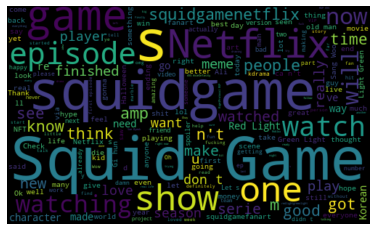

In [145]:
#Plot the wordcloud

allwords = ' '.join([twt for twt in df_squidgame_csv['tweet']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## VADER

In [57]:
!pip install vaderSentiment


In [58]:
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [146]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.04:
        return 'pos'
    elif (lb > -0.04) and (lb < 0.04):
        return 'neu'
    else:
        return 'neg'

In [147]:
df_squidgame_csv['sentiment3'] = df_squidgame_csv.tweet.apply(sentiment_analyzer_scores)
df_squidgame_csv.head()

tweet       username  \
0  BBC News   subtitles 'change meaning' of Netfl...   dyfededwards   
1            strikes nerve in debt ridden SouthKorea  tbsnewsdotnet   
2                                               naid      iraaawmah   
3                            Lol waku   So traumatic     makalino_s   
4                         Squid game spoiler botrini      chrismts4   

   likes_count                                    absoluted_tweet  \
0            0  [B, B, C,  , N, e, w,  ,  ,  , u, b, l, e,  , ...   
1            0  [r, k, e,  , n, e, r, v, e,  , n,  , e, b,  , ...   
2            0                                                [n]   
3            0            [L, l,  , w, k, u,  ,  ,  ,  , r, u, c]   
4            0         [q, u,  , g, e,  , p, l, e, r,  , b, r, n]   

   Subjectivity  Polarity sentiment2 sentiment3  
0           0.0       0.0        pos        neu  
1           0.0       0.0        pos        neg  
2           0.0       0.0        pos        neu  
3           0.7       0.8        pos        neg  
4           0.4      -0.4        neg        neu

### Visualization of dataset with WordCloud

In [82]:
#nltk.download('stopwords')
from nltk.corpus import stopwords


In [ ]:
class_count = df_squidgame_csv['sentiment2'].value_counts() # Returned in descending order [4, 0]
plt.figure(figsize = (12, 8))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.legend()

## Split the data

In [148]:
df_pos = df_squidgame_csv[df_squidgame_csv['sentiment2'] == 'pos']
df_neg = df_squidgame_csv[df_squidgame_csv['sentiment2'] == 'neg']

In [150]:
df_pos.shape

(10797, 8)

In [149]:
df_neg.shape

(4191, 8)

In [157]:
from sklearn.model_selection import train_test_split

target = pd.get_dummies(df_squidgame_csv['sentiment2']).values # labling 
target = target.astype(np.float32)

feature = df_squidgame_csv['tweet']

X_train, X_test, y_train, y_test = train_test_split(df_squidgame_csv['tweet'], df_squidgame_csv['sentiment2'], test_size = 0.20, random_state = 42)
 
#train_dataset    
df_train = pd.DataFrame({
    'tweet' : X_train,
    'sentiment2' : y_train})

#test_dataset
df_test = pd.DataFrame({
    'tweet': X_test,
    'sentiment2': y_test})


In [159]:
print(df_test['sentiment2'].value_counts())
print(df_train['sentiment2'].value_counts())


pos    2118
neg     880
Name: sentiment2, dtype: int64
pos    8679
neg    3311
Name: sentiment2, dtype: int64


In [160]:
df_train.to_csv('data/train.csv', index = False)
df_test.to_csv('data/test.csv', index = False)

In [153]:
# example of evaluating a model with random oversampling and undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.992


## COMBINE FUNCTION for data preprocessing

In [162]:
#https://github.com/kb22/Twitter-Sentiment-Analysis/blob/master/preprocessing.py
import re
import nltk
import numpy as np
import pandas as pd
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import datasets
print("Loading data")
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# Function to process tweets
def clean_tweet(data, wordNetLemmatizer, porterStemmer):
    data['clean_tweet'] = data['tweet']
    
    #Removing user handles starting with @
    data['Clean_tweet'] = data['Clean_tweet'].str.replace("@[\w]*","")
    
    #Removing numbers and special characters
    data['Clean_tweet'] = data['Clean_tweet'].str.replace("[^a-zA-Z' ]","")
    
    #Removing urls
    data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+))"), "")
    
    #Removing single characters
    data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
    
    #Tokenizing
    data['Clean_tweet'] = data['Clean_tweet'].str.split()
    
    #Removing stopwords
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [word for word in tweet if word not in STOPWORDS])
    
    #Expanding not words
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: expand_tweet(tweet))
    
    #Lemmatizing the words
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])
    
    #Stemming the words
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])
    
    #Combining words back to tweets"
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))
    return data

# Define processing methods
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

# Pre-processing the tweets

#Processing training data
df_train = clean_tweet(df_train, wordNetLemmatizer, porterStemmer)

#Train data processed and saved to data/clean_train.csv
df_train.to_csv('data/clean_train.csv', index = False)

#Processing test data
df_test = clean_tweet(df_test, wordNetLemmatizer, porterStemmer)

#Test data processed and saved to data/clean_test.csv
df_test.to_csv('data/clean_test.csv', index = False)


[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1131)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1131)>
/var/folders/nx/48r1p7j10ys5bbndt2lmfpk40000gp/T/ipykernel_28356/2328393483.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Clean_tweet'] = data['Clean_tweet'].str.replace("@[\w]*","")
/var/folders/nx/48r1p7j10ys5bbndt2lmfpk40000gp/T/ipykernel_28356/2328393483.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Clean_tweet'] = data['Clean_tweet'].str.replace("[^a-zA-Z' ]","")


Loading data


In [163]:
train_data = pd.read_csv('data/clean_train.csv')
test_data = pd.read_csv('data/clean_test.csv')

In [164]:
train_data

tweet sentiment2  \
0      So we all know what the Halloween customes wil...        pos   
1      Dilemma is real Crypto Game Bitcoin   Let 's g...        neg   
2         46M at stake , and this is the last game wyd ?        neg   
3      I'm not dying to be that guy but Anybody else ...        neg   
4                             squid game is kinda cringe        neg   
...                                                  ...        ...   
11985  Squid Game actor Lee Jung jae reveals how Holl...        neg   
11986        It s amazing that this is 1 in 90 countries        pos   
11987  Did a lil mix on em squid game sounds squidgam...        neg   
11988                             If   was made in India        pos   
11989                                       Me the final        pos   

                                             Clean_tweet  
0                          so know halloween custom year  
1      dilemma real crypto game bitcoin let 's gooo c...  
2                                    stake last game wyd  
3      i'm not die guy anybodi els not realli like wa...  
4                                 squid game kinda cring  
...                                                  ...  
11985  squid game actor lee jung jae reveal hollywood...  
11986                                    it amaz countri  
11987  did lil mix em squid game sound redlightgreenl...  
11988                                      if made india  
11989                                           me final  

[11990 rows x 3 columns]

In [165]:
test_data

tweet sentiment2  \
0         was the best season I have ever watched 10 10        pos   
1     Squid Game honeycomb meme Memes memez   dailym...        neg   
2            He did not betray Ali like that HE DID NOT        pos   
3                             I still have yet to watch        pos   
4     tw blood I do n't know what brought me to draw...        pos   
...                                                 ...        ...   
2993  What makes the Squid Game Token so special ? O...        pos   
2994  Squid Game 's English Subtitles Drastically Al...        neg   
2995  So after hearing all the non stop hype , I che...        pos   
2996       Checking out what all the hype is about with        pos   
2997  is less stressful than watching the Dodgers in...        neg   

                                            Clean_tweet  
0                                best season ever watch  
1     squid game honeycomb meme meme memez dailymem ...  
2                     he not betray ali like he did not  
3                                       still yet watch  
4     tw blood  not know brought draw beiguang beido...  
...                                                 ...  
2993  what make squid game token special our never s...  
2994  squid game 's english subtitl drastic alter sh...  
2995       so hear non stop hype check pretti damn good  
2996                                         check hype  
2997                 le stress watch dodger post season  

[2998 rows x 3 columns]

In [174]:
import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LayerNormalization


import pandas as pd

# Load data
train_data = pd.read_csv('data/clean_train.csv')
test_data = pd.read_csv('data/clean_test.csv')

# Tokenization
tokenizer = Tokenizer(num_words = 2000, split = ' ')
tokenizer.fit_on_texts(train_data['Clean_tweet'].astype(str).values)
train_tweets = tokenizer.texts_to_sequences(train_data['Clean_tweet'].astype(str).values)
max_len = max([len(i) for i in train_tweets])
train_tweets = pad_sequences(train_tweets, maxlen = max_len)
test_tweets = tokenizer.texts_to_sequences(test_data['Clean_tweet'].astype(str).values)
test_tweets = pad_sequences(test_tweets, maxlen = max_len)

# Building the model
model = Sequential()
model.add(Embedding(2000, 128, input_length = train_tweets.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, dropout = 0.2))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

# Training the model
history = model.fit(train_tweets, pd.get_dummies(train_data['sentiment2']).values, epochs = 15, batch_size = 128, validation_split = 0.2)

# Testing the model
score, accuracy = model.evaluate(test_tweets, pd.get_dummies(test_data['sentiment2']).values, batch_size = 128)
print("Test accuracy: {}".format(accuracy))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 35, 128)           256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 35, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 650,754
Trainable params: 650,754
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
75/75 [==============================] - 12s 141ms/step - loss: 0.5081 - accuracy: 0.7564 - val_loss: 0.3758 - val_accuracy: 0.8382
Epoch 2/15
75/75 [==============================] - 11s 145ms/step - loss: 0.3425 - accuracy: 0.8564 - 

In [206]:
train_data

tweet sentiment2  \
0      So we all know what the Halloween customes wil...        pos   
1      Dilemma is real Crypto Game Bitcoin   Let 's g...        neg   
2         46M at stake , and this is the last game wyd ?        neg   
3      I'm not dying to be that guy but Anybody else ...        neg   
4                             squid game is kinda cringe        neg   
...                                                  ...        ...   
11985  Squid Game actor Lee Jung jae reveals how Holl...        neg   
11986        It s amazing that this is 1 in 90 countries        pos   
11987  Did a lil mix on em squid game sounds squidgam...        neg   
11988                             If   was made in India        pos   
11989                                       Me the final        pos   

                                             Clean_tweet  
0                          so know halloween custom year  
1      dilemma real crypto game bitcoin let 's gooo c...  
2                                    stake last game wyd  
3      i'm not die guy anybodi els not realli like wa...  
4                                 squid game kinda cring  
...                                                  ...  
11985  squid game actor lee jung jae reveal hollywood...  
11986                                    it amaz countri  
11987  did lil mix em squid game sound redlightgreenl...  
11988                                      if made india  
11989                                           me final  

[11990 rows x 3 columns]

In [203]:
model.predict('squid game is bad') 


IndexError: list index out of range

In [200]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 15, 'steps': 75}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model1.score(X_train, y_train))
print("Validation Accuracy :", model1.score(X_test, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


ValueError: could not convert string to float: 'So we all know what the Halloween customes will be this year'

In [183]:
print(model.summary())

model.save('LSTM_model.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 35, 128)           256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 35, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 650,754
Trainable params: 650,754
Non-trainable params: 0
_________________________________________________________________
None


In [186]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#history.fit(X_train, y_train)
plot_confusion_matrix(history, X_test, y_test)  
plt.show()

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
 tf.math.confusion_matrix([1, 2, 4], [2, 2, 4]) ==>
      [[0 0 0 0 0]
       [0 0 1 0 0]
       [0 0 1 0 0]
       [0 0 0 0 0]
       [0 0 0 0 1]]

In [176]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
train_data = pd.read_csv('data/clean_train.csv')
test_data = pd.read_csv('data/clean_test.csv')
#Data loaded

# Tf-IDF
#Applying TF-IDF transformation
tfidfVectorizer = TfidfVectorizer(min_df = 5, max_features = 1000)
tfidfVectorizer.fit(train_data['Clean_tweet'].apply(lambda x: np.str_(x)))
train_tweet_vector = tfidfVectorizer.transform(train_data['Clean_tweet'].apply(lambda x: np.str_(x)))
test_tweet_vector = tfidfVectorizer.transform(test_data['Clean_tweet'].apply(lambda x: np.str_(x)))

# Training
#Training Random Forest Classifier
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(train_tweet_vector, train_data['sentiment2'])

# Prediction
#Predicting on train data
prediction = randomForestClassifier.predict(train_tweet_vector)

#Predicting on test data
prediction = randomForestClassifier.predict(test_tweet_vector)
#

In [182]:
test_tweet_vector
train_tweet_vector

<11990x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 81479 stored elements in Compressed Sparse Row format>

In [180]:
print("Training accuracy: {}%".format(accuracy_score(train_data['sentiment2'].head(1000), prediction)*100))
print("Testing accuracy: {}%".format(accuracy_score(test_data['sentiment2'].head(1000), prediction)*100))

ValueError: Found input variables with inconsistent numbers of samples: [1000, 2998]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)
